# 1. Data Preprocessing 

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import h5py
import os
from tqdm import tqdm
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

###### Dataset 1

There are two datasets which at start we prepceossing the first dataset.

In [4]:
# Importing the dataset
data = pd.read_csv("./Image Dataset/CXR8-selected/Data_Entry_2017.csv")
data.head(10)

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   
5  00000003_001.png                  Hernia            1           3   
6  00000003_002.png                  Hernia            2           3   
7  00000003_003.png     Hernia|Infiltration            3           3   
8  00000003_004.png                  Hernia            4           3   
9  00000003_005.png                  Hernia            5           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   
5           74              F            PA                 2500     2048   
6           75              F            PA                 2048     2500   
7           76              F            PA                 2698     2991   
8           77              F            PA                 2500     2048   
9           78              F            PA                 2686     2991   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                        0.143  0.143  
2                        0.168  0.168  
3                        0.171  0.171  
4                        0.143  0.143  
5                        0.168  0.168  
6                        0.168  0.168  
7                        0.143  0.143  
8                        0.168  0.168  
9                        0.143  0.143

Eliminating the rows that its picture in directory does not exist.

In [5]:
index_to_be_drop = []

for index, i in enumerate(data.iloc[:, 0]):
    if index % 500 == 0:
        print(index)
    if i not in os.listdir("./Image Dataset/Image total/"):
        print("=========Found=========")
        index_number = data.loc[data.iloc[:, 0] == i].index[0]
        index_to_be_drop.append(index_number)
        pass

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
8500

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
106000
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
111500
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

In [5]:
data_dropped = data.drop(data.index[index_to_be_drop])
data_dropped.head(10)

Unnamed: 0       Image Index          Finding Labels  Follow-up #  \
0           0  00000001_000.png            Cardiomegaly            0   
1           1  00000001_001.png  Cardiomegaly|Emphysema            1   
2           2  00000001_002.png   Cardiomegaly|Effusion            2   
3           3  00000002_000.png              No Finding            0   
4           4  00000003_000.png                  Hernia            0   
5           5  00000003_001.png                  Hernia            1   
6           6  00000003_002.png                  Hernia            2   
7           7  00000003_003.png     Hernia|Infiltration            3   
8           8  00000003_004.png                  Hernia            4   
9           9  00000003_005.png                  Hernia            5   

   Patient ID  Patient Age Patient Gender View Position  OriginalImage[Width  \
0           1           58              M            PA                 2682   
1           1           58              M            PA                 2894   
2           1           58              M            PA                 2500   
3           2           81              M            PA                 2500   
4           3           81              F            PA                 2582   
5           3           74              F            PA                 2500   
6           3           75              F            PA                 2048   
7           3           76              F            PA                 2698   
8           3           77              F            PA                 2500   
9           3           78              F            PA                 2686   

   Height]  OriginalImagePixelSpacing[x     y]  
0     2749                        0.143  0.143  
1     2729                        0.143  0.143  
2     2048                        0.168  0.168  
3     2048                        0.171  0.171  
4     2991                        0.143  0.143  
5     2048                        0.168  0.168  
6     2500                        0.168  0.168  
7     2991                        0.143  0.143  
8     2048                        0.168  0.168  
9     2991                        0.143  0.143

In [7]:
# Saving the csv
data_dropped.to_csv("./Image Dataset/CXR8-selected/data_dropped.csv")

In [5]:
# Loading the csv
data_dropped = pd.read_csv("./Image Dataset/CXR8-selected/data_dropped.csv")

In [5]:
shuffled_total_data = data_dropped.sample(frac=1, random_state = 0)
shuffled_total_data.head(10)

Unnamed: 0       Image Index                 Finding Labels  \
103240      103240  00027530_000.png                     No Finding   
4770          4770  00001278_009.png                       Effusion   
33486        33486  00008775_000.png                     No Finding   
55692        55692  00013931_003.png  Atelectasis|Infiltration|Mass   
36275        36275  00009579_001.png                     No Finding   
43871        43871  00011311_003.png                     No Finding   
97419        97419  00025696_003.png                     No Finding   
42920        42920  00011061_002.png                     No Finding   
20342        20342  00005440_000.png                     No Finding   
76247        76247  00018717_001.png                     No Finding   

        Follow-up #  Patient ID  Patient Age Patient Gender View Position  \
103240            0       27530           41              F            AP   
4770              9        1278           54              F            AP   
33486             0        8775           54              M            AP   
55692             3       13931           55              F            PA   
36275             1        9579           68              M            AP   
43871             3       11311           29              M            AP   
97419             3       25696           81              M            PA   
42920             2       11061           23              F            AP   
20342             0        5440            5              M            PA   
76247             1       18717           78              M            PA   

        OriginalImage[Width  Height]  OriginalImagePixelSpacing[x     y]  
103240                 3056     2544                        0.139  0.139  
4770                   2500     2048                        0.168  0.168  
33486                  2500     2048                        0.168  0.168  
55692                  2992     2991                        0.143  0.143  
36275                  2500     2048                        0.168  0.168  
43871                  2500     2048                        0.168  0.168  
97419                  2992     2991                        0.143  0.143  
42920                  2500     2048                        0.168  0.168  
20342                  2048     2500                        0.171  0.171  
76247                  2818     2991                        0.143  0.143

In below we are making a sub-dataset for illness in order to one hot encoding it in future so we can use it as our labels.

In [6]:
# Image names + Labels
data_label = pd.DataFrame(data = data.iloc[:, 0:2])
data_label.head()

Image Index          Finding Labels
0  00000001_000.png            Cardiomegaly
1  00000001_001.png  Cardiomegaly|Emphysema
2  00000001_002.png   Cardiomegaly|Effusion
3  00000002_000.png              No Finding
4  00000003_000.png                  Hernia

In [7]:
# Getting the totall ilness names
total_illness_names = []
for i in data_label.iloc[:, 1]:
    for j in i.split('|'):
        if j in total_illness_names:
            continue
        else:
            total_illness_names.append(j)
print(pd.DataFrame(total_illness_names))

                     0
0         Cardiomegaly
1            Emphysema
2             Effusion
3           No Finding
4               Hernia
5         Infiltration
6                 Mass
7               Nodule
8          Atelectasis
9         Pneumothorax
10  Pleural_Thickening
11           Pneumonia
12            Fibrosis
13               Edema
14       Consolidation


In [8]:
# Re-ordering the columns
total_illness_names = total_illness_names[:3] + total_illness_names[4:] + total_illness_names[3:4]
total_illness_names

['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation',
 'No Finding']

In [9]:
# Creating zero column for each illness
for i in total_illness_names:
    data_label[i] = pd.Series(data = np.zeros(data_label.iloc[:, 1].shape[0], dtype= np.int16))

In [10]:
# Visualizing the first 10 rows
data_label.head(10)

Image Index          Finding Labels  Cardiomegaly  Emphysema  \
0  00000001_000.png            Cardiomegaly             0          0   
1  00000001_001.png  Cardiomegaly|Emphysema             0          0   
2  00000001_002.png   Cardiomegaly|Effusion             0          0   
3  00000002_000.png              No Finding             0          0   
4  00000003_000.png                  Hernia             0          0   
5  00000003_001.png                  Hernia             0          0   
6  00000003_002.png                  Hernia             0          0   
7  00000003_003.png     Hernia|Infiltration             0          0   
8  00000003_004.png                  Hernia             0          0   
9  00000003_005.png                  Hernia             0          0   

   Effusion  Hernia  Infiltration  Mass  Nodule  Atelectasis  Pneumothorax  \
0         0       0             0     0       0            0             0   
1         0       0             0     0       0            0             0   
2         0       0             0     0       0            0             0   
3         0       0             0     0       0            0             0   
4         0       0             0     0       0            0             0   
5         0       0             0     0       0            0             0   
6         0       0             0     0       0            0             0   
7         0       0             0     0       0            0             0   
8         0       0             0     0       0            0             0   
9         0       0             0     0       0            0             0   

   Pleural_Thickening  Pneumonia  Fibrosis  Edema  Consolidation  No Finding  
0                   0          0         0      0              0           0  
1                   0          0         0      0              0           0  
2                   0          0         0      0              0           0  
3                   0          0         0      0              0           0  
4                   0          0         0      0              0           0  
5                   0          0         0      0              0           0  
6                   0          0         0      0              0           0  
7                   0          0         0      0              0           0  
8                   0          0         0      0              0           0  
9                   0          0         0      0              0           0

###### One hot encoding

In below we are one hot encoding the diseases name. since some images have more than one image then first we have to split the diseases and then put 1 for its specifit column.

In [20]:
# Putting 1 for each illness
for i in total_illness_names:
    print("==> The process for {} has been started..".format(i))
    for j in range(data_label.iloc[:, 1].shape[0]):
        if i in data_label.iloc[j, 1].split('|'):
             data_label.iloc[j, total_illness_names.index(i) + 2] = 1 
        else:
            pass
    print("Total image of {} has been finished\n".format(j))

==> The process for Cardiomegaly has been started..
Total image of 112119 has been finished

==> The process for Emphysema has been started..
Total image of 112119 has been finished

==> The process for Effusion has been started..
Total image of 112119 has been finished

==> The process for Hernia has been started..
Total image of 112119 has been finished

==> The process for Infiltration has been started..
Total image of 112119 has been finished

==> The process for Mass has been started..
Total image of 112119 has been finished

==> The process for Nodule has been started..
Total image of 112119 has been finished

==> The process for Atelectasis has been started..
Total image of 112119 has been finished

==> The process for Pneumothorax has been started..
Total image of 112119 has been finished

==> The process for Pleural_Thickening has been started..
Total image of 112119 has been finished

==> The process for Pneumonia has been started..
Total image of 112119 has been finished

==

In [10]:
# Visualizing the first 10 rows
data_label.head(10)

Unnamed: 0       Image Index          Finding Labels  Cardiomegaly  \
0           0  00000001_000.png            Cardiomegaly             1   
1           1  00000001_001.png  Cardiomegaly|Emphysema             1   
2           2  00000001_002.png   Cardiomegaly|Effusion             1   
3           3  00000002_000.png              No Finding             0   
4           4  00000003_000.png                  Hernia             0   
5           5  00000003_001.png                  Hernia             0   
6           6  00000003_002.png                  Hernia             0   
7           7  00000003_003.png     Hernia|Infiltration             0   
8           8  00000003_004.png                  Hernia             0   
9           9  00000003_005.png                  Hernia             0   

   Emphysema  Effusion  Hernia  Infiltration  Mass  Nodule  Atelectasis  \
0          0         0       0             0     0       0            0   
1          1         0       0             0     0       0            0   
2          0         1       0             0     0       0            0   
3          0         0       0             0     0       0            0   
4          0         0       1             0     0       0            0   
5          0         0       1             0     0       0            0   
6          0         0       1             0     0       0            0   
7          0         0       1             1     0       0            0   
8          0         0       1             0     0       0            0   
9          0         0       1             0     0       0            0   

   Pneumothorax  Pleural_Thickening  Pneumonia  Fibrosis  Edema  \
0             0                   0          0         0      0   
1             0                   0          0         0      0   
2             0                   0          0         0      0   
3             0                   0          0         0      0   
4             0                   0          0         0      0   
5             0                   0          0         0      0   
6             0                   0          0         0      0   
7             0                   0          0         0      0   
8             0                   0          0         0      0   
9             0                   0          0         0      0   

   Consolidation  No Finding  
0              0           0  
1              0           0  
2              0           0  
3              0           1  
4              0           0  
5              0           0  
6              0           0  
7              0           0  
8              0           0  
9              0           0

Saving and loading the new onehotecoded data.

In [23]:
# Saving the csv
data_label.to_csv("./Image Dataset/CXR8-selected/onehotencoded_labels.csv")

In [5]:
# Loading the csv
data_label = pd.read_csv("./Image Dataset/CXR8-selected/onehotencoded_labels.csv")

###### Splitting the dataset

We should have three sub-datasets of Training set, Test set and Validation set.

wwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww

Some OS codes:

**Current working directory:** os.getcwd()

**Changin directory:** os.chdir()

**List of directories:** os.listdir() / ls

**Number of files in a directory:** len(os.listdir())

**Making a directory:** os.mkdir()

**Renaming:** os.rename()

MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM

**Write a function that:**
- Load a image
- Converting it to desireble target size 
- Converting it to the numy array
- Convering to the 4D array
- Make stack in case of more than 1 image

In [3]:
def path_to_tensor(img_path):
    # Loading the image
    img = image.load_img(img_path, target_size = (224, 224))
    
    # Converting image to array
    x = image.img_to_array(img) # (224, 224, 3)
    
    # Converting 3D tensor to 4D
    return np.expand_dims(x, axis = 0) # (1, 224, 224, 3)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [6]:
data_feature_label = data_label.drop(labels = ['Unnamed: 0', 'Finding Labels', 'No Finding'] , axis = 1)
data_feature_label.head(10)

Image Index  Cardiomegaly  Emphysema  Effusion  Hernia  Infiltration  \
0  00000001_000.png             1          0         0       0             0   
1  00000001_001.png             1          1         0       0             0   
2  00000001_002.png             1          0         1       0             0   
3  00000002_000.png             0          0         0       0             0   
4  00000003_000.png             0          0         0       1             0   
5  00000003_001.png             0          0         0       1             0   
6  00000003_002.png             0          0         0       1             0   
7  00000003_003.png             0          0         0       1             1   
8  00000003_004.png             0          0         0       1             0   
9  00000003_005.png             0          0         0       1             0   

   Mass  Nodule  Atelectasis  Pneumothorax  Pleural_Thickening  Pneumonia  \
0     0       0            0             0                   0          0   
1     0       0            0             0                   0          0   
2     0       0            0             0                   0          0   
3     0       0            0             0                   0          0   
4     0       0            0             0                   0          0   
5     0       0            0             0                   0          0   
6     0       0            0             0                   0          0   
7     0       0            0             0                   0          0   
8     0       0            0             0                   0          0   
9     0       0            0             0                   0          0   

   Fibrosis  Edema  Consolidation  
0         0      0              0  
1         0      0              0  
2         0      0              0  
3         0      0              0  
4         0      0              0  
5         0      0              0  
6         0      0              0  
7         0      0              0  
8         0      0              0  
9         0      0              0

In [8]:
train_tensors = np.load('./Tensors/test_files.npy')

In [10]:
train_tensors[:5]

array(['./dataset/Test set/Infiltration/00007425_000.png',
       './dataset/Test set/Mass/00026202_003.png',
       './dataset/Test set/Emphysema/00009606_008_transposed.png',
       './dataset/Test set/Effusion/00028013_013.png',
       './dataset/Test set/Effusion/00022837_011_transposed.png'],
      dtype='<U65')

In [9]:
train_targets = np.load('./Tensors/test_targets.npy')

In [11]:
train_targets[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Eliminating the rows that its picture in directory does not exist.

In [47]:
# Finding all names in 11 directories
all_img_names = pd.DataFrame(np.concatenate([os.listdir('./Image Dataset/images 1'), 
                                             os.listdir('./Image Dataset/images 2'), 
                                             os.listdir('./Image Dataset/images 3'),
                                             os.listdir('./Image Dataset/images 4'),
                                             os.listdir('./Image Dataset/images 5'), 
                                             os.listdir('./Image Dataset/images 6'), 
                                             os.listdir('./Image Dataset/images 7'),
                                             os.listdir('./Image Dataset/images 8'),
                                             os.listdir('./Image Dataset/images 9'),
                                             os.listdir('./Image Dataset/images 10'),
                                             os.listdir('./Image Dataset/images 11'),]))

In [64]:
# Converting dataframe to list 
all_image_name = []

for i in all_img_names[0]:
    all_image_name.append(i)

In [71]:
index_to_be_drop = []

for index, i in enumerate(data_feature_label.iloc[:, 0]):
    if index % 500 == 0:
        print(index)
    if i not in all_image_name:
        print("=========Found=========")
        index_number = data_feature_label.loc[data_feature_label.iloc[:, 0] == i].index[0]
        index_to_be_drop.append(index_number)
        pass

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
8500

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
106000
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
109500
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found=========
=========Found==

In [81]:
data_feature_label_dropped = data_feature_label.drop(data_feature_label.index[index_to_be_drop])
data_feature_label_dropped

Image Index  Cardiomegaly  Emphysema  Effusion  Hernia  \
0       00000001_000.png             1          0         0       0   
1       00000001_001.png             1          1         0       0   
2       00000001_002.png             1          0         1       0   
3       00000002_000.png             0          0         0       0   
4       00000003_000.png             0          0         0       1   
5       00000003_001.png             0          0         0       1   
6       00000003_002.png             0          0         0       1   
7       00000003_003.png             0          0         0       1   
8       00000003_004.png             0          0         0       1   
9       00000003_005.png             0          0         0       1   
10      00000003_006.png             0          0         0       1   
11      00000003_007.png             0          0         0       1   
12      00000004_000.png             0          0         0       0   
13      00000005_000.png             0          0         0       0   
14      00000005_001.png             0          0         0       0   
15      00000005_002.png             0          0         0       0   
16      00000005_003.png             0          0         0       0   
17      00000005_004.png             0          0         0       0   
18      00000005_005.png             0          0         0       0   
19      00000005_006.png             0          0         0       0   
20      00000005_007.png             0          0         1       0   
21      00000006_000.png             0          0         0       0   
22      00000007_000.png             0          0         0       0   
23      00000008_000.png             1          0         0       0   
24      00000008_001.png             0          0         0       0   
25      00000008_002.png             0          0         0       0   
26      00000009_000.png             0          1         0       0   
27      00000010_000.png             0          0         0       0   
28      00000011_000.png             0          0         1       0   
29      00000011_001.png             0          0         0       0   
...                  ...           ...        ...       ...     ...   
104969  00028160_001.png             0          0         0       0   
104970  00028160_002.png             0          0         0       0   
104971  00028161_000.png             0          0         0       0   
104972  00028162_000.png             0          0         0       0   
104973  00028162_001.png             0          0         0       0   
104974  00028162_002.png             0          0         0       0   
104975  00028162_003.png             0          0         0       0   
104976  00028163_000.png             0          0         0       0   
104977  00028164_000.png             0          0         0       0   
104978  00028165_000.png             0          0         0       0   
104979  00028166_000.png             0          0         0       0   
104980  00028166_001.png             0          0         0       0   
104981  00028166_002.png             0          0         0       0   
104982  00028166_003.png             0          0         0       0   
104983  00028166_004.png             0          0         0       0   
104984  00028166_005.png             0          0         0       0   
104985  00028167_000.png             0          0         0       0   
104986  00028168_000.png             0          0         0       0   
104987  00028168_001.png             0          0         0       0   
104988  00028168_002.png             0          0         0       0   
104989  00028169_000.png             0          0         0       0   
104990  00028169_001.png             0          0         0       0   
104991  00028170_000.png             0          0         0       0   
104992  00028170_001.png             0          0         0       0   
104993  00028171_000.png             

In [84]:
# Saving the csv
data_feature_label_dropped.to_csv('./data_feature_label_dropped.csv')

In [86]:
# Loading the csv
data_feature_label_dropped = pd.read_csv('./data_feature_label_dropped.csv')

In [94]:
data_feature_label_dropped = data_feature_label_dropped.drop(['Unnamed: 0'], axis=1)

In [95]:
data_feature_label_dropped

Image Index  Cardiomegaly  Emphysema  Effusion  Hernia  \
0       00000001_000.png             1          0         0       0   
1       00000001_001.png             1          1         0       0   
2       00000001_002.png             1          0         1       0   
3       00000002_000.png             0          0         0       0   
4       00000003_000.png             0          0         0       1   
5       00000003_001.png             0          0         0       1   
6       00000003_002.png             0          0         0       1   
7       00000003_003.png             0          0         0       1   
8       00000003_004.png             0          0         0       1   
9       00000003_005.png             0          0         0       1   
10      00000003_006.png             0          0         0       1   
11      00000003_007.png             0          0         0       1   
12      00000004_000.png             0          0         0       0   
13      00000005_000.png             0          0         0       0   
14      00000005_001.png             0          0         0       0   
15      00000005_002.png             0          0         0       0   
16      00000005_003.png             0          0         0       0   
17      00000005_004.png             0          0         0       0   
18      00000005_005.png             0          0         0       0   
19      00000005_006.png             0          0         0       0   
20      00000005_007.png             0          0         1       0   
21      00000006_000.png             0          0         0       0   
22      00000007_000.png             0          0         0       0   
23      00000008_000.png             1          0         0       0   
24      00000008_001.png             0          0         0       0   
25      00000008_002.png             0          0         0       0   
26      00000009_000.png             0          1         0       0   
27      00000010_000.png             0          0         0       0   
28      00000011_000.png             0          0         1       0   
29      00000011_001.png             0          0         0       0   
...                  ...           ...        ...       ...     ...   
104969  00028160_001.png             0          0         0       0   
104970  00028160_002.png             0          0         0       0   
104971  00028161_000.png             0          0         0       0   
104972  00028162_000.png             0          0         0       0   
104973  00028162_001.png             0          0         0       0   
104974  00028162_002.png             0          0         0       0   
104975  00028162_003.png             0          0         0       0   
104976  00028163_000.png             0          0         0       0   
104977  00028164_000.png             0          0         0       0   
104978  00028165_000.png             0          0         0       0   
104979  00028166_000.png             0          0         0       0   
104980  00028166_001.png             0          0         0       0   
104981  00028166_002.png             0          0         0       0   
104982  00028166_003.png             0          0         0       0   
104983  00028166_004.png             0          0         0       0   
104984  00028166_005.png             0          0         0       0   
104985  00028167_000.png             0          0         0       0   
104986  00028168_000.png             0          0         0       0   
104987  00028168_001.png             0          0         0       0   
104988  00028168_002.png             0          0         0       0   
104989  00028169_000.png             0          0         0       0   
104990  00028169_001.png             0          0         0       0   
104991  00028170_000.png             0          0         0       0   
104992  00028170_001.png             0          0         0       0   
104993  00028171_000.png             

In [96]:
shuffled_data = data_feature_label_dropped.sample(frac=1, random_state = 0)
shuffled_data.head(10)

Image Index  Cardiomegaly  Emphysema  Effusion  Hernia  \
103240  00027530_000.png             0          0         0       0   
4770    00001278_009.png             0          0         1       0   
33486   00008775_000.png             0          0         0       0   
55692   00013931_003.png             0          0         0       0   
36275   00009579_001.png             0          0         0       0   
43871   00011311_003.png             0          0         0       0   
97419   00025696_003.png             0          0         0       0   
42920   00011061_002.png             0          0         0       0   
20342   00005440_000.png             0          0         0       0   
76247   00018717_001.png             0          0         0       0   

        Infiltration  Mass  Nodule  Atelectasis  Pneumothorax  \
103240             0     0       0            0             0   
4770               0     0       0            0             0   
33486              0     0       0            0             0   
55692              1     1       0            1             0   
36275              0     0       0            0             0   
43871              0     0       0            0             0   
97419              0     0       0            0             0   
42920              0     0       0            0             0   
20342              0     0       0            0             0   
76247              0     0       0            0             0   

        Pleural_Thickening  Pneumonia  Fibrosis  Edema  Consolidation  
103240                   0          0         0      0              0  
4770                     0          0         0      0              0  
33486                    0          0         0      0              0  
55692                    0          0         0      0              0  
36275                    0          0         0      0              0  
43871                    0          0         0      0              0  
97419                    0          0         0      0              0  
42920                    0          0         0      0              0  
20342                    0          0         0      0              0  
76247                    0          0         0      0              0

In [99]:
index_70_percent = int(len(shuffled_data.iloc[:, 0])*0.7)
index_10_percent = int(len(shuffled_data.iloc[:, 0])*0.1) + index_70_percent
index_20_percent = int(len(shuffled_data.iloc[:, 0])*0.2) + index_10_percent

train_files, train_targets = shuffled_data.iloc[:index_70_percent, 0], shuffled_data.iloc[:index_70_percent, 1:]
val_files, val_targets = shuffled_data.iloc[index_70_percent : index_10_percent, 0], shuffled_data.iloc[index_70_percent : index_10_percent, 1:]
test_files, test_targets = shuffled_data.iloc[index_10_percent : index_20_percent, 0], shuffled_data.iloc[index_10_percent : index_20_percent, 1:]

In [100]:
print('Total number of training set: ', len(shuffled_data.iloc[:index_70_percent, 0]))
print('Total number of validation set: ', len(shuffled_data.iloc[index_70_percent : index_10_percent, 0]))
print('Total number of test set: ', len(shuffled_data.iloc[index_10_percent : index_20_percent, 0]))
print('---------------------------------------')
print('Total number of dataset: ', len(np.hstack([train_files, val_files, test_files])))

Total number of training set:  73499
Total number of validation set:  10499
Total number of test set:  20999
---------------------------------------
Total number of dataset:  104997


Convering the files that contains the image name to have the full path string.

In [22]:
train_files_path = []
for i in train_files:
    train_files_path.append('./Image Dataset/Image total/'+ str(i))

In [23]:
val_files_path = []
for i in val_files:
    val_files_path.append('./Image Dataset/Image total/'+ str(i))

In [24]:
test_files_path = []
for i in test_files:
    test_files_path.append('./Image Dataset/Image total/'+ str(i))

In [25]:
print('Total training path', len(train_files_path))
print('Total validation path', len(val_files_path))
print('Total test path', len(test_files_path))

Total training path 73499
Total validation path 10499
Total test path 20999


In [26]:
# Saving the paths
path_data = pd.DataFrame(data = [train_files_path, val_files_path, test_files_path]).transpose()

# Saving the csv
path_data.to_csv("./Image Dataset/CXR8-selected/path_data.csv")

path_data

0  \
0      ./Image Dataset/Image total/00027530_000.png   
1      ./Image Dataset/Image total/00001278_009.png   
2      ./Image Dataset/Image total/00008775_000.png   
3      ./Image Dataset/Image total/00013931_003.png   
4      ./Image Dataset/Image total/00009579_001.png   
5      ./Image Dataset/Image total/00011311_003.png   
6      ./Image Dataset/Image total/00025696_003.png   
7      ./Image Dataset/Image total/00011061_002.png   
8      ./Image Dataset/Image total/00005440_000.png   
9      ./Image Dataset/Image total/00018717_001.png   
10     ./Image Dataset/Image total/00010547_006.png   
11     ./Image Dataset/Image total/00028065_000.png   
12     ./Image Dataset/Image total/00006978_000.png   
13     ./Image Dataset/Image total/00014957_000.png   
14     ./Image Dataset/Image total/00009431_002.png   
15     ./Image Dataset/Image total/00002793_005.png   
16     ./Image Dataset/Image total/00004523_013.png   
17     ./Image Dataset/Image total/00019241_004.png   
18     ./Image Dataset/Image total/00026816_000.png   
19     ./Image Dataset/Image total/00002004_000.png   
20     ./Image Dataset/Image total/00017213_000.png   
21     ./Image Dataset/Image total/00008122_008.png   
22     ./Image Dataset/Image total/00022013_000.png   
23     ./Image Dataset/Image total/00008122_007.png   
24     ./Image Dataset/Image total/00001836_084.png   
25     ./Image Dataset/Image total/00013894_004.png   
26     ./Image Dataset/Image total/00014572_003.png   
27     ./Image Dataset/Image total/00019696_000.png   
28     ./Image Dataset/Image total/00000359_004.png   
29     ./Image Dataset/Image total/00002704_004.png   
...                                             ...   
73469  ./Image Dataset/Image total/00006326_004.png   
73470  ./Image Dataset/Image total/00017980_003.png   
73471  ./Image Dataset/Image total/00018187_027.png   
73472  ./Image Dataset/Image total/00007708_003.png   
73473  ./Image Dataset/Image total/00010479_002.png   
73474  ./Image Dataset/Image total/00020496_000.png   
73475  ./Image Dataset/Image total/00015012_000.png   
73476  ./Image Dataset/Image total/00016050_000.png   
73477  ./Image Dataset/Image total/00014176_006.png   
73478  ./Image Dataset/Image total/00022026_000.png   
73479  ./Image Dataset/Image total/00027069_000.png   
73480  ./Image Dataset/Image total/00000172_000.png   
73481  ./Image Dataset/Image total/00012244_000.png   
73482  ./Image Dataset/Image total/00010822_000.png   
73483  ./Image Dataset/Image total/00015444_000.png   
73484  ./Image Dataset/Image total/00023283_004.png   
73485  ./Image Dataset/Image total/00022408_001.png   
73486  ./Image Dataset/Image total/00006488_000.png   
73487  ./Image Dataset/Image total/00023341_000.png   
73488  ./Image Dataset/Image total/00005372_011.png   
73489  ./Image Dataset/Image total/00020624_004.png   
73490  ./Image Dataset/Image total/00027355_002.png   
73491  ./Image Dataset/Image total/00017999_004.png   
73492  ./Image Dataset/Image total/00000468_030.png   
73493  ./Image Dataset/Image total/00010007_147.png   
73494  ./Image Dataset/Image total/00018055_048.png   
73495  ./Image Dataset/Image total/00008504_003.png   
73496  ./Image Dataset/Image total/00010805_034.png   
73497  ./Image Dataset/Image total/00009574_023.png   
73498  ./Image Dataset/Image total/00012779_000.png   

                                                  1  \
0      ./Image Dataset/Image total/00006703_007.png   
1      ./Image Dataset/Image total/00000978_000.png   
2      ./Image Dataset/Image total/00020142_000.png   
3      ./Image Dataset/Image total/00014368_002.png   
4      ./Image Dataset/Image total/00004676_000.png   
5      ./Image Dataset/Image total/00012403_000.png   
6      ./Image Dataset/Image total/00024540_000.png   
7      ./Image Dataset/Image total/00015605_001.png   
8      ./Image Dataset/Image total/00020326_031.png   
9      ./Image Dataset/Image total/00006626_001.png   
10     ./Image Dataset/Image total

In [22]:
# Loading the csv
path_data = pd.read_csv("./Image Dataset/CXR8-selected/path_data.csv")

Eliminating the None in columns.

In [23]:
train_files_path = []
for i in path_data.iloc[:, 1]:
    if type(i) == str:
        train_files_path.append(i)
    else: # None has the type float
        pass

len(train_files_path)

73499

In [24]:
val_files_path = []
for i in path_data.iloc[:, 2]:
    if type(i) == str:
        val_files_path.append(i)
    else:
        pass

len(val_files_path)

10499

In [25]:
test_files_path = []
for i in path_data.iloc[:, 3]:
    if type(i) == str:
        test_files_path.append(i)
    else:
        pass

len(test_files_path)

20999

Training tensor

In [8]:
np.floor(len(train_files_path)*0.5)

36749.0

In [9]:
train_files_path[:36749][-1]

'./Image Dataset/Image total/00002381_000.png'

In [9]:
train_files_path[36749:][0]

'./Image Dataset/Image total/00023808_000.png'

In [11]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True   

train_tensor_first_half = paths_to_tensor(train_files_path[:36749]).astype('float32') # For normalization you can add '/ 255' at the end of code line.

100%|██████████| 36749/36749 [44:54<00:00, 13.64it/s]  


In [12]:
# Saving the train_tensor_first_half
np.save('./train_tensor_first_half.npy', train_tensor_first_half)

In [3]:
# Loading the train_tensor_first_half
train_tensor_first_half = np.load('./train_tensor_first_half.npy')

In [10]:
train_tensor_second_half = paths_to_tensor(train_files_path[36749:]).astype('float32') 

100%|██████████| 36750/36750 [44:45<00:00, 13.65it/s]  


In [11]:
# Saving the train_tensor_second_half
np.save('./train_tensor_second_half.npy', train_tensor_second_half)

In [4]:
# Loading the train_tensor_second_half
train_tensor_second_half = np.load('./train_tensor_second_half.npy')

In [ ]:
# Stacking two training tensors together
train_tensor = np.vstack((np.load('./train_tensor_first_half.npy'), np.load('./train_tensor_second_half.npy')))

In [ ]:
# Stacking two training tensors together
train_tensor = np.vstack((train_tensor_first_half, train_tensor_second_half))

In [ ]:
# Saving the train_tensor
np.save('./train_tensor.npy', train_tensor)

In [ ]:
# Loading the train_tensor
train_tensor = np.load("./train_tensor.npy")

In [ ]:
train_tensorr.shape

Validation tensor

In [19]:
val_tensor = paths_to_tensor(val_files_path).astype('float32') 

100%|██████████| 10499/10499 [14:55<00:00, 11.72it/s]


In [22]:
# Saving the val_tensor 
np.save('./val_tensor.npy', val_tensor)

In [34]:
# Loading the val_tensor
val_tensor = np.load("./val_tensor.npy")

In [36]:
val_tensor.shape

(10499, 224, 224, 3)

Test tensor

In [26]:
test_tensor = paths_to_tensor(test_files_path).astype('float32') 

100%|██████████| 20999/20999 [32:25<00:00, 10.79it/s] 


In [28]:
# Saving the test_tensor 
np.save('./test_tensor.npy', test_tensor)

In [35]:
# Loading the test_tensor
test_tensor = np.load("./test_tensor.npy")

In [37]:
test_tensor.shape

(20999, 224, 224, 3)

# 2. Training the model

Making bottleneck features for our dataset.

In [33]:
# Hyper parameters
top_model_weights_path = './bottleneck features/bottleneck_fc_model.h5'

nb_train_samples = len(train_files_path)
nb_validation_samples = len(val_files_path)
nb_test_samples = len(test_files_path)

epochs = 50
batch_size = 16

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             rescale=1. / 255) # TODO: After changing the normalization, add (rescale=1. / 255) to this

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_tensor, seed = 0)


# Building DenseNet network
model = applications.DenseNet(include_top=False, weights='imagenet')

In [ ]:
# Bottleneck features (training set)
generator = datagen.flow(train_tensor, 
                         train_targets_2, 
                         batch_size = bath_size) 

bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)

np.save('./bottleneck features/bottleneck_features_train_DenseNet.npy', bottleneck_features_train)

In [ ]:
# Bottleneck features (validation set)
generator = datagen.flow(val_tensor, 
                         val_targets_2, 
                         batch_size = bath_size)

bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples // batch_size)

np.save('./bottleneck features/bottleneck_features_validation_DenseNet.npy', bottleneck_features_validation)

In [ ]:
# Bottleneck features (test set)
generator = datagen.flow(test_tensor, 
                         test_targets_2, 
                         batch_size = bath_size)

bottleneck_features_validation = model.predict_generator(generator, nb_test_samples // batch_size)

np.save('./bottleneck features/bottleneck_features_test_DenseNet.npy', bottleneck_features_test)

In [ ]:
# Loading bottleneck features (trainingset)
train_data = np.load('./bottleneck features/bottleneck_features_train_DenseNet.npy')
# train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))
train_labels = train_targets

# Loading bottleneck features (validation set)
validation_data = np.load('./bottleneck features/bottleneck_features_validation_DenseNet.npy')
# validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))
validation_labels = val_targets

# Building fully connected layer
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape = train_data.shape[1:]))
model.add(Dense(14, activation='softmax')) # TODO: maybe replace the sigmoid with softmax

model.summary()

In [ ]:
model.compile(optimizer='adam',loss='category_crossentropy', metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='saved models/weights.best.DenseNet.hdf5', 
                           verbose=1, save_best_only=True)

model.fit(train_data, 
          train_labels,
          epochs = epochs,
          batch_size = batch_size,
          validation_data = (validation_data, validation_labels),
          callbacks=[checkpointer],
          verbose=1)

model.save_weights(top_model_weights_path)

In [ ]:
# Loading the model
model.load_weights('saved_models/weights.best.DenseNet.hdf5')

#### Optional (moving pictures into a folder)

Training set folder

In [25]:
# Eliminating the first part of path name
training_indx = []
for i in range(len(train_files_path)):
    training_indx.append(train_files_path[i].split('/')[-1])
len(training_indx)

73499

In [26]:
# Coying the training pictures to a folder
for index, i in enumerate(training_indx):
    if index % 500 ==0:
        print(index)
    if i in os.listdir('./Image Dataset/Image total'):
        print("Copyting", i)
        os.rename('./Image Dataset/Image total/' + str(i), './Image Dataset/training set/' + str(i))
    else:
        pass

0
Copyting 00027530_000.png
Copyting 00001278_009.png
Copyting 00008775_000.png
Copyting 00013931_003.png
Copyting 00009579_001.png
Copyting 00011311_003.png
Copyting 00025696_003.png
Copyting 00011061_002.png
Copyting 00005440_000.png
Copyting 00018717_001.png
Copyting 00010547_006.png
Copyting 00028065_000.png
Copyting 00006978_000.png
Copyting 00014957_000.png
Copyting 00009431_002.png
Copyting 00002793_005.png
Copyting 00004523_013.png
Copyting 00019241_004.png
Copyting 00026816_000.png
Copyting 00002004_000.png
Copyting 00017213_000.png
Copyting 00008122_008.png
Copyting 00022013_000.png
Copyting 00008122_007.png
Copyting 00001836_084.png
Copyting 00013894_004.png
Copyting 00014572_003.png
Copyting 00019696_000.png
Copyting 00000359_004.png
Copyting 00002704_004.png
Copyting 00010709_001.png
Copyting 00017236_027.png
Copyting 00005368_000.png
Copyting 00007057_000.png
Copyting 00007716_000.png
Copyting 00025628_015.png
Copyting 00004006_012.png
Copyting 00020763_000.png
Copyting 0

Copyting 00014919_012.png
Copyting 00004094_001.png
Copyting 00022977_015.png
Copyting 00010698_010.png
Copyting 00018251_002.png
Copyting 00001094_001.png
Copyting 00020999_000.png
Copyting 00014306_002.png
Copyting 00026412_048.png
Copyting 00010352_019.png
Copyting 00000127_010.png
Copyting 00000974_005.png
Copyting 00018608_005.png
Copyting 00022572_004.png
Copyting 00008447_000.png
Copyting 00019750_029.png
Copyting 00013834_012.png
Copyting 00018958_006.png
Copyting 00028066_004.png
Copyting 00022179_005.png
Copyting 00022487_001.png
Copyting 00020195_009.png
Copyting 00005089_043.png
Copyting 00018606_008.png
Copyting 00016518_003.png
Copyting 00005401_003.png
Copyting 00014106_004.png
Copyting 00008888_044.png
Copyting 00000916_000.png
Copyting 00010805_028.png
Copyting 00014474_000.png
Copyting 00005923_001.png
Copyting 00008841_016.png
Copyting 00009093_002.png
Copyting 00020324_000.png
Copyting 00005562_002.png
Copyting 00003002_009.png
Copyting 00009295_000.png
Copyting 000

Copyting 00003626_001.png
Copyting 00009555_000.png
Copyting 00013812_004.png
Copyting 00020945_038.png
Copyting 00001836_052.png
Copyting 00013592_015.png
Copyting 00019718_008.png
Copyting 00004833_031.png
Copyting 00010531_077.png
Copyting 00012028_010.png
Copyting 00018331_005.png
Copyting 00002104_002.png
Copyting 00000348_003.png
Copyting 00015089_000.png
Copyting 00008341_008.png
Copyting 00008841_003.png
Copyting 00000627_021.png
Copyting 00008425_000.png
Copyting 00000044_000.png
Copyting 00002359_015.png
Copyting 00016932_004.png
Copyting 00021996_001.png
Copyting 00007034_082.png
Copyting 00004497_002.png
Copyting 00014174_006.png
Copyting 00014050_004.png
Copyting 00006387_001.png
Copyting 00002428_001.png
Copyting 00017655_001.png
Copyting 00014771_003.png
Copyting 00009013_000.png
Copyting 00010531_035.png
Copyting 00008570_002.png
Copyting 00013670_083.png
Copyting 00021073_001.png
Copyting 00000499_006.png
Copyting 00006444_004.png
Copyting 00027725_054.png
Copyting 000

Copyting 00018610_028.png
Copyting 00010578_000.png
Copyting 00018850_000.png
Copyting 00002046_000.png
Copyting 00019176_094.png
Copyting 00008387_010.png
Copyting 00011683_050.png
Copyting 00013231_004.png
Copyting 00015826_001.png
Copyting 00006938_006.png
Copyting 00012907_019.png
Copyting 00005528_012.png
Copyting 00007944_001.png
Copyting 00011113_000.png
Copyting 00008017_000.png
Copyting 00008981_003.png
Copyting 00024089_000.png
Copyting 00013777_001.png
Copyting 00021277_023.png
Copyting 00007557_025.png
Copyting 00009048_000.png
Copyting 00022832_011.png
Copyting 00009166_005.png
Copyting 00010373_000.png
Copyting 00007557_026.png
Copyting 00005369_005.png
Copyting 00014006_017.png
Copyting 00008420_000.png
Copyting 00019169_016.png
Copyting 00022707_014.png
Copyting 00007618_002.png
Copyting 00017165_000.png
Copyting 00019782_002.png
Copyting 00013111_067.png
Copyting 00008295_013.png
Copyting 00002345_000.png
Copyting 00014524_005.png
Copyting 00005399_005.png
Copyting 000

Copyting 00018019_013.png
Copyting 00009265_001.png
Copyting 00012236_013.png
Copyting 00017504_010.png
Copyting 00001748_006.png
Copyting 00005066_019.png
Copyting 00015530_131.png
Copyting 00001255_030.png
Copyting 00017236_043.png
Copyting 00023688_000.png
Copyting 00013859_001.png
Copyting 00013443_003.png
Copyting 00006585_007.png
Copyting 00016167_006.png
Copyting 00022453_000.png
Copyting 00005372_000.png
Copyting 00008877_001.png
Copyting 00025734_002.png
Copyting 00022364_003.png
Copyting 00007766_000.png
Copyting 00018045_004.png
Copyting 00016272_000.png
Copyting 00010590_008.png
Copyting 00027420_007.png
Copyting 00001629_007.png
Copyting 00016100_000.png
Copyting 00006819_003.png
Copyting 00026827_003.png
Copyting 00001118_000.png
Copyting 00012848_003.png
Copyting 00001014_001.png
Copyting 00019109_000.png
Copyting 00002339_002.png
Copyting 00010749_000.png
Copyting 00022835_002.png
Copyting 00025155_000.png
Copyting 00011804_006.png
Copyting 00011885_019.png
Copyting 000

Copyting 00014525_004.png
Copyting 00009138_011.png
Copyting 00008081_018.png
Copyting 00013765_004.png
Copyting 00007914_000.png
Copyting 00005646_012.png
Copyting 00018716_007.png
Copyting 00006072_002.png
Copyting 00002059_000.png
Copyting 00018014_000.png
Copyting 00019984_001.png
Copyting 00017736_006.png
Copyting 00027524_000.png
Copyting 00027187_000.png
Copyting 00002919_004.png
Copyting 00015869_006.png
Copyting 00003027_003.png
Copyting 00006282_008.png
Copyting 00020711_000.png
Copyting 00023325_036.png
Copyting 00016429_028.png
Copyting 00002748_002.png
Copyting 00021547_009.png
Copyting 00022197_012.png
Copyting 00021988_006.png
Copyting 00008727_008.png
Copyting 00012472_002.png
Copyting 00027474_009.png
Copyting 00020438_003.png
Copyting 00006880_000.png
Copyting 00012391_000.png
Copyting 00026812_000.png
Copyting 00015841_001.png
Copyting 00006738_006.png
Copyting 00007810_007.png
Copyting 00012404_002.png
Copyting 00023864_000.png
Copyting 00003026_000.png
Copyting 000

Copyting 00004755_013.png
Copyting 00001482_000.png
Copyting 00014996_004.png
Copyting 00008341_005.png
Copyting 00015171_002.png
Copyting 00022155_008.png
Copyting 00002586_005.png
Copyting 00009273_000.png
Copyting 00007357_000.png
Copyting 00016442_002.png
Copyting 00000294_000.png
Copyting 00015768_005.png
Copyting 00003046_003.png
Copyting 00001820_006.png
Copyting 00013564_003.png
Copyting 00019300_000.png
Copyting 00012020_001.png
Copyting 00011546_000.png
Copyting 00017861_001.png
Copyting 00021047_008.png
Copyting 00002464_001.png
Copyting 00004342_007.png
Copyting 00015182_000.png
Copyting 00023372_000.png
Copyting 00014811_001.png
Copyting 00004162_000.png
Copyting 00018143_008.png
Copyting 00016689_000.png
Copyting 00001736_023.png
Copyting 00025303_026.png
Copyting 00010151_000.png
Copyting 00003719_006.png
Copyting 00021201_016.png
Copyting 00016587_002.png
Copyting 00008599_000.png
Copyting 00011928_001.png
Copyting 00027213_088.png
Copyting 00004060_000.png
Copyting 000

Copyting 00011242_002.png
Copyting 00002026_000.png
Copyting 00012134_001.png
Copyting 00021216_003.png
Copyting 00012094_065.png
Copyting 00020210_000.png
Copyting 00011122_023.png
Copyting 00015081_012.png
Copyting 00017972_014.png
Copyting 00000372_000.png
Copyting 00012816_005.png
Copyting 00006601_002.png
Copyting 00023449_000.png
Copyting 00008295_014.png
Copyting 00025600_000.png
Copyting 00000798_038.png
Copyting 00010661_000.png
Copyting 00022416_055.png
Copyting 00020517_000.png
Copyting 00020427_010.png
Copyting 00006070_005.png
Copyting 00005808_000.png
Copyting 00027889_000.png
Copyting 00015811_000.png
Copyting 00012681_029.png
Copyting 00013648_021.png
Copyting 00007913_000.png
Copyting 00006861_000.png
Copyting 00021889_001.png
Copyting 00025977_005.png
Copyting 00025065_000.png
Copyting 00017926_008.png
Copyting 00000499_008.png
Copyting 00011948_005.png
Copyting 00001255_018.png
Copyting 00022249_003.png
Copyting 00013662_028.png
Copyting 00001203_017.png
Copyting 000

Copyting 00005353_001.png
Copyting 00011355_032.png
Copyting 00013608_025.png
Copyting 00015658_008.png
Copyting 00000459_032.png
Copyting 00011619_003.png
Copyting 00020304_000.png
Copyting 00014022_005.png
Copyting 00027327_000.png
Copyting 00014871_009.png
Copyting 00001684_031.png
Copyting 00011436_005.png
Copyting 00026839_000.png
Copyting 00022567_000.png
Copyting 00015271_000.png
Copyting 00002049_001.png
Copyting 00008598_003.png
Copyting 00027344_000.png
Copyting 00006783_008.png
Copyting 00004180_004.png
Copyting 00023253_000.png
Copyting 00026684_001.png
Copyting 00024053_000.png
Copyting 00008327_001.png
Copyting 00026292_001.png
Copyting 00020408_058.png
Copyting 00016797_001.png
Copyting 00010496_018.png
Copyting 00025683_004.png
Copyting 00012045_031.png
Copyting 00024125_000.png
Copyting 00013922_002.png
Copyting 00018253_012.png
Copyting 00010481_018.png
Copyting 00015031_007.png
Copyting 00003390_002.png
Copyting 00019625_001.png
Copyting 00020243_005.png
Copyting 000

Copyting 00006705_002.png
Copyting 00001075_030.png
Copyting 00010698_029.png
Copyting 00003129_000.png
Copyting 00010838_000.png
Copyting 00025543_006.png
Copyting 00008726_001.png
Copyting 00007909_004.png
Copyting 00019863_009.png
Copyting 00012931_003.png
Copyting 00010198_015.png
Copyting 00023612_000.png
Copyting 00006973_010.png
Copyting 00002551_004.png
Copyting 00006875_008.png
Copyting 00003232_000.png
Copyting 00018175_024.png
Copyting 00015546_005.png
Copyting 00020671_005.png
Copyting 00010790_035.png
Copyting 00015160_022.png
Copyting 00021340_000.png
Copyting 00015370_000.png
Copyting 00001068_004.png
Copyting 00026439_000.png
Copyting 00022827_003.png
Copyting 00019143_011.png
Copyting 00018472_005.png
Copyting 00019271_009.png
Copyting 00013176_002.png
Copyting 00025290_012.png
Copyting 00009237_025.png
Copyting 00004857_007.png
Copyting 00018960_026.png
Copyting 00017137_009.png
Copyting 00015562_004.png
Copyting 00022283_025.png
Copyting 00010458_001.png
Copyting 000

Copyting 00014744_004.png
Copyting 00014320_010.png
Copyting 00012740_000.png
Copyting 00026506_000.png
Copyting 00007716_001.png
Copyting 00011831_022.png
Copyting 00000963_027.png
Copyting 00011912_001.png
Copyting 00005225_000.png
Copyting 00023228_002.png
Copyting 00024244_000.png
Copyting 00008259_002.png
Copyting 00002048_011.png
Copyting 00010664_004.png
Copyting 00010589_000.png
Copyting 00018652_003.png
Copyting 00015288_003.png
Copyting 00015817_004.png
Copyting 00013993_046.png
Copyting 00003468_013.png
Copyting 00005238_000.png
Copyting 00013917_015.png
Copyting 00023054_000.png
Copyting 00021947_000.png
Copyting 00019205_001.png
Copyting 00011202_001.png
Copyting 00014645_000.png
Copyting 00008850_001.png
Copyting 00020059_004.png
Copyting 00002692_001.png
Copyting 00010648_001.png
Copyting 00010076_002.png
Copyting 00002552_003.png
Copyting 00017138_079.png
Copyting 00019437_008.png
Copyting 00017236_019.png
Copyting 00014083_016.png
Copyting 00002524_020.png
Copyting 000

Copyting 00004526_008.png
Copyting 00025954_026.png
Copyting 00018430_000.png
Copyting 00002613_000.png
Copyting 00015437_000.png
Copyting 00021830_000.png
Copyting 00020907_001.png
Copyting 00010637_000.png
Copyting 00021547_002.png
Copyting 00011065_006.png
Copyting 00028150_001.png
Copyting 00019348_001.png
Copyting 00025578_001.png
Copyting 00021572_024.png
Copyting 00021610_019.png
3500
Copyting 00007606_001.png
Copyting 00005311_006.png
Copyting 00014871_003.png
Copyting 00015045_001.png
Copyting 00004268_005.png
Copyting 00018921_048.png
Copyting 00008768_000.png
Copyting 00022328_004.png
Copyting 00022184_001.png
Copyting 00022260_007.png
Copyting 00011097_002.png
Copyting 00007428_012.png
Copyting 00011910_000.png
Copyting 00012525_003.png
Copyting 00025252_027.png
Copyting 00005004_002.png
Copyting 00011683_039.png
Copyting 00014083_028.png
Copyting 00019718_002.png
Copyting 00016790_001.png
Copyting 00016513_000.png
Copyting 00003792_000.png
Copyting 00001996_005.png
Copytin

Copyting 00021154_004.png
Copyting 00027131_003.png
Copyting 00027415_054.png
Copyting 00011379_032.png
Copyting 00013139_000.png
Copyting 00000459_021.png
Copyting 00017410_004.png
Copyting 00015049_000.png
Copyting 00002395_010.png
Copyting 00014015_013.png
Copyting 00003726_001.png
Copyting 00021878_001.png
Copyting 00010384_006.png
Copyting 00002066_000.png
Copyting 00007617_000.png
Copyting 00013757_000.png
Copyting 00010695_010.png
Copyting 00015045_007.png
Copyting 00005094_012.png
Copyting 00007255_001.png
Copyting 00026058_001.png
Copyting 00000652_000.png
Copyting 00010772_011.png
Copyting 00020068_002.png
Copyting 00010433_006.png
Copyting 00010871_017.png
Copyting 00025527_006.png
Copyting 00018765_003.png
Copyting 00022282_002.png
Copyting 00014768_002.png
Copyting 00017660_000.png
Copyting 00008304_007.png
Copyting 00010447_016.png
Copyting 00011835_009.png
Copyting 00026785_007.png
Copyting 00009747_000.png
Copyting 00007732_000.png
Copyting 00025658_000.png
Copyting 000

Copyting 00001031_003.png
Copyting 00008822_001.png
Copyting 00014010_000.png
Copyting 00000032_056.png
Copyting 00020524_004.png
Copyting 00021201_058.png
Copyting 00013993_052.png
Copyting 00018960_017.png
Copyting 00006211_000.png
Copyting 00011420_002.png
Copyting 00013810_002.png
Copyting 00013446_000.png
Copyting 00021618_001.png
Copyting 00016732_002.png
Copyting 00019522_011.png
Copyting 00001433_000.png
Copyting 00025870_000.png
Copyting 00007962_000.png
Copyting 00016997_000.png
Copyting 00005785_000.png
Copyting 00013534_008.png
Copyting 00026597_007.png
Copyting 00019560_000.png
Copyting 00002239_002.png
Copyting 00017324_013.png
Copyting 00016431_000.png
Copyting 00014046_002.png
Copyting 00014888_005.png
Copyting 00021389_003.png
Copyting 00013670_012.png
Copyting 00008707_009.png
Copyting 00010560_000.png
Copyting 00007557_004.png
Copyting 00021996_003.png
Copyting 00027295_000.png
Copyting 00020468_000.png
Copyting 00020274_010.png
Copyting 00005670_000.png
Copyting 000

Copyting 00004271_000.png
Copyting 00011850_011.png
Copyting 00019158_005.png
Copyting 00013613_012.png
Copyting 00026375_000.png
Copyting 00019373_056.png
Copyting 00012643_005.png
Copyting 00017606_032.png
Copyting 00007136_000.png
Copyting 00007362_000.png
Copyting 00011612_000.png
Copyting 00024892_000.png
Copyting 00003528_001.png
Copyting 00023698_000.png
Copyting 00017729_003.png
Copyting 00008960_000.png
Copyting 00024775_000.png
Copyting 00005722_015.png
Copyting 00022868_000.png
Copyting 00004549_005.png
Copyting 00005950_001.png
Copyting 00010905_008.png
Copyting 00020520_000.png
Copyting 00004746_011.png
Copyting 00017296_001.png
Copyting 00016841_005.png
Copyting 00014171_000.png
Copyting 00010471_004.png
Copyting 00026261_006.png
Copyting 00001815_000.png
Copyting 00026838_000.png
Copyting 00006720_003.png
Copyting 00015520_009.png
Copyting 00014423_000.png
Copyting 00027836_000.png
Copyting 00004585_001.png
Copyting 00026135_002.png
Copyting 00006769_021.png
Copyting 000

Copyting 00023128_016.png
Copyting 00015564_003.png
Copyting 00014429_004.png
Copyting 00017236_103.png
Copyting 00003028_037.png
Copyting 00015712_000.png
Copyting 00026221_020.png
Copyting 00022764_002.png
Copyting 00014208_002.png
Copyting 00014203_031.png
Copyting 00016445_001.png
Copyting 00027790_000.png
Copyting 00019369_004.png
Copyting 00017431_000.png
Copyting 00022877_015.png
Copyting 00026190_005.png
Copyting 00002955_005.png
Copyting 00026261_003.png
Copyting 00015648_000.png
Copyting 00002737_003.png
Copyting 00011504_018.png
Copyting 00001946_029.png
Copyting 00010316_001.png
Copyting 00021930_002.png
Copyting 00018494_004.png
Copyting 00022837_004.png
Copyting 00026963_012.png
Copyting 00016668_004.png
Copyting 00005567_002.png
Copyting 00003064_030.png
Copyting 00015956_038.png
Copyting 00025707_004.png
Copyting 00010644_002.png
Copyting 00023433_000.png
Copyting 00027441_003.png
Copyting 00004054_000.png
Copyting 00021268_000.png
Copyting 00001977_002.png
Copyting 000

Copyting 00019519_002.png
Copyting 00010512_002.png
Copyting 00022799_001.png
Copyting 00013625_078.png
Copyting 00013574_001.png
Copyting 00003318_000.png
Copyting 00015045_012.png
Copyting 00010012_039.png
Copyting 00016247_000.png
Copyting 00011859_020.png
Copyting 00000798_007.png
Copyting 00022030_002.png
Copyting 00002129_003.png
Copyting 00013443_007.png
Copyting 00005762_009.png
Copyting 00008276_000.png
Copyting 00026179_000.png
Copyting 00008533_000.png
Copyting 00020124_001.png
Copyting 00013310_028.png
Copyting 00006006_007.png
Copyting 00025628_018.png
Copyting 00026556_005.png
Copyting 00018681_002.png
Copyting 00015370_005.png
Copyting 00003150_001.png
Copyting 00011587_016.png
Copyting 00012149_002.png
Copyting 00014919_003.png
Copyting 00009781_000.png
Copyting 00002605_001.png
Copyting 00023033_002.png
Copyting 00000248_022.png
Copyting 00002355_004.png
Copyting 00002219_006.png
Copyting 00014014_001.png
Copyting 00012294_010.png
Copyting 00009518_000.png
Copyting 000

Copyting 00010514_000.png
Copyting 00010531_011.png
Copyting 00005413_002.png
Copyting 00003517_000.png
Copyting 00006700_002.png
Copyting 00013917_021.png
Copyting 00026925_016.png
Copyting 00002513_004.png
Copyting 00004922_001.png
Copyting 00018832_000.png
Copyting 00008645_005.png
Copyting 00014890_004.png
Copyting 00014956_000.png
Copyting 00021251_003.png
Copyting 00022714_000.png
Copyting 00018615_031.png
Copyting 00020482_022.png
Copyting 00005202_000.png
Copyting 00014129_004.png
Copyting 00020726_003.png
Copyting 00011731_007.png
Copyting 00003528_062.png
Copyting 00019663_002.png
Copyting 00002892_002.png
Copyting 00023401_000.png
Copyting 00027415_036.png
Copyting 00002353_006.png
Copyting 00006978_004.png
Copyting 00008397_003.png
Copyting 00017807_001.png
Copyting 00021409_002.png
Copyting 00001237_001.png
Copyting 00001836_003.png
Copyting 00020974_001.png
Copyting 00019442_000.png
Copyting 00027686_000.png
Copyting 00026629_006.png
Copyting 00008697_001.png
Copyting 000

Copyting 00015614_002.png
Copyting 00019238_011.png
Copyting 00018379_005.png
Copyting 00000938_002.png
Copyting 00023178_006.png
Copyting 00005191_000.png
Copyting 00013695_005.png
Copyting 00006304_054.png
Copyting 00019870_002.png
Copyting 00000853_000.png
Copyting 00004841_000.png
Copyting 00016634_002.png
Copyting 00000937_001.png
Copyting 00021277_034.png
Copyting 00018865_025.png
Copyting 00019492_002.png
Copyting 00004808_042.png
Copyting 00015628_014.png
Copyting 00018897_000.png
Copyting 00006762_000.png
Copyting 00015481_000.png
Copyting 00000583_035.png
Copyting 00017504_064.png
Copyting 00007299_000.png
Copyting 00006371_000.png
Copyting 00015154_000.png
Copyting 00025950_001.png
Copyting 00017606_035.png
Copyting 00027794_000.png
Copyting 00000605_000.png
Copyting 00003190_012.png
Copyting 00020602_004.png
Copyting 00018045_006.png
Copyting 00012863_004.png
Copyting 00018940_002.png
Copyting 00007533_000.png
Copyting 00023009_002.png
Copyting 00019308_005.png
Copyting 000

Copyting 00011751_003.png
Copyting 00008399_004.png
Copyting 00014176_003.png
Copyting 00020945_044.png
Copyting 00000468_043.png
Copyting 00025053_000.png
Copyting 00008081_019.png
Copyting 00018703_001.png
Copyting 00014006_006.png
Copyting 00006547_004.png
Copyting 00015554_000.png
Copyting 00016232_006.png
Copyting 00021863_000.png
Copyting 00001948_002.png
Copyting 00020476_001.png
Copyting 00017860_000.png
Copyting 00020246_000.png
Copyting 00014197_024.png
Copyting 00020375_003.png
Copyting 00025297_003.png
Copyting 00009644_016.png
Copyting 00007624_005.png
Copyting 00004893_011.png
Copyting 00023297_001.png
Copyting 00010448_000.png
Copyting 00010456_000.png
Copyting 00008147_007.png
Copyting 00015914_002.png
Copyting 00000627_003.png
Copyting 00016422_005.png
Copyting 00026848_017.png
Copyting 00016502_000.png
Copyting 00017405_035.png
Copyting 00001153_006.png
Copyting 00012479_001.png
Copyting 00025839_020.png
Copyting 00023651_000.png
Copyting 00025623_004.png
Copyting 000

Copyting 00017713_000.png
Copyting 00004029_000.png
Copyting 00008825_003.png
Copyting 00020321_000.png
Copyting 00015914_010.png
Copyting 00016589_006.png
Copyting 00005970_005.png
Copyting 00011460_004.png
Copyting 00011802_004.png
Copyting 00003321_001.png
Copyting 00015956_005.png
Copyting 00000792_001.png
Copyting 00018366_026.png
Copyting 00019939_000.png
Copyting 00023033_014.png
Copyting 00013467_004.png
Copyting 00010379_001.png
Copyting 00022461_000.png
Copyting 00017636_000.png
Copyting 00018386_001.png
Copyting 00025394_002.png
Copyting 00002697_000.png
Copyting 00019251_000.png
Copyting 00026022_002.png
Copyting 00001437_049.png
Copyting 00022416_009.png
Copyting 00013968_007.png
Copyting 00017106_013.png
Copyting 00012107_000.png
Copyting 00025924_010.png
Copyting 00018527_006.png
Copyting 00023116_001.png
Copyting 00018716_000.png
Copyting 00017158_039.png
Copyting 00012164_004.png
Copyting 00006885_000.png
Copyting 00010693_029.png
Copyting 00015530_059.png
Copyting 000

Copyting 00011632_001.png
Copyting 00006998_001.png
Copyting 00007340_008.png
Copyting 00004436_007.png
Copyting 00014264_018.png
Copyting 00016265_000.png
Copyting 00001912_003.png
Copyting 00002527_000.png
Copyting 00001694_002.png
Copyting 00025479_002.png
Copyting 00015635_000.png
Copyting 00002706_004.png
Copyting 00027706_033.png
Copyting 00003055_000.png
Copyting 00011460_053.png
Copyting 00010103_003.png
Copyting 00000535_000.png
Copyting 00026788_000.png
Copyting 00002395_021.png
Copyting 00009445_002.png
Copyting 00009457_004.png
Copyting 00015264_006.png
Copyting 00015122_003.png
Copyting 00026125_005.png
Copyting 00026557_001.png
Copyting 00006985_005.png
Copyting 00020357_000.png
Copyting 00002756_002.png
Copyting 00012019_007.png
Copyting 00019432_000.png
Copyting 00021905_000.png
Copyting 00006960_012.png
Copyting 00003923_014.png
Copyting 00008935_001.png
Copyting 00002180_000.png
Copyting 00009218_015.png
Copyting 00006519_029.png
Copyting 00003122_006.png
Copyting 000

Copyting 00009806_000.png
Copyting 00025249_000.png
Copyting 00003279_002.png
Copyting 00016065_002.png
Copyting 00000552_002.png
Copyting 00021035_000.png
Copyting 00015255_009.png
Copyting 00021035_044.png
Copyting 00002371_012.png
Copyting 00018573_001.png
Copyting 00005124_001.png
Copyting 00000096_002.png
Copyting 00016780_001.png
Copyting 00013278_000.png
Copyting 00019299_012.png
Copyting 00019994_000.png
Copyting 00010092_017.png
Copyting 00006453_002.png
Copyting 00009250_000.png
Copyting 00021930_001.png
Copyting 00010922_000.png
Copyting 00016478_003.png
Copyting 00026019_003.png
Copyting 00001071_000.png
Copyting 00012681_002.png
Copyting 00005149_000.png
Copyting 00009967_005.png
Copyting 00027690_001.png
Copyting 00019751_001.png
Copyting 00002644_000.png
Copyting 00013003_025.png
Copyting 00019576_031.png
7000
Copyting 00007620_030.png
Copyting 00007612_000.png
Copyting 00007317_016.png
Copyting 00015426_000.png
Copyting 00017764_000.png
Copyting 00006347_000.png
Copytin

Copyting 00004541_001.png
Copyting 00004737_000.png
Copyting 00027799_001.png
Copyting 00019766_015.png
Copyting 00012130_002.png
Copyting 00003383_000.png
Copyting 00002509_015.png
Copyting 00001847_002.png
Copyting 00001440_000.png
Copyting 00025295_007.png
Copyting 00014429_017.png
Copyting 00004469_002.png
Copyting 00001772_005.png
Copyting 00008473_005.png
Copyting 00008774_003.png
Copyting 00009612_001.png
Copyting 00020298_001.png
Copyting 00026432_005.png
Copyting 00018237_015.png
Copyting 00017726_006.png
Copyting 00026415_000.png
Copyting 00018632_000.png
Copyting 00025368_030.png
Copyting 00017456_001.png
Copyting 00025904_002.png
Copyting 00021119_001.png
Copyting 00007172_001.png
Copyting 00024383_000.png
Copyting 00003356_000.png
Copyting 00011231_000.png
Copyting 00007512_002.png
Copyting 00003916_004.png
Copyting 00019018_030.png
Copyting 00012973_004.png
Copyting 00018191_004.png
Copyting 00004245_000.png
Copyting 00018379_006.png
Copyting 00006329_014.png
Copyting 000

Copyting 00008626_032.png
Copyting 00018098_000.png
Copyting 00020548_002.png
Copyting 00021231_000.png
Copyting 00005911_000.png
Copyting 00006930_000.png
Copyting 00016743_007.png
Copyting 00023316_001.png
Copyting 00018555_001.png
Copyting 00013659_001.png
Copyting 00016490_019.png
Copyting 00017747_024.png
Copyting 00000872_005.png
Copyting 00018606_003.png
Copyting 00015148_001.png
Copyting 00008612_000.png
Copyting 00017421_003.png
Copyting 00018598_002.png
Copyting 00003336_003.png
Copyting 00017973_007.png
Copyting 00007735_047.png
Copyting 00017635_005.png
Copyting 00026692_000.png
Copyting 00027894_008.png
Copyting 00005939_004.png
Copyting 00012422_013.png
Copyting 00000459_016.png
Copyting 00010357_000.png
Copyting 00005768_007.png
Copyting 00016142_031.png
Copyting 00019547_005.png
Copyting 00002337_012.png
Copyting 00018724_004.png
Copyting 00021759_028.png
Copyting 00012193_000.png
Copyting 00021541_004.png
Copyting 00011649_013.png
Copyting 00021277_016.png
Copyting 000

Copyting 00017972_011.png
Copyting 00007383_000.png
Copyting 00025299_003.png
Copyting 00013795_000.png
Copyting 00008439_000.png
Copyting 00014663_041.png
Copyting 00019594_003.png
Copyting 00022936_002.png
Copyting 00021321_003.png
Copyting 00022851_003.png
Copyting 00008230_010.png
Copyting 00008701_012.png
Copyting 00004808_076.png
Copyting 00014771_011.png
Copyting 00010007_118.png
Copyting 00003896_002.png
Copyting 00005066_013.png
Copyting 00021895_006.png
Copyting 00014672_000.png
Copyting 00017376_002.png
Copyting 00025561_005.png
Copyting 00012087_052.png
Copyting 00027299_004.png
Copyting 00020945_019.png
Copyting 00000643_007.png
Copyting 00001788_006.png
Copyting 00017446_000.png
Copyting 00013359_000.png
Copyting 00024580_000.png
Copyting 00009023_002.png
Copyting 00010693_004.png
Copyting 00011460_071.png
Copyting 00004883_002.png
Copyting 00015792_004.png
Copyting 00001570_000.png
Copyting 00025151_000.png
Copyting 00007151_000.png
Copyting 00013615_015.png
Copyting 000

Copyting 00026818_036.png
Copyting 00005712_005.png
Copyting 00003151_000.png
Copyting 00014203_050.png
Copyting 00012045_044.png
Copyting 00016186_000.png
Copyting 00021156_000.png
Copyting 00008067_005.png
Copyting 00001836_047.png
Copyting 00006920_003.png
Copyting 00005270_000.png
Copyting 00022441_000.png
Copyting 00022032_009.png
Copyting 00024695_000.png
Copyting 00011598_005.png
Copyting 00006714_002.png
Copyting 00025085_002.png
Copyting 00010130_000.png
Copyting 00000764_003.png
Copyting 00007887_000.png
Copyting 00012384_000.png
Copyting 00005220_002.png
Copyting 00007497_015.png
Copyting 00027415_027.png
Copyting 00002900_000.png
Copyting 00006551_001.png
Copyting 00002649_015.png
Copyting 00010481_036.png
Copyting 00014414_018.png
Copyting 00016113_000.png
Copyting 00004196_010.png
Copyting 00022410_000.png
Copyting 00003544_002.png
Copyting 00020776_002.png
Copyting 00013261_012.png
Copyting 00022264_000.png
Copyting 00010057_000.png
Copyting 00001799_000.png
Copyting 000

Copyting 00026925_033.png
Copyting 00004052_000.png
Copyting 00015732_038.png
Copyting 00011948_007.png
Copyting 00014982_000.png
Copyting 00000103_001.png
Copyting 00017018_000.png
Copyting 00023593_000.png
Copyting 00008854_001.png
Copyting 00002696_000.png
Copyting 00020415_000.png
Copyting 00024771_000.png
Copyting 00013641_034.png
Copyting 00014320_052.png
Copyting 00010185_002.png
Copyting 00000366_000.png
Copyting 00007063_000.png
Copyting 00014472_002.png
Copyting 00019173_000.png
Copyting 00002302_001.png
Copyting 00004937_003.png
Copyting 00004822_018.png
Copyting 00009892_009.png
Copyting 00026863_003.png
Copyting 00010324_000.png
Copyting 00006529_004.png
Copyting 00021939_013.png
Copyting 00009836_000.png
Copyting 00003064_038.png
Copyting 00001182_003.png
Copyting 00017898_000.png
Copyting 00008509_006.png
Copyting 00006557_001.png
Copyting 00009600_025.png
Copyting 00028148_013.png
Copyting 00011886_002.png
Copyting 00026166_001.png
Copyting 00019779_002.png
Copyting 000

Copyting 00018356_010.png
Copyting 00014115_000.png
Copyting 00020216_000.png
Copyting 00011415_000.png
Copyting 00011925_063.png
Copyting 00016151_000.png
Copyting 00015953_015.png
Copyting 00005693_010.png
Copyting 00011764_001.png
Copyting 00026886_003.png
Copyting 00008919_002.png
Copyting 00027320_007.png
Copyting 00015553_000.png
Copyting 00022667_001.png
Copyting 00021095_000.png
Copyting 00013310_036.png
Copyting 00026285_001.png
Copyting 00009299_002.png
Copyting 00012094_046.png
Copyting 00027357_001.png
Copyting 00015892_002.png
Copyting 00027882_000.png
Copyting 00006199_009.png
Copyting 00004928_000.png
Copyting 00005532_035.png
Copyting 00000380_000.png
Copyting 00018627_010.png
Copyting 00001744_000.png
Copyting 00009547_002.png
Copyting 00009302_019.png
Copyting 00016953_005.png
Copyting 00009889_033.png
Copyting 00016748_001.png
Copyting 00005251_000.png
Copyting 00015414_020.png
Copyting 00014427_004.png
Copyting 00022680_007.png
Copyting 00020041_006.png
Copyting 000

Copyting 00008342_003.png
Copyting 00002299_001.png
Copyting 00018133_000.png
Copyting 00015108_003.png
Copyting 00016300_000.png
Copyting 00021455_005.png
Copyting 00012509_009.png
Copyting 00003945_006.png
Copyting 00003489_011.png
Copyting 00017133_011.png
Copyting 00008760_007.png
Copyting 00005067_004.png
Copyting 00027657_014.png
Copyting 00009349_036.png
Copyting 00021236_001.png
Copyting 00028067_002.png
Copyting 00002765_004.png
Copyting 00005768_004.png
Copyting 00006749_000.png
Copyting 00002796_009.png
Copyting 00017862_005.png
Copyting 00026963_024.png
Copyting 00012603_017.png
Copyting 00002942_001.png
Copyting 00009356_003.png
Copyting 00018614_004.png
Copyting 00020195_024.png
Copyting 00001019_005.png
Copyting 00021560_000.png
Copyting 00013085_001.png
Copyting 00023309_000.png
Copyting 00000831_002.png
Copyting 00025110_000.png
Copyting 00021164_005.png
Copyting 00003628_000.png
Copyting 00008626_022.png
Copyting 00005399_001.png
Copyting 00027415_064.png
Copyting 000

Copyting 00021903_002.png
Copyting 00014265_002.png
Copyting 00022526_002.png
Copyting 00018068_002.png
Copyting 00004526_013.png
Copyting 00015443_013.png
Copyting 00016039_001.png
Copyting 00006192_001.png
Copyting 00004999_002.png
Copyting 00011932_001.png
Copyting 00020455_006.png
Copyting 00015628_004.png
Copyting 00003546_014.png
Copyting 00005609_022.png
Copyting 00001304_003.png
Copyting 00011366_001.png
Copyting 00000573_002.png
Copyting 00005869_000.png
Copyting 00005556_007.png
Copyting 00026587_000.png
Copyting 00012884_013.png
Copyting 00004822_017.png
Copyting 00014365_000.png
Copyting 00008232_011.png
Copyting 00001346_000.png
Copyting 00015461_004.png
Copyting 00021973_000.png
Copyting 00005683_002.png
Copyting 00020967_003.png
Copyting 00006851_002.png
Copyting 00018464_011.png
Copyting 00018724_006.png
Copyting 00019766_037.png
Copyting 00021817_004.png
Copyting 00019029_000.png
Copyting 00003665_001.png
Copyting 00027982_005.png
Copyting 00000172_001.png
Copyting 000

Copyting 00004571_015.png
Copyting 00001698_006.png
Copyting 00019585_000.png
Copyting 00018319_001.png
Copyting 00008274_000.png
Copyting 00019892_011.png
Copyting 00026818_005.png
Copyting 00003292_011.png
Copyting 00006452_003.png
Copyting 00008892_001.png
Copyting 00006638_000.png
Copyting 00009723_001.png
Copyting 00004832_028.png
Copyting 00016142_013.png
Copyting 00007624_001.png
Copyting 00000416_001.png
Copyting 00010972_000.png
Copyting 00019001_003.png
Copyting 00010338_017.png
Copyting 00004858_002.png
Copyting 00017044_008.png
Copyting 00004648_001.png
Copyting 00000005_004.png
Copyting 00007036_000.png
Copyting 00009792_001.png
Copyting 00000324_009.png
Copyting 00016410_037.png
Copyting 00013111_056.png
Copyting 00013950_002.png
Copyting 00013229_007.png
Copyting 00019773_008.png
Copyting 00015255_006.png
Copyting 00015697_001.png
Copyting 00010447_011.png
Copyting 00025117_004.png
Copyting 00000825_001.png
Copyting 00003817_000.png
Copyting 00009810_000.png
Copyting 000

Copyting 00014332_007.png
Copyting 00010145_002.png
Copyting 00025829_000.png
Copyting 00001301_006.png
Copyting 00006653_015.png
Copyting 00026451_037.png
Copyting 00003225_000.png
Copyting 00010484_003.png
Copyting 00002204_001.png
Copyting 00000652_026.png
Copyting 00011504_025.png
Copyting 00001514_000.png
Copyting 00012848_014.png
Copyting 00008008_012.png
Copyting 00017044_014.png
Copyting 00024979_000.png
Copyting 00009589_001.png
Copyting 00005776_002.png
Copyting 00020679_002.png
Copyting 00017894_002.png
Copyting 00021201_080.png
Copyting 00009583_001.png
Copyting 00018037_018.png
Copyting 00025368_015.png
Copyting 00026833_001.png
Copyting 00006894_000.png
Copyting 00013752_002.png
Copyting 00025838_005.png
Copyting 00021939_008.png
Copyting 00003355_005.png
Copyting 00026848_004.png
Copyting 00006605_020.png
Copyting 00008728_000.png
Copyting 00010720_001.png
Copyting 00002058_033.png
Copyting 00018251_011.png
Copyting 00018044_020.png
Copyting 00014294_010.png
Copyting 000

Copyting 00021457_004.png
Copyting 00002434_000.png
Copyting 00014029_005.png
Copyting 00021222_000.png
Copyting 00023847_000.png
Copyting 00012094_044.png
Copyting 00025787_000.png
Copyting 00004819_001.png
Copyting 00006936_005.png
Copyting 00014083_023.png
Copyting 00012119_002.png
Copyting 00002041_001.png
Copyting 00018233_032.png
Copyting 00022924_000.png
Copyting 00007986_000.png
Copyting 00016211_002.png
Copyting 00013501_000.png
Copyting 00001616_000.png
Copyting 00009349_032.png
Copyting 00000790_000.png
Copyting 00025882_000.png
Copyting 00003637_010.png
Copyting 00014243_001.png
Copyting 00004285_000.png
Copyting 00027935_007.png
Copyting 00012219_009.png
Copyting 00013993_006.png
Copyting 00024008_001.png
Copyting 00009925_013.png
Copyting 00017506_000.png
Copyting 00013512_001.png
Copyting 00017006_000.png
Copyting 00023078_002.png
Copyting 00009874_001.png
Copyting 00000307_000.png
Copyting 00010571_006.png
Copyting 00013078_015.png
Copyting 00027213_069.png
Copyting 000

Copyting 00010767_011.png
Copyting 00008824_006.png
Copyting 00011813_001.png
Copyting 00011925_059.png
Copyting 00019522_004.png
Copyting 00017167_004.png
Copyting 00015640_000.png
Copyting 00018439_000.png
Copyting 00024635_000.png
Copyting 00002092_000.png
Copyting 00002303_000.png
Copyting 00026818_004.png
Copyting 00005639_005.png
Copyting 00001624_001.png
Copyting 00016184_007.png
Copyting 00025561_010.png
Copyting 00025990_000.png
Copyting 00021276_006.png
Copyting 00000492_001.png
Copyting 00012708_001.png
Copyting 00018294_000.png
Copyting 00019552_000.png
Copyting 00007018_015.png
Copyting 00007830_006.png
Copyting 00019726_000.png
Copyting 00022278_000.png
Copyting 00008197_000.png
Copyting 00017214_000.png
Copyting 00027640_000.png
Copyting 00008463_001.png
Copyting 00011927_001.png
Copyting 00008422_000.png
Copyting 00006906_038.png
Copyting 00012175_003.png
Copyting 00002547_009.png
Copyting 00003837_010.png
Copyting 00008184_001.png
Copyting 00027685_008.png
Copyting 000

Copyting 00019208_005.png
Copyting 00019967_033.png
Copyting 00011436_006.png
Copyting 00020113_035.png
Copyting 00011702_030.png
Copyting 00018496_004.png
Copyting 00013608_015.png
Copyting 00003254_004.png
Copyting 00018274_000.png
Copyting 00021041_000.png
Copyting 00021256_000.png
Copyting 00026341_010.png
Copyting 00003057_000.png
Copyting 00004003_000.png
Copyting 00022301_001.png
Copyting 00004306_001.png
Copyting 00001748_008.png
Copyting 00019592_005.png
Copyting 00000054_006.png
Copyting 00027980_001.png
Copyting 00010294_024.png
Copyting 00003439_001.png
Copyting 00022248_002.png
Copyting 00002176_005.png
Copyting 00002111_009.png
Copyting 00012219_004.png
Copyting 00005750_001.png
Copyting 00004092_000.png
Copyting 00004915_003.png
Copyting 00006323_008.png
Copyting 00011971_000.png
Copyting 00004530_000.png
Copyting 00004156_007.png
Copyting 00015608_000.png
Copyting 00013525_000.png
Copyting 00002090_001.png
Copyting 00027749_000.png
Copyting 00016550_004.png
Copyting 000

Copyting 00004822_039.png
Copyting 00021455_008.png
Copyting 00003198_008.png
Copyting 00006102_003.png
Copyting 00006965_002.png
Copyting 00009595_004.png
Copyting 00022380_003.png
Copyting 00016288_000.png
Copyting 00011925_022.png
Copyting 00019436_001.png
Copyting 00017464_003.png
Copyting 00011241_001.png
Copyting 00018643_006.png
Copyting 00017236_093.png
Copyting 00015910_000.png
Copyting 00001836_032.png
Copyting 00010675_000.png
Copyting 00001101_002.png
Copyting 00001963_002.png
Copyting 00005939_001.png
Copyting 00022672_009.png
Copyting 00000830_001.png
Copyting 00000644_001.png
Copyting 00005014_003.png
Copyting 00015840_000.png
Copyting 00009627_001.png
Copyting 00023271_017.png
Copyting 00025252_074.png
Copyting 00017606_043.png
Copyting 00002769_001.png
Copyting 00024634_000.png
Copyting 00005138_013.png
Copyting 00011544_008.png
Copyting 00019364_002.png
Copyting 00013968_002.png
Copyting 00015214_009.png
Copyting 00003893_003.png
Copyting 00012242_004.png
Copyting 000

Copyting 00020158_020.png
Copyting 00015412_000.png
Copyting 00021563_000.png
Copyting 00013670_022.png
Copyting 00018141_000.png
Copyting 00016568_052.png
Copyting 00016737_002.png
Copyting 00007430_003.png
Copyting 00007322_019.png
Copyting 00018721_011.png
Copyting 00007781_000.png
Copyting 00013310_021.png
Copyting 00016345_001.png
Copyting 00015250_000.png
Copyting 00022114_000.png
Copyting 00027697_015.png
Copyting 00005828_002.png
Copyting 00011711_006.png
Copyting 00001609_002.png
Copyting 00008251_016.png
Copyting 00000938_003.png
Copyting 00002064_003.png
Copyting 00011379_030.png
Copyting 00006720_001.png
Copyting 00005986_007.png
Copyting 00008875_016.png
Copyting 00015530_054.png
Copyting 00015530_001.png
Copyting 00013615_034.png
Copyting 00008734_002.png
Copyting 00006053_000.png
Copyting 00022749_000.png
Copyting 00014725_006.png
Copyting 00014004_016.png
Copyting 00013249_005.png
Copyting 00002228_000.png
Copyting 00017846_006.png
Copyting 00009365_018.png
Copyting 000

Copyting 00005822_000.png
Copyting 00021584_008.png
Copyting 00000655_004.png
Copyting 00001925_001.png
Copyting 00008362_004.png
Copyting 00009297_007.png
Copyting 00008360_000.png
Copyting 00004625_010.png
Copyting 00015262_007.png
Copyting 00015056_001.png
Copyting 00005079_013.png
Copyting 00008099_000.png
Copyting 00009953_033.png
Copyting 00004151_002.png
Copyting 00018867_027.png
Copyting 00012625_004.png
Copyting 00020826_016.png
Copyting 00027410_003.png
Copyting 00022554_000.png
Copyting 00017961_006.png
Copyting 00014402_000.png
Copyting 00005924_000.png
Copyting 00004610_000.png
Copyting 00018478_000.png
Copyting 00025543_023.png
Copyting 00014018_001.png
Copyting 00025421_001.png
Copyting 00005874_001.png
Copyting 00016565_000.png
Copyting 00017835_006.png
Copyting 00027019_002.png
Copyting 00003574_004.png
Copyting 00007093_012.png
Copyting 00017191_000.png
Copyting 00017504_018.png
Copyting 00006769_014.png
Copyting 00001718_007.png
Copyting 00014149_016.png
Copyting 000

Copyting 00012931_022.png
Copyting 00000213_001.png
Copyting 00018574_004.png
Copyting 00005108_000.png
Copyting 00005499_003.png
Copyting 00004689_001.png
Copyting 00014224_010.png
Copyting 00028148_008.png
Copyting 00011632_031.png
Copyting 00019363_031.png
Copyting 00018865_040.png
Copyting 00005365_028.png
Copyting 00025433_000.png
Copyting 00015647_032.png
Copyting 00011683_059.png
Copyting 00014203_001.png
Copyting 00016772_004.png
Copyting 00015915_009.png
Copyting 00021926_005.png
Copyting 00006342_002.png
Copyting 00014590_000.png
Copyting 00027158_000.png
Copyting 00005373_001.png
Copyting 00000193_019.png
Copyting 00003610_017.png
Copyting 00014177_010.png
Copyting 00022969_002.png
Copyting 00013111_059.png
Copyting 00002923_001.png
Copyting 00015852_002.png
Copyting 00011226_017.png
Copyting 00017819_001.png
Copyting 00018011_001.png
Copyting 00026354_000.png
Copyting 00003193_001.png
Copyting 00009835_000.png
Copyting 00012863_002.png
Copyting 00007562_006.png
Copyting 000

Copyting 00014128_029.png
Copyting 00003292_001.png
Copyting 00022192_037.png
Copyting 00015614_000.png
Copyting 00007697_000.png
Copyting 00002510_010.png
Copyting 00022369_014.png
Copyting 00022815_006.png
Copyting 00019120_001.png
Copyting 00009240_000.png
Copyting 00022458_005.png
Copyting 00026441_000.png
Copyting 00007890_003.png
Copyting 00021287_004.png
Copyting 00022313_001.png
Copyting 00017920_006.png
Copyting 00003490_014.png
Copyting 00020195_013.png
Copyting 00021714_001.png
Copyting 00006991_004.png
Copyting 00015519_000.png
Copyting 00005962_023.png
Copyting 00019275_003.png
Copyting 00015387_001.png
Copyting 00010152_001.png
Copyting 00010410_007.png
Copyting 00006924_000.png
Copyting 00003891_002.png
Copyting 00006382_001.png
Copyting 00019118_002.png
Copyting 00020060_005.png
Copyting 00020213_057.png
Copyting 00015790_000.png
Copyting 00015513_000.png
Copyting 00000179_004.png
Copyting 00006600_001.png
Copyting 00002863_004.png
Copyting 00008744_000.png
Copyting 000

Copyting 00017950_002.png
Copyting 00002815_000.png
Copyting 00002589_007.png
Copyting 00011782_007.png
Copyting 00004717_000.png
Copyting 00008696_000.png
Copyting 00007969_001.png
Copyting 00023176_003.png
Copyting 00017247_002.png
Copyting 00002846_002.png
Copyting 00009365_020.png
Copyting 00025410_000.png
Copyting 00002409_002.png
13000
Copyting 00007187_001.png
Copyting 00023198_002.png
Copyting 00002505_006.png
Copyting 00006925_008.png
Copyting 00013152_009.png
Copyting 00014506_000.png
Copyting 00006390_000.png
Copyting 00010531_024.png
Copyting 00020398_027.png
Copyting 00011402_004.png
Copyting 00016191_024.png
Copyting 00021231_003.png
Copyting 00019878_000.png
Copyting 00001866_000.png
Copyting 00020295_000.png
Copyting 00024231_000.png
Copyting 00011351_006.png
Copyting 00013407_003.png
Copyting 00010805_048.png
Copyting 00009970_000.png
Copyting 00010586_002.png
Copyting 00000831_011.png
Copyting 00015253_000.png
Copyting 00019906_001.png
Copyting 00003996_023.png
Copyti

Copyting 00025997_005.png
Copyting 00009719_000.png
Copyting 00008701_046.png
Copyting 00014559_003.png
Copyting 00001665_001.png
Copyting 00008256_002.png
Copyting 00019049_003.png
Copyting 00010131_003.png
Copyting 00013052_005.png
Copyting 00022268_001.png
Copyting 00012827_000.png
Copyting 00000447_002.png
Copyting 00010097_005.png
Copyting 00013399_000.png
Copyting 00007328_007.png
Copyting 00004536_000.png
Copyting 00017594_000.png
Copyting 00001583_018.png
Copyting 00024351_000.png
Copyting 00017233_003.png
Copyting 00001872_001.png
Copyting 00016789_011.png
Copyting 00014525_020.png
Copyting 00016684_000.png
Copyting 00001889_000.png
Copyting 00004205_012.png
Copyting 00000231_004.png
Copyting 00013812_007.png
Copyting 00018949_015.png
Copyting 00012003_000.png
Copyting 00009365_001.png
Copyting 00011850_012.png
Copyting 00000039_000.png
Copyting 00005298_005.png
Copyting 00026949_000.png
Copyting 00018766_012.png
Copyting 00019840_000.png
Copyting 00006220_010.png
Copyting 000

Copyting 00019608_002.png
Copyting 00025109_002.png
Copyting 00018362_014.png
Copyting 00021648_001.png
Copyting 00003787_000.png
Copyting 00010415_000.png
Copyting 00007286_010.png
Copyting 00019658_002.png
Copyting 00019894_039.png
Copyting 00022730_002.png
Copyting 00018322_000.png
Copyting 00025243_000.png
Copyting 00000364_000.png
Copyting 00010790_026.png
Copyting 00026137_000.png
Copyting 00022002_000.png
Copyting 00026397_000.png
Copyting 00017606_025.png
Copyting 00018840_008.png
Copyting 00011635_001.png
Copyting 00013463_000.png
Copyting 00012093_001.png
Copyting 00015530_060.png
Copyting 00009662_000.png
Copyting 00009727_003.png
Copyting 00022989_003.png
Copyting 00026923_011.png
Copyting 00003227_002.png
Copyting 00019181_005.png
Copyting 00021186_000.png
Copyting 00026474_004.png
Copyting 00026242_000.png
Copyting 00009247_001.png
Copyting 00008359_001.png
Copyting 00026641_007.png
Copyting 00003924_000.png
Copyting 00021379_000.png
Copyting 00000618_003.png
Copyting 000

Copyting 00019723_004.png
Copyting 00017136_011.png
Copyting 00010188_008.png
Copyting 00011945_005.png
Copyting 00008106_000.png
Copyting 00022458_011.png
Copyting 00015953_012.png
Copyting 00010179_005.png
Copyting 00004381_026.png
Copyting 00020685_000.png
Copyting 00013659_004.png
Copyting 00014428_000.png
Copyting 00018724_019.png
Copyting 00006044_006.png
Copyting 00013099_000.png
Copyting 00014395_000.png
Copyting 00009851_000.png
Copyting 00006315_003.png
Copyting 00007734_000.png
Copyting 00014182_004.png
Copyting 00013040_000.png
Copyting 00004764_000.png
Copyting 00020326_012.png
Copyting 00007017_004.png
Copyting 00006906_018.png
Copyting 00004040_003.png
Copyting 00027322_005.png
Copyting 00005868_001.png
Copyting 00015530_113.png
Copyting 00009476_000.png
Copyting 00010362_003.png
Copyting 00010176_000.png
Copyting 00026986_005.png
Copyting 00010531_023.png
Copyting 00010725_006.png
Copyting 00007355_006.png
Copyting 00004904_008.png
Copyting 00015607_000.png
Copyting 000

Copyting 00004858_046.png
Copyting 00020229_002.png
Copyting 00002437_004.png
Copyting 00023297_010.png
Copyting 00014358_005.png
Copyting 00015523_001.png
Copyting 00008233_001.png
Copyting 00026290_000.png
Copyting 00000573_009.png
Copyting 00013346_007.png
Copyting 00002070_002.png
Copyting 00007830_013.png
Copyting 00011355_047.png
Copyting 00017467_010.png
Copyting 00025346_004.png
Copyting 00001206_006.png
Copyting 00028148_011.png
Copyting 00026905_000.png
Copyting 00019884_000.png
Copyting 00017030_000.png
Copyting 00008462_003.png
Copyting 00011577_001.png
Copyting 00016773_000.png
Copyting 00021041_011.png
Copyting 00012935_022.png
Copyting 00000693_006.png
Copyting 00016732_031.png
Copyting 00010294_030.png
Copyting 00016369_000.png
Copyting 00015606_006.png
Copyting 00027884_000.png
Copyting 00025420_000.png
Copyting 00023116_012.png
Copyting 00002630_000.png
Copyting 00013390_000.png
Copyting 00018443_008.png
Copyting 00018448_010.png
Copyting 00020945_006.png
Copyting 000

Copyting 00007131_001.png
Copyting 00008147_003.png
Copyting 00024644_000.png
Copyting 00009644_010.png
Copyting 00004832_008.png
Copyting 00020524_005.png
Copyting 00023065_003.png
Copyting 00001721_000.png
Copyting 00017356_007.png
Copyting 00010815_014.png
Copyting 00016991_007.png
Copyting 00010758_001.png
Copyting 00010585_018.png
Copyting 00010752_015.png
Copyting 00016719_016.png
Copyting 00027320_005.png
Copyting 00018524_002.png
Copyting 00006954_000.png
Copyting 00003361_004.png
Copyting 00027145_000.png
Copyting 00011665_000.png
Copyting 00012414_013.png
Copyting 00009487_003.png
Copyting 00009107_004.png
Copyting 00010768_007.png
Copyting 00007620_027.png
Copyting 00022674_001.png
Copyting 00017372_000.png
Copyting 00011594_000.png
Copyting 00027297_001.png
Copyting 00004990_002.png
Copyting 00001543_008.png
Copyting 00027726_010.png
Copyting 00006941_004.png
Copyting 00002673_013.png
Copyting 00005750_030.png
Copyting 00017606_041.png
Copyting 00001107_005.png
Copyting 000

Copyting 00011420_013.png
Copyting 00013501_003.png
Copyting 00016514_000.png
Copyting 00022849_000.png
Copyting 00009399_000.png
Copyting 00014663_055.png
Copyting 00025476_002.png
Copyting 00025849_013.png
Copyting 00017504_011.png
Copyting 00007858_000.png
Copyting 00027415_075.png
Copyting 00017515_002.png
Copyting 00011598_020.png
Copyting 00016092_007.png
Copyting 00013211_000.png
Copyting 00012663_000.png
Copyting 00011585_000.png
Copyting 00026251_000.png
Copyting 00010718_002.png
Copyting 00005285_000.png
Copyting 00002492_001.png
Copyting 00000887_002.png
Copyting 00016484_012.png
Copyting 00001926_000.png
Copyting 00018707_002.png
Copyting 00015557_004.png
Copyting 00010552_005.png
Copyting 00014405_002.png
Copyting 00025723_000.png
Copyting 00028123_003.png
Copyting 00001900_028.png
Copyting 00017243_002.png
Copyting 00013631_000.png
Copyting 00015664_001.png
Copyting 00010621_000.png
Copyting 00014758_004.png
Copyting 00001512_002.png
Copyting 00020974_002.png
Copyting 000

Copyting 00000949_005.png
Copyting 00010942_000.png
Copyting 00011766_000.png
Copyting 00017174_003.png
Copyting 00027280_003.png
Copyting 00004342_040.png
Copyting 00000827_009.png
Copyting 00023078_008.png
Copyting 00026132_009.png
Copyting 00011810_007.png
Copyting 00013050_000.png
Copyting 00004613_004.png
Copyting 00005750_000.png
Copyting 00021817_000.png
Copyting 00011751_007.png
Copyting 00026974_001.png
Copyting 00004656_003.png
Copyting 00004564_000.png
Copyting 00013917_046.png
Copyting 00025529_017.png
Copyting 00018524_001.png
Copyting 00013251_000.png
Copyting 00001900_012.png
Copyting 00019216_005.png
Copyting 00026024_024.png
Copyting 00019639_004.png
Copyting 00021539_007.png
Copyting 00008373_000.png
Copyting 00013209_007.png
Copyting 00013905_000.png
Copyting 00013539_000.png
Copyting 00017070_005.png
Copyting 00003859_001.png
Copyting 00022726_005.png
Copyting 00011566_000.png
Copyting 00012998_000.png
Copyting 00012879_000.png
Copyting 00025556_001.png
Copyting 000

Copyting 00011427_001.png
Copyting 00013829_007.png
Copyting 00025581_000.png
Copyting 00026993_003.png
Copyting 00022405_000.png
Copyting 00010312_001.png
Copyting 00011291_001.png
Copyting 00016607_004.png
Copyting 00006000_010.png
Copyting 00027519_001.png
Copyting 00010475_032.png
Copyting 00017641_000.png
Copyting 00000376_000.png
Copyting 00014895_001.png
Copyting 00010007_149.png
Copyting 00013520_008.png
Copyting 00003534_031.png
Copyting 00016747_001.png
Copyting 00007571_000.png
Copyting 00000857_005.png
Copyting 00013659_027.png
Copyting 00017350_001.png
Copyting 00020514_000.png
Copyting 00012043_011.png
Copyting 00004944_000.png
Copyting 00020780_000.png
Copyting 00012458_001.png
Copyting 00009502_000.png
Copyting 00027946_000.png
Copyting 00014626_024.png
Copyting 00003353_002.png
Copyting 00000363_001.png
Copyting 00016648_000.png
Copyting 00021782_025.png
Copyting 00025761_005.png
Copyting 00009863_044.png
Copyting 00013670_074.png
Copyting 00016791_000.png
Copyting 000

Copyting 00014520_004.png
Copyting 00025297_001.png
Copyting 00006952_010.png
Copyting 00000948_000.png
Copyting 00006857_001.png
Copyting 00008118_000.png
Copyting 00023138_009.png
Copyting 00003610_008.png
Copyting 00008444_000.png
Copyting 00006232_002.png
Copyting 00019785_001.png
Copyting 00021499_011.png
Copyting 00010640_003.png
Copyting 00000954_000.png
Copyting 00013443_002.png
Copyting 00006046_004.png
Copyting 00003957_003.png
Copyting 00011331_002.png
Copyting 00015072_018.png
Copyting 00019369_008.png
Copyting 00005750_010.png
Copyting 00010848_000.png
Copyting 00012446_001.png
Copyting 00000766_000.png
Copyting 00025841_001.png
Copyting 00008098_000.png
Copyting 00018976_000.png
Copyting 00011179_000.png
Copyting 00016134_016.png
Copyting 00007095_002.png
Copyting 00025664_017.png
Copyting 00003064_029.png
Copyting 00015530_130.png
Copyting 00020424_001.png
Copyting 00025924_000.png
Copyting 00010143_000.png
Copyting 00019259_000.png
Copyting 00002190_000.png
Copyting 000

Copyting 00010126_000.png
Copyting 00006731_005.png
Copyting 00011701_000.png
Copyting 00002438_002.png
Copyting 00023489_000.png
Copyting 00006953_002.png
Copyting 00000583_003.png
Copyting 00012364_072.png
Copyting 00004648_000.png
Copyting 00000583_042.png
Copyting 00022047_000.png
Copyting 00012983_000.png
Copyting 00013026_000.png
Copyting 00016807_022.png
Copyting 00014613_001.png
Copyting 00025572_000.png
Copyting 00012834_036.png
Copyting 00017582_002.png
Copyting 00020379_000.png
Copyting 00008620_003.png
Copyting 00025355_001.png
Copyting 00017972_040.png
Copyting 00009453_000.png
Copyting 00022738_000.png
Copyting 00008273_006.png
Copyting 00018972_051.png
Copyting 00004755_001.png
Copyting 00018651_000.png
Copyting 00023111_005.png
Copyting 00027614_000.png
Copyting 00025840_001.png
Copyting 00003064_017.png
Copyting 00006405_000.png
Copyting 00005079_023.png
Copyting 00003101_004.png
Copyting 00026860_004.png
Copyting 00013623_008.png
Copyting 00001824_000.png
Copyting 000

Copyting 00000667_000.png
Copyting 00017786_013.png
Copyting 00007674_000.png
Copyting 00015852_009.png
Copyting 00010007_082.png
Copyting 00006835_008.png
Copyting 00000955_004.png
Copyting 00008775_005.png
Copyting 00003293_000.png
Copyting 00010805_035.png
Copyting 00001301_041.png
Copyting 00011845_001.png
Copyting 00005201_003.png
Copyting 00014822_019.png
Copyting 00001756_008.png
Copyting 00017194_000.png
Copyting 00016030_003.png
Copyting 00013152_002.png
Copyting 00015007_006.png
Copyting 00013685_018.png
Copyting 00000156_001.png
Copyting 00020654_006.png
Copyting 00018992_002.png
Copyting 00005490_005.png
Copyting 00002312_001.png
Copyting 00009608_007.png
Copyting 00027383_003.png
Copyting 00017603_007.png
Copyting 00018680_014.png
16500
Copyting 00018840_006.png
Copyting 00003981_013.png
Copyting 00019124_083.png
Copyting 00008499_001.png
Copyting 00009496_003.png
Copyting 00004631_000.png
Copyting 00011119_000.png
Copyting 00002213_001.png
Copyting 00011111_002.png
Copyti

Copyting 00009574_014.png
Copyting 00001619_003.png
Copyting 00004490_000.png
Copyting 00027839_000.png
Copyting 00000255_005.png
Copyting 00025154_002.png
Copyting 00021847_005.png
Copyting 00025761_011.png
Copyting 00010384_036.png
Copyting 00013807_015.png
Copyting 00011122_011.png
Copyting 00008522_016.png
Copyting 00021293_001.png
Copyting 00003723_000.png
Copyting 00003405_004.png
Copyting 00013616_020.png
Copyting 00013890_010.png
Copyting 00007733_000.png
Copyting 00014465_013.png
Copyting 00007618_005.png
Copyting 00010491_000.png
Copyting 00000459_042.png
Copyting 00010340_001.png
Copyting 00001170_021.png
Copyting 00019863_002.png
Copyting 00001700_005.png
Copyting 00008183_001.png
Copyting 00013685_030.png
Copyting 00002659_002.png
Copyting 00013165_000.png
Copyting 00009022_002.png
Copyting 00014458_003.png
Copyting 00021210_001.png
Copyting 00022295_000.png
Copyting 00013786_000.png
Copyting 00003406_002.png
Copyting 00018044_023.png
Copyting 00020286_002.png
Copyting 000

Copyting 00009368_007.png
Copyting 00005206_000.png
Copyting 00018591_007.png
Copyting 00000312_001.png
Copyting 00000061_010.png
Copyting 00014888_000.png
Copyting 00010401_000.png
Copyting 00007534_025.png
Copyting 00001253_003.png
Copyting 00010120_016.png
Copyting 00012828_000.png
Copyting 00016493_001.png
Copyting 00020326_072.png
Copyting 00027368_004.png
Copyting 00009697_000.png
Copyting 00020286_035.png
Copyting 00017368_006.png
Copyting 00014663_017.png
Copyting 00011355_018.png
Copyting 00006966_004.png
Copyting 00014128_001.png
Copyting 00001285_004.png
Copyting 00017703_000.png
Copyting 00021252_001.png
Copyting 00020017_000.png
Copyting 00012077_000.png
Copyting 00010697_010.png
Copyting 00013523_004.png
Copyting 00012087_025.png
Copyting 00018663_003.png
Copyting 00022131_000.png
Copyting 00003098_007.png
Copyting 00025453_000.png
Copyting 00011024_001.png
Copyting 00009608_009.png
Copyting 00012414_008.png
Copyting 00007534_010.png
Copyting 00008190_001.png
Copyting 000

Copyting 00025093_000.png
Copyting 00025712_000.png
Copyting 00013752_000.png
Copyting 00022684_001.png
Copyting 00012021_066.png
Copyting 00013111_027.png
Copyting 00002403_004.png
Copyting 00014022_017.png
Copyting 00021031_001.png
Copyting 00026564_000.png
Copyting 00022740_001.png
Copyting 00020158_007.png
Copyting 00021770_016.png
Copyting 00025181_005.png
Copyting 00021127_010.png
Copyting 00019550_016.png
Copyting 00013408_005.png
Copyting 00008386_001.png
Copyting 00020326_044.png
Copyting 00008806_009.png
Copyting 00019967_027.png
Copyting 00014486_005.png
Copyting 00011402_002.png
Copyting 00008745_015.png
Copyting 00003569_007.png
Copyting 00003990_007.png
Copyting 00016971_014.png
Copyting 00019513_003.png
Copyting 00025707_006.png
Copyting 00009297_013.png
Copyting 00002644_014.png
Copyting 00004735_013.png
Copyting 00002157_000.png
Copyting 00019695_002.png
Copyting 00014565_006.png
Copyting 00007943_005.png
Copyting 00005907_003.png
Copyting 00008607_002.png
Copyting 000

Copyting 00027748_005.png
Copyting 00014278_000.png
Copyting 00013670_144.png
Copyting 00006985_008.png
Copyting 00005635_000.png
Copyting 00002275_009.png
Copyting 00014264_008.png
Copyting 00013346_005.png
Copyting 00018260_009.png
Copyting 00008449_000.png
Copyting 00023114_001.png
Copyting 00017089_001.png
Copyting 00011010_002.png
Copyting 00006296_016.png
Copyting 00010815_019.png
Copyting 00015347_000.png
Copyting 00006883_000.png
Copyting 00009916_002.png
Copyting 00009996_018.png
Copyting 00021374_022.png
Copyting 00018865_018.png
Copyting 00005712_015.png
Copyting 00006601_004.png
Copyting 00000310_000.png
Copyting 00019931_001.png
Copyting 00003174_002.png
Copyting 00011903_003.png
Copyting 00027094_004.png
Copyting 00012834_020.png
Copyting 00015160_021.png
Copyting 00000061_012.png
Copyting 00004893_085.png
Copyting 00012024_001.png
Copyting 00022416_033.png
Copyting 00018366_004.png
Copyting 00011391_032.png
Copyting 00014678_004.png
Copyting 00009071_000.png
Copyting 000

Copyting 00027927_021.png
Copyting 00010137_000.png
Copyting 00002763_010.png
Copyting 00018091_011.png
Copyting 00018055_033.png
Copyting 00019424_001.png
Copyting 00015215_000.png
Copyting 00009953_009.png
Copyting 00000580_007.png
Copyting 00004969_005.png
Copyting 00016974_002.png
Copyting 00025631_001.png
Copyting 00022256_000.png
Copyting 00019163_000.png
Copyting 00018959_001.png
Copyting 00018972_001.png
Copyting 00019793_000.png
Copyting 00015852_005.png
Copyting 00005448_013.png
Copyting 00000942_002.png
Copyting 00022893_000.png
Copyting 00011850_007.png
Copyting 00013158_009.png
Copyting 00006583_000.png
Copyting 00005556_002.png
Copyting 00006202_000.png
Copyting 00002710_000.png
Copyting 00013428_001.png
Copyting 00016702_000.png
Copyting 00018175_002.png
Copyting 00004573_000.png
Copyting 00008966_000.png
Copyting 00026024_009.png
Copyting 00020642_004.png
Copyting 00025937_001.png
Copyting 00022662_001.png
Copyting 00001864_001.png
Copyting 00020476_002.png
Copyting 000

Copyting 00022369_012.png
Copyting 00013359_002.png
Copyting 00027927_018.png
Copyting 00017481_011.png
Copyting 00017665_001.png
Copyting 00016399_012.png
Copyting 00020945_034.png
Copyting 00028159_000.png
Copyting 00001796_004.png
Copyting 00014771_002.png
Copyting 00006383_009.png
Copyting 00005991_005.png
Copyting 00010638_002.png
Copyting 00002061_000.png
Copyting 00016587_068.png
Copyting 00006864_002.png
Copyting 00000029_000.png
Copyting 00009297_017.png
Copyting 00005722_014.png
Copyting 00013531_009.png
Copyting 00011144_020.png
Copyting 00019682_000.png
Copyting 00009768_005.png
Copyting 00013834_018.png
Copyting 00004468_002.png
Copyting 00014125_013.png
Copyting 00022918_003.png
Copyting 00003615_002.png
Copyting 00012949_002.png
Copyting 00021054_000.png
Copyting 00019640_001.png
Copyting 00009350_000.png
Copyting 00013774_014.png
Copyting 00013670_110.png
Copyting 00007916_012.png
Copyting 00006295_000.png
Copyting 00001504_012.png
Copyting 00010420_000.png
Copyting 000

Copyting 00002633_003.png
Copyting 00006517_009.png
Copyting 00022897_001.png
Copyting 00011968_000.png
Copyting 00013648_012.png
Copyting 00019176_036.png
Copyting 00001941_007.png
Copyting 00011402_021.png
Copyting 00013966_007.png
Copyting 00017036_003.png
Copyting 00003174_005.png
Copyting 00016350_002.png
Copyting 00014174_002.png
Copyting 00027285_002.png
Copyting 00021817_002.png
Copyting 00013778_006.png
Copyting 00019238_007.png
Copyting 00006304_048.png
Copyting 00025818_002.png
Copyting 00014015_002.png
Copyting 00017724_000.png
Copyting 00011420_011.png
Copyting 00005079_009.png
Copyting 00012028_002.png
Copyting 00007939_000.png
Copyting 00021024_002.png
Copyting 00017650_002.png
Copyting 00002457_000.png
Copyting 00010530_013.png
Copyting 00017062_000.png
Copyting 00018237_007.png
Copyting 00011351_012.png
Copyting 00009061_005.png
Copyting 00014071_000.png
Copyting 00025310_003.png
Copyting 00017132_000.png
Copyting 00027050_006.png
Copyting 00016429_035.png
Copyting 000

Copyting 00007034_042.png
Copyting 00019441_002.png
Copyting 00005953_000.png
Copyting 00007501_004.png
Copyting 00011174_003.png
Copyting 00012464_000.png
Copyting 00022815_073.png
Copyting 00007945_000.png
Copyting 00003763_000.png
Copyting 00025628_023.png
Copyting 00017528_006.png
Copyting 00014344_000.png
Copyting 00000491_010.png
Copyting 00019690_002.png
Copyting 00009273_002.png
Copyting 00007034_027.png
Copyting 00010568_000.png
Copyting 00014581_002.png
Copyting 00022668_000.png
Copyting 00002589_005.png
Copyting 00017359_001.png
Copyting 00018037_009.png
Copyting 00002375_001.png
Copyting 00009291_000.png
Copyting 00010100_002.png
Copyting 00015406_012.png
Copyting 00005351_000.png
Copyting 00020408_022.png
Copyting 00019176_001.png
Copyting 00004911_016.png
Copyting 00025368_003.png
Copyting 00008008_064.png
Copyting 00018606_000.png
Copyting 00026654_003.png
Copyting 00020525_000.png
Copyting 00026141_005.png
Copyting 00017325_003.png
Copyting 00018100_007.png
Copyting 000

Copyting 00000662_008.png
Copyting 00008760_002.png
Copyting 00014877_010.png
Copyting 00001018_000.png
Copyting 00019382_000.png
Copyting 00015874_000.png
Copyting 00016698_001.png
Copyting 00009932_004.png
Copyting 00012141_025.png
Copyting 00020408_062.png
Copyting 00025168_000.png
Copyting 00024332_000.png
Copyting 00010613_011.png
Copyting 00017486_001.png
Copyting 00021179_005.png
Copyting 00008226_004.png
Copyting 00010566_001.png
Copyting 00000107_001.png
Copyting 00007060_000.png
Copyting 00025119_000.png
Copyting 00000528_001.png
Copyting 00014596_010.png
Copyting 00024611_000.png
Copyting 00009419_001.png
Copyting 00001365_000.png
Copyting 00012263_008.png
Copyting 00008123_000.png
Copyting 00003381_000.png
Copyting 00009736_009.png
Copyting 00017437_000.png
Copyting 00001122_000.png
Copyting 00018716_002.png
Copyting 00024921_000.png
Copyting 00026526_000.png
Copyting 00023170_002.png
Copyting 00001136_001.png
Copyting 00003264_001.png
Copyting 00004156_001.png
Copyting 000

Copyting 00003122_012.png
Copyting 00022245_012.png
Copyting 00007716_007.png
Copyting 00021457_035.png
Copyting 00011556_000.png
Copyting 00004378_002.png
Copyting 00018972_009.png
Copyting 00013128_014.png
Copyting 00016607_027.png
Copyting 00007526_035.png
Copyting 00027093_004.png
Copyting 00015606_011.png
Copyting 00022607_011.png
Copyting 00020699_005.png
Copyting 00008397_000.png
Copyting 00013648_017.png
Copyting 00001582_020.png
Copyting 00009702_007.png
Copyting 00023068_019.png
Copyting 00008147_008.png
Copyting 00021506_000.png
Copyting 00003314_000.png
Copyting 00026683_010.png
Copyting 00000273_002.png
Copyting 00018615_033.png
Copyting 00018001_000.png
Copyting 00012042_000.png
Copyting 00005708_000.png
Copyting 00005467_003.png
Copyting 00013346_022.png
Copyting 00025104_000.png
Copyting 00020489_002.png
Copyting 00027813_000.png
Copyting 00003158_000.png
Copyting 00004375_001.png
Copyting 00001315_004.png
Copyting 00013937_010.png
Copyting 00018011_008.png
Copyting 000

Copyting 00022736_007.png
Copyting 00019089_020.png
Copyting 00023629_005.png
Copyting 00003989_018.png
Copyting 00012884_005.png
Copyting 00012045_038.png
Copyting 00022283_015.png
Copyting 00017170_003.png
Copyting 00003527_011.png
Copyting 00025787_052.png
Copyting 00019508_014.png
Copyting 00015754_007.png
Copyting 00027202_009.png
Copyting 00018956_000.png
Copyting 00011491_004.png
Copyting 00010150_000.png
Copyting 00026278_002.png
Copyting 00026445_000.png
Copyting 00001501_002.png
Copyting 00015646_003.png
Copyting 00019124_024.png
Copyting 00001754_001.png
Copyting 00004918_000.png
Copyting 00012937_002.png
Copyting 00003611_005.png
Copyting 00006948_011.png
Copyting 00026718_001.png
Copyting 00009237_007.png
Copyting 00016410_004.png
Copyting 00021600_001.png
Copyting 00009609_003.png
Copyting 00008067_026.png
Copyting 00026186_004.png
Copyting 00010334_012.png
Copyting 00012094_005.png
Copyting 00021537_000.png
Copyting 00010410_010.png
Copyting 00025305_001.png
Copyting 000

Copyting 00011603_000.png
Copyting 00024554_000.png
Copyting 00001972_001.png
Copyting 00010695_004.png
Copyting 00001750_000.png
Copyting 00005515_002.png
Copyting 00010471_002.png
Copyting 00016942_003.png
Copyting 00016478_002.png
Copyting 00002793_003.png
Copyting 00021352_000.png
Copyting 00016142_053.png
Copyting 00018546_001.png
Copyting 00014083_012.png
Copyting 00019768_000.png
Copyting 00010028_000.png
Copyting 00011894_007.png
Copyting 00009693_001.png
Copyting 00004510_000.png
Copyting 00014427_016.png
Copyting 00006796_000.png
Copyting 00014470_000.png
Copyting 00020643_000.png
Copyting 00002330_006.png
Copyting 00014690_000.png
Copyting 00001558_027.png
Copyting 00011140_010.png
Copyting 00018793_000.png
Copyting 00007526_023.png
Copyting 00006918_000.png
Copyting 00016051_016.png
Copyting 00026155_000.png
Copyting 00023076_000.png
Copyting 00022309_004.png
Copyting 00016607_011.png
Copyting 00018804_001.png
Copyting 00012144_035.png
Copyting 00000177_000.png
Copyting 000

Copyting 00001120_003.png
Copyting 00013924_000.png
Copyting 00022331_000.png
Copyting 00011324_000.png
Copyting 00023005_000.png
Copyting 00014178_008.png
Copyting 00017981_028.png
Copyting 00002399_000.png
Copyting 00009608_043.png
Copyting 00001437_050.png
Copyting 00019528_015.png
Copyting 00007625_000.png
Copyting 00020158_009.png
Copyting 00021715_000.png
Copyting 00018792_002.png
Copyting 00025191_000.png
Copyting 00000829_000.png
Copyting 00002644_015.png
Copyting 00023068_016.png
Copyting 00022825_000.png
Copyting 00024410_000.png
Copyting 00002412_006.png
Copyting 00015628_008.png
Copyting 00006166_000.png
Copyting 00015556_015.png
Copyting 00015190_003.png
Copyting 00026451_075.png
Copyting 00005832_001.png
Copyting 00026598_000.png
Copyting 00000244_000.png
Copyting 00010767_005.png
Copyting 00025368_011.png
Copyting 00002275_018.png
Copyting 00002728_005.png
Copyting 00004508_003.png
Copyting 00002440_000.png
Copyting 00007482_008.png
Copyting 00025476_004.png
Copyting 000

Copyting 00026665_002.png
Copyting 00010763_012.png
Copyting 00012742_001.png
Copyting 00012476_014.png
Copyting 00021481_015.png
Copyting 00018867_030.png
Copyting 00018253_074.png
Copyting 00005982_006.png
Copyting 00012681_008.png
Copyting 00011544_005.png
Copyting 00015013_006.png
Copyting 00006330_000.png
Copyting 00016351_000.png
Copyting 00010822_001.png
Copyting 00012094_054.png
Copyting 00007620_029.png
Copyting 00014323_002.png
Copyting 00014166_000.png
Copyting 00021126_000.png
Copyting 00011785_003.png
Copyting 00004746_012.png
Copyting 00024386_000.png
Copyting 00021843_007.png
Copyting 00016484_006.png
Copyting 00018387_021.png
Copyting 00001377_003.png
Copyting 00015308_001.png
Copyting 00013337_002.png
Copyting 00004993_000.png
Copyting 00004219_000.png
Copyting 00018475_000.png
Copyting 00009559_000.png
Copyting 00007618_006.png
Copyting 00007380_001.png
Copyting 00019574_000.png
Copyting 00000731_003.png
Copyting 00023075_036.png
Copyting 00024127_000.png
Copyting 000

Copyting 00018910_000.png
Copyting 00004625_008.png
Copyting 00015613_001.png
Copyting 00018613_001.png
Copyting 00017036_009.png
Copyting 00001107_008.png
Copyting 00026372_000.png
Copyting 00008295_041.png
Copyting 00026818_010.png
Copyting 00012263_003.png
Copyting 00010290_000.png
Copyting 00025777_000.png
Copyting 00020938_001.png
Copyting 00022837_012.png
Copyting 00014149_005.png
Copyting 00025421_002.png
Copyting 00016884_000.png
Copyting 00014771_001.png
Copyting 00008095_000.png
Copyting 00008522_019.png
Copyting 00013633_001.png
Copyting 00006102_001.png
Copyting 00025886_000.png
Copyting 00017106_002.png
Copyting 00011770_004.png
Copyting 00018860_011.png
Copyting 00006081_000.png
Copyting 00027327_001.png
Copyting 00009608_035.png
Copyting 00024178_000.png
Copyting 00014771_009.png
Copyting 00027725_069.png
Copyting 00014931_000.png
Copyting 00019014_000.png
Copyting 00004299_006.png
Copyting 00007149_000.png
Copyting 00003546_005.png
Copyting 00010112_000.png
Copyting 000

Copyting 00003910_001.png
Copyting 00024791_000.png
Copyting 00011303_003.png
Copyting 00018838_002.png
Copyting 00005124_000.png
Copyting 00021201_102.png
Copyting 00010677_036.png
Copyting 00002042_004.png
Copyting 00014827_003.png
Copyting 00006563_001.png
Copyting 00000211_011.png
Copyting 00026412_033.png
Copyting 00013178_004.png
Copyting 00013993_088.png
Copyting 00004734_001.png
Copyting 00012304_001.png
Copyting 00005403_005.png
Copyting 00011021_013.png
Copyting 00018246_001.png
Copyting 00014125_026.png
Copyting 00000091_003.png
Copyting 00022149_000.png
Copyting 00004829_000.png
Copyting 00014675_039.png
Copyting 00018443_002.png
Copyting 00012834_111.png
Copyting 00012437_000.png
Copyting 00002585_000.png
Copyting 00006757_000.png
Copyting 00011894_004.png
Copyting 00008775_004.png
Copyting 00020043_021.png
Copyting 00005119_003.png
Copyting 00015386_017.png
Copyting 00021818_012.png
Copyting 00026923_010.png
Copyting 00009584_005.png
Copyting 00008800_001.png
Copyting 000

Copyting 00003361_009.png
Copyting 00022664_000.png
Copyting 00003165_001.png
Copyting 00012823_001.png
Copyting 00022825_005.png
Copyting 00007839_000.png
Copyting 00006796_001.png
Copyting 00007506_000.png
Copyting 00014203_010.png
Copyting 00019176_022.png
Copyting 00002360_006.png
Copyting 00001989_011.png
Copyting 00009955_006.png
Copyting 00012907_011.png
Copyting 00021375_004.png
Copyting 00020340_002.png
Copyting 00020368_000.png
Copyting 00014528_002.png
Copyting 00010534_000.png
Copyting 00007886_006.png
Copyting 00015028_005.png
Copyting 00005663_007.png
Copyting 00019596_001.png
Copyting 00018387_032.png
Copyting 00017947_003.png
Copyting 00009793_000.png
Copyting 00011544_003.png
Copyting 00021157_000.png
Copyting 00013261_007.png
Copyting 00007802_000.png
Copyting 00020654_013.png
Copyting 00020673_006.png
Copyting 00025118_003.png
Copyting 00013917_060.png
Copyting 00008566_011.png
Copyting 00024035_000.png
Copyting 00011598_029.png
Copyting 00022325_005.png
Copyting 000

Copyting 00006271_056.png
Copyting 00018936_000.png
Copyting 00004911_021.png
Copyting 00011164_002.png
Copyting 00005693_003.png
Copyting 00019888_000.png
Copyting 00003726_002.png
Copyting 00000993_000.png
Copyting 00011971_009.png
Copyting 00014571_008.png
Copyting 00008476_000.png
Copyting 00009503_000.png
Copyting 00020986_000.png
Copyting 00018103_012.png
Copyting 00020326_026.png
Copyting 00002424_000.png
Copyting 00018979_010.png
Copyting 00004139_000.png
Copyting 00016369_001.png
Copyting 00002817_006.png
Copyting 00027657_004.png
Copyting 00000044_001.png
Copyting 00026099_012.png
Copyting 00011544_001.png
Copyting 00020572_000.png
Copyting 00018055_052.png
Copyting 00022870_012.png
Copyting 00016954_001.png
Copyting 00005634_000.png
Copyting 00005556_005.png
Copyting 00001148_004.png
Copyting 00007428_011.png
Copyting 00020326_007.png
Copyting 00022143_002.png
Copyting 00011104_010.png
Copyting 00020904_000.png
Copyting 00016568_040.png
Copyting 00026818_016.png
Copyting 000

Copyting 00016676_000.png
Copyting 00005312_001.png
Copyting 00011202_002.png
Copyting 00010092_026.png
Copyting 00022086_000.png
Copyting 00006682_003.png
Copyting 00013567_009.png
Copyting 00000918_000.png
Copyting 00003213_002.png
Copyting 00023012_004.png
Copyting 00017058_000.png
Copyting 00027379_001.png
Copyting 00004857_009.png
Copyting 00006382_008.png
Copyting 00006123_006.png
Copyting 00004800_001.png
Copyting 00006039_004.png
Copyting 00004992_014.png
Copyting 00011126_000.png
22500
Copyting 00015430_000.png
Copyting 00002649_014.png
Copyting 00025169_004.png
Copyting 00025913_002.png
Copyting 00014644_000.png
Copyting 00012225_005.png
Copyting 00012045_001.png
Copyting 00010530_016.png
Copyting 00008180_003.png
Copyting 00007313_002.png
Copyting 00020122_001.png
Copyting 00027648_003.png
Copyting 00009955_003.png
Copyting 00016234_000.png
Copyting 00010071_005.png
Copyting 00002720_025.png
Copyting 00013408_007.png
Copyting 00014149_006.png
Copyting 00005512_001.png
Copyti

Copyting 00015288_000.png
Copyting 00016508_019.png
Copyting 00025625_004.png
Copyting 00003717_002.png
Copyting 00004652_007.png
Copyting 00010335_000.png
Copyting 00008517_000.png
Copyting 00015911_007.png
Copyting 00005066_028.png
Copyting 00007868_001.png
Copyting 00018366_056.png
Copyting 00012976_002.png
Copyting 00021565_009.png
Copyting 00016092_000.png
Copyting 00002957_003.png
Copyting 00014895_005.png
Copyting 00003321_000.png
Copyting 00014850_001.png
Copyting 00000583_007.png
Copyting 00003630_001.png
Copyting 00006304_051.png
Copyting 00015498_003.png
Copyting 00018100_002.png
Copyting 00015634_000.png
Copyting 00017704_001.png
Copyting 00023986_000.png
Copyting 00006955_000.png
Copyting 00004831_001.png
Copyting 00011164_005.png
Copyting 00016465_000.png
Copyting 00011034_018.png
Copyting 00004532_006.png
Copyting 00012854_004.png
Copyting 00022916_000.png
Copyting 00001501_008.png
Copyting 00015384_005.png
Copyting 00001018_006.png
Copyting 00013922_017.png
Copyting 000

Copyting 00011516_001.png
Copyting 00018992_000.png
Copyting 00000468_041.png
Copyting 00011683_031.png
Copyting 00002878_006.png
Copyting 00021796_008.png
Copyting 00017493_000.png
Copyting 00012924_000.png
Copyting 00018944_007.png
Copyting 00001175_000.png
Copyting 00008008_035.png
Copyting 00011122_008.png
Copyting 00004006_033.png
Copyting 00020040_000.png
Copyting 00018973_001.png
Copyting 00001836_042.png
Copyting 00019183_000.png
Copyting 00018233_012.png
Copyting 00016056_006.png
Copyting 00012930_001.png
Copyting 00026925_007.png
Copyting 00006378_000.png
Copyting 00019513_001.png
Copyting 00007914_013.png
Copyting 00027442_005.png
Copyting 00013370_000.png
Copyting 00010888_005.png
Copyting 00005176_013.png
Copyting 00012725_000.png
Copyting 00014520_014.png
Copyting 00007735_014.png
Copyting 00021565_013.png
Copyting 00014653_007.png
Copyting 00017712_004.png
Copyting 00000780_000.png
Copyting 00026524_014.png
Copyting 00000229_000.png
Copyting 00020213_010.png
Copyting 000

Copyting 00008617_000.png
Copyting 00015041_015.png
Copyting 00002065_001.png
Copyting 00018926_000.png
Copyting 00012520_009.png
Copyting 00018921_002.png
Copyting 00008757_000.png
Copyting 00025849_041.png
Copyting 00025445_000.png
Copyting 00019244_001.png
Copyting 00006927_000.png
Copyting 00004833_030.png
Copyting 00003027_001.png
Copyting 00011719_021.png
Copyting 00001917_004.png
Copyting 00004436_004.png
Copyting 00016572_002.png
Copyting 00012280_003.png
Copyting 00014620_001.png
Copyting 00014604_003.png
Copyting 00013531_026.png
Copyting 00014034_013.png
Copyting 00015151_005.png
Copyting 00027927_027.png
Copyting 00006736_003.png
Copyting 00002948_000.png
Copyting 00010222_003.png
Copyting 00019583_000.png
Copyting 00018721_004.png
Copyting 00005847_010.png
Copyting 00003900_000.png
Copyting 00010190_006.png
Copyting 00013743_001.png
Copyting 00022169_001.png
Copyting 00025491_001.png
Copyting 00009496_012.png
Copyting 00022651_023.png
Copyting 00010365_001.png
Copyting 000

Copyting 00024312_000.png
Copyting 00020213_003.png
Copyting 00021806_006.png
Copyting 00025890_001.png
Copyting 00016486_014.png
Copyting 00012315_009.png
Copyting 00000827_018.png
Copyting 00014520_008.png
Copyting 00018144_008.png
Copyting 00003064_011.png
Copyting 00009327_004.png
Copyting 00013787_001.png
Copyting 00010344_001.png
Copyting 00005254_010.png
Copyting 00007735_002.png
Copyting 00021264_000.png
Copyting 00000209_000.png
Copyting 00024928_000.png
Copyting 00015799_002.png
Copyting 00016397_008.png
Copyting 00010159_001.png
Copyting 00013641_013.png
Copyting 00009641_009.png
Copyting 00021543_001.png
Copyting 00004342_022.png
Copyting 00011723_037.png
Copyting 00014820_001.png
Copyting 00003432_003.png
Copyting 00016952_000.png
Copyting 00008745_018.png
Copyting 00003392_030.png
Copyting 00014653_001.png
Copyting 00006260_004.png
Copyting 00012877_000.png
Copyting 00021990_004.png
Copyting 00020745_000.png
Copyting 00021373_004.png
Copyting 00006737_000.png
Copyting 000

Copyting 00002339_006.png
Copyting 00026999_000.png
Copyting 00017942_000.png
Copyting 00014149_018.png
Copyting 00005919_001.png
Copyting 00014530_002.png
Copyting 00015799_008.png
Copyting 00018037_019.png
Copyting 00005365_009.png
Copyting 00010065_000.png
Copyting 00018643_003.png
Copyting 00001621_000.png
Copyting 00019451_000.png
Copyting 00016266_001.png
Copyting 00009608_015.png
Copyting 00022237_008.png
Copyting 00018575_000.png
Copyting 00026583_000.png
Copyting 00019386_003.png
Copyting 00003349_000.png
Copyting 00018860_020.png
Copyting 00019132_000.png
Copyting 00020663_000.png
Copyting 00024603_000.png
Copyting 00009925_027.png
Copyting 00004839_002.png
Copyting 00011504_027.png
Copyting 00008566_015.png
Copyting 00006329_007.png
Copyting 00003689_006.png
Copyting 00014648_000.png
Copyting 00025195_001.png
Copyting 00015944_000.png
Copyting 00014346_042.png
Copyting 00024943_000.png
Copyting 00003062_006.png
Copyting 00001285_000.png
Copyting 00013662_026.png
Copyting 000

Copyting 00010007_143.png
Copyting 00014274_005.png
Copyting 00013615_024.png
Copyting 00026098_016.png
Copyting 00002003_003.png
Copyting 00010179_003.png
Copyting 00027260_018.png
Copyting 00008779_001.png
Copyting 00018507_004.png
Copyting 00017951_000.png
Copyting 00003360_006.png
Copyting 00003568_001.png
Copyting 00013381_000.png
Copyting 00004363_007.png
Copyting 00011558_001.png
Copyting 00026044_001.png
Copyting 00018922_000.png
Copyting 00005176_020.png
Copyting 00027517_000.png
Copyting 00002502_005.png
Copyting 00017913_000.png
Copyting 00012019_005.png
Copyting 00022543_002.png
Copyting 00000211_017.png
Copyting 00014595_000.png
Copyting 00023957_000.png
Copyting 00003460_001.png
Copyting 00015156_005.png
Copyting 00002583_008.png
Copyting 00005218_012.png
Copyting 00022943_003.png
Copyting 00013615_006.png
Copyting 00007907_003.png
Copyting 00005346_001.png
Copyting 00018044_043.png
Copyting 00008298_001.png
Copyting 00011702_014.png
Copyting 00008687_003.png
Copyting 000

Copyting 00023774_000.png
Copyting 00006926_010.png
Copyting 00027278_004.png
Copyting 00005791_002.png
Copyting 00023176_002.png
Copyting 00016732_013.png
Copyting 00000702_000.png
Copyting 00002225_006.png
Copyting 00019005_000.png
Copyting 00017897_002.png
Copyting 00005379_000.png
Copyting 00009805_004.png
Copyting 00017870_000.png
Copyting 00019176_053.png
Copyting 00015556_000.png
Copyting 00020630_005.png
Copyting 00001719_008.png
Copyting 00001736_013.png
Copyting 00001792_002.png
Copyting 00020326_023.png
Copyting 00018865_000.png
Copyting 00025168_004.png
Copyting 00018680_004.png
Copyting 00004379_000.png
Copyting 00026810_024.png
Copyting 00017051_001.png
Copyting 00000202_000.png
Copyting 00002437_052.png
Copyting 00025518_001.png
Copyting 00022837_045.png
Copyting 00001734_001.png
Copyting 00025806_004.png
Copyting 00025787_055.png
Copyting 00021285_010.png
Copyting 00016807_020.png
Copyting 00006207_003.png
Copyting 00025612_012.png
Copyting 00011320_000.png
Copyting 000

Copyting 00020307_008.png
Copyting 00012430_001.png
Copyting 00008739_001.png
Copyting 00027486_000.png
Copyting 00021640_007.png
Copyting 00007301_003.png
Copyting 00008347_008.png
Copyting 00005400_006.png
Copyting 00007622_000.png
Copyting 00025685_001.png
Copyting 00018002_000.png
Copyting 00013557_011.png
Copyting 00019299_006.png
Copyting 00018524_006.png
Copyting 00005778_026.png
Copyting 00013917_018.png
Copyting 00001491_001.png
Copyting 00012681_033.png
Copyting 00023498_003.png
Copyting 00027892_001.png
Copyting 00017110_019.png
Copyting 00004808_021.png
Copyting 00022741_000.png
Copyting 00011579_020.png
Copyting 00023081_009.png
Copyting 00011548_007.png
Copyting 00027771_000.png
Copyting 00011140_011.png
Copyting 00010420_003.png
Copyting 00027838_005.png
Copyting 00026642_000.png
Copyting 00001906_002.png
Copyting 00014731_021.png
Copyting 00020844_000.png
Copyting 00015647_013.png
Copyting 00010035_000.png
Copyting 00023211_012.png
Copyting 00008401_003.png
Copyting 000

Copyting 00017193_002.png
Copyting 00018819_002.png
Copyting 00020540_001.png
Copyting 00011481_025.png
Copyting 00026057_005.png
Copyting 00009688_000.png
Copyting 00015605_029.png
Copyting 00014571_012.png
Copyting 00014784_008.png
Copyting 00021195_002.png
Copyting 00012626_004.png
Copyting 00006785_001.png
Copyting 00015081_000.png
Copyting 00026855_000.png
Copyting 00007684_002.png
Copyting 00010737_019.png
Copyting 00010816_002.png
Copyting 00018788_000.png
Copyting 00006624_001.png
Copyting 00012515_006.png
Copyting 00004875_000.png
Copyting 00002371_011.png
Copyting 00011674_000.png
Copyting 00009925_043.png
Copyting 00021759_014.png
Copyting 00026204_006.png
Copyting 00001004_001.png
Copyting 00001951_019.png
Copyting 00000741_003.png
Copyting 00006818_004.png
Copyting 00003403_000.png
Copyting 00017556_010.png
Copyting 00012010_042.png
Copyting 00002267_004.png
Copyting 00018187_045.png
Copyting 00001558_016.png
Copyting 00028097_009.png
Copyting 00007418_011.png
Copyting 000

Copyting 00006829_011.png
Copyting 00008785_000.png
Copyting 00020968_000.png
Copyting 00008841_063.png
Copyting 00010125_000.png
Copyting 00006039_021.png
Copyting 00006186_004.png
Copyting 00012472_006.png
Copyting 00022078_000.png
Copyting 00005593_002.png
Copyting 00015000_002.png
Copyting 00020894_004.png
Copyting 00002146_005.png
Copyting 00001504_010.png
Copyting 00003373_000.png
Copyting 00018366_013.png
Copyting 00016587_076.png
Copyting 00019992_003.png
Copyting 00024725_000.png
Copyting 00002454_000.png
Copyting 00012863_028.png
Copyting 00027937_000.png
Copyting 00019361_001.png
Copyting 00015606_027.png
Copyting 00016896_007.png
Copyting 00010531_020.png
Copyting 00005711_003.png
Copyting 00019988_005.png
Copyting 00019981_005.png
Copyting 00022938_000.png
Copyting 00016900_007.png
Copyting 00019242_013.png
Copyting 00012659_031.png
Copyting 00007558_001.png
Copyting 00004110_003.png
Copyting 00001304_000.png
Copyting 00018251_001.png
Copyting 00006960_014.png
Copyting 000

Copyting 00002021_000.png
Copyting 00005442_000.png
Copyting 00021643_000.png
Copyting 00010530_028.png
Copyting 00021303_017.png
Copyting 00012874_002.png
Copyting 00020510_000.png
Copyting 00006920_002.png
Copyting 00024549_000.png
Copyting 00020524_026.png
Copyting 00027415_058.png
Copyting 00000616_000.png
Copyting 00015721_002.png
Copyting 00023065_000.png
Copyting 00003981_004.png
Copyting 00008309_006.png
Copyting 00009845_006.png
Copyting 00008745_003.png
Copyting 00004579_000.png
Copyting 00001255_015.png
Copyting 00013229_004.png
Copyting 00014014_005.png
Copyting 00018496_010.png
Copyting 00000773_001.png
Copyting 00014863_000.png
Copyting 00007638_002.png
Copyting 00002464_002.png
Copyting 00006329_000.png
Copyting 00026275_010.png
Copyting 00011729_000.png
Copyting 00002763_032.png
Copyting 00025181_009.png
Copyting 00000230_000.png
Copyting 00009015_003.png
Copyting 00001855_031.png
Copyting 00021035_034.png
Copyting 00011446_000.png
26000
Copyting 00028148_000.png
Copyti

Copyting 00019021_007.png
Copyting 00011282_004.png
Copyting 00025081_010.png
Copyting 00022952_005.png
Copyting 00015217_000.png
Copyting 00008554_004.png
Copyting 00012628_003.png
Copyting 00017606_021.png
Copyting 00007566_000.png
Copyting 00017138_044.png
Copyting 00016871_000.png
Copyting 00009367_008.png
Copyting 00016728_000.png
Copyting 00021195_000.png
Copyting 00026124_001.png
Copyting 00009638_023.png
Copyting 00012640_019.png
Copyting 00025339_000.png
Copyting 00001373_014.png
Copyting 00016142_044.png
Copyting 00017414_000.png
Copyting 00007157_014.png
Copyting 00005744_000.png
Copyting 00004360_022.png
Copyting 00020434_009.png
Copyting 00025241_005.png
Copyting 00012982_002.png
Copyting 00017731_018.png
Copyting 00026810_027.png
Copyting 00011140_013.png
Copyting 00013650_000.png
Copyting 00026717_001.png
Copyting 00009093_006.png
Copyting 00022356_000.png
Copyting 00000289_004.png
Copyting 00027320_008.png
Copyting 00027927_029.png
Copyting 00017110_023.png
Copyting 000

Copyting 00011890_001.png
Copyting 00009321_017.png
Copyting 00017547_000.png
Copyting 00000592_000.png
Copyting 00014694_000.png
Copyting 00019065_001.png
Copyting 00005896_000.png
Copyting 00012834_096.png
Copyting 00010080_005.png
Copyting 00026586_010.png
Copyting 00012764_000.png
Copyting 00012006_000.png
Copyting 00011847_001.png
Copyting 00019260_008.png
Copyting 00015959_001.png
Copyting 00013936_000.png
Copyting 00016589_009.png
Copyting 00018055_027.png
Copyting 00013498_000.png
Copyting 00023025_007.png
Copyting 00024676_000.png
Copyting 00008394_003.png
Copyting 00001248_035.png
Copyting 00002773_000.png
Copyting 00002056_000.png
Copyting 00012141_019.png
Copyting 00003528_033.png
Copyting 00002931_002.png
Copyting 00019716_001.png
Copyting 00006535_002.png
Copyting 00001517_002.png
Copyting 00025838_002.png
Copyting 00011877_008.png
Copyting 00019272_002.png
Copyting 00023567_000.png
Copyting 00008620_000.png
Copyting 00011022_000.png
Copyting 00025984_003.png
Copyting 000

Copyting 00026106_000.png
Copyting 00020374_000.png
Copyting 00026412_056.png
Copyting 00010590_001.png
Copyting 00006519_026.png
Copyting 00003907_000.png
Copyting 00026202_004.png
Copyting 00016386_000.png
Copyting 00007932_010.png
Copyting 00008276_002.png
Copyting 00006349_002.png
Copyting 00019865_006.png
Copyting 00002163_001.png
Copyting 00026276_000.png
Copyting 00009425_001.png
Copyting 00010758_003.png
Copyting 00017852_002.png
Copyting 00003367_001.png
Copyting 00022375_000.png
Copyting 00022014_000.png
Copyting 00001248_018.png
Copyting 00027748_007.png
Copyting 00020213_019.png
Copyting 00001437_019.png
Copyting 00007936_001.png
Copyting 00008748_012.png
Copyting 00018627_008.png
Copyting 00013286_000.png
Copyting 00017425_004.png
Copyting 00009574_021.png
Copyting 00005911_003.png
Copyting 00001836_115.png
Copyting 00010674_005.png
Copyting 00007060_020.png
Copyting 00014958_013.png
Copyting 00008311_000.png
Copyting 00023284_001.png
Copyting 00015856_001.png
Copyting 000

Copyting 00001200_002.png
Copyting 00022397_007.png
Copyting 00017081_008.png
Copyting 00009993_009.png
Copyting 00020939_000.png
Copyting 00000576_002.png
Copyting 00027912_008.png
Copyting 00004893_006.png
Copyting 00003548_013.png
Copyting 00001681_000.png
Copyting 00003535_022.png
Copyting 00004092_001.png
Copyting 00015641_011.png
Copyting 00008050_000.png
Copyting 00012455_003.png
Copyting 00000879_000.png
Copyting 00005113_001.png
Copyting 00008561_003.png
Copyting 00007520_003.png
Copyting 00018905_001.png
Copyting 00002201_006.png
Copyting 00016137_005.png
Copyting 00020274_006.png
Copyting 00018787_000.png
Copyting 00002457_006.png
Copyting 00027213_009.png
Copyting 00006321_001.png
Copyting 00015451_000.png
Copyting 00027758_007.png
Copyting 00006588_002.png
Copyting 00002954_003.png
Copyting 00016954_007.png
Copyting 00025340_000.png
Copyting 00013467_009.png
Copyting 00010771_002.png
Copyting 00011478_002.png
Copyting 00011870_001.png
Copyting 00020004_002.png
Copyting 000

Copyting 00023025_005.png
Copyting 00006214_008.png
Copyting 00015901_000.png
Copyting 00015693_000.png
Copyting 00003444_000.png
Copyting 00006296_012.png
Copyting 00008892_002.png
Copyting 00017955_003.png
Copyting 00026336_001.png
Copyting 00016811_001.png
Copyting 00013917_003.png
Copyting 00012158_014.png
Copyting 00006364_001.png
Copyting 00016558_000.png
Copyting 00022993_017.png
Copyting 00021282_000.png
Copyting 00012086_002.png
Copyting 00011018_000.png
Copyting 00016429_032.png
Copyting 00002055_002.png
Copyting 00027904_000.png
Copyting 00020085_002.png
Copyting 00014574_003.png
Copyting 00003996_006.png
Copyting 00009600_007.png
Copyting 00008652_000.png
Copyting 00014294_006.png
Copyting 00008903_007.png
Copyting 00001601_010.png
Copyting 00018594_001.png
Copyting 00025281_000.png
Copyting 00022959_000.png
Copyting 00013461_007.png
Copyting 00016543_001.png
Copyting 00019780_000.png
Copyting 00022870_018.png
Copyting 00021584_003.png
Copyting 00008745_037.png
Copyting 000

Copyting 00011794_011.png
Copyting 00019684_003.png
Copyting 00027317_000.png
Copyting 00022870_008.png
Copyting 00016494_001.png
Copyting 00019143_010.png
Copyting 00011464_001.png
Copyting 00006585_013.png
Copyting 00002245_000.png
Copyting 00017618_008.png
Copyting 00011833_001.png
Copyting 00017635_002.png
Copyting 00008748_004.png
Copyting 00022826_016.png
Copyting 00000506_005.png
Copyting 00022950_000.png
Copyting 00025930_001.png
Copyting 00019812_000.png
Copyting 00016568_010.png
Copyting 00010010_004.png
Copyting 00018487_000.png
Copyting 00022733_001.png
Copyting 00009845_053.png
Copyting 00021499_020.png
Copyting 00010530_021.png
Copyting 00013750_027.png
Copyting 00023654_000.png
Copyting 00006850_012.png
Copyting 00001248_028.png
Copyting 00006212_004.png
Copyting 00020398_017.png
Copyting 00008745_019.png
Copyting 00020537_002.png
Copyting 00021353_002.png
Copyting 00013778_005.png
Copyting 00019924_027.png
Copyting 00001722_007.png
Copyting 00010007_170.png
Copyting 000

Copyting 00001259_000.png
Copyting 00004737_011.png
Copyting 00000869_005.png
Copyting 00012628_041.png
Copyting 00025823_000.png
Copyting 00027514_002.png
Copyting 00027273_000.png
Copyting 00002570_000.png
Copyting 00012505_011.png
Copyting 00022239_000.png
Copyting 00022283_006.png
Copyting 00027479_008.png
Copyting 00009001_003.png
Copyting 00002623_002.png
Copyting 00019750_027.png
Copyting 00007018_001.png
Copyting 00008401_001.png
Copyting 00004584_001.png
Copyting 00013602_004.png
Copyting 00014847_000.png
Copyting 00020791_001.png
Copyting 00026141_000.png
Copyting 00012007_005.png
Copyting 00009321_012.png
Copyting 00026547_000.png
Copyting 00025563_000.png
Copyting 00011831_017.png
Copyting 00019753_007.png
Copyting 00023463_000.png
Copyting 00012492_012.png
Copyting 00007497_006.png
Copyting 00017721_000.png
Copyting 00006391_003.png
Copyting 00002299_010.png
Copyting 00005064_007.png
Copyting 00025754_005.png
Copyting 00018840_014.png
Copyting 00005431_000.png
Copyting 000

Copyting 00009608_024.png
Copyting 00014716_001.png
28500
Copyting 00012646_015.png
Copyting 00000556_003.png
Copyting 00018662_000.png
Copyting 00012322_001.png
Copyting 00026505_000.png
Copyting 00000032_025.png
Copyting 00003028_080.png
Copyting 00020326_010.png
Copyting 00025206_004.png
Copyting 00019176_054.png
Copyting 00016001_001.png
Copyting 00019730_023.png
Copyting 00010314_001.png
Copyting 00008809_001.png
Copyting 00011406_000.png
Copyting 00008420_002.png
Copyting 00012364_047.png
Copyting 00015977_000.png
Copyting 00014320_013.png
Copyting 00002172_000.png
Copyting 00018557_019.png
Copyting 00008051_000.png
Copyting 00009471_000.png
Copyting 00025379_000.png
Copyting 00013594_047.png
Copyting 00018666_000.png
Copyting 00023216_000.png
Copyting 00007482_010.png
Copyting 00025561_002.png
Copyting 00026810_040.png
Copyting 00004858_033.png
Copyting 00024591_000.png
Copyting 00016023_003.png
Copyting 00023133_003.png
Copyting 00003977_001.png
Copyting 00002704_024.png
Copyti

Copyting 00020427_009.png
Copyting 00005528_013.png
Copyting 00010897_015.png
Copyting 00016258_004.png
Copyting 00022454_001.png
Copyting 00005742_008.png
Copyting 00011702_047.png
Copyting 00027815_001.png
Copyting 00019087_008.png
Copyting 00001549_001.png
Copyting 00012001_001.png
Copyting 00016841_011.png
Copyting 00016568_038.png
Copyting 00025303_006.png
Copyting 00004458_001.png
Copyting 00003647_004.png
Copyting 00020322_011.png
Copyting 00021196_000.png
Copyting 00007193_005.png
Copyting 00012842_003.png
Copyting 00008922_007.png
Copyting 00017046_007.png
Copyting 00016934_001.png
Copyting 00002522_000.png
Copyting 00001182_002.png
Copyting 00027186_000.png
Copyting 00025787_056.png
Copyting 00010901_005.png
Copyting 00013572_018.png
Copyting 00016587_072.png
Copyting 00004509_000.png
Copyting 00002117_000.png
Copyting 00025954_008.png
Copyting 00011959_003.png
Copyting 00025653_000.png
Copyting 00004832_029.png
Copyting 00016891_000.png
Copyting 00019795_000.png
Copyting 000

Copyting 00012021_001.png
Copyting 00009574_022.png
Copyting 00002856_015.png
Copyting 00012616_001.png
Copyting 00016184_031.png
Copyting 00002359_008.png
Copyting 00008834_000.png
Copyting 00021618_000.png
Copyting 00001098_000.png
Copyting 00008564_000.png
Copyting 00011764_000.png
Copyting 00012364_037.png
Copyting 00027466_000.png
Copyting 00026337_002.png
Copyting 00016406_002.png
Copyting 00021711_018.png
Copyting 00004741_000.png
Copyting 00012087_010.png
Copyting 00001808_000.png
Copyting 00017236_002.png
Copyting 00009715_000.png
Copyting 00019894_010.png
Copyting 00003644_003.png
Copyting 00010125_003.png
Copyting 00016076_000.png
Copyting 00007214_000.png
Copyting 00022604_012.png
Copyting 00002316_000.png
Copyting 00000950_000.png
Copyting 00004578_004.png
Copyting 00016691_001.png
Copyting 00027263_000.png
Copyting 00018718_000.png
Copyting 00011837_006.png
Copyting 00013670_026.png
Copyting 00005740_001.png
Copyting 00001029_006.png
Copyting 00009690_001.png
Copyting 000

Copyting 00015144_000.png
Copyting 00008454_000.png
Copyting 00015147_004.png
Copyting 00006116_003.png
Copyting 00007185_001.png
Copyting 00026469_005.png
Copyting 00002300_042.png
Copyting 00003863_008.png
Copyting 00019169_019.png
Copyting 00008131_002.png
Copyting 00001719_011.png
Copyting 00017176_000.png
Copyting 00013059_000.png
Copyting 00004825_000.png
Copyting 00012280_011.png
Copyting 00020942_001.png
Copyting 00013327_000.png
Copyting 00017524_001.png
Copyting 00012048_003.png
Copyting 00007930_004.png
Copyting 00008295_045.png
Copyting 00017036_010.png
Copyting 00017654_000.png
Copyting 00022706_001.png
Copyting 00008915_000.png
Copyting 00020624_005.png
Copyting 00013904_004.png
Copyting 00014224_012.png
Copyting 00001971_001.png
Copyting 00022267_007.png
Copyting 00004641_001.png
Copyting 00019023_001.png
Copyting 00006543_001.png
Copyting 00014719_004.png
Copyting 00003267_002.png
Copyting 00013994_003.png
Copyting 00015918_002.png
Copyting 00009457_000.png
Copyting 000

Copyting 00002622_003.png
Copyting 00025295_000.png
Copyting 00004858_072.png
Copyting 00022960_000.png
Copyting 00021303_024.png
Copyting 00003406_000.png
Copyting 00011355_014.png
Copyting 00013425_001.png
Copyting 00013473_000.png
Copyting 00012907_004.png
Copyting 00007526_002.png
Copyting 00026940_000.png
Copyting 00011391_045.png
Copyting 00010313_000.png
Copyting 00019299_015.png
Copyting 00025877_010.png
Copyting 00025761_008.png
Copyting 00008745_017.png
Copyting 00010699_000.png
Copyting 00000251_002.png
Copyting 00027155_000.png
Copyting 00004600_001.png
Copyting 00013993_063.png
Copyting 00020677_000.png
Copyting 00018289_000.png
Copyting 00015758_000.png
Copyting 00021572_019.png
Copyting 00015561_010.png
Copyting 00008641_000.png
Copyting 00025093_011.png
Copyting 00013624_008.png
Copyting 00008875_018.png
Copyting 00010887_003.png
Copyting 00006058_003.png
Copyting 00020589_008.png
Copyting 00000193_017.png
Copyting 00005369_001.png
Copyting 00026236_021.png
Copyting 000

Copyting 00020541_000.png
Copyting 00001723_003.png
Copyting 00007328_012.png
Copyting 00018996_003.png
Copyting 00002666_002.png
Copyting 00024963_000.png
Copyting 00018521_011.png
Copyting 00026480_007.png
Copyting 00005847_002.png
Copyting 00007265_000.png
Copyting 00015007_009.png
Copyting 00023075_035.png
Copyting 00008374_000.png
Copyting 00011351_024.png
Copyting 00001395_000.png
Copyting 00008814_002.png
Copyting 00019544_000.png
Copyting 00021404_001.png
Copyting 00006375_001.png
Copyting 00011402_015.png
Copyting 00013349_000.png
Copyting 00017972_046.png
Copyting 00008059_000.png
Copyting 00008411_005.png
Copyting 00025959_001.png
Copyting 00001200_006.png
Copyting 00015485_003.png
Copyting 00021547_004.png
Copyting 00014291_001.png
Copyting 00016715_004.png
Copyting 00001477_000.png
Copyting 00007317_021.png
Copyting 00012656_003.png
Copyting 00013343_000.png
Copyting 00010790_005.png
Copyting 00004606_000.png
Copyting 00025769_014.png
Copyting 00001257_000.png
Copyting 000

Copyting 00006712_002.png
Copyting 00017368_001.png
Copyting 00026987_001.png
Copyting 00015688_001.png
Copyting 00003523_002.png
Copyting 00020213_093.png
Copyting 00009641_010.png
Copyting 00016975_020.png
Copyting 00016404_007.png
Copyting 00021374_011.png
Copyting 00000821_000.png
Copyting 00013312_009.png
Copyting 00020501_003.png
Copyting 00001987_000.png
Copyting 00008372_000.png
Copyting 00004960_001.png
Copyting 00019063_000.png
Copyting 00025223_001.png
Copyting 00005991_003.png
Copyting 00003143_000.png
Copyting 00011763_000.png
Copyting 00014784_003.png
Copyting 00011544_009.png
Copyting 00017831_002.png
Copyting 00014112_007.png
Copyting 00022119_001.png
Copyting 00022416_019.png
Copyting 00004594_001.png
Copyting 00005418_015.png
Copyting 00008900_000.png
Copyting 00014029_007.png
Copyting 00026083_000.png
Copyting 00022400_000.png
Copyting 00016051_005.png
Copyting 00005663_000.png
Copyting 00005000_008.png
Copyting 00000683_001.png
Copyting 00015605_025.png
Copyting 000

Copyting 00021494_000.png
Copyting 00026785_009.png
Copyting 00012010_009.png
Copyting 00015244_000.png
Copyting 00010697_011.png
Copyting 00007140_000.png
Copyting 00004569_001.png
Copyting 00001772_003.png
Copyting 00018921_068.png
Copyting 00027539_001.png
Copyting 00006642_018.png
Copyting 00016587_085.png
Copyting 00007848_008.png
Copyting 00020524_015.png
Copyting 00021621_000.png
Copyting 00016508_052.png
Copyting 00014032_010.png
Copyting 00014203_006.png
Copyting 00000003_004.png
Copyting 00000820_002.png
Copyting 00007239_005.png
Copyting 00019240_000.png
Copyting 00026911_009.png
Copyting 00027664_000.png
Copyting 00017862_016.png
Copyting 00003179_001.png
Copyting 00002586_007.png
Copyting 00015998_000.png
Copyting 00019707_006.png
Copyting 00004384_000.png
Copyting 00020213_028.png
Copyting 00009134_000.png
Copyting 00027729_002.png
Copyting 00014949_000.png
Copyting 00001825_001.png
Copyting 00020286_012.png
Copyting 00012089_000.png
Copyting 00017214_006.png
Copyting 000

Copyting 00000682_003.png
Copyting 00002304_000.png
Copyting 00007610_000.png
Copyting 00003198_000.png
Copyting 00018249_012.png
Copyting 00025787_008.png
Copyting 00010128_000.png
Copyting 00012236_012.png
Copyting 00022815_036.png
Copyting 00010352_065.png
Copyting 00010479_015.png
Copyting 00021414_003.png
Copyting 00021996_004.png
Copyting 00002806_000.png
Copyting 00012721_000.png
Copyting 00016073_000.png
Copyting 00026980_000.png
Copyting 00015647_017.png
Copyting 00022826_001.png
Copyting 00009012_012.png
Copyting 00015915_012.png
Copyting 00019927_004.png
Copyting 00002437_033.png
Copyting 00026196_003.png
Copyting 00004466_000.png
Copyting 00018104_001.png
Copyting 00019556_000.png
Copyting 00016380_000.png
Copyting 00000502_016.png
Copyting 00000545_008.png
Copyting 00015809_000.png
Copyting 00010805_024.png
Copyting 00010479_005.png
Copyting 00013719_000.png
Copyting 00015299_000.png
Copyting 00011420_023.png
Copyting 00002583_006.png
Copyting 00016716_004.png
Copyting 000

Copyting 00004342_036.png
Copyting 00000013_036.png
Copyting 00011654_002.png
Copyting 00027437_000.png
Copyting 00006127_000.png
Copyting 00017600_000.png
Copyting 00017821_000.png
Copyting 00021759_007.png
Copyting 00006149_000.png
Copyting 00015999_000.png
Copyting 00007750_007.png
Copyting 00020450_023.png
Copyting 00018810_001.png
Copyting 00022647_000.png
Copyting 00007124_008.png
Copyting 00025303_031.png
Copyting 00013471_009.png
Copyting 00017753_029.png
Copyting 00001931_005.png
Copyting 00027310_000.png
Copyting 00006906_025.png
Copyting 00015278_002.png
Copyting 00010475_038.png
Copyting 00005791_003.png
Copyting 00008201_001.png
Copyting 00013042_003.png
Copyting 00001914_001.png
Copyting 00013602_002.png
Copyting 00003171_001.png
Copyting 00014125_010.png
Copyting 00009117_007.png
Copyting 00015443_003.png
Copyting 00012159_002.png
Copyting 00004006_077.png
Copyting 00007126_007.png
Copyting 00017108_003.png
Copyting 00011394_004.png
Copyting 00019769_007.png
Copyting 000

Copyting 00000352_000.png
Copyting 00001648_004.png
Copyting 00020747_006.png
Copyting 00023271_011.png
Copyting 00026005_000.png
Copyting 00002694_000.png
Copyting 00010060_035.png
Copyting 00019340_000.png
Copyting 00015171_004.png
Copyting 00014149_045.png
Copyting 00013163_001.png
Copyting 00006070_003.png
Copyting 00009087_003.png
Copyting 00016291_048.png
Copyting 00008008_011.png
Copyting 00008399_001.png
Copyting 00009507_016.png
Copyting 00022716_001.png
Copyting 00000727_007.png
Copyting 00027809_010.png
Copyting 00026881_003.png
Copyting 00007160_002.png
Copyting 00025560_003.png
Copyting 00011915_006.png
Copyting 00016934_024.png
Copyting 00006806_002.png
Copyting 00002364_001.png
Copyting 00027700_001.png
Copyting 00019499_004.png
Copyting 00020398_000.png
Copyting 00013711_001.png
Copyting 00017133_010.png
Copyting 00020793_000.png
Copyting 00025667_000.png
Copyting 00021982_000.png
Copyting 00011125_000.png
Copyting 00002536_000.png
Copyting 00013625_060.png
Copyting 000

Copyting 00028000_002.png
Copyting 00013713_000.png
Copyting 00010815_003.png
Copyting 00013876_006.png
Copyting 00007090_002.png
Copyting 00005515_003.png
Copyting 00000218_005.png
Copyting 00017144_004.png
Copyting 00020966_006.png
Copyting 00002701_007.png
Copyting 00023296_008.png
Copyting 00026848_023.png
Copyting 00022346_000.png
Copyting 00006926_007.png
Copyting 00007399_000.png
Copyting 00015159_000.png
Copyting 00003851_004.png
Copyting 00014397_000.png
Copyting 00012957_003.png
Copyting 00022877_011.png
Copyting 00022416_061.png
Copyting 00015443_006.png
32000
Copyting 00019559_000.png
Copyting 00012043_012.png
Copyting 00026719_000.png
Copyting 00019412_000.png
Copyting 00022666_000.png
Copyting 00028140_002.png
Copyting 00015647_033.png
Copyting 00013620_016.png
Copyting 00010120_022.png
Copyting 00003044_001.png
Copyting 00009987_004.png
Copyting 00023073_000.png
Copyting 00002796_000.png
Copyting 00001395_005.png
Copyting 00001884_003.png
Copyting 00017424_035.png
Copyti

Copyting 00014436_012.png
Copyting 00022957_001.png
Copyting 00026519_000.png
Copyting 00019271_072.png
Copyting 00013892_000.png
Copyting 00020326_009.png
Copyting 00010060_004.png
Copyting 00017718_001.png
Copyting 00009520_003.png
Copyting 00028151_001.png
Copyting 00018194_000.png
Copyting 00013249_003.png
Copyting 00025096_005.png
Copyting 00014203_030.png
Copyting 00015136_006.png
Copyting 00004593_000.png
Copyting 00003581_000.png
Copyting 00001946_016.png
Copyting 00009918_001.png
Copyting 00001153_005.png
Copyting 00026031_010.png
Copyting 00005991_007.png
Copyting 00011981_000.png
Copyting 00003097_000.png
Copyting 00007441_006.png
Copyting 00021381_027.png
Copyting 00012999_000.png
Copyting 00001883_000.png
Copyting 00004435_013.png
Copyting 00023679_000.png
Copyting 00014828_000.png
Copyting 00027594_001.png
Copyting 00019145_011.png
Copyting 00001170_050.png
Copyting 00006030_004.png
Copyting 00013789_001.png
Copyting 00014245_001.png
Copyting 00016358_012.png
Copyting 000

Copyting 00003574_008.png
Copyting 00018464_002.png
Copyting 00017961_007.png
Copyting 00011711_001.png
Copyting 00012911_000.png
Copyting 00004961_009.png
Copyting 00013121_002.png
Copyting 00011925_021.png
Copyting 00009089_002.png
Copyting 00019555_000.png
Copyting 00013244_001.png
Copyting 00018972_049.png
Copyting 00004857_035.png
Copyting 00017274_002.png
Copyting 00016310_000.png
Copyting 00008154_001.png
Copyting 00013992_022.png
Copyting 00019407_004.png
Copyting 00015869_015.png
Copyting 00018175_010.png
Copyting 00002561_001.png
Copyting 00020113_003.png
Copyting 00003028_052.png
Copyting 00008593_001.png
Copyting 00020285_000.png
Copyting 00002272_002.png
Copyting 00002288_007.png
Copyting 00003868_000.png
Copyting 00018660_000.png
Copyting 00025612_006.png
Copyting 00024504_000.png
Copyting 00018588_000.png
Copyting 00017422_000.png
Copyting 00027136_000.png
Copyting 00017055_006.png
Copyting 00011065_004.png
Copyting 00008745_036.png
Copyting 00015266_011.png
Copyting 000

Copyting 00009087_001.png
Copyting 00020294_001.png
Copyting 00001641_006.png
Copyting 00000573_012.png
Copyting 00020786_002.png
Copyting 00025928_000.png
Copyting 00007620_024.png
Copyting 00026825_010.png
Copyting 00004515_000.png
Copyting 00016910_008.png
Copyting 00017240_001.png
Copyting 00027789_001.png
Copyting 00008190_008.png
Copyting 00012975_007.png
Copyting 00022012_000.png
Copyting 00014404_002.png
Copyting 00000830_002.png
Copyting 00005892_011.png
Copyting 00012487_003.png
Copyting 00005859_000.png
Copyting 00021618_008.png
Copyting 00018055_046.png
Copyting 00006519_008.png
Copyting 00019013_006.png
Copyting 00005345_002.png
Copyting 00005069_013.png
Copyting 00022792_000.png
Copyting 00016957_001.png
Copyting 00019169_003.png
Copyting 00013648_018.png
Copyting 00005266_000.png
Copyting 00020945_029.png
Copyting 00022416_056.png
Copyting 00005838_001.png
Copyting 00006479_003.png
Copyting 00011127_000.png
Copyting 00025568_002.png
Copyting 00002120_000.png
Copyting 000

Copyting 00005071_000.png
Copyting 00008025_000.png
Copyting 00018461_000.png
Copyting 00008522_012.png
Copyting 00002720_005.png
Copyting 00006358_000.png
Copyting 00025556_002.png
Copyting 00016549_000.png
Copyting 00006119_000.png
Copyting 00006452_006.png
Copyting 00009117_005.png
Copyting 00011370_002.png
Copyting 00017301_002.png
Copyting 00011878_000.png
Copyting 00012628_061.png
Copyting 00016045_000.png
Copyting 00024450_000.png
Copyting 00007212_008.png
Copyting 00006299_001.png
Copyting 00013310_064.png
Copyting 00009553_006.png
Copyting 00017714_023.png
Copyting 00002677_000.png
Copyting 00006098_005.png
Copyting 00003045_002.png
Copyting 00011587_004.png
Copyting 00009869_002.png
Copyting 00016035_001.png
Copyting 00016213_002.png
Copyting 00017136_004.png
Copyting 00025438_000.png
Copyting 00002939_003.png
Copyting 00001650_010.png
Copyting 00005493_006.png
Copyting 00021173_003.png
Copyting 00007670_033.png
Copyting 00004809_005.png
Copyting 00019285_001.png
Copyting 000

Copyting 00007523_000.png
Copyting 00013249_031.png
Copyting 00011290_000.png
Copyting 00025324_001.png
Copyting 00006728_000.png
Copyting 00007034_051.png
Copyting 00014723_003.png
Copyting 00003273_004.png
Copyting 00020907_000.png
Copyting 00006393_003.png
Copyting 00022947_000.png
Copyting 00005401_006.png
Copyting 00017123_006.png
Copyting 00002371_008.png
Copyting 00021750_007.png
Copyting 00020481_006.png
Copyting 00006519_011.png
Copyting 00020640_000.png
Copyting 00003758_000.png
Copyting 00001415_001.png
Copyting 00011630_005.png
Copyting 00027196_012.png
Copyting 00012834_085.png
Copyting 00023716_000.png
Copyting 00009798_025.png
Copyting 00014558_017.png
Copyting 00013719_005.png
Copyting 00017906_012.png
Copyting 00007239_003.png
Copyting 00014092_000.png
Copyting 00007034_063.png
Copyting 00011817_000.png
Copyting 00016291_029.png
Copyting 00001547_006.png
Copyting 00013249_059.png
Copyting 00022837_018.png
Copyting 00004868_000.png
Copyting 00015044_010.png
Copyting 000

Copyting 00021552_000.png
Copyting 00008117_001.png
Copyting 00010496_014.png
Copyting 00010384_017.png
Copyting 00020458_016.png
Copyting 00006214_002.png
Copyting 00024534_000.png
Copyting 00014530_001.png
Copyting 00016615_000.png
Copyting 00007187_000.png
Copyting 00021763_000.png
Copyting 00000798_021.png
Copyting 00012466_001.png
Copyting 00019331_000.png
Copyting 00007658_002.png
Copyting 00012057_017.png
Copyting 00012376_006.png
Copyting 00026958_000.png
Copyting 00005348_022.png
Copyting 00011987_006.png
Copyting 00023154_004.png
Copyting 00003547_002.png
Copyting 00019658_009.png
Copyting 00012219_015.png
Copyting 00011205_000.png
Copyting 00003107_000.png
Copyting 00002300_033.png
Copyting 00010306_005.png
Copyting 00009626_007.png
Copyting 00000798_039.png
Copyting 00025444_020.png
Copyting 00009400_000.png
Copyting 00014996_000.png
Copyting 00016474_000.png
Copyting 00016052_006.png
Copyting 00015956_025.png
Copyting 00013572_003.png
Copyting 00002256_001.png
Copyting 000

Copyting 00007354_027.png
Copyting 00014264_014.png
Copyting 00022311_000.png
Copyting 00011583_011.png
Copyting 00004492_001.png
Copyting 00017643_000.png
Copyting 00013834_011.png
Copyting 00026518_000.png
Copyting 00014387_005.png
Copyting 00011814_016.png
Copyting 00022106_013.png
Copyting 00010695_013.png
Copyting 00012629_000.png
Copyting 00025127_000.png
Copyting 00027361_004.png
Copyting 00000288_004.png
Copyting 00026893_007.png
Copyting 00016831_003.png
Copyting 00006950_002.png
Copyting 00011913_001.png
Copyting 00002602_000.png
Copyting 00011702_034.png
Copyting 00017138_082.png
Copyting 00000682_004.png
Copyting 00009608_048.png
Copyting 00026588_000.png
Copyting 00006304_041.png
Copyting 00001199_003.png
Copyting 00017556_005.png
Copyting 00000947_003.png
Copyting 00003393_027.png
Copyting 00010775_004.png
Copyting 00013194_009.png
Copyting 00013049_008.png
Copyting 00019773_001.png
Copyting 00015442_001.png
Copyting 00015512_000.png
Copyting 00015940_001.png
Copyting 000

Copyting 00001847_003.png
Copyting 00007322_009.png
Copyting 00021764_003.png
Copyting 00015766_000.png
Copyting 00017138_103.png
Copyting 00002524_017.png
Copyting 00002159_000.png
Copyting 00011484_000.png
Copyting 00002411_001.png
Copyting 00005099_006.png
Copyting 00022449_007.png
Copyting 00002143_007.png
Copyting 00002889_000.png
Copyting 00007932_006.png
Copyting 00012836_000.png
Copyting 00001558_022.png
Copyting 00022369_015.png
Copyting 00019203_003.png
Copyting 00019169_008.png
Copyting 00003910_002.png
Copyting 00015530_007.png
Copyting 00013988_003.png
Copyting 00019176_048.png
Copyting 00006213_000.png
Copyting 00024104_000.png
Copyting 00001181_000.png
Copyting 00026387_001.png
Copyting 00025657_001.png
Copyting 00012141_011.png
Copyting 00003129_006.png
Copyting 00002913_001.png
Copyting 00013055_007.png
Copyting 00014361_001.png
Copyting 00015694_000.png
Copyting 00000623_010.png
Copyting 00012210_004.png
Copyting 00000850_000.png
Copyting 00000179_005.png
Copyting 000

Copyting 00017464_008.png
Copyting 00018233_045.png
Copyting 00018921_039.png
Copyting 00024629_000.png
Copyting 00018006_006.png
Copyting 00018261_000.png
Copyting 00005730_005.png
Copyting 00020277_003.png
Copyting 00006012_000.png
Copyting 00009892_004.png
Copyting 00024945_000.png
Copyting 00019124_063.png
Copyting 00013814_010.png
Copyting 00006481_006.png
Copyting 00026444_001.png
Copyting 00013111_081.png
Copyting 00005626_004.png
Copyting 00018253_040.png
Copyting 00001836_057.png
Copyting 00019750_008.png
Copyting 00022031_003.png
Copyting 00003681_003.png
Copyting 00023423_000.png
Copyting 00015957_000.png
Copyting 00007788_000.png
Copyting 00013111_109.png
Copyting 00018860_018.png
Copyting 00003996_021.png
Copyting 00019643_032.png
Copyting 00003981_011.png
Copyting 00009501_000.png
Copyting 00011460_027.png
Copyting 00003867_018.png
Copyting 00020673_054.png
Copyting 00016475_005.png
Copyting 00010980_000.png
Copyting 00022192_018.png
Copyting 00022419_000.png
Copyting 000

Copyting 00025589_000.png
Copyting 00002816_000.png
Copyting 00015563_004.png
Copyting 00008707_004.png
Copyting 00004632_000.png
Copyting 00001714_000.png
Copyting 00004905_000.png
Copyting 00017616_000.png
Copyting 00006605_016.png
Copyting 00014083_005.png
Copyting 00020673_033.png
Copyting 00019528_007.png
Copyting 00027285_003.png
Copyting 00019506_000.png
Copyting 00005663_009.png
Copyting 00014149_028.png
Copyting 00018904_001.png
Copyting 00026952_000.png
Copyting 00013787_002.png
Copyting 00025085_003.png
Copyting 00021223_000.png
Copyting 00015376_012.png
Copyting 00015885_003.png
Copyting 00021449_009.png
Copyting 00013436_001.png
Copyting 00020364_002.png
Copyting 00002300_029.png
Copyting 00001601_008.png
Copyting 00003757_000.png
Copyting 00012414_004.png
Copyting 00014956_028.png
Copyting 00014023_001.png
Copyting 00012330_000.png
Copyting 00000422_005.png
Copyting 00007057_001.png
Copyting 00023284_000.png
Copyting 00012372_001.png
Copyting 00003768_001.png
Copyting 000

Copyting 00015056_010.png
Copyting 00017158_021.png
Copyting 00027367_000.png
Copyting 00008563_000.png
Copyting 00007735_029.png
Copyting 00013641_012.png
Copyting 00026893_009.png
Copyting 00004381_037.png
Copyting 00016378_002.png
Copyting 00001097_000.png
Copyting 00014400_000.png
Copyting 00027657_012.png
Copyting 00017138_112.png
Copyting 00016934_045.png
Copyting 00015401_021.png
Copyting 00026159_000.png
Copyting 00023440_000.png
Copyting 00002176_009.png
Copyting 00017450_002.png
Copyting 00019683_001.png
Copyting 00000130_000.png
Copyting 00014177_011.png
Copyting 00010894_000.png
Copyting 00013703_001.png
Copyting 00023156_009.png
Copyting 00028143_000.png
Copyting 00001037_000.png
Copyting 00006605_003.png
Copyting 00010603_000.png
Copyting 00010828_047.png
Copyting 00013767_000.png
Copyting 00007060_003.png
Copyting 00010552_010.png
Copyting 00014773_002.png
Copyting 00015806_006.png
Copyting 00023148_000.png
35500
Copyting 00008515_005.png
Copyting 00016871_003.png
Copyti

Copyting 00005693_007.png
Copyting 00016607_005.png
Copyting 00019086_000.png
Copyting 00014706_021.png
Copyting 00026274_000.png
Copyting 00001470_000.png
Copyting 00014389_017.png
Copyting 00002420_003.png
Copyting 00000318_008.png
Copyting 00019658_014.png
Copyting 00011460_050.png
Copyting 00000514_005.png
Copyting 00000533_005.png
Copyting 00003213_001.png
Copyting 00021705_003.png
Copyting 00019842_000.png
Copyting 00021712_001.png
Copyting 00023087_000.png
Copyting 00014587_000.png
Copyting 00014095_000.png
Copyting 00013676_000.png
Copyting 00018615_040.png
Copyting 00026292_003.png
Copyting 00025602_002.png
Copyting 00008465_001.png
Copyting 00027912_002.png
Copyting 00015995_009.png
Copyting 00028140_004.png
Copyting 00026486_004.png
Copyting 00011349_003.png
Copyting 00027464_001.png
Copyting 00027211_000.png
Copyting 00011723_002.png
Copyting 00007212_002.png
Copyting 00004925_008.png
Copyting 00005129_000.png
Copyting 00010805_050.png
Copyting 00025303_008.png
Copyting 000

Copyting 00002860_016.png
Copyting 00022282_000.png
Copyting 00010369_002.png
Copyting 00018251_000.png
Copyting 00013161_000.png
Copyting 00009283_000.png
Copyting 00008875_020.png
Copyting 00014716_015.png
Copyting 00024887_000.png
Copyting 00021236_004.png
Copyting 00011226_023.png
Copyting 00000091_001.png
Copyting 00001035_001.png
Copyting 00004917_000.png
Copyting 00010531_010.png
Copyting 00010876_001.png
Copyting 00015530_043.png
Copyting 00009917_001.png
Copyting 00026236_011.png
Copyting 00018574_006.png
Copyting 00011328_003.png
Copyting 00003732_000.png
Copyting 00013493_006.png
Copyting 00001931_014.png
Copyting 00022147_000.png
Copyting 00012460_009.png
Copyting 00008186_001.png
Copyting 00009297_008.png
Copyting 00001931_017.png
Copyting 00011598_009.png
Copyting 00005571_000.png
Copyting 00002242_000.png
Copyting 00015114_002.png
Copyting 00017746_001.png
Copyting 00008621_000.png
Copyting 00025619_001.png
Copyting 00025787_031.png
Copyting 00027358_004.png
Copyting 000

Copyting 00014688_015.png
Copyting 00014083_022.png
Copyting 00010677_023.png
Copyting 00022566_004.png
Copyting 00017350_002.png
Copyting 00013112_005.png
Copyting 00027612_000.png
Copyting 00024342_000.png
Copyting 00022616_000.png
Copyting 00022104_000.png
Copyting 00012863_007.png
Copyting 00010508_003.png
Copyting 00021051_004.png
Copyting 00016429_015.png
Copyting 00002176_000.png
Copyting 00016403_000.png
Copyting 00026683_000.png
Copyting 00002612_000.png
Copyting 00015915_008.png
Copyting 00002316_002.png
Copyting 00022736_004.png
Copyting 00023701_000.png
Copyting 00017906_010.png
Copyting 00023065_012.png
Copyting 00027259_000.png
Copyting 00000963_025.png
Copyting 00016841_009.png
Copyting 00004978_002.png
Copyting 00010592_000.png
Copyting 00018402_000.png
Copyting 00026157_000.png
Copyting 00006794_001.png
Copyting 00016967_002.png
Copyting 00006978_006.png
Copyting 00012848_011.png
Copyting 00010007_047.png
Copyting 00007034_078.png
Copyting 00023737_000.png
Copyting 000

Copyting 00017641_014.png
Copyting 00006469_007.png
Copyting 00013855_004.png
Copyting 00013265_002.png
Copyting 00016169_000.png
Copyting 00008642_001.png
Copyting 00022816_000.png
Copyting 00015560_000.png
Copyting 00016807_000.png
Copyting 00013244_014.png
Copyting 00023128_019.png
Copyting 00005639_003.png
Copyting 00026908_003.png
Copyting 00002381_000.png
Copyting 00023808_000.png
Copyting 00005927_011.png
Copyting 00004530_002.png
Copyting 00018860_003.png
Copyting 00025294_001.png
Copyting 00000775_000.png
Copyting 00003996_011.png
Copyting 00000877_033.png
Copyting 00009606_009.png
Copyting 00004533_022.png
Copyting 00018233_029.png
Copyting 00019124_046.png
Copyting 00018542_000.png
Copyting 00020823_000.png
Copyting 00002878_003.png
Copyting 00002004_001.png
Copyting 00003371_001.png
Copyting 00010141_000.png
Copyting 00011792_000.png
Copyting 00016065_001.png
Copyting 00018521_008.png
Copyting 00017682_000.png
Copyting 00004582_008.png
Copyting 00006342_005.png
Copyting 000

Copyting 00026564_002.png
Copyting 00012210_003.png
Copyting 00008626_016.png
Copyting 00007256_013.png
Copyting 00008767_004.png
Copyting 00016919_007.png
Copyting 00021926_004.png
Copyting 00025252_072.png
Copyting 00002825_009.png
Copyting 00008451_016.png
Copyting 00017563_000.png
Copyting 00019785_009.png
Copyting 00013122_000.png
Copyting 00011820_000.png
Copyting 00002843_014.png
Copyting 00017731_005.png
Copyting 00013993_072.png
Copyting 00015079_000.png
Copyting 00019361_000.png
Copyting 00010585_014.png
Copyting 00014798_011.png
Copyting 00009894_020.png
Copyting 00009485_001.png
Copyting 00019176_072.png
Copyting 00008363_001.png
Copyting 00009902_000.png
Copyting 00016671_002.png
Copyting 00001946_014.png
Copyting 00000360_005.png
Copyting 00027415_021.png
Copyting 00007212_014.png
Copyting 00004015_000.png
Copyting 00023018_000.png
Copyting 00010264_009.png
Copyting 00011192_000.png
Copyting 00024645_000.png
Copyting 00018972_007.png
Copyting 00016179_001.png
Copyting 000

Copyting 00000937_004.png
Copyting 00009216_001.png
Copyting 00000583_058.png
Copyting 00012834_156.png
Copyting 00013685_016.png
Copyting 00026197_001.png
Copyting 00009301_003.png
Copyting 00020839_001.png
Copyting 00001437_004.png
Copyting 00023026_001.png
Copyting 00012181_000.png
Copyting 00015915_007.png
Copyting 00025894_000.png
Copyting 00002395_029.png
Copyting 00015530_006.png
Copyting 00019145_004.png
Copyting 00024525_000.png
Copyting 00016410_012.png
Copyting 00024853_000.png
Copyting 00003646_001.png
Copyting 00008291_011.png
Copyting 00017637_003.png
Copyting 00012094_003.png
Copyting 00013917_038.png
Copyting 00012562_001.png
Copyting 00016291_010.png
Copyting 00003207_001.png
Copyting 00022221_000.png
Copyting 00010959_000.png
Copyting 00001232_002.png
Copyting 00020482_042.png
Copyting 00001057_000.png
Copyting 00018312_000.png
Copyting 00011741_003.png
Copyting 00004850_004.png
Copyting 00025043_000.png
Copyting 00026428_003.png
Copyting 00011190_010.png
Copyting 000

Copyting 00009690_000.png
Copyting 00020419_000.png
Copyting 00014871_001.png
Copyting 00022899_002.png
Copyting 00001295_000.png
Copyting 00017834_000.png
Copyting 00012364_040.png
Copyting 00014075_006.png
Copyting 00008362_018.png
Copyting 00003259_001.png
Copyting 00017158_024.png
Copyting 00004832_015.png
Copyting 00002743_002.png
Copyting 00022572_016.png
Copyting 00002860_010.png
Copyting 00005984_001.png
Copyting 00018765_001.png
Copyting 00016367_000.png
Copyting 00017266_005.png
Copyting 00020065_012.png
Copyting 00014251_027.png
Copyting 00007518_001.png
Copyting 00020614_009.png
Copyting 00001224_000.png
Copyting 00010410_003.png
Copyting 00017599_002.png
Copyting 00026486_007.png
Copyting 00022093_000.png
Copyting 00011143_005.png
Copyting 00018860_031.png
Copyting 00009523_010.png
Copyting 00013036_006.png
Copyting 00026996_000.png
Copyting 00016142_045.png
Copyting 00016521_003.png
Copyting 00002032_014.png
Copyting 00010805_008.png
Copyting 00020877_000.png
Copyting 000

Copyting 00017138_038.png
Copyting 00008278_000.png
Copyting 00010044_001.png
Copyting 00005712_031.png
Copyting 00025110_013.png
Copyting 00027804_000.png
Copyting 00002728_007.png
Copyting 00014809_013.png
Copyting 00012094_058.png
Copyting 00022846_000.png
Copyting 00011182_000.png
Copyting 00014730_000.png
Copyting 00019435_001.png
Copyting 00010334_003.png
Copyting 00028020_004.png
Copyting 00001968_000.png
Copyting 00003892_000.png
Copyting 00000090_002.png
Copyting 00001012_000.png
Copyting 00019176_071.png
Copyting 00004893_083.png
Copyting 00018088_000.png
Copyting 00015369_004.png
Copyting 00003689_004.png
Copyting 00004931_015.png
Copyting 00014929_001.png
Copyting 00015956_009.png
Copyting 00007042_000.png
Copyting 00005920_002.png
Copyting 00018412_004.png
Copyting 00019439_004.png
Copyting 00027682_000.png
Copyting 00001718_000.png
Copyting 00020326_049.png
Copyting 00004570_000.png
Copyting 00012628_071.png
Copyting 00021112_007.png
Copyting 00014346_038.png
Copyting 000

Copyting 00013450_000.png
Copyting 00016607_007.png
Copyting 00024432_000.png
Copyting 00010297_000.png
Copyting 00015646_051.png
Copyting 00017617_005.png
Copyting 00015275_018.png
Copyting 00008888_002.png
Copyting 00003528_008.png
Copyting 00012754_000.png
Copyting 00009431_010.png
Copyting 00009230_000.png
Copyting 00026753_006.png
Copyting 00021896_001.png
Copyting 00005218_003.png
Copyting 00012163_000.png
Copyting 00022338_002.png
Copyting 00020213_008.png
Copyting 00002251_006.png
Copyting 00005951_000.png
Copyting 00007103_001.png
Copyting 00021670_005.png
Copyting 00012796_000.png
Copyting 00016652_001.png
Copyting 00026810_030.png
Copyting 00011084_000.png
Copyting 00014618_002.png
Copyting 00011659_000.png
Copyting 00018885_000.png
Copyting 00025085_014.png
Copyting 00001039_000.png
Copyting 00020377_000.png
Copyting 00009976_000.png
Copyting 00011520_002.png
Copyting 00013518_001.png
Copyting 00009925_030.png
Copyting 00015425_011.png
Copyting 00010352_049.png
Copyting 000

Copyting 00024297_000.png
Copyting 00014956_022.png
Copyting 00006255_003.png
Copyting 00002437_032.png
Copyting 00016416_000.png
Copyting 00017644_002.png
Copyting 00019018_025.png
Copyting 00018589_000.png
Copyting 00010540_003.png
Copyting 00008875_006.png
Copyting 00007490_000.png
Copyting 00022427_004.png
Copyting 00018626_011.png
Copyting 00007278_000.png
Copyting 00027320_011.png
Copyting 00006691_001.png
Copyting 00022207_003.png
Copyting 00005375_000.png
Copyting 00014663_043.png
Copyting 00011115_000.png
Copyting 00020719_002.png
Copyting 00000071_005.png
Copyting 00025602_000.png
Copyting 00021791_001.png
Copyting 00016064_005.png
Copyting 00012659_010.png
Copyting 00004094_002.png
Copyting 00002275_020.png
Copyting 00007300_000.png
Copyting 00001584_002.png
Copyting 00002825_004.png
Copyting 00019577_000.png
Copyting 00007979_007.png
Copyting 00003392_015.png
Copyting 00005090_000.png
Copyting 00010481_009.png
Copyting 00006521_001.png
Copyting 00015826_036.png
Copyting 000

Copyting 00025252_033.png
Copyting 00025749_001.png
Copyting 00002594_002.png
Copyting 00022024_009.png
Copyting 00027320_006.png
Copyting 00008371_000.png
Copyting 00017017_008.png
Copyting 00009689_008.png
Copyting 00011985_004.png
Copyting 00023988_000.png
Copyting 00025924_015.png
Copyting 00012178_004.png
Copyting 00014890_000.png
Copyting 00018944_003.png
Copyting 00018732_000.png
Copyting 00001075_029.png
Copyting 00025070_001.png
Copyting 00000220_000.png
Copyting 00026801_001.png
Copyting 00010375_000.png
Copyting 00000032_010.png
Copyting 00005743_000.png
Copyting 00020184_006.png
Copyting 00009848_000.png
Copyting 00003139_002.png
Copyting 00019441_014.png
Copyting 00015031_000.png
Copyting 00019530_004.png
Copyting 00006912_004.png
Copyting 00026971_033.png
Copyting 00009018_000.png
Copyting 00021201_084.png
Copyting 00005353_003.png
Copyting 00010552_004.png
Copyting 00006230_000.png
Copyting 00006336_003.png
Copyting 00011925_008.png
Copyting 00000514_002.png
Copyting 000

Copyting 00023748_000.png
Copyting 00003875_009.png
Copyting 00016190_000.png
Copyting 00011221_001.png
Copyting 00005162_002.png
Copyting 00005374_000.png
Copyting 00025368_010.png
Copyting 00016975_018.png
Copyting 00000316_000.png
Copyting 00013993_010.png
Copyting 00012834_015.png
Copyting 00019766_028.png
Copyting 00017747_051.png
Copyting 00019364_004.png
Copyting 00019429_002.png
Copyting 00027384_000.png
Copyting 00020671_015.png
Copyting 00016783_000.png
Copyting 00015275_017.png
Copyting 00006151_001.png
Copyting 00027875_001.png
Copyting 00014036_002.png
Copyting 00015037_000.png
Copyting 00006022_005.png
Copyting 00010294_038.png
Copyting 00000583_060.png
Copyting 00013988_002.png
Copyting 00019639_003.png
Copyting 00014412_000.png
Copyting 00026971_007.png
Copyting 00015115_004.png
Copyting 00025555_000.png
Copyting 00004858_011.png
Copyting 00019594_005.png
Copyting 00016240_006.png
Copyting 00020156_008.png
Copyting 00009321_009.png
Copyting 00021957_000.png
Copyting 000

Copyting 00018091_016.png
Copyting 00012242_005.png
Copyting 00011606_008.png
Copyting 00025628_009.png
Copyting 00006455_000.png
Copyting 00027381_002.png
Copyting 00014710_005.png
Copyting 00016079_001.png
Copyting 00026954_003.png
Copyting 00018356_009.png
Copyting 00018406_000.png
Copyting 00000942_001.png
Copyting 00010828_001.png
Copyting 00026775_000.png
Copyting 00003298_001.png
Copyting 00013670_076.png
Copyting 00023368_000.png
Copyting 00009584_002.png
Copyting 00027843_002.png
Copyting 00020629_010.png
Copyting 00026629_001.png
Copyting 00004317_001.png
Copyting 00026616_000.png
Copyting 00013082_000.png
Copyting 00011391_047.png
Copyting 00017546_018.png
Copyting 00003346_002.png
Copyting 00004526_016.png
Copyting 00007742_001.png
Copyting 00020716_004.png
Copyting 00024701_000.png
Copyting 00016052_024.png
Copyting 00020552_000.png
Copyting 00005138_008.png
Copyting 00011850_018.png
Copyting 00026650_000.png
Copyting 00010913_000.png
Copyting 00013449_005.png
Copyting 000

Copyting 00011605_014.png
Copyting 00005564_009.png
Copyting 00027680_000.png
Copyting 00005723_000.png
Copyting 00022080_001.png
Copyting 00015350_000.png
Copyting 00013646_007.png
Copyting 00011367_005.png
Copyting 00012624_004.png
Copyting 00003468_004.png
Copyting 00012804_011.png
Copyting 00000547_006.png
Copyting 00007108_011.png
Copyting 00010077_012.png
Copyting 00020204_001.png
Copyting 00008191_000.png
Copyting 00018092_001.png
Copyting 00019714_000.png
Copyting 00020085_015.png
Copyting 00021035_048.png
Copyting 00015068_006.png
Copyting 00027791_000.png
Copyting 00007746_000.png
Copyting 00011746_000.png
Copyting 00017606_039.png
Copyting 00005338_000.png
Copyting 00009625_000.png
Copyting 00010505_007.png
Copyting 00019231_003.png
Copyting 00000720_004.png
Copyting 00013855_002.png
Copyting 00025158_000.png
Copyting 00022065_024.png
Copyting 00017762_001.png
Copyting 00007256_002.png
Copyting 00017981_030.png
Copyting 00006846_002.png
Copyting 00015781_000.png
Copyting 000

Copyting 00019847_000.png
Copyting 00007144_000.png
Copyting 00004533_007.png
Copyting 00021332_000.png
Copyting 00000128_000.png
Copyting 00020946_000.png
Copyting 00010530_020.png
Copyting 00026125_002.png
Copyting 00020429_004.png
Copyting 00003377_002.png
Copyting 00010395_000.png
Copyting 00026082_001.png
Copyting 00009526_002.png
Copyting 00014081_004.png
Copyting 00019050_000.png
Copyting 00013862_002.png
Copyting 00009323_003.png
Copyting 00027809_006.png
Copyting 00006150_005.png
Copyting 00006173_001.png
Copyting 00002860_013.png
Copyting 00010466_000.png
Copyting 00000912_000.png
Copyting 00021610_035.png
Copyting 00001272_000.png
Copyting 00015275_008.png
Copyting 00006249_001.png
Copyting 00018921_062.png
Copyting 00027511_000.png
Copyting 00013049_000.png
Copyting 00026719_002.png
Copyting 00019499_003.png
Copyting 00014308_000.png
Copyting 00009218_008.png
Copyting 00021420_008.png
Copyting 00004643_003.png
Copyting 00013685_058.png
Copyting 00006846_001.png
Copyting 000

Copyting 00019473_004.png
Copyting 00002208_015.png
Copyting 00011966_011.png
Copyting 00025811_001.png
Copyting 00005573_003.png
Copyting 00010575_002.png
Copyting 00026562_013.png
Copyting 00022844_000.png
Copyting 00019770_003.png
Copyting 00016325_000.png
Copyting 00013415_000.png
Copyting 00006522_008.png
Copyting 00003950_003.png
Copyting 00017368_010.png
Copyting 00014520_003.png
Copyting 00005079_014.png
Copyting 00008468_018.png
Copyting 00005895_025.png
Copyting 00018578_000.png
Copyting 00009267_000.png
Copyting 00014616_012.png
Copyting 00002291_003.png
Copyting 00000248_012.png
Copyting 00012275_000.png
Copyting 00008841_007.png
Copyting 00013993_133.png
Copyting 00012576_021.png
Copyting 00007621_002.png
Copyting 00008626_005.png
Copyting 00014559_006.png
Copyting 00001088_019.png
Copyting 00018549_001.png
Copyting 00004057_001.png
Copyting 00011379_046.png
Copyting 00014346_013.png
Copyting 00018877_002.png
Copyting 00002085_000.png
Copyting 00000827_015.png
Copyting 000

Copyting 00015799_009.png
Copyting 00007166_001.png
Copyting 00018701_002.png
Copyting 00021201_067.png
Copyting 00017405_025.png
Copyting 00023176_007.png
Copyting 00006008_019.png
Copyting 00005832_003.png
Copyting 00007498_001.png
Copyting 00010647_004.png
Copyting 00005839_003.png
Copyting 00021495_005.png
Copyting 00004849_002.png
Copyting 00006306_000.png
Copyting 00003719_003.png
Copyting 00025542_004.png
Copyting 00020826_012.png
Copyting 00018249_004.png
Copyting 00011925_010.png
Copyting 00009120_005.png
Copyting 00019399_007.png
Copyting 00005053_000.png
Copyting 00010050_009.png
Copyting 00023402_001.png
Copyting 00014414_016.png
Copyting 00020460_000.png
Copyting 00009165_000.png
Copyting 00005768_003.png
Copyting 00018366_047.png
Copyting 00018411_002.png
Copyting 00022594_001.png
Copyting 00005408_000.png
Copyting 00015561_006.png
Copyting 00007364_000.png
Copyting 00015461_002.png
Copyting 00020866_000.png
Copyting 00027213_056.png
Copyting 00026848_033.png
Copyting 000

Copyting 00008127_003.png
Copyting 00027408_000.png
Copyting 00023178_001.png
Copyting 00013111_064.png
Copyting 00007075_002.png
Copyting 00012263_006.png
Copyting 00011827_010.png
Copyting 00010172_003.png
Copyting 00020888_001.png
Copyting 00001836_023.png
Copyting 00017487_000.png
Copyting 00006117_000.png
Copyting 00027706_027.png
Copyting 00016719_006.png
Copyting 00018157_000.png
Copyting 00007442_001.png
Copyting 00010369_005.png
Copyting 00027001_000.png
Copyting 00020120_000.png
Copyting 00012037_000.png
Copyting 00016934_008.png
Copyting 00003201_002.png
Copyting 00021782_009.png
Copyting 00004961_004.png
Copyting 00026610_000.png
Copyting 00020718_001.png
Copyting 00010092_016.png
Copyting 00013670_167.png
Copyting 00013404_000.png
Copyting 00001521_000.png
Copyting 00005939_005.png
Copyting 00017556_007.png
Copyting 00019535_005.png
Copyting 00019022_000.png
Copyting 00011097_004.png
Copyting 00010582_013.png
Copyting 00000450_005.png
Copyting 00004605_011.png
Copyting 000

Copyting 00002495_000.png
Copyting 00002967_000.png
Copyting 00008299_000.png
Copyting 00026818_011.png
Copyting 00013826_001.png
Copyting 00018539_001.png
Copyting 00027449_001.png
Copyting 00026546_012.png
Copyting 00018915_000.png
Copyting 00016379_005.png
Copyting 00007307_001.png
Copyting 00027042_000.png
Copyting 00018237_011.png
Copyting 00022192_038.png
Copyting 00002994_000.png
Copyting 00000832_001.png
Copyting 00012834_132.png
Copyting 00012741_007.png
Copyting 00003936_000.png
Copyting 00013670_027.png
Copyting 00017644_001.png
Copyting 00007941_000.png
Copyting 00001256_008.png
Copyting 00010007_008.png
Copyting 00018705_003.png
Copyting 00007514_004.png
Copyting 00010896_001.png
Copyting 00020614_004.png
Copyting 00012931_023.png
Copyting 00019363_007.png
Copyting 00019906_000.png
Copyting 00026831_002.png
Copyting 00009595_007.png
Copyting 00015416_000.png
Copyting 00026232_030.png
Copyting 00025580_006.png
Copyting 00025645_001.png
Copyting 00025169_002.png
Copyting 000

Copyting 00010781_001.png
Copyting 00012108_000.png
Copyting 00010007_096.png
Copyting 00007200_000.png
Copyting 00005609_029.png
Copyting 00001123_002.png
Copyting 00009955_005.png
Copyting 00015692_000.png
Copyting 00026138_000.png
Copyting 00011622_010.png
Copyting 00017046_006.png
Copyting 00002633_027.png
Copyting 00027726_022.png
Copyting 00001075_037.png
Copyting 00027616_000.png
Copyting 00007629_004.png
Copyting 00026923_009.png
Copyting 00012681_042.png
Copyting 00002349_001.png
Copyting 00025979_001.png
Copyting 00019124_116.png
Copyting 00018373_001.png
Copyting 00023352_000.png
Copyting 00019079_000.png
Copyting 00011469_000.png
Copyting 00007277_000.png
Copyting 00018562_004.png
Copyting 00014658_000.png
Copyting 00020585_003.png
Copyting 00025290_027.png
Copyting 00018084_000.png
Copyting 00000796_004.png
Copyting 00022156_005.png
Copyting 00027676_001.png
Copyting 00002919_000.png
Copyting 00009397_007.png
Copyting 00022473_000.png
Copyting 00000420_001.png
Copyting 000

Copyting 00018198_007.png
Copyting 00003098_011.png
Copyting 00012112_001.png
Copyting 00026576_008.png
Copyting 00004643_006.png
Copyting 00013711_000.png
Copyting 00001814_000.png
Copyting 00010632_000.png
Copyting 00013993_065.png
Copyting 00027355_012.png
Copyting 00006325_008.png
Copyting 00009736_012.png
Copyting 00018860_019.png
Copyting 00019248_006.png
Copyting 00008911_022.png
Copyting 00019598_000.png
Copyting 00019605_010.png
Copyting 00016587_025.png
Copyting 00025128_006.png
Copyting 00015799_023.png
Copyting 00014721_004.png
Copyting 00019542_002.png
Copyting 00011945_010.png
Copyting 00004909_001.png
Copyting 00002529_015.png
Copyting 00012087_017.png
Copyting 00006142_009.png
Copyting 00010190_000.png
Copyting 00020482_019.png
Copyting 00006271_090.png
Copyting 00018245_006.png
Copyting 00013175_018.png
Copyting 00027579_002.png
Copyting 00008402_001.png
Copyting 00013974_001.png
Copyting 00021185_002.png
Copyting 00008067_021.png
Copyting 00016737_007.png
Copyting 000

Copyting 00004440_000.png
Copyting 00021006_014.png
Copyting 00004546_000.png
Copyting 00005218_022.png
Copyting 00003128_000.png
Copyting 00025427_001.png
Copyting 00001743_000.png
Copyting 00012021_035.png
Copyting 00018841_000.png
Copyting 00007033_002.png
Copyting 00023528_000.png
Copyting 00026985_000.png
Copyting 00013231_003.png
Copyting 00027028_013.png
Copyting 00008568_000.png
Copyting 00012488_008.png
Copyting 00002633_009.png
Copyting 00004344_030.png
Copyting 00016291_055.png
Copyting 00021172_000.png
Copyting 00014256_010.png
Copyting 00006642_000.png
Copyting 00001956_007.png
Copyting 00025695_016.png
Copyting 00014320_032.png
Copyting 00008867_000.png
Copyting 00011457_002.png
Copyting 00003030_002.png
Copyting 00007354_001.png
Copyting 00003028_064.png
Copyting 00001278_002.png
Copyting 00005067_011.png
Copyting 00016944_007.png
Copyting 00002059_008.png
Copyting 00008543_002.png
Copyting 00003644_004.png
Copyting 00016672_002.png
Copyting 00017939_000.png
Copyting 000

Copyting 00024764_000.png
Copyting 00003231_000.png
Copyting 00010222_016.png
Copyting 00012008_003.png
Copyting 00002649_002.png
Copyting 00023075_049.png
Copyting 00021786_008.png
Copyting 00002346_000.png
Copyting 00004085_007.png
Copyting 00008009_032.png
Copyting 00011894_001.png
Copyting 00018310_000.png
Copyting 00016785_007.png
Copyting 00018615_028.png
Copyting 00010199_003.png
Copyting 00010888_006.png
Copyting 00010034_000.png
Copyting 00010836_001.png
Copyting 00002378_002.png
Copyting 00017197_003.png
Copyting 00009242_000.png
Copyting 00015386_000.png
Copyting 00011850_015.png
Copyting 00015875_000.png
Copyting 00027038_007.png
Copyting 00015449_008.png
Copyting 00007979_003.png
Copyting 00001074_000.png
Copyting 00011126_001.png
Copyting 00014855_000.png
Copyting 00001374_000.png
Copyting 00016971_023.png
Copyting 00004843_003.png
Copyting 00022825_002.png
Copyting 00001121_001.png
Copyting 00026141_006.png
Copyting 00016740_000.png
Copyting 00022698_002.png
Copyting 000

Copyting 00015449_004.png
Copyting 00007412_000.png
Copyting 00014183_003.png
Copyting 00006416_005.png
Copyting 00026105_000.png
Copyting 00009426_007.png
Copyting 00021640_005.png
Copyting 00003523_028.png
Copyting 00000246_009.png
Copyting 00026252_001.png
Copyting 00008057_000.png
Copyting 00001431_000.png
Copyting 00013737_002.png
Copyting 00009053_000.png
Copyting 00001629_009.png
Copyting 00015573_001.png
Copyting 00023904_000.png
Copyting 00000756_000.png
Copyting 00000118_016.png
Copyting 00025447_000.png
Copyting 00016547_001.png
Copyting 00009910_000.png
Copyting 00011182_001.png
Copyting 00002457_007.png
Copyting 00020043_013.png
Copyting 00015414_010.png
Copyting 00013876_000.png
Copyting 00028059_000.png
Copyting 00001042_000.png
Copyting 00016785_000.png
Copyting 00016942_006.png
Copyting 00001512_001.png
Copyting 00027151_001.png
Copyting 00002097_000.png
Copyting 00022409_007.png
Copyting 00014320_012.png
Copyting 00014022_072.png
Copyting 00010243_002.png
Copyting 000

Copyting 00026132_014.png
Copyting 00014027_000.png
Copyting 00020883_001.png
Copyting 00027213_060.png
Copyting 00017467_013.png
Copyting 00005421_001.png
Copyting 00011683_038.png
Copyting 00014948_001.png
Copyting 00005610_000.png
Copyting 00020669_001.png
Copyting 00009202_001.png
Copyting 00017685_004.png
Copyting 00003855_001.png
Copyting 00017424_007.png
Copyting 00000459_003.png
Copyting 00020274_016.png
Copyting 00012877_004.png
Copyting 00004854_001.png
Copyting 00018886_001.png
Copyting 00015673_000.png
Copyting 00002425_004.png
Copyting 00020125_009.png
Copyting 00019576_066.png
Copyting 00011925_032.png
Copyting 00015862_000.png
Copyting 00013477_000.png
Copyting 00019064_000.png
Copyting 00015355_013.png
Copyting 00015605_030.png
Copyting 00020037_001.png
Copyting 00015732_042.png
Copyting 00018903_003.png
Copyting 00008841_026.png
Copyting 00005348_016.png
Copyting 00021835_007.png
Copyting 00027725_015.png
Copyting 00015821_000.png
Copyting 00002943_001.png
Copyting 000

Copyting 00005172_003.png
Copyting 00021815_000.png
Copyting 00012279_000.png
Copyting 00021479_001.png
Copyting 00016785_002.png
Copyting 00015255_017.png
Copyting 00028144_000.png
Copyting 00000627_007.png
Copyting 00015442_023.png
Copyting 00013890_003.png
Copyting 00004597_000.png
Copyting 00014945_003.png
Copyting 00016550_020.png
Copyting 00001836_120.png
Copyting 00018716_004.png
Copyting 00005669_000.png
Copyting 00007442_004.png
Copyting 00014940_007.png
Copyting 00015653_005.png
Copyting 00016934_032.png
Copyting 00001140_005.png
Copyting 00016587_077.png
Copyting 00021091_002.png
Copyting 00012793_000.png
Copyting 00002492_008.png
Copyting 00016299_001.png
Copyting 00009953_001.png
Copyting 00002757_000.png
Copyting 00017110_003.png
Copyting 00015009_011.png
Copyting 00002860_006.png
Copyting 00017762_007.png
Copyting 00013659_002.png
Copyting 00020469_011.png
Copyting 00017078_001.png
Copyting 00013348_001.png
Copyting 00001411_000.png
Copyting 00000370_011.png
Copyting 000

Copyting 00015856_004.png
Copyting 00015314_002.png
Copyting 00003190_015.png
Copyting 00014712_001.png
Copyting 00016800_020.png
Copyting 00022419_001.png
Copyting 00019576_064.png
Copyting 00007394_003.png
Copyting 00009082_002.png
Copyting 00017764_003.png
Copyting 00021520_000.png
Copyting 00015770_010.png
Copyting 00006808_025.png
Copyting 00016180_001.png
Copyting 00017541_027.png
Copyting 00001047_001.png
Copyting 00026979_007.png
Copyting 00004858_027.png
Copyting 00020499_003.png
Copyting 00028107_000.png
Copyting 00023583_000.png
Copyting 00001755_003.png
Copyting 00012161_003.png
Copyting 00012650_001.png
Copyting 00002010_001.png
Copyting 00007093_016.png
Copyting 00001833_004.png
Copyting 00020290_013.png
Copyting 00002871_001.png
Copyting 00019124_030.png
Copyting 00012466_002.png
Copyting 00016484_000.png
Copyting 00025110_012.png
Copyting 00020169_000.png
Copyting 00010447_005.png
Copyting 00013391_000.png
Copyting 00023469_000.png
Copyting 00014470_004.png
Copyting 000

Copyting 00003785_008.png
Copyting 00011211_011.png
Copyting 00002371_017.png
Copyting 00002880_000.png
Copyting 00019643_025.png
Copyting 00025635_006.png
Copyting 00019610_007.png
Copyting 00023858_000.png
Copyting 00016475_000.png
Copyting 00020524_023.png
Copyting 00025706_000.png
Copyting 00007347_001.png
Copyting 00005993_001.png
Copyting 00005022_000.png
Copyting 00007881_000.png
Copyting 00006160_009.png
Copyting 00010314_003.png
Copyting 00013608_008.png
Copyting 00005202_003.png
Copyting 00007417_001.png
Copyting 00013787_000.png
Copyting 00015486_003.png
Copyting 00013608_019.png
Copyting 00004533_019.png
Copyting 00003514_001.png
Copyting 00015911_019.png
Copyting 00020370_000.png
Copyting 00025707_013.png
Copyting 00016772_001.png
Copyting 00007450_003.png
Copyting 00006925_003.png
Copyting 00010752_006.png
Copyting 00019635_002.png
Copyting 00014264_010.png
Copyting 00017646_001.png
Copyting 00017084_000.png
Copyting 00020494_000.png
Copyting 00014567_002.png
Copyting 000

Copyting 00012558_000.png
45000
Copyting 00007804_005.png
Copyting 00027786_000.png
Copyting 00013194_004.png
Copyting 00015244_002.png
Copyting 00001790_000.png
Copyting 00023301_000.png
Copyting 00010794_000.png
Copyting 00026204_004.png
Copyting 00014751_004.png
Copyting 00000327_001.png
Copyting 00015018_000.png
Copyting 00013557_000.png
Copyting 00013205_003.png
Copyting 00005726_006.png
Copyting 00000322_006.png
Copyting 00022295_002.png
Copyting 00010727_003.png
Copyting 00007171_000.png
Copyting 00003741_001.png
Copyting 00015953_002.png
Copyting 00009873_002.png
Copyting 00018403_001.png
Copyting 00002576_005.png
Copyting 00019021_002.png
Copyting 00005609_028.png
Copyting 00009449_000.png
Copyting 00000865_003.png
Copyting 00015754_013.png
Copyting 00018249_000.png
Copyting 00026854_001.png
Copyting 00017251_000.png
Copyting 00000091_000.png
Copyting 00023128_018.png
Copyting 00000013_038.png
Copyting 00007778_001.png
Copyting 00002549_002.png
Copyting 00019988_010.png
Copyti

Copyting 00014725_004.png
Copyting 00018159_003.png
Copyting 00011793_004.png
Copyting 00014022_019.png
Copyting 00019291_000.png
Copyting 00012094_018.png
Copyting 00008248_000.png
Copyting 00023256_000.png
Copyting 00019766_005.png
Copyting 00027726_033.png
Copyting 00010367_013.png
Copyting 00010481_033.png
Copyting 00015799_011.png
Copyting 00000550_000.png
Copyting 00010331_002.png
Copyting 00017055_002.png
Copyting 00007569_016.png
Copyting 00012014_002.png
Copyting 00003074_000.png
Copyting 00014822_047.png
Copyting 00014004_019.png
Copyting 00024264_000.png
Copyting 00009743_000.png
Copyting 00012299_003.png
Copyting 00026848_012.png
Copyting 00000953_000.png
Copyting 00010315_009.png
Copyting 00012961_000.png
Copyting 00018304_010.png
Copyting 00017402_000.png
Copyting 00019687_000.png
Copyting 00019180_001.png
Copyting 00020024_002.png
Copyting 00014625_003.png
Copyting 00011025_000.png
Copyting 00004646_003.png
Copyting 00002988_002.png
Copyting 00011379_007.png
Copyting 000

Copyting 00001819_000.png
Copyting 00017618_037.png
Copyting 00012219_002.png
Copyting 00011673_000.png
Copyting 00023322_000.png
Copyting 00015459_002.png
Copyting 00022717_003.png
Copyting 00015606_001.png
Copyting 00010496_005.png
Copyting 00021366_001.png
Copyting 00026515_000.png
Copyting 00022639_000.png
Copyting 00019712_001.png
Copyting 00012001_000.png
Copyting 00018091_002.png
Copyting 00004858_063.png
Copyting 00000129_000.png
Copyting 00017051_002.png
Copyting 00025289_001.png
Copyting 00020702_007.png
Copyting 00009558_000.png
Copyting 00017274_001.png
Copyting 00010335_005.png
Copyting 00013065_000.png
Copyting 00011808_014.png
Copyting 00007787_001.png
Copyting 00022397_002.png
Copyting 00027697_001.png
Copyting 00015895_018.png
Copyting 00011805_000.png
Copyting 00025168_001.png
Copyting 00018829_011.png
Copyting 00005612_003.png
Copyting 00013594_009.png
Copyting 00013467_021.png
Copyting 00018373_002.png
Copyting 00017857_000.png
Copyting 00007668_009.png
Copyting 000

Copyting 00009355_001.png
Copyting 00017055_000.png
Copyting 00027013_001.png
Copyting 00008138_000.png
Copyting 00022458_001.png
Copyting 00025228_001.png
Copyting 00006142_005.png
Copyting 00027130_000.png
Copyting 00018052_005.png
Copyting 00010887_001.png
Copyting 00026687_002.png
Copyting 00012997_000.png
Copyting 00000833_002.png
Copyting 00002014_000.png
Copyting 00011894_003.png
Copyting 00017753_027.png
Copyting 00019209_000.png
Copyting 00002407_001.png
Copyting 00011553_031.png
Copyting 00004673_000.png
Copyting 00026625_002.png
Copyting 00013467_014.png
Copyting 00023118_001.png
Copyting 00009845_023.png
Copyting 00021968_000.png
Copyting 00004112_000.png
Copyting 00014918_012.png
Copyting 00022336_000.png
Copyting 00017360_000.png
Copyting 00021616_001.png
Copyting 00008142_004.png
Copyting 00003140_007.png
Copyting 00016905_002.png
Copyting 00017201_001.png
Copyting 00002765_003.png
Copyting 00010315_011.png
Copyting 00010060_050.png
Copyting 00007066_000.png
Copyting 000

Copyting 00012379_000.png
Copyting 00016620_000.png
Copyting 00025393_007.png
Copyting 00024250_003.png
Copyting 00014398_046.png
Copyting 00003783_000.png
Copyting 00020826_005.png
Copyting 00019576_028.png
Copyting 00001808_001.png
Copyting 00013874_000.png
Copyting 00007354_013.png
Copyting 00007624_010.png
Copyting 00012628_007.png
Copyting 00022779_000.png
Copyting 00017692_001.png
Copyting 00018670_002.png
Copyting 00014127_000.png
Copyting 00007439_000.png
Copyting 00000672_000.png
Copyting 00022573_000.png
Copyting 00023402_004.png
Copyting 00009934_002.png
Copyting 00014695_002.png
Copyting 00001460_004.png
Copyting 00003179_004.png
Copyting 00021451_000.png
Copyting 00019145_014.png
Copyting 00026784_000.png
Copyting 00017138_033.png
Copyting 00021373_000.png
Copyting 00009912_005.png
Copyting 00012676_000.png
Copyting 00014940_000.png
Copyting 00005940_003.png
Copyting 00004407_000.png
Copyting 00021255_008.png
Copyting 00003005_015.png
Copyting 00018360_053.png
Copyting 000

Copyting 00009272_002.png
Copyting 00020043_008.png
Copyting 00010279_000.png
Copyting 00017915_000.png
Copyting 00004084_000.png
Copyting 00021366_002.png
Copyting 00017972_031.png
Copyting 00020070_004.png
Copyting 00025126_000.png
Copyting 00020540_000.png
Copyting 00025954_038.png
Copyting 00000067_000.png
Copyting 00025290_023.png
Copyting 00026815_002.png
Copyting 00025234_006.png
Copyting 00007034_021.png
Copyting 00002802_000.png
Copyting 00007133_007.png
Copyting 00009638_011.png
Copyting 00026016_004.png
Copyting 00028045_000.png
Copyting 00002583_001.png
Copyting 00012741_017.png
Copyting 00003866_003.png
Copyting 00013993_021.png
Copyting 00011460_029.png
Copyting 00008722_001.png
Copyting 00003268_002.png
Copyting 00003661_002.png
Copyting 00019087_004.png
Copyting 00015264_007.png
Copyting 00009665_002.png
Copyting 00007245_001.png
Copyting 00019730_010.png
Copyting 00012648_001.png
Copyting 00027979_000.png
Copyting 00021485_001.png
Copyting 00022268_003.png
Copyting 000

Copyting 00000248_018.png
Copyting 00008919_005.png
Copyting 00011666_000.png
Copyting 00010645_000.png
Copyting 00012139_000.png
Copyting 00025276_000.png
Copyting 00006393_000.png
Copyting 00022335_004.png
Copyting 00012257_000.png
Copyting 00011702_070.png
Copyting 00012919_010.png
Copyting 00004121_001.png
Copyting 00007425_006.png
Copyting 00020900_014.png
Copyting 00003460_003.png
Copyting 00001836_098.png
Copyting 00014546_013.png
Copyting 00022065_032.png
Copyting 00015591_001.png
Copyting 00011861_000.png
Copyting 00017306_002.png
Copyting 00016405_001.png
Copyting 00005280_000.png
Copyting 00004435_014.png
Copyting 00008535_003.png
Copyting 00011187_006.png
Copyting 00002544_004.png
Copyting 00002359_012.png
Copyting 00017060_000.png
Copyting 00001642_000.png
Copyting 00020408_042.png
Copyting 00014918_001.png
Copyting 00005641_006.png
Copyting 00018326_002.png
Copyting 00005536_002.png
Copyting 00014120_000.png
Copyting 00024223_000.png
Copyting 00026091_000.png
Copyting 000

Copyting 00021916_005.png
Copyting 00011579_017.png
Copyting 00019571_000.png
Copyting 00021303_018.png
Copyting 00004589_000.png
Copyting 00015995_006.png
Copyting 00007356_002.png
Copyting 00013055_010.png
Copyting 00022065_008.png
Copyting 00015546_003.png
Copyting 00020398_002.png
Copyting 00020567_000.png
Copyting 00022977_016.png
Copyting 00018225_002.png
Copyting 00018011_012.png
Copyting 00002359_006.png
Copyting 00015700_003.png
Copyting 00010695_017.png
Copyting 00011717_000.png
Copyting 00010113_001.png
Copyting 00018387_007.png
Copyting 00017484_005.png
Copyting 00020813_001.png
Copyting 00012094_048.png
Copyting 00016317_000.png
Copyting 00017129_000.png
Copyting 00003989_010.png
Copyting 00001084_001.png
Copyting 00002300_040.png
Copyting 00013329_000.png
Copyting 00001088_016.png
Copyting 00026810_017.png
Copyting 00009600_004.png
Copyting 00019514_000.png
Copyting 00010984_007.png
Copyting 00006697_002.png
Copyting 00016712_000.png
Copyting 00003159_010.png
Copyting 000

Copyting 00011037_000.png
Copyting 00026194_017.png
Copyting 00004141_000.png
Copyting 00015605_041.png
Copyting 00016816_007.png
Copyting 00015964_005.png
Copyting 00018186_013.png
Copyting 00016671_001.png
Copyting 00004380_000.png
Copyting 00008873_001.png
Copyting 00013685_023.png
Copyting 00010447_017.png
Copyting 00016410_027.png
Copyting 00011704_000.png
Copyting 00016789_002.png
Copyting 00005034_000.png
Copyting 00014097_000.png
Copyting 00017641_008.png
Copyting 00010308_010.png
Copyting 00022369_006.png
Copyting 00019720_000.png
Copyting 00013119_001.png
Copyting 00024641_000.png
Copyting 00008997_000.png
Copyting 00010245_000.png
Copyting 00019073_000.png
Copyting 00014839_022.png
Copyting 00005393_001.png
Copyting 00015658_026.png
Copyting 00001076_000.png
Copyting 00017617_006.png
Copyting 00014146_010.png
Copyting 00004203_001.png
Copyting 00021928_000.png
Copyting 00009980_000.png
Copyting 00003426_020.png
Copyting 00006271_050.png
Copyting 00016064_014.png
Copyting 000

Copyting 00017110_004.png
Copyting 00015606_021.png
Copyting 00003221_006.png
Copyting 00015588_001.png
Copyting 00028140_000.png
Copyting 00011605_011.png
Copyting 00010077_005.png
Copyting 00002411_008.png
Copyting 00026559_000.png
Copyting 00022237_000.png
Copyting 00018972_013.png
Copyting 00014874_006.png
Copyting 00008012_002.png
Copyting 00020482_011.png
Copyting 00022484_005.png
Copyting 00021811_003.png
Copyting 00001367_010.png
Copyting 00012415_005.png
Copyting 00027648_012.png
Copyting 00006381_023.png
Copyting 00000655_003.png
Copyting 00012476_004.png
Copyting 00022458_008.png
Copyting 00012021_030.png
Copyting 00027278_007.png
Copyting 00017405_024.png
Copyting 00017618_019.png
Copyting 00021091_005.png
Copyting 00016798_008.png
Copyting 00000116_030.png
Copyting 00012087_024.png
Copyting 00022215_015.png
Copyting 00020437_001.png
Copyting 00006819_001.png
Copyting 00014715_012.png
Copyting 00019635_000.png
Copyting 00021926_006.png
Copyting 00017323_001.png
Copyting 000

Copyting 00014021_000.png
Copyting 00017136_009.png
Copyting 00011378_003.png
Copyting 00026325_001.png
Copyting 00006253_003.png
Copyting 00018707_001.png
Copyting 00016291_027.png
Copyting 00006078_002.png
Copyting 00017944_010.png
Copyting 00019363_001.png
Copyting 00007354_012.png
Copyting 00013318_000.png
Copyting 00009608_018.png
Copyting 00001714_001.png
Copyting 00016778_022.png
Copyting 00026004_003.png
Copyting 00012364_046.png
Copyting 00010697_002.png
Copyting 00002763_033.png
Copyting 00001969_001.png
Copyting 00013594_031.png
Copyting 00020074_003.png
Copyting 00005104_000.png
Copyting 00015714_001.png
Copyting 00001209_001.png
Copyting 00016942_002.png
Copyting 00007170_002.png
Copyting 00010007_124.png
Copyting 00017944_001.png
Copyting 00027399_000.png
Copyting 00004889_000.png
Copyting 00005824_000.png
Copyting 00022341_006.png
Copyting 00017755_000.png
Copyting 00004381_019.png
Copyting 00022521_000.png
Copyting 00003537_000.png
Copyting 00014203_056.png
Copyting 000

Copyting 00027466_002.png
Copyting 00013625_020.png
Copyting 00011683_045.png
Copyting 00005775_000.png
Copyting 00016399_017.png
Copyting 00022811_001.png
Copyting 00022429_003.png
Copyting 00016410_032.png
Copyting 00005094_003.png
Copyting 00018360_008.png
Copyting 00020524_022.png
Copyting 00015753_000.png
Copyting 00011360_000.png
48500
Copyting 00015388_002.png
Copyting 00014813_003.png
Copyting 00021364_002.png
Copyting 00025561_006.png
Copyting 00018921_003.png
Copyting 00002206_000.png
Copyting 00008067_003.png
Copyting 00015537_014.png
Copyting 00011764_003.png
Copyting 00006324_000.png
Copyting 00008423_000.png
Copyting 00001122_013.png
Copyting 00015669_004.png
Copyting 00008062_002.png
Copyting 00024272_000.png
Copyting 00017410_000.png
Copyting 00017803_000.png
Copyting 00006271_068.png
Copyting 00017757_004.png
Copyting 00024460_000.png
Copyting 00018840_005.png
Copyting 00018394_003.png
Copyting 00008701_001.png
Copyting 00022289_000.png
Copyting 00020085_021.png
Copyti

Copyting 00024889_000.png
Copyting 00015318_000.png
Copyting 00022815_002.png
Copyting 00009082_008.png
Copyting 00023559_000.png
Copyting 00027838_000.png
Copyting 00012136_003.png
Copyting 00008407_000.png
Copyting 00007779_005.png
Copyting 00014040_000.png
Copyting 00007245_002.png
Copyting 00002856_000.png
Copyting 00000322_012.png
Copyting 00001724_000.png
Copyting 00015212_002.png
Copyting 00009223_002.png
Copyting 00001031_002.png
Copyting 00007151_004.png
Copyting 00022604_005.png
Copyting 00023820_000.png
Copyting 00003192_002.png
Copyting 00013049_003.png
Copyting 00000050_001.png
Copyting 00021499_015.png
Copyting 00005564_018.png
Copyting 00011900_000.png
Copyting 00008092_002.png
Copyting 00014609_000.png
Copyting 00002371_018.png
Copyting 00023202_000.png
Copyting 00011357_002.png
Copyting 00010828_043.png
Copyting 00019373_021.png
Copyting 00004344_015.png
Copyting 00013992_017.png
Copyting 00020359_001.png
Copyting 00001200_004.png
Copyting 00005976_004.png
Copyting 000

Copyting 00012010_036.png
Copyting 00001096_001.png
Copyting 00026255_000.png
Copyting 00001019_003.png
Copyting 00002946_000.png
Copyting 00018233_036.png
Copyting 00002356_010.png
Copyting 00011679_005.png
Copyting 00021209_001.png
Copyting 00008522_053.png
Copyting 00017236_040.png
Copyting 00011903_004.png
Copyting 00015953_010.png
Copyting 00017607_000.png
Copyting 00016014_001.png
Copyting 00019176_076.png
Copyting 00012408_000.png
Copyting 00008295_006.png
Copyting 00007717_008.png
Copyting 00015007_011.png
Copyting 00023289_004.png
Copyting 00007580_000.png
Copyting 00021916_003.png
Copyting 00005477_001.png
Copyting 00022280_001.png
Copyting 00021299_004.png
Copyting 00025358_000.png
Copyting 00011741_007.png
Copyting 00012502_004.png
Copyting 00021314_000.png
Copyting 00015483_000.png
Copyting 00007354_014.png
Copyting 00015041_016.png
Copyting 00009090_000.png
Copyting 00024920_000.png
Copyting 00005365_006.png
Copyting 00009443_001.png
Copyting 00008397_007.png
Copyting 000

Copyting 00000766_004.png
Copyting 00008032_000.png
Copyting 00017961_013.png
Copyting 00011547_000.png
Copyting 00011925_026.png
Copyting 00008053_006.png
Copyting 00003343_003.png
Copyting 00005918_004.png
Copyting 00005094_000.png
Copyting 00012342_001.png
Copyting 00026893_003.png
Copyting 00011553_045.png
Copyting 00002766_000.png
Copyting 00009507_005.png
Copyting 00021682_000.png
Copyting 00003894_003.png
Copyting 00009218_039.png
Copyting 00020450_025.png
Copyting 00000901_005.png
Copyting 00010080_003.png
Copyting 00014731_000.png
Copyting 00021482_000.png
Copyting 00020102_001.png
Copyting 00013670_164.png
Copyting 00009616_002.png
Copyting 00013834_014.png
Copyting 00015641_010.png
Copyting 00018572_000.png
Copyting 00020822_000.png
Copyting 00006296_037.png
Copyting 00012376_017.png
Copyting 00025849_055.png
Copyting 00015442_024.png
Copyting 00018546_003.png
Copyting 00015371_005.png
Copyting 00010685_000.png
Copyting 00010379_002.png
Copyting 00002509_005.png
Copyting 000

Copyting 00026507_000.png
Copyting 00001200_012.png
Copyting 00016075_004.png
Copyting 00019399_000.png
Copyting 00015414_019.png
Copyting 00006758_001.png
Copyting 00001027_000.png
Copyting 00025769_001.png
Copyting 00004935_003.png
Copyting 00011859_003.png
Copyting 00003391_002.png
Copyting 00015426_003.png
Copyting 00016466_000.png
Copyting 00021529_000.png
Copyting 00008480_000.png
Copyting 00014476_000.png
Copyting 00008284_000.png
Copyting 00014265_010.png
Copyting 00021375_000.png
Copyting 00005935_007.png
Copyting 00013704_002.png
Copyting 00012471_004.png
Copyting 00015752_000.png
Copyting 00009845_014.png
Copyting 00022065_015.png
Copyting 00015770_024.png
Copyting 00018523_000.png
Copyting 00026513_005.png
Copyting 00008251_007.png
Copyting 00014546_009.png
Copyting 00010294_029.png
Copyting 00017744_000.png
Copyting 00007895_000.png
Copyting 00001845_004.png
Copyting 00009845_035.png
Copyting 00017914_001.png
Copyting 00000464_000.png
Copyting 00013625_069.png
Copyting 000

Copyting 00013522_000.png
Copyting 00005176_009.png
Copyting 00027073_000.png
Copyting 00012785_000.png
Copyting 00008701_015.png
Copyting 00020588_000.png
Copyting 00025707_010.png
Copyting 00009691_007.png
Copyting 00007596_001.png
Copyting 00006953_006.png
Copyting 00014387_007.png
Copyting 00026753_009.png
Copyting 00022835_006.png
Copyting 00008394_004.png
Copyting 00022185_019.png
Copyting 00005701_000.png
Copyting 00010901_002.png
Copyting 00025924_002.png
Copyting 00012649_006.png
Copyting 00020504_000.png
Copyting 00015879_000.png
Copyting 00014558_006.png
Copyting 00021050_000.png
Copyting 00003398_000.png
Copyting 00015735_000.png
Copyting 00006736_008.png
Copyting 00013616_050.png
Copyting 00015383_000.png
Copyting 00007735_044.png
Copyting 00003867_016.png
Copyting 00001461_002.png
Copyting 00002046_003.png
Copyting 00008899_003.png
Copyting 00012207_001.png
Copyting 00000500_008.png
Copyting 00017167_005.png
Copyting 00010142_006.png
Copyting 00010334_005.png
Copyting 000

Copyting 00010670_001.png
Copyting 00010016_000.png
Copyting 00001879_000.png
Copyting 00004858_060.png
Copyting 00008075_001.png
Copyting 00021024_009.png
Copyting 00014792_005.png
Copyting 00010535_001.png
Copyting 00017869_000.png
Copyting 00007896_002.png
Copyting 00026848_010.png
Copyting 00016796_008.png
Copyting 00003028_068.png
Copyting 00011406_001.png
Copyting 00022845_000.png
Copyting 00006271_073.png
Copyting 00002387_001.png
Copyting 00019138_002.png
Copyting 00014930_002.png
Copyting 00015406_007.png
Copyting 00001487_000.png
Copyting 00015213_000.png
Copyting 00000577_001.png
Copyting 00003393_003.png
Copyting 00001931_007.png
Copyting 00007632_000.png
Copyting 00001847_001.png
Copyting 00025789_006.png
Copyting 00021038_000.png
Copyting 00005158_000.png
Copyting 00010604_001.png
Copyting 00010592_006.png
Copyting 00006919_000.png
Copyting 00011402_022.png
Copyting 00026311_000.png
Copyting 00012502_002.png
Copyting 00019373_023.png
Copyting 00028072_001.png
Copyting 000

Copyting 00027927_023.png
Copyting 00010948_001.png
Copyting 00018850_003.png
Copyting 00012834_044.png
Copyting 00016615_005.png
Copyting 00000139_000.png
Copyting 00010531_072.png
Copyting 00021201_109.png
Copyting 00020868_000.png
Copyting 00020405_007.png
Copyting 00011465_000.png
Copyting 00004021_001.png
Copyting 00010967_003.png
Copyting 00026865_004.png
Copyting 00011777_000.png
Copyting 00015494_002.png
Copyting 00001722_009.png
Copyting 00018739_002.png
Copyting 00014790_009.png
Copyting 00017851_001.png
Copyting 00017906_008.png
Copyting 00020312_015.png
Copyting 00014438_011.png
Copyting 00012366_000.png
Copyting 00010585_016.png
Copyting 00020608_000.png
Copyting 00012591_000.png
Copyting 00002210_000.png
Copyting 00012141_012.png
Copyting 00017133_004.png
Copyting 00019177_001.png
Copyting 00003717_003.png
Copyting 00011272_002.png
Copyting 00012364_058.png
Copyting 00013345_000.png
Copyting 00005963_028.png
Copyting 00020889_001.png
Copyting 00005502_004.png
Copyting 000

Copyting 00019418_007.png
Copyting 00012628_037.png
Copyting 00026099_034.png
Copyting 00018125_000.png
Copyting 00015039_012.png
Copyting 00004973_001.png
Copyting 00027400_000.png
Copyting 00025758_000.png
Copyting 00016579_002.png
Copyting 00015933_000.png
Copyting 00007411_004.png
Copyting 00011021_027.png
Copyting 00005079_004.png
Copyting 00000591_014.png
Copyting 00025754_007.png
Copyting 00009689_017.png
Copyting 00010750_002.png
Copyting 00003210_000.png
Copyting 00002473_000.png
Copyting 00013175_007.png
Copyting 00005982_015.png
Copyting 00028139_000.png
Copyting 00009917_004.png
Copyting 00026923_005.png
Copyting 00014396_000.png
Copyting 00018724_036.png
Copyting 00016692_001.png
Copyting 00010007_115.png
Copyting 00018488_011.png
Copyting 00027119_001.png
Copyting 00026720_000.png
Copyting 00004833_035.png
Copyting 00001806_008.png
Copyting 00020500_006.png
Copyting 00015338_019.png
Copyting 00020158_025.png
Copyting 00010760_001.png
Copyting 00007207_007.png
Copyting 000

Copyting 00026461_010.png
Copyting 00021772_011.png
Copyting 00001136_002.png
Copyting 00003027_000.png
Copyting 00017897_003.png
Copyting 00016864_000.png
Copyting 00027590_003.png
Copyting 00014046_000.png
Copyting 00022496_000.png
Copyting 00023331_000.png
Copyting 00007534_007.png
Copyting 00013206_008.png
Copyting 00000830_005.png
Copyting 00010475_033.png
Copyting 00019404_001.png
Copyting 00016414_000.png
Copyting 00023866_000.png
Copyting 00026777_000.png
Copyting 00015310_001.png
Copyting 00026971_026.png
Copyting 00017852_007.png
Copyting 00025345_000.png
Copyting 00005020_005.png
Copyting 00024270_000.png
Copyting 00003446_001.png
Copyting 00000289_007.png
Copyting 00017753_032.png
Copyting 00007627_006.png
Copyting 00013100_001.png
Copyting 00019576_039.png
Copyting 00021024_020.png
Copyting 00015114_003.png
Copyting 00015031_027.png
Copyting 00027748_000.png
Copyting 00009002_001.png
Copyting 00005089_026.png
Copyting 00012891_006.png
Copyting 00010831_000.png
Copyting 000

Copyting 00005022_002.png
Copyting 00021572_002.png
Copyting 00006274_000.png
Copyting 00019124_100.png
Copyting 00020405_015.png
Copyting 00018615_035.png
Copyting 00014149_014.png
Copyting 00019680_007.png
Copyting 00022837_038.png
Copyting 00010718_003.png
Copyting 00023684_002.png
Copyting 00026454_000.png
Copyting 00012431_006.png
Copyting 00003109_008.png
Copyting 00022139_000.png
Copyting 00006058_004.png
Copyting 00009940_002.png
Copyting 00019124_022.png
Copyting 00010270_000.png
Copyting 00007328_002.png
Copyting 00019639_012.png
Copyting 00011702_050.png
Copyting 00013844_003.png
Copyting 00008228_000.png
Copyting 00010314_002.png
Copyting 00027806_000.png
Copyting 00013625_016.png
Copyting 00013616_017.png
Copyting 00018795_000.png
Copyting 00011062_003.png
Copyting 00022652_001.png
Copyting 00016953_006.png
Copyting 00013222_000.png
Copyting 00005962_019.png
Copyting 00000214_000.png
Copyting 00000099_003.png
Copyting 00001293_000.png
Copyting 00009687_000.png
Copyting 000

Copyting 00002524_001.png
Copyting 00017236_004.png
Copyting 00007928_000.png
Copyting 00005344_001.png
Copyting 00011227_002.png
Copyting 00022528_015.png
Copyting 00010805_003.png
Copyting 00017972_041.png
Copyting 00018972_052.png
Copyting 00025583_007.png
Copyting 00013966_012.png
Copyting 00000076_000.png
Copyting 00027570_000.png
Copyting 00016449_000.png
Copyting 00009315_002.png
Copyting 00002728_003.png
Copyting 00008042_001.png
Copyting 00018175_016.png
Copyting 00018366_051.png
Copyting 00010277_000.png
Copyting 00026414_000.png
Copyting 00005561_000.png
Copyting 00011401_001.png
Copyting 00011814_008.png
Copyting 00015054_000.png
Copyting 00021694_000.png
Copyting 00012298_007.png
52000
Copyting 00016515_000.png
Copyting 00021547_005.png
Copyting 00022416_068.png
Copyting 00009671_001.png
Copyting 00027533_007.png
Copyting 00022468_000.png
Copyting 00003468_010.png
Copyting 00009349_030.png
Copyting 00022253_000.png
Copyting 00002251_003.png
Copyting 00003382_006.png
Copyti

Copyting 00001938_001.png
Copyting 00018557_016.png
Copyting 00026263_007.png
Copyting 00006845_000.png
Copyting 00007886_000.png
Copyting 00003962_001.png
Copyting 00019194_005.png
Copyting 00016609_000.png
Copyting 00015845_006.png
Copyting 00001969_003.png
Copyting 00005398_000.png
Copyting 00008263_000.png
Copyting 00012863_035.png
Copyting 00001437_022.png
Copyting 00020398_015.png
Copyting 00026167_002.png
Copyting 00023335_000.png
Copyting 00012562_002.png
Copyting 00000335_000.png
Copyting 00011789_008.png
Copyting 00020680_005.png
Copyting 00005878_001.png
Copyting 00025746_001.png
Copyting 00009404_001.png
Copyting 00018680_017.png
Copyting 00027242_002.png
Copyting 00001971_000.png
Copyting 00013993_084.png
Copyting 00017409_005.png
Copyting 00000219_001.png
Copyting 00011814_017.png
Copyting 00015320_000.png
Copyting 00009034_005.png
Copyting 00005191_003.png
Copyting 00003789_009.png
Copyting 00021541_000.png
Copyting 00004357_000.png
Copyting 00005993_008.png
Copyting 000

Copyting 00022611_002.png
Copyting 00027479_007.png
Copyting 00016638_000.png
Copyting 00007459_001.png
Copyting 00016200_008.png
Copyting 00005311_005.png
Copyting 00017999_002.png
Copyting 00012315_007.png
Copyting 00019360_000.png
Copyting 00014553_004.png
Copyting 00008230_013.png
Copyting 00002350_021.png
Copyting 00019089_012.png
Copyting 00022411_000.png
Copyting 00025252_057.png
Copyting 00016800_017.png
Copyting 00019769_003.png
Copyting 00002720_004.png
Copyting 00016797_014.png
Copyting 00002544_003.png
Copyting 00001950_000.png
Copyting 00004625_006.png
Copyting 00011528_002.png
Copyting 00017499_000.png
Copyting 00026667_000.png
Copyting 00006746_000.png
Copyting 00022268_005.png
Copyting 00003127_000.png
Copyting 00012987_006.png
Copyting 00001805_002.png
Copyting 00006411_021.png
Copyting 00008468_030.png
Copyting 00001317_003.png
Copyting 00017807_000.png
Copyting 00003126_007.png
Copyting 00020213_087.png
Copyting 00013575_006.png
Copyting 00000548_003.png
Copyting 000

Copyting 00022906_000.png
Copyting 00009281_005.png
Copyting 00013594_036.png
Copyting 00017047_000.png
Copyting 00025754_008.png
Copyting 00004832_012.png
Copyting 00026694_004.png
Copyting 00000886_000.png
Copyting 00014265_024.png
Copyting 00004692_000.png
Copyting 00026451_016.png
Copyting 00026412_027.png
Copyting 00015826_009.png
Copyting 00005710_000.png
Copyting 00001528_000.png
Copyting 00020802_000.png
Copyting 00018766_003.png
Copyting 00013450_001.png
Copyting 00005372_024.png
Copyting 00010269_000.png
Copyting 00024034_000.png
Copyting 00003230_005.png
Copyting 00000506_008.png
Copyting 00025635_008.png
Copyting 00005681_051.png
Copyting 00004885_000.png
Copyting 00007114_000.png
Copyting 00003150_000.png
Copyting 00011702_081.png
Copyting 00001381_009.png
Copyting 00010590_009.png
Copyting 00006549_005.png
Copyting 00008319_000.png
Copyting 00004582_009.png
Copyting 00012415_004.png
Copyting 00017985_006.png
Copyting 00028044_006.png
Copyting 00004238_002.png
Copyting 000

Copyting 00011116_001.png
Copyting 00014591_000.png
Copyting 00022237_006.png
Copyting 00014743_007.png
Copyting 00006769_000.png
Copyting 00012907_007.png
Copyting 00001685_000.png
Copyting 00002023_000.png
Copyting 00026194_000.png
Copyting 00014032_011.png
Copyting 00009453_006.png
Copyting 00002965_000.png
Copyting 00011424_008.png
Copyting 00017645_013.png
Copyting 00000584_000.png
Copyting 00005561_001.png
Copyting 00006542_000.png
Copyting 00018767_001.png
Copyting 00007397_000.png
Copyting 00007729_003.png
Copyting 00010775_015.png
Copyting 00027323_002.png
Copyting 00018997_003.png
Copyting 00002021_001.png
Copyting 00023675_000.png
Copyting 00006763_011.png
Copyting 00010425_000.png
Copyting 00024078_000.png
Copyting 00003696_001.png
Copyting 00001836_028.png
Copyting 00020513_004.png
Copyting 00025490_000.png
Copyting 00003952_000.png
Copyting 00003528_035.png
Copyting 00004961_003.png
Copyting 00002603_000.png
Copyting 00015831_008.png
Copyting 00011396_004.png
Copyting 000

Copyting 00025754_004.png
Copyting 00013993_103.png
Copyting 00004808_031.png
Copyting 00016291_012.png
Copyting 00020420_002.png
Copyting 00007451_001.png
Copyting 00009996_022.png
Copyting 00019892_003.png
Copyting 00025326_000.png
Copyting 00027584_004.png
Copyting 00016849_000.png
Copyting 00021110_003.png
Copyting 00016806_006.png
Copyting 00006992_000.png
Copyting 00026989_000.png
Copyting 00020195_025.png
Copyting 00010012_045.png
Copyting 00015646_053.png
Copyting 00010691_000.png
Copyting 00006868_008.png
Copyting 00000820_026.png
Copyting 00001082_006.png
Copyting 00001995_002.png
Copyting 00010798_000.png
Copyting 00014208_000.png
Copyting 00007557_018.png
Copyting 00013283_004.png
Copyting 00005269_000.png
Copyting 00025141_000.png
Copyting 00017750_002.png
Copyting 00027470_006.png
Copyting 00001558_039.png
Copyting 00021735_001.png
Copyting 00011504_019.png
Copyting 00006381_019.png
Copyting 00008626_002.png
Copyting 00016239_003.png
Copyting 00002291_002.png
Copyting 000

Copyting 00012648_003.png
Copyting 00001301_045.png
Copyting 00027067_002.png
Copyting 00008157_001.png
Copyting 00014362_005.png
Copyting 00019218_001.png
Copyting 00021111_002.png
Copyting 00007352_005.png
Copyting 00001088_015.png
Copyting 00019180_000.png
Copyting 00015646_058.png
Copyting 00008043_002.png
Copyting 00009432_001.png
Copyting 00021251_002.png
Copyting 00015039_007.png
Copyting 00021374_021.png
Copyting 00013894_011.png
Copyting 00016103_004.png
Copyting 00019092_008.png
Copyting 00011853_000.png
Copyting 00013570_000.png
Copyting 00009951_001.png
Copyting 00016782_001.png
Copyting 00002482_003.png
Copyting 00011237_101.png
Copyting 00002508_001.png
Copyting 00015087_001.png
Copyting 00020113_031.png
Copyting 00010020_008.png
Copyting 00016829_000.png
Copyting 00011687_002.png
Copyting 00015624_001.png
Copyting 00001931_011.png
Copyting 00023179_003.png
Copyting 00025754_001.png
Copyting 00002379_001.png
Copyting 00006674_001.png
Copyting 00005537_004.png
Copyting 000

Copyting 00021610_017.png
Copyting 00003208_003.png
Copyting 00014653_000.png
Copyting 00000494_003.png
Copyting 00009001_006.png
Copyting 00015799_028.png
Copyting 00015802_001.png
Copyting 00011391_053.png
Copyting 00021035_019.png
Copyting 00018912_000.png
Copyting 00023190_015.png
Copyting 00000147_000.png
Copyting 00017973_003.png
Copyting 00018011_016.png
Copyting 00006808_037.png
Copyting 00010512_005.png
Copyting 00012326_002.png
Copyting 00012021_046.png
Copyting 00019774_002.png
Copyting 00002464_003.png
Copyting 00014879_006.png
Copyting 00004858_018.png
Copyting 00002502_000.png
Copyting 00016726_000.png
Copyting 00001836_096.png
Copyting 00016475_008.png
Copyting 00010936_014.png
Copyting 00018579_000.png
Copyting 00006835_005.png
Copyting 00011351_009.png
Copyting 00005895_012.png
Copyting 00016291_039.png
Copyting 00000132_003.png
Copyting 00008687_004.png
Copyting 00022566_016.png
Copyting 00011105_000.png
Copyting 00019238_006.png
Copyting 00009954_000.png
Copyting 000

Copyting 00001195_000.png
Copyting 00000885_000.png
Copyting 00011226_007.png
Copyting 00025663_000.png
Copyting 00012012_001.png
Copyting 00010427_005.png
Copyting 00005077_000.png
Copyting 00008817_001.png
Copyting 00010677_015.png
Copyting 00006116_008.png
Copyting 00023011_000.png
Copyting 00009693_002.png
Copyting 00014488_000.png
Copyting 00006436_007.png
Copyting 00002568_000.png
Copyting 00000724_000.png
Copyting 00026281_001.png
Copyting 00013159_000.png
Copyting 00014382_001.png
Copyting 00013615_025.png
Copyting 00023498_007.png
Copyting 00025336_000.png
Copyting 00007352_009.png
Copyting 00014259_000.png
Copyting 00003164_000.png
Copyting 00009012_004.png
Copyting 00009431_007.png
Copyting 00015577_000.png
Copyting 00027359_000.png
Copyting 00021130_002.png
Copyting 00014347_003.png
Copyting 00023233_000.png
Copyting 00004857_047.png
Copyting 00021880_002.png
Copyting 00011837_008.png
Copyting 00002339_003.png
Copyting 00010298_001.png
Copyting 00017078_002.png
Copyting 000

Copyting 00014674_021.png
Copyting 00003248_005.png
Copyting 00019448_006.png
Copyting 00014253_051.png
Copyting 00019899_007.png
Copyting 00023100_000.png
Copyting 00025936_003.png
Copyting 00006162_002.png
Copyting 00010531_030.png
Copyting 00025529_000.png
Copyting 00011394_001.png
Copyting 00019085_004.png
Copyting 00012144_020.png
Copyting 00003523_012.png
Copyting 00019871_000.png
Copyting 00015563_016.png
Copyting 00014197_028.png
Copyting 00000426_003.png
Copyting 00022178_002.png
Copyting 00010060_015.png
Copyting 00010222_018.png
Copyting 00012021_068.png
Copyting 00000278_004.png
Copyting 00008597_007.png
Copyting 00003535_014.png
Copyting 00026478_007.png
Copyting 00014149_010.png
Copyting 00022434_001.png
Copyting 00020673_034.png
Copyting 00003394_003.png
Copyting 00016522_022.png
Copyting 00013627_003.png
Copyting 00002386_009.png
Copyting 00005904_000.png
Copyting 00022445_000.png
Copyting 00018853_000.png
Copyting 00007534_006.png
Copyting 00007418_009.png
Copyting 000

Copyting 00016142_012.png
Copyting 00014024_003.png
Copyting 00018724_024.png
Copyting 00017524_008.png
Copyting 00015150_000.png
Copyting 00005201_008.png
Copyting 00012315_021.png
Copyting 00025382_005.png
Copyting 00026904_002.png
Copyting 00017064_012.png
Copyting 00023940_000.png
Copyting 00023218_001.png
Copyting 00007076_020.png
Copyting 00016354_001.png
Copyting 00020113_006.png
Copyting 00020959_003.png
Copyting 00016248_000.png
Copyting 00020065_011.png
Copyting 00009350_005.png
Copyting 00003682_000.png
Copyting 00004238_004.png
Copyting 00018541_000.png
Copyting 00002288_011.png
Copyting 00012072_012.png
Copyting 00022416_062.png
Copyting 00002735_002.png
Copyting 00000702_002.png
Copyting 00015843_005.png
Copyting 00015168_000.png
Copyting 00007428_006.png
Copyting 00024694_000.png
Copyting 00007353_000.png
Copyting 00010092_030.png
Copyting 00012322_008.png
Copyting 00002333_001.png
Copyting 00010792_004.png
Copyting 00022369_002.png
Copyting 00002864_002.png
Copyting 000

Copyting 00021541_007.png
Copyting 00015180_000.png
Copyting 00014045_001.png
Copyting 00005832_033.png
Copyting 00014018_016.png
Copyting 00003064_016.png
Copyting 00012931_015.png
Copyting 00004519_001.png
Copyting 00009231_010.png
Copyting 00000116_003.png
Copyting 00008004_005.png
Copyting 00023902_000.png
Copyting 00018925_000.png
Copyting 00012219_007.png
Copyting 00009386_000.png
Copyting 00005348_021.png
Copyting 00007683_000.png
Copyting 00022338_001.png
Copyting 00008008_066.png
Copyting 00022132_010.png
Copyting 00001984_004.png
Copyting 00013446_004.png
Copyting 00002119_002.png
Copyting 00016142_003.png
Copyting 00007624_017.png
Copyting 00012480_003.png
Copyting 00006044_007.png
Copyting 00000674_000.png
55500
Copyting 00002547_014.png
Copyting 00005962_024.png
Copyting 00027809_011.png
Copyting 00009644_008.png
Copyting 00026318_002.png
Copyting 00004724_005.png
Copyting 00016732_037.png
Copyting 00014125_020.png
Copyting 00001836_051.png
Copyting 00002763_012.png
Copyti

Copyting 00006359_000.png
Copyting 00003119_000.png
Copyting 00024823_000.png
Copyting 00015956_034.png
Copyting 00011155_003.png
Copyting 00012357_003.png
Copyting 00001338_000.png
Copyting 00021770_006.png
Copyting 00017095_000.png
Copyting 00020312_029.png
Copyting 00010007_066.png
Copyting 00018427_012.png
Copyting 00006495_001.png
Copyting 00018159_001.png
Copyting 00018162_000.png
Copyting 00028103_000.png
Copyting 00006247_000.png
Copyting 00025535_000.png
Copyting 00007542_007.png
Copyting 00016547_002.png
Copyting 00011696_000.png
Copyting 00010594_004.png
Copyting 00010007_061.png
Copyting 00014546_001.png
Copyting 00009207_000.png
Copyting 00026925_025.png
Copyting 00019373_002.png
Copyting 00027278_000.png
Copyting 00016117_000.png
Copyting 00015568_002.png
Copyting 00010772_012.png
Copyting 00023323_001.png
Copyting 00001373_042.png
Copyting 00007560_007.png
Copyting 00016587_021.png
Copyting 00008051_005.png
Copyting 00013750_003.png
Copyting 00016521_007.png
Copyting 000

Copyting 00012834_039.png
Copyting 00026474_005.png
Copyting 00003598_001.png
Copyting 00006507_001.png
Copyting 00015313_002.png
Copyting 00007018_019.png
Copyting 00007660_000.png
Copyting 00003527_005.png
Copyting 00020326_064.png
Copyting 00007864_003.png
Copyting 00018187_033.png
Copyting 00012414_001.png
Copyting 00000197_002.png
Copyting 00006392_002.png
Copyting 00018479_001.png
Copyting 00025849_056.png
Copyting 00008745_016.png
Copyting 00012141_020.png
Copyting 00026412_040.png
Copyting 00007191_016.png
Copyting 00014307_010.png
Copyting 00016184_011.png
Copyting 00016615_010.png
Copyting 00027563_000.png
Copyting 00000758_003.png
Copyting 00023113_004.png
Copyting 00015485_004.png
Copyting 00000508_002.png
Copyting 00025313_000.png
Copyting 00012615_004.png
Copyting 00018576_000.png
Copyting 00000175_001.png
Copyting 00018055_016.png
Copyting 00020125_011.png
Copyting 00001088_009.png
Copyting 00020213_066.png
Copyting 00001205_003.png
Copyting 00005737_000.png
Copyting 000

Copyting 00017200_000.png
Copyting 00017919_000.png
Copyting 00026329_000.png
Copyting 00004351_003.png
Copyting 00021854_000.png
Copyting 00002466_000.png
Copyting 00019874_000.png
Copyting 00016150_006.png
Copyting 00001797_000.png
Copyting 00008451_002.png
Copyting 00026110_000.png
Copyting 00001309_001.png
Copyting 00026893_001.png
Copyting 00026027_006.png
Copyting 00016937_006.png
Copyting 00011237_005.png
Copyting 00022215_007.png
Copyting 00012710_001.png
Copyting 00013467_000.png
Copyting 00001316_000.png
Copyting 00015780_000.png
Copyting 00019176_060.png
Copyting 00013615_013.png
Copyting 00021255_000.png
Copyting 00020398_031.png
Copyting 00013662_009.png
Copyting 00027628_001.png
Copyting 00021883_003.png
Copyting 00020397_000.png
Copyting 00013973_000.png
Copyting 00010406_003.png
Copyting 00007810_004.png
Copyting 00014047_000.png
Copyting 00014155_000.png
Copyting 00005420_000.png
Copyting 00018254_007.png
Copyting 00002300_009.png
Copyting 00003470_003.png
Copyting 000

Copyting 00015813_003.png
Copyting 00011725_001.png
Copyting 00004673_015.png
Copyting 00015556_021.png
Copyting 00025917_000.png
Copyting 00027546_000.png
Copyting 00013031_002.png
Copyting 00011378_004.png
Copyting 00014771_006.png
Copyting 00012424_000.png
Copyting 00006294_001.png
Copyting 00017004_008.png
Copyting 00024317_002.png
Copyting 00005429_000.png
Copyting 00002558_000.png
Copyting 00000652_013.png
Copyting 00013962_001.png
Copyting 00017541_013.png
Copyting 00000588_000.png
Copyting 00001389_001.png
Copyting 00025035_000.png
Copyting 00008888_027.png
Copyting 00018260_004.png
Copyting 00016030_001.png
Copyting 00014203_025.png
Copyting 00001836_122.png
Copyting 00021014_000.png
Copyting 00007856_000.png
Copyting 00016879_000.png
Copyting 00004316_002.png
Copyting 00022082_001.png
Copyting 00001534_007.png
Copyting 00009425_004.png
Copyting 00002756_013.png
Copyting 00026599_000.png
Copyting 00023313_010.png
Copyting 00004808_024.png
Copyting 00018610_032.png
Copyting 000

Copyting 00019087_024.png
Copyting 00027196_016.png
Copyting 00020471_004.png
Copyting 00023755_000.png
Copyting 00003009_000.png
Copyting 00020408_063.png
Copyting 00007451_002.png
Copyting 00013567_008.png
Copyting 00026491_001.png
Copyting 00012935_006.png
Copyting 00024187_000.png
Copyting 00026495_003.png
Copyting 00000172_004.png
Copyting 00000652_016.png
Copyting 00016014_004.png
Copyting 00008626_007.png
Copyting 00018790_000.png
Copyting 00011504_007.png
Copyting 00010808_004.png
Copyting 00001525_001.png
Copyting 00024692_001.png
Copyting 00013831_001.png
Copyting 00014525_027.png
Copyting 00022155_015.png
Copyting 00012313_000.png
Copyting 00025128_002.png
Copyting 00007884_000.png
Copyting 00012588_000.png
Copyting 00010472_000.png
Copyting 00011237_083.png
Copyting 00005308_004.png
Copyting 00012508_005.png
Copyting 00014129_009.png
Copyting 00006720_013.png
Copyting 00007735_022.png
Copyting 00025252_009.png
Copyting 00021770_013.png
Copyting 00005413_003.png
Copyting 000

Copyting 00020670_000.png
Copyting 00019530_007.png
Copyting 00001597_000.png
Copyting 00013685_027.png
Copyting 00017426_002.png
Copyting 00020318_012.png
Copyting 00001697_001.png
Copyting 00004006_010.png
Copyting 00010447_012.png
Copyting 00018259_004.png
Copyting 00023068_036.png
Copyting 00013307_008.png
Copyting 00026588_001.png
Copyting 00015358_000.png
Copyting 00009599_000.png
Copyting 00018574_002.png
Copyting 00018237_047.png
Copyting 00026301_002.png
Copyting 00013670_045.png
Copyting 00019145_000.png
Copyting 00014245_003.png
Copyting 00016152_001.png
Copyting 00009551_007.png
Copyting 00002048_010.png
Copyting 00000456_000.png
Copyting 00023211_006.png
Copyting 00012053_004.png
Copyting 00001950_004.png
Copyting 00014197_015.png
Copyting 00000627_031.png
Copyting 00004992_013.png
Copyting 00026937_000.png
Copyting 00006993_008.png
Copyting 00016888_003.png
Copyting 00018283_002.png
Copyting 00016805_008.png
Copyting 00016208_001.png
Copyting 00017736_004.png
Copyting 000

Copyting 00020488_004.png
Copyting 00015530_133.png
Copyting 00014958_008.png
Copyting 00012364_070.png
Copyting 00009340_006.png
Copyting 00025252_048.png
Copyting 00023162_012.png
Copyting 00009889_028.png
Copyting 00001421_001.png
Copyting 00013472_001.png
Copyting 00004746_018.png
Copyting 00003863_000.png
Copyting 00011579_035.png
Copyting 00015576_000.png
Copyting 00020482_014.png
Copyting 00015551_005.png
Copyting 00026414_002.png
Copyting 00003809_000.png
Copyting 00002070_001.png
Copyting 00010308_005.png
Copyting 00025335_000.png
Copyting 00009364_000.png
Copyting 00026099_040.png
Copyting 00004959_000.png
Copyting 00021814_000.png
Copyting 00010552_009.png
Copyting 00011226_025.png
Copyting 00022599_003.png
Copyting 00023996_000.png
Copyting 00001089_000.png
Copyting 00023705_000.png
Copyting 00005089_037.png
Copyting 00022366_000.png
Copyting 00023810_000.png
Copyting 00012048_004.png
Copyting 00021818_020.png
Copyting 00005605_000.png
Copyting 00012834_064.png
Copyting 000

Copyting 00003868_003.png
Copyting 00003296_002.png
Copyting 00006519_004.png
Copyting 00020945_051.png
Copyting 00002954_004.png
Copyting 00014330_001.png
Copyting 00022826_021.png
Copyting 00015321_000.png
Copyting 00027521_000.png
Copyting 00013641_008.png
Copyting 00013310_043.png
Copyting 00014316_000.png
Copyting 00017831_003.png
Copyting 00020441_000.png
Copyting 00012770_000.png
Copyting 00007497_008.png
Copyting 00027725_058.png
Copyting 00025201_000.png
Copyting 00027260_020.png
Copyting 00019260_005.png
Copyting 00027956_001.png
Copyting 00025482_002.png
Copyting 00023601_003.png
Copyting 00021414_004.png
Copyting 00000979_000.png
Copyting 00008477_000.png
Copyting 00003393_018.png
Copyting 00010677_022.png
Copyting 00006233_006.png
Copyting 00005231_001.png
Copyting 00015605_003.png
Copyting 00007684_000.png
Copyting 00018860_028.png
Copyting 00026132_019.png
Copyting 00000658_000.png
Copyting 00023211_028.png
Copyting 00021494_002.png
Copyting 00026538_028.png
Copyting 000

Copyting 00003723_002.png
Copyting 00027213_087.png
Copyting 00004577_005.png
Copyting 00007151_003.png
Copyting 00002529_030.png
Copyting 00025794_002.png
Copyting 00028030_000.png
Copyting 00000232_001.png
Copyting 00018684_001.png
Copyting 00027359_005.png
Copyting 00015708_001.png
Copyting 00019145_001.png
Copyting 00011966_006.png
Copyting 00003109_009.png
Copyting 00023316_003.png
Copyting 00019786_001.png
Copyting 00027190_005.png
Copyting 00023015_000.png
Copyting 00008095_006.png
Copyting 00005750_022.png
Copyting 00016064_003.png
Copyting 00014465_024.png
Copyting 00012801_000.png
Copyting 00009862_000.png
Copyting 00008707_003.png
Copyting 00019271_068.png
Copyting 00002143_005.png
Copyting 00001543_000.png
Copyting 00001373_020.png
Copyting 00020159_003.png
Copyting 00019975_001.png
Copyting 00000457_004.png
Copyting 00009488_000.png
Copyting 00014223_016.png
Copyting 00014939_002.png
Copyting 00022457_001.png
Copyting 00013572_006.png
Copyting 00024498_000.png
Copyting 000

Copyting 00010980_003.png
Copyting 00001534_006.png
Copyting 00017906_005.png
Copyting 00018117_013.png
Copyting 00017318_007.png
Copyting 00007903_002.png
Copyting 00013261_006.png
Copyting 00015641_009.png
Copyting 00000877_027.png
Copyting 00000218_006.png
Copyting 00021251_006.png
Copyting 00012880_009.png
Copyting 00016638_001.png
Copyting 00025196_001.png
Copyting 00020926_000.png
Copyting 00015546_004.png
Copyting 00021006_016.png
Copyting 00014919_010.png
Copyting 00022416_044.png
Copyting 00001847_000.png
Copyting 00008493_000.png
Copyting 00016291_002.png
Copyting 00019126_000.png
Copyting 00008046_013.png
Copyting 00006481_027.png
Copyting 00013467_023.png
Copyting 00018610_039.png
Copyting 00003875_014.png
Copyting 00002034_000.png
Copyting 00004983_000.png
Copyting 00022660_001.png
Copyting 00009386_006.png
Copyting 00007595_002.png
Copyting 00017679_001.png
Copyting 00008445_003.png
Copyting 00014596_007.png
Copyting 00016934_017.png
Copyting 00007645_001.png
Copyting 000

Copyting 00008144_000.png
Copyting 00025110_007.png
Copyting 00011599_000.png
Copyting 00006604_002.png
Copyting 00025849_028.png
Copyting 00019192_001.png
Copyting 00008908_002.png
Copyting 00005763_001.png
Copyting 00027415_030.png
Copyting 00013089_001.png
Copyting 00018975_001.png
Copyting 00012877_003.png
Copyting 00002462_000.png
Copyting 00016508_037.png
Copyting 00012892_004.png
Copyting 00012636_005.png
Copyting 00004291_002.png
59000
Copyting 00009660_000.png
Copyting 00014125_005.png
Copyting 00009603_000.png
Copyting 00005094_010.png
Copyting 00024275_000.png
Copyting 00001992_015.png
Copyting 00015624_002.png
Copyting 00003825_000.png
Copyting 00014253_000.png
Copyting 00020326_034.png
Copyting 00010207_000.png
Copyting 00009349_028.png
Copyting 00008352_004.png
Copyting 00017098_004.png
Copyting 00006273_006.png
Copyting 00020673_027.png
Copyting 00021750_016.png
Copyting 00011053_003.png
Copyting 00017981_024.png
Copyting 00019823_007.png
Copyting 00028041_002.png
Copyti

Copyting 00011924_000.png
Copyting 00021626_006.png
Copyting 00002412_010.png
Copyting 00000387_001.png
Copyting 00008522_059.png
Copyting 00004119_000.png
Copyting 00011548_021.png
Copyting 00013633_005.png
Copyting 00022215_011.png
Copyting 00016263_000.png
Copyting 00018282_006.png
Copyting 00006419_000.png
Copyting 00010680_000.png
Copyting 00014626_033.png
Copyting 00004317_003.png
Copyting 00012622_016.png
Copyting 00020286_016.png
Copyting 00012426_001.png
Copyting 00020503_001.png
Copyting 00008173_000.png
Copyting 00026122_001.png
Copyting 00015647_016.png
Copyting 00022670_002.png
Copyting 00017676_000.png
Copyting 00013125_003.png
Copyting 00010054_003.png
Copyting 00021201_104.png
Copyting 00019652_000.png
Copyting 00027296_003.png
Copyting 00004808_085.png
Copyting 00021930_006.png
Copyting 00015490_001.png
Copyting 00009730_007.png
Copyting 00021308_000.png
Copyting 00023318_000.png
Copyting 00013931_002.png
Copyting 00019707_001.png
Copyting 00015732_010.png
Copyting 000

Copyting 00000694_003.png
Copyting 00025426_000.png
Copyting 00008009_026.png
Copyting 00026072_010.png
Copyting 00016109_006.png
Copyting 00011802_000.png
Copyting 00018689_001.png
Copyting 00000945_000.png
Copyting 00012014_005.png
Copyting 00027921_000.png
Copyting 00014956_037.png
Copyting 00025628_007.png
Copyting 00000116_010.png
Copyting 00000181_043.png
Copyting 00022456_000.png
Copyting 00021457_037.png
Copyting 00011055_000.png
Copyting 00000032_009.png
Copyting 00020539_000.png
Copyting 00022041_001.png
Copyting 00026145_000.png
Copyting 00014296_001.png
Copyting 00011845_012.png
Copyting 00021198_000.png
Copyting 00027417_000.png
Copyting 00008088_001.png
Copyting 00022150_001.png
Copyting 00000623_001.png
Copyting 00011752_002.png
Copyting 00018500_000.png
Copyting 00013620_010.png
Copyting 00006192_014.png
Copyting 00018356_000.png
Copyting 00012422_006.png
Copyting 00021464_000.png
Copyting 00020326_054.png
Copyting 00008784_000.png
Copyting 00005200_015.png
Copyting 000

Copyting 00015822_000.png
Copyting 00026948_000.png
Copyting 00003503_001.png
Copyting 00013737_001.png
Copyting 00005288_006.png
Copyting 00021385_000.png
Copyting 00008147_002.png
Copyting 00024229_000.png
Copyting 00006271_032.png
Copyting 00014626_034.png
Copyting 00025625_001.png
Copyting 00001055_000.png
Copyting 00017258_002.png
Copyting 00022975_002.png
Copyting 00027822_000.png
Copyting 00010272_001.png
Copyting 00023131_001.png
Copyting 00008745_023.png
Copyting 00012065_000.png
Copyting 00010012_031.png
Copyting 00012381_008.png
Copyting 00002921_000.png
Copyting 00007857_014.png
Copyting 00007514_011.png
Copyting 00025131_002.png
Copyting 00022907_000.png
Copyting 00013704_003.png
Copyting 00004006_003.png
Copyting 00011033_001.png
Copyting 00022458_014.png
Copyting 00022144_001.png
Copyting 00009670_000.png
Copyting 00010032_000.png
Copyting 00004082_007.png
Copyting 00015477_004.png
Copyting 00012381_009.png
Copyting 00019363_030.png
Copyting 00007786_000.png
Copyting 000

Copyting 00006558_000.png
Copyting 00019716_002.png
Copyting 00007534_016.png
Copyting 00020753_000.png
Copyting 00025691_001.png
Copyting 00025825_004.png
Copyting 00022572_052.png
Copyting 00017885_000.png
Copyting 00018371_001.png
Copyting 00019917_000.png
Copyting 00022401_000.png
Copyting 00017981_007.png
Copyting 00010007_078.png
Copyting 00011968_002.png
Copyting 00027634_000.png
Copyting 00001807_001.png
Copyting 00026141_001.png
Copyting 00014128_000.png
Copyting 00012463_000.png
Copyting 00009349_037.png
Copyting 00020869_002.png
Copyting 00018045_001.png
Copyting 00014630_000.png
Copyting 00003064_009.png
Copyting 00000343_000.png
Copyting 00026061_000.png
Copyting 00004961_005.png
Copyting 00025166_000.png
Copyting 00028034_003.png
Copyting 00013628_000.png
Copyting 00007018_013.png
Copyting 00019730_009.png
Copyting 00005372_025.png
Copyting 00006781_004.png
Copyting 00021086_008.png
Copyting 00025977_007.png
Copyting 00025849_025.png
Copyting 00028144_001.png
Copyting 000

Copyting 00013034_000.png
Copyting 00021411_000.png
Copyting 00018015_010.png
Copyting 00011450_000.png
Copyting 00015087_007.png
Copyting 00004809_006.png
Copyting 00006663_005.png
Copyting 00015398_000.png
Copyting 00012740_004.png
Copyting 00027354_001.png
Copyting 00002491_003.png
Copyting 00025514_009.png
Copyting 00002557_000.png
Copyting 00005615_000.png
Copyting 00002285_004.png
Copyting 00010585_025.png
Copyting 00017315_000.png
Copyting 00012426_002.png
Copyting 00010508_001.png
Copyting 00016550_019.png
Copyting 00021835_020.png
Copyting 00002582_001.png
Copyting 00025954_043.png
Copyting 00027809_001.png
Copyting 00013088_000.png
Copyting 00005759_008.png
Copyting 00007256_010.png
Copyting 00005566_006.png
Copyting 00018568_001.png
Copyting 00000870_004.png
Copyting 00000870_012.png
Copyting 00001716_000.png
Copyting 00021494_017.png
Copyting 00016797_009.png
Copyting 00010568_005.png
Copyting 00025075_003.png
Copyting 00009813_007.png
Copyting 00007953_000.png
Copyting 000

Copyting 00000271_000.png
Copyting 00011886_009.png
Copyting 00020895_001.png
Copyting 00012189_002.png
Copyting 00018921_013.png
Copyting 00017237_002.png
Copyting 00015803_010.png
Copyting 00004651_006.png
Copyting 00026148_009.png
Copyting 00013078_009.png
Copyting 00007735_000.png
Copyting 00027649_004.png
Copyting 00027763_001.png
Copyting 00007422_004.png
Copyting 00014822_020.png
Copyting 00007621_009.png
Copyting 00023332_000.png
Copyting 00008081_009.png
Copyting 00004508_010.png
Copyting 00014956_040.png
Copyting 00009544_000.png
Copyting 00020326_036.png
Copyting 00012892_003.png
Copyting 00027542_008.png
Copyting 00001101_012.png
Copyting 00002117_011.png
Copyting 00006003_001.png
Copyting 00002070_003.png
Copyting 00022993_026.png
Copyting 00015546_002.png
Copyting 00020179_000.png
Copyting 00016948_005.png
Copyting 00018610_010.png
Copyting 00015494_001.png
Copyting 00010775_014.png
Copyting 00021201_083.png
Copyting 00007096_000.png
Copyting 00023075_016.png
Copyting 000

Copyting 00005532_021.png
Copyting 00003523_037.png
Copyting 00012061_003.png
Copyting 00022270_001.png
Copyting 00000877_014.png
Copyting 00001836_068.png
Copyting 00024316_000.png
Copyting 00026127_001.png
Copyting 00014364_004.png
Copyting 00009727_009.png
Copyting 00011774_001.png
Copyting 00001931_013.png
Copyting 00022116_002.png
Copyting 00025664_016.png
Copyting 00026964_000.png
Copyting 00023038_000.png
Copyting 00019870_000.png
Copyting 00020070_007.png
Copyting 00009202_003.png
Copyting 00021572_008.png
Copyting 00000501_000.png
Copyting 00013531_033.png
Copyting 00000099_000.png
Copyting 00017138_097.png
Copyting 00000285_006.png
Copyting 00018187_020.png
Copyting 00007670_031.png
Copyting 00026604_003.png
Copyting 00021572_000.png
Copyting 00016796_009.png
Copyting 00005089_000.png
Copyting 00024957_000.png
Copyting 00007156_000.png
Copyting 00014149_021.png
Copyting 00004434_000.png
Copyting 00010430_001.png
Copyting 00005683_000.png
Copyting 00008841_061.png
Copyting 000

Copyting 00001153_003.png
Copyting 00023068_035.png
Copyting 00009935_002.png
Copyting 00018164_001.png
Copyting 00000407_001.png
Copyting 00019770_004.png
Copyting 00004436_005.png
Copyting 00016041_000.png
Copyting 00006304_056.png
Copyting 00017634_000.png
Copyting 00003528_021.png
Copyting 00012021_056.png
Copyting 00011263_002.png
Copyting 00019087_045.png
Copyting 00009863_013.png
Copyting 00008598_001.png
Copyting 00026769_006.png
Copyting 00004381_033.png
Copyting 00025476_011.png
Copyting 00022733_000.png
Copyting 00007718_009.png
Copyting 00012863_038.png
Copyting 00013641_003.png
Copyting 00017705_004.png
Copyting 00021010_003.png
Copyting 00021377_003.png
Copyting 00004490_008.png
Copyting 00015102_002.png
Copyting 00027392_000.png
Copyting 00000512_001.png
Copyting 00010007_002.png
Copyting 00010007_164.png
Copyting 00007943_013.png
Copyting 00004275_000.png
Copyting 00001480_001.png
Copyting 00009608_051.png
Copyting 00022192_027.png
Copyting 00001707_001.png
Copyting 000

Copyting 00016376_011.png
Copyting 00011121_002.png
Copyting 00009691_017.png
Copyting 00009826_004.png
Copyting 00001993_000.png
Copyting 00022217_000.png
Copyting 00010562_001.png
Copyting 00000121_004.png
Copyting 00019006_003.png
Copyting 00021096_000.png
Copyting 00005993_002.png
Copyting 00013069_002.png
Copyting 00022058_001.png
Copyting 00005609_002.png
Copyting 00021674_002.png
Copyting 00006831_000.png
Copyting 00027111_000.png
Copyting 00013476_000.png
Copyting 00016014_000.png
Copyting 00011402_020.png
Copyting 00010007_160.png
Copyting 00015136_001.png
Copyting 00009626_003.png
Copyting 00018855_002.png
Copyting 00010454_005.png
Copyting 00028013_001.png
Copyting 00021131_003.png
Copyting 00015902_000.png
Copyting 00014466_004.png
Copyting 00005867_001.png
Copyting 00013648_019.png
Copyting 00001107_001.png
Copyting 00026654_001.png
Copyting 00010996_006.png
Copyting 00004381_004.png
Copyting 00004917_003.png
Copyting 00008251_013.png
Copyting 00022672_004.png
Copyting 000

Copyting 00001068_001.png
Copyting 00020094_007.png
Copyting 00010582_004.png
Copyting 00017965_000.png
Copyting 00025171_003.png
Copyting 00006332_007.png
Copyting 00005793_006.png
Copyting 00022977_010.png
Copyting 00003719_005.png
Copyting 00014795_002.png
Copyting 00007328_001.png
Copyting 00009783_002.png
Copyting 00005280_002.png
Copyting 00009257_003.png
Copyting 00012019_016.png
Copyting 00004616_000.png
Copyting 00006386_003.png
Copyting 00004682_003.png
Copyting 00001975_000.png
Copyting 00002856_019.png
Copyting 00027002_000.png
Copyting 00013641_014.png
Copyting 00012976_000.png
Copyting 00009766_001.png
Copyting 00017927_000.png
Copyting 00015647_027.png
Copyting 00005789_000.png
Copyting 00021201_001.png
Copyting 00018467_002.png
Copyting 00018102_000.png
Copyting 00002559_000.png
Copyting 00026132_007.png
Copyting 00015732_015.png
Copyting 00014553_005.png
Copyting 00019136_001.png
Copyting 00010384_029.png
Copyting 00001158_003.png
Copyting 00019594_000.png
Copyting 000

Copyting 00025624_001.png
Copyting 00021153_000.png
Copyting 00006705_003.png
Copyting 00019145_005.png
Copyting 00021012_004.png
Copyting 00010458_005.png
Copyting 00025664_008.png
Copyting 00017368_003.png
Copyting 00013959_000.png
Copyting 00015633_000.png
Copyting 00021845_007.png
Copyting 00026513_004.png
Copyting 00017743_000.png
Copyting 00015503_002.png
Copyting 00004240_000.png
Copyting 00017188_002.png
Copyting 00011680_000.png
62500
Copyting 00027672_002.png
Copyting 00015530_079.png
Copyting 00023075_002.png
Copyting 00021420_032.png
Copyting 00011002_000.png
Copyting 00018770_001.png
Copyting 00022431_008.png
Copyting 00015003_000.png
Copyting 00024447_000.png
Copyting 00018015_002.png
Copyting 00021942_004.png
Copyting 00006242_007.png
Copyting 00005238_002.png
Copyting 00015429_000.png
Copyting 00022396_000.png
Copyting 00021290_003.png
Copyting 00018588_005.png
Copyting 00011794_010.png
Copyting 00012079_000.png
Copyting 00015386_011.png
Copyting 00012506_000.png
Copyti

Copyting 00002333_000.png
Copyting 00016778_000.png
Copyting 00000103_007.png
Copyting 00015487_004.png
Copyting 00018865_046.png
Copyting 00005853_009.png
Copyting 00022815_054.png
Copyting 00011460_062.png
Copyting 00014465_002.png
Copyting 00007514_000.png
Copyting 00016051_024.png
Copyting 00006519_016.png
Copyting 00013955_000.png
Copyting 00020095_001.png
Copyting 00003634_003.png
Copyting 00010367_015.png
Copyting 00007060_002.png
Copyting 00007871_000.png
Copyting 00016685_002.png
Copyting 00014251_019.png
Copyting 00013533_001.png
Copyting 00003659_006.png
Copyting 00015108_004.png
Copyting 00004833_043.png
Copyting 00021188_010.png
Copyting 00006192_002.png
Copyting 00000054_000.png
Copyting 00027726_029.png
Copyting 00001637_007.png
Copyting 00012477_000.png
Copyting 00020070_002.png
Copyting 00001088_021.png
Copyting 00004163_001.png
Copyting 00018055_034.png
Copyting 00007138_008.png
Copyting 00013019_001.png
Copyting 00012381_001.png
Copyting 00010503_003.png
Copyting 000

Copyting 00004048_007.png
Copyting 00010620_000.png
Copyting 00007420_005.png
Copyting 00006736_009.png
Copyting 00025775_000.png
Copyting 00014607_003.png
Copyting 00009321_020.png
Copyting 00007559_002.png
Copyting 00001200_015.png
Copyting 00001200_017.png
Copyting 00005563_001.png
Copyting 00016094_005.png
Copyting 00020219_000.png
Copyting 00012865_003.png
Copyting 00016772_007.png
Copyting 00020591_002.png
Copyting 00001203_001.png
Copyting 00006391_002.png
Copyting 00008208_000.png
Copyting 00007109_023.png
Copyting 00009714_000.png
Copyting 00008808_002.png
Copyting 00013616_048.png
Copyting 00014520_000.png
Copyting 00011959_009.png
Copyting 00009845_031.png
Copyting 00004761_002.png
Copyting 00012470_009.png
Copyting 00008563_005.png
Copyting 00011177_000.png
Copyting 00021970_003.png
Copyting 00004034_001.png
Copyting 00027929_008.png
Copyting 00004049_004.png
Copyting 00020458_014.png
Copyting 00006948_025.png
Copyting 00000870_009.png
Copyting 00026451_040.png
Copyting 000

Copyting 00012975_001.png
Copyting 00016490_006.png
Copyting 00011378_002.png
Copyting 00021295_000.png
Copyting 00007582_001.png
Copyting 00003492_000.png
Copyting 00027725_070.png
Copyting 00009702_003.png
Copyting 00015133_004.png
Copyting 00005824_001.png
Copyting 00019194_000.png
Copyting 00011167_002.png
Copyting 00003557_000.png
Copyting 00026580_001.png
Copyting 00014571_011.png
Copyting 00012386_006.png
Copyting 00022155_025.png
Copyting 00026421_000.png
Copyting 00009451_002.png
Copyting 00020630_008.png
Copyting 00015807_000.png
Copyting 00013052_013.png
Copyting 00012010_039.png
Copyting 00020213_056.png
Copyting 00025590_000.png
Copyting 00009883_000.png
Copyting 00023097_002.png
Copyting 00017395_000.png
Copyting 00016184_012.png
Copyting 00018224_000.png
Copyting 00025238_004.png
Copyting 00000818_000.png
Copyting 00008903_003.png
Copyting 00004427_002.png
Copyting 00008387_017.png
Copyting 00008594_001.png
Copyting 00002748_000.png
Copyting 00016524_000.png
Copyting 000

Copyting 00004808_035.png
Copyting 00027240_004.png
Copyting 00025435_004.png
Copyting 00012128_000.png
Copyting 00010447_027.png
Copyting 00008813_000.png
Copyting 00000371_000.png
Copyting 00005895_001.png
Copyting 00026114_000.png
Copyting 00002045_001.png
Copyting 00021988_009.png
Copyting 00010832_002.png
Copyting 00016388_000.png
Copyting 00017236_014.png
Copyting 00018253_014.png
Copyting 00006987_000.png
Copyting 00019162_000.png
Copyting 00014725_001.png
Copyting 00001059_008.png
Copyting 00011870_007.png
Copyting 00022290_004.png
Copyting 00018610_020.png
Copyting 00004925_004.png
Copyting 00026190_000.png
Copyting 00012684_000.png
Copyting 00022149_001.png
Copyting 00016485_003.png
Copyting 00002505_007.png
Copyting 00019988_001.png
Copyting 00001015_000.png
Copyting 00025707_005.png
Copyting 00010282_000.png
Copyting 00023905_000.png
Copyting 00008760_016.png
Copyting 00012649_011.png
Copyting 00014459_000.png
Copyting 00020329_002.png
Copyting 00022528_022.png
Copyting 000

Copyting 00006775_001.png
Copyting 00017920_013.png
Copyting 00010787_000.png
Copyting 00009863_047.png
Copyting 00003052_006.png
Copyting 00022170_000.png
Copyting 00014765_000.png
Copyting 00018058_000.png
Copyting 00018126_031.png
Copyting 00006788_002.png
Copyting 00009799_004.png
Copyting 00022775_001.png
Copyting 00004435_002.png
Copyting 00017406_002.png
Copyting 00024436_000.png
Copyting 00003669_005.png
Copyting 00005113_002.png
Copyting 00025204_000.png
Copyting 00014343_000.png
Copyting 00019018_007.png
Copyting 00006926_012.png
Copyting 00006411_011.png
Copyting 00020018_001.png
Copyting 00007420_003.png
Copyting 00014165_001.png
Copyting 00021163_003.png
Copyting 00014100_000.png
Copyting 00006486_000.png
Copyting 00007354_011.png
Copyting 00007183_000.png
Copyting 00017981_008.png
Copyting 00025762_000.png
Copyting 00015009_001.png
Copyting 00027648_014.png
Copyting 00023235_000.png
Copyting 00003108_000.png
Copyting 00006425_028.png
Copyting 00009995_010.png
Copyting 000

Copyting 00010828_037.png
Copyting 00014006_019.png
Copyting 00019993_000.png
Copyting 00011062_004.png
Copyting 00003543_000.png
Copyting 00000270_001.png
Copyting 00000090_003.png
Copyting 00004808_072.png
Copyting 00013036_012.png
Copyting 00019987_000.png
Copyting 00002902_000.png
Copyting 00003523_016.png
Copyting 00014467_000.png
Copyting 00006210_000.png
Copyting 00025119_006.png
Copyting 00008745_004.png
Copyting 00008067_009.png
Copyting 00008378_000.png
Copyting 00018366_010.png
Copyting 00007134_000.png
Copyting 00005847_006.png
Copyting 00005218_027.png
Copyting 00022572_024.png
Copyting 00013316_001.png
Copyting 00007003_000.png
Copyting 00018867_024.png
Copyting 00004342_018.png
Copyting 00008554_006.png
Copyting 00012525_002.png
Copyting 00013922_016.png
Copyting 00004896_000.png
Copyting 00014438_008.png
Copyting 00026823_001.png
Copyting 00010098_000.png
Copyting 00014112_010.png
Copyting 00020408_004.png
Copyting 00020132_000.png
Copyting 00007815_000.png
Copyting 000

Copyting 00012019_010.png
Copyting 00002172_004.png
Copyting 00017846_004.png
Copyting 00020726_001.png
Copyting 00007917_005.png
Copyting 00004333_000.png
Copyting 00015442_017.png
Copyting 00017148_000.png
Copyting 00005580_000.png
Copyting 00010297_008.png
Copyting 00003022_003.png
Copyting 00006015_000.png
Copyting 00016151_002.png
Copyting 00025821_000.png
Copyting 00014626_004.png
Copyting 00012064_000.png
Copyting 00004006_035.png
Copyting 00019247_000.png
Copyting 00022993_011.png
Copyting 00012129_006.png
Copyting 00018998_001.png
Copyting 00023209_000.png
Copyting 00008474_000.png
Copyting 00021457_002.png
Copyting 00008393_000.png
Copyting 00000265_002.png
Copyting 00017488_000.png
Copyting 00003179_009.png
Copyting 00001029_016.png
Copyting 00002359_005.png
Copyting 00015266_003.png
Copyting 00003226_004.png
Copyting 00022245_008.png
Copyting 00001668_000.png
Copyting 00003908_000.png
Copyting 00022794_000.png
Copyting 00011351_016.png
Copyting 00009245_000.png
Copyting 000

Copyting 00016012_002.png
Copyting 00025299_000.png
Copyting 00015520_007.png
Copyting 00026156_003.png
Copyting 00005684_007.png
Copyting 00012271_000.png
Copyting 00011144_025.png
Copyting 00018991_000.png
Copyting 00022355_000.png
Copyting 00001770_002.png
Copyting 00020158_011.png
Copyting 00013318_003.png
Copyting 00013774_039.png
Copyting 00027213_004.png
Copyting 00016621_000.png
Copyting 00003393_057.png
Copyting 00019100_004.png
Copyting 00027509_001.png
Copyting 00024975_000.png
Copyting 00018388_001.png
Copyting 00025290_028.png
Copyting 00013107_001.png
Copyting 00013471_019.png
Copyting 00010384_000.png
Copyting 00012736_000.png
Copyting 00020827_001.png
Copyting 00024310_000.png
Copyting 00017081_010.png
Copyting 00008078_001.png
Copyting 00016052_000.png
Copyting 00019207_000.png
Copyting 00006906_031.png
Copyting 00019935_007.png
Copyting 00000032_055.png
Copyting 00016051_017.png
Copyting 00022877_003.png
Copyting 00003749_002.png
Copyting 00017380_000.png
Copyting 000

Copyting 00018186_014.png
Copyting 00012242_001.png
Copyting 00007339_003.png
Copyting 00014375_000.png
Copyting 00015124_000.png
Copyting 00015839_000.png
Copyting 00008489_001.png
Copyting 00018811_001.png
Copyting 00002840_004.png
Copyting 00018360_044.png
Copyting 00020446_001.png
Copyting 00023149_001.png
Copyting 00023498_000.png
Copyting 00019319_000.png
Copyting 00017980_008.png
Copyting 00019804_003.png
Copyting 00008765_000.png
Copyting 00019230_001.png
Copyting 00023617_000.png
Copyting 00022345_000.png
Copyting 00010582_007.png
Copyting 00004721_001.png
Copyting 00025583_000.png
Copyting 00007046_001.png
Copyting 00015886_003.png
Copyting 00009845_038.png
Copyting 00012834_083.png
Copyting 00008863_000.png
Copyting 00014185_000.png
Copyting 00014223_019.png
Copyting 00005962_016.png
Copyting 00007354_017.png
Copyting 00014331_000.png
Copyting 00021889_005.png
Copyting 00010530_027.png
Copyting 00020286_019.png
Copyting 00016818_006.png
Copyting 00007060_001.png
Copyting 000

Copyting 00023917_000.png
Copyting 00012993_000.png
Copyting 00014143_000.png
Copyting 00004151_000.png
Copyting 00007494_000.png
Copyting 00004523_008.png
Copyting 00005146_001.png
Copyting 00000627_002.png
Copyting 00007747_002.png
Copyting 00010653_002.png
Copyting 00017603_001.png
Copyting 00024755_000.png
Copyting 00014397_011.png
Copyting 00008042_004.png
Copyting 00010959_003.png
Copyting 00014877_013.png
Copyting 00018152_000.png
Copyting 00017199_011.png
Copyting 00015831_009.png
Copyting 00004808_036.png
Copyting 00001250_008.png
Copyting 00006342_001.png
Copyting 00007304_002.png
Copyting 00014968_003.png
Copyting 00009776_001.png
Copyting 00001836_106.png
Copyting 00008566_009.png
Copyting 00011626_000.png
Copyting 00007551_010.png
Copyting 00010116_000.png
Copyting 00018237_021.png
Copyting 00007033_004.png
Copyting 00017714_013.png
Copyting 00014567_000.png
Copyting 00016802_000.png
Copyting 00026911_000.png
Copyting 00026236_018.png
Copyting 00004773_003.png
Copyting 000

Copyting 00024727_000.png
Copyting 00022237_010.png
Copyting 00004665_002.png
Copyting 00015401_025.png
Copyting 00023178_007.png
Copyting 00013992_025.png
Copyting 00018688_000.png
Copyting 00014116_009.png
Copyting 00017275_004.png
Copyting 00023075_033.png
Copyting 00021377_014.png
Copyting 00018222_000.png
66000
Copyting 00007856_002.png
Copyting 00009652_001.png
Copyting 00012752_005.png
Copyting 00013244_013.png
Copyting 00022903_001.png
Copyting 00013003_046.png
Copyting 00018187_021.png
Copyting 00015708_004.png
Copyting 00000099_013.png
Copyting 00008959_000.png
Copyting 00021369_000.png
Copyting 00003367_003.png
Copyting 00013992_031.png
Copyting 00016330_000.png
Copyting 00011695_001.png
Copyting 00009505_004.png
Copyting 00007624_043.png
Copyting 00012935_023.png
Copyting 00012865_000.png
Copyting 00027982_002.png
Copyting 00012681_018.png
Copyting 00005449_001.png
Copyting 00009667_008.png
Copyting 00015606_049.png
Copyting 00019938_001.png
Copyting 00025889_000.png
Copyti

Copyting 00001373_024.png
Copyting 00014202_000.png
Copyting 00023599_000.png
Copyting 00020039_001.png
Copyting 00000181_011.png
Copyting 00011436_007.png
Copyting 00011173_000.png
Copyting 00025725_000.png
Copyting 00014790_013.png
Copyting 00003643_000.png
Copyting 00021552_025.png
Copyting 00005967_000.png
Copyting 00016138_000.png
Copyting 00018926_001.png
Copyting 00017994_006.png
Copyting 00006856_001.png
Copyting 00007191_014.png
Copyting 00026495_006.png
Copyting 00000468_014.png
Copyting 00008460_000.png
Copyting 00026478_002.png
Copyting 00012656_004.png
Copyting 00010938_000.png
Copyting 00026769_011.png
Copyting 00003945_000.png
Copyting 00011606_010.png
Copyting 00017024_001.png
Copyting 00020159_005.png
Copyting 00010992_008.png
Copyting 00007139_002.png
Copyting 00007416_003.png
Copyting 00009361_014.png
Copyting 00005248_000.png
Copyting 00002255_001.png
Copyting 00020492_000.png
Copyting 00020705_000.png
Copyting 00020747_002.png
Copyting 00006088_000.png
Copyting 000

Copyting 00011654_008.png
Copyting 00000798_030.png
Copyting 00004499_000.png
Copyting 00016743_020.png
Copyting 00021216_000.png
Copyting 00013111_041.png
Copyting 00009349_034.png
Copyting 00025374_000.png
Copyting 00027685_010.png
Copyting 00018806_002.png
Copyting 00007540_000.png
Copyting 00025842_006.png
Copyting 00000073_007.png
Copyting 00025568_007.png
Copyting 00003548_005.png
Copyting 00006996_013.png
Copyting 00012719_003.png
Copyting 00004156_000.png
Copyting 00004969_002.png
Copyting 00018119_000.png
Copyting 00003148_012.png
Copyting 00017615_000.png
Copyting 00026810_010.png
Copyting 00017972_037.png
Copyting 00026986_000.png
Copyting 00013310_040.png
Copyting 00017852_030.png
Copyting 00002484_004.png
Copyting 00010932_002.png
Copyting 00004581_003.png
Copyting 00010449_005.png
Copyting 00024419_000.png
Copyting 00010727_000.png
Copyting 00016699_002.png
Copyting 00001453_000.png
Copyting 00001231_002.png
Copyting 00004480_002.png
Copyting 00021122_000.png
Copyting 000

Copyting 00018751_002.png
Copyting 00000596_000.png
Copyting 00021499_023.png
Copyting 00014223_024.png
Copyting 00012175_001.png
Copyting 00011150_000.png
Copyting 00004238_006.png
Copyting 00013800_000.png
Copyting 00008584_000.png
Copyting 00010722_001.png
Copyting 00014956_017.png
Copyting 00005962_012.png
Copyting 00007737_000.png
Copyting 00006188_001.png
Copyting 00011402_007.png
Copyting 00027233_001.png
Copyting 00013889_000.png
Copyting 00001697_000.png
Copyting 00011419_001.png
Copyting 00010379_005.png
Copyting 00018253_027.png
Copyting 00027427_005.png
Copyting 00014294_007.png
Copyting 00016327_001.png
Copyting 00005176_001.png
Copyting 00012144_022.png
Copyting 00023930_000.png
Copyting 00020914_001.png
Copyting 00004761_003.png
Copyting 00009333_001.png
Copyting 00015716_001.png
Copyting 00011225_000.png
Copyting 00000193_015.png
Copyting 00002547_006.png
Copyting 00018225_001.png
Copyting 00021128_001.png
Copyting 00010428_003.png
Copyting 00025082_003.png
Copyting 000

Copyting 00021277_039.png
Copyting 00018748_004.png
Copyting 00007946_005.png
Copyting 00014956_002.png
Copyting 00026050_006.png
Copyting 00003770_016.png
Copyting 00015942_003.png
Copyting 00012144_026.png
Copyting 00020569_000.png
Copyting 00005311_004.png
Copyting 00025828_002.png
Copyting 00010967_001.png
Copyting 00004746_016.png
Copyting 00014663_009.png
Copyting 00027592_018.png
Copyting 00025044_000.png
Copyting 00002505_002.png
Copyting 00002048_013.png
Copyting 00010188_003.png
Copyting 00000832_006.png
Copyting 00008807_001.png
Copyting 00011104_000.png
Copyting 00011837_011.png
Copyting 00016669_000.png
Copyting 00023696_003.png
Copyting 00014145_019.png
Copyting 00016370_001.png
Copyting 00003159_000.png
Copyting 00015809_010.png
Copyting 00004661_000.png
Copyting 00025226_001.png
Copyting 00021420_013.png
Copyting 00025252_052.png
Copyting 00005226_000.png
Copyting 00025144_000.png
Copyting 00007193_006.png
Copyting 00013615_051.png
Copyting 00026793_009.png
Copyting 000

Copyting 00020855_001.png
Copyting 00010264_004.png
Copyting 00016807_019.png
Copyting 00015600_003.png
Copyting 00005532_001.png
Copyting 00009459_007.png
Copyting 00008727_025.png
Copyting 00018546_000.png
Copyting 00011605_006.png
Copyting 00020294_004.png
Copyting 00025454_014.png
Copyting 00006532_001.png
Copyting 00027248_000.png
Copyting 00026508_001.png
Copyting 00000762_000.png
Copyting 00011663_000.png
Copyting 00019655_000.png
Copyting 00012952_008.png
Copyting 00006102_008.png
Copyting 00022260_008.png
Copyting 00015628_015.png
Copyting 00006605_034.png
Copyting 00013765_007.png
Copyting 00000591_007.png
Copyting 00027144_000.png
Copyting 00010775_011.png
Copyting 00018923_000.png
Copyting 00000116_032.png
Copyting 00026910_000.png
Copyting 00005297_000.png
Copyting 00011849_005.png
Copyting 00021134_000.png
Copyting 00005778_014.png
Copyting 00004775_002.png
Copyting 00012615_005.png
Copyting 00011296_000.png
Copyting 00000797_004.png
Copyting 00007044_006.png
Copyting 000

Copyting 00022457_007.png
Copyting 00004299_004.png
Copyting 00017670_002.png
Copyting 00011633_002.png
Copyting 00017952_007.png
Copyting 00019424_000.png
Copyting 00006035_002.png
Copyting 00012975_000.png
Copyting 00009727_043.png
Copyting 00013670_023.png
Copyting 00013111_023.png
Copyting 00026960_002.png
Copyting 00013670_155.png
Copyting 00000397_000.png
Copyting 00025954_032.png
Copyting 00019373_024.png
Copyting 00004858_005.png
Copyting 00016296_000.png
Copyting 00015492_000.png
Copyting 00003202_000.png
Copyting 00007557_011.png
Copyting 00009050_000.png
Copyting 00027280_000.png
Copyting 00014458_006.png
Copyting 00013430_007.png
Copyting 00022572_075.png
Copyting 00016335_002.png
Copyting 00026382_004.png
Copyting 00014346_047.png
Copyting 00002510_006.png
Copyting 00011712_001.png
Copyting 00009903_001.png
Copyting 00002288_006.png
Copyting 00013501_005.png
Copyting 00009321_000.png
Copyting 00013966_011.png
Copyting 00007055_001.png
Copyting 00022883_010.png
Copyting 000

Copyting 00027728_000.png
Copyting 00027011_003.png
Copyting 00013670_134.png
Copyting 00003647_001.png
Copyting 00000187_001.png
Copyting 00005693_001.png
Copyting 00010092_013.png
Copyting 00016350_001.png
Copyting 00016612_000.png
Copyting 00012628_031.png
Copyting 00015717_003.png
Copyting 00014849_012.png
Copyting 00009786_000.png
Copyting 00020505_005.png
Copyting 00008994_000.png
Copyting 00014036_001.png
Copyting 00021005_000.png
Copyting 00006851_026.png
Copyting 00026994_002.png
Copyting 00013751_002.png
Copyting 00027544_000.png
Copyting 00024428_000.png
Copyting 00019899_006.png
Copyting 00025982_000.png
Copyting 00021277_038.png
Copyting 00018785_000.png
Copyting 00015036_002.png
Copyting 00016937_001.png
Copyting 00021494_016.png
Copyting 00014525_025.png
Copyting 00016404_012.png
Copyting 00008922_006.png
Copyting 00001575_000.png
Copyting 00012825_000.png
Copyting 00017227_012.png
Copyting 00003523_029.png
Copyting 00000623_002.png
Copyting 00025960_007.png
Copyting 000

Copyting 00022833_000.png
Copyting 00007670_030.png
Copyting 00012087_044.png
Copyting 00020725_008.png
Copyting 00010222_010.png
Copyting 00019039_001.png
Copyting 00014877_016.png
Copyting 00000628_002.png
Copyting 00017556_011.png
Copyting 00016987_001.png
Copyting 00026865_001.png
Copyting 00020113_008.png
Copyting 00009727_028.png
Copyting 00006072_003.png
Copyting 00001526_006.png
Copyting 00011971_006.png
Copyting 00010198_013.png
Copyting 00009231_009.png
Copyting 00022173_000.png
Copyting 00023498_008.png
Copyting 00021687_000.png
Copyting 00026101_001.png
Copyting 00002275_019.png
Copyting 00009925_012.png
Copyting 00001930_000.png
Copyting 00018443_001.png
Copyting 00000061_005.png
Copyting 00027999_000.png
Copyting 00017943_002.png
Copyting 00012761_007.png
Copyting 00025199_000.png
Copyting 00020437_003.png
Copyting 00016918_001.png
Copyting 00012834_002.png
Copyting 00010103_008.png
Copyting 00009324_002.png
Copyting 00000070_000.png
Copyting 00004738_004.png
Copyting 000

Copyting 00010828_055.png
Copyting 00011391_043.png
Copyting 00010165_005.png
Copyting 00003209_000.png
Copyting 00020505_018.png
Copyting 00016582_000.png
Copyting 00016355_000.png
Copyting 00000506_025.png
Copyting 00003996_017.png
Copyting 00008840_000.png
Copyting 00010703_000.png
Copyting 00018444_006.png
Copyting 00015556_008.png
Copyting 00014675_041.png
Copyting 00026617_000.png
Copyting 00000289_008.png
Copyting 00025096_003.png
Copyting 00004435_006.png
Copyting 00023592_000.png
Copyting 00009349_010.png
Copyting 00007063_001.png
Copyting 00005821_001.png
Copyting 00001053_000.png
Copyting 00013036_025.png
Copyting 00008933_000.png
Copyting 00004577_000.png
Copyting 00027838_018.png
Copyting 00015425_008.png
Copyting 00009488_002.png
Copyting 00021201_012.png
Copyting 00004843_008.png
Copyting 00021504_000.png
Copyting 00011903_007.png
Copyting 00003091_000.png
Copyting 00026228_000.png
Copyting 00012323_000.png
Copyting 00020561_000.png
Copyting 00016948_002.png
Copyting 000

Copyting 00004883_001.png
Copyting 00020154_001.png
Copyting 00013247_001.png
Copyting 00005609_023.png
Copyting 00022832_015.png
Copyting 00005638_004.png
Copyting 00006235_000.png
Copyting 00022132_000.png
Copyting 00006632_000.png
Copyting 00011366_004.png
Copyting 00000573_004.png
Copyting 00002670_000.png
Copyting 00001247_007.png
Copyting 00018179_000.png
Copyting 00020819_004.png
Copyting 00000467_007.png
Copyting 00012616_007.png
Copyting 00016041_002.png
Copyting 00000831_005.png
Copyting 00025056_000.png
Copyting 00013723_000.png
Copyting 00009937_001.png
Copyting 00005078_000.png
Copyting 00010380_008.png
Copyting 00010698_027.png
Copyting 00003084_000.png
Copyting 00006543_002.png
Copyting 00027028_008.png
Copyting 00016508_058.png
Copyting 00021735_000.png
Copyting 00004822_001.png
Copyting 00005178_000.png
Copyting 00018224_013.png
Copyting 00008259_006.png
Copyting 00013833_002.png
Copyting 00015530_075.png
Copyting 00010217_000.png
Copyting 00003405_002.png
Copyting 000

Copyting 00009949_003.png
Copyting 00013935_004.png
Copyting 00006860_000.png
Copyting 00011189_000.png
Copyting 00003085_001.png
Copyting 00026325_002.png
Copyting 00003337_001.png
Copyting 00002633_021.png
Copyting 00014452_009.png
Copyting 00027415_040.png
Copyting 00027472_001.png
Copyting 00009892_024.png
Copyting 00024249_000.png
Copyting 00012094_001.png
Copyting 00016545_001.png
Copyting 00017092_000.png
Copyting 00016986_002.png
Copyting 00016522_009.png
Copyting 00014332_008.png
Copyting 00021260_004.png
Copyting 00013993_054.png
Copyting 00027462_008.png
Copyting 00023111_010.png
Copyting 00020269_000.png
Copyting 00012364_003.png
Copyting 00025346_002.png
Copyting 00020346_000.png
Copyting 00014743_005.png
Copyting 00013244_015.png
Copyting 00010531_057.png
Copyting 00016443_006.png
Copyting 00028168_002.png
Copyting 00018744_000.png
Copyting 00006808_002.png
Copyting 00009487_006.png
Copyting 00020493_000.png
Copyting 00005797_000.png
Copyting 00007303_000.png
Copyting 000

Copyting 00004481_000.png
Copyting 00019437_012.png
Copyting 00013641_019.png
Copyting 00003547_003.png
Copyting 00025360_009.png
Copyting 00017234_003.png
Copyting 00016778_037.png
Copyting 00014465_012.png
Copyting 00020482_010.png
Copyting 00011579_001.png
Copyting 00006968_000.png
Copyting 00014379_001.png
Copyting 00016142_015.png
Copyting 00009083_002.png
Copyting 00004966_000.png
Copyting 00000453_000.png
Copyting 00013678_006.png
Copyting 00001833_000.png
Copyting 00007340_003.png
Copyting 00020213_022.png
Copyting 00010145_000.png
Copyting 00013993_117.png
Copyting 00019265_010.png
Copyting 00000739_000.png
Copyting 00013888_006.png
Copyting 00011021_016.png
Copyting 00002537_001.png
Copyting 00021494_012.png
Copyting 00018766_007.png
Copyting 00002631_001.png
Copyting 00012314_005.png
Copyting 00006626_004.png
Copyting 00017158_011.png
Copyting 00001461_000.png
Copyting 00008509_003.png
Copyting 00007007_011.png
Copyting 00006194_000.png
Copyting 00026906_001.png
Copyting 000

Copyting 00014298_002.png
Copyting 00012509_004.png
Copyting 00011622_004.png
Copyting 00003875_010.png
Copyting 00012834_048.png
Copyting 00014089_001.png
Copyting 00000519_000.png
Copyting 00000139_001.png
Copyting 00011960_012.png
Copyting 00015847_000.png
Copyting 00010203_000.png
Copyting 00003140_002.png
Copyting 00010432_000.png
Copyting 00015031_006.png
Copyting 00026732_000.png
Copyting 00006479_001.png
Copyting 00027495_000.png
Copyting 00019143_002.png
Copyting 00010092_053.png
Copyting 00009204_000.png
Copyting 00005759_001.png
Copyting 00009600_021.png
Copyting 00007322_021.png
Copyting 00007157_001.png
Copyting 00014164_000.png
Copyting 00012640_000.png
Copyting 00015826_022.png
Copyting 00020648_004.png
Copyting 00000116_011.png
Copyting 00026412_038.png
Copyting 00022764_007.png
Copyting 00017645_020.png
Copyting 00014683_000.png
Copyting 00017448_003.png
Copyting 00023009_001.png
Copyting 00007431_003.png
Copyting 00016607_025.png
Copyting 00009309_001.png
Copyting 000

Copyting 00015606_048.png
Copyting 00019737_001.png
Copyting 00015112_004.png
Copyting 00027025_000.png
Copyting 00006230_009.png
Copyting 00010384_024.png
Copyting 00014520_025.png
Copyting 00013111_005.png
Copyting 00017618_029.png
Copyting 00000827_011.png
Copyting 00000631_005.png
Copyting 00011188_000.png
Copyting 00017603_032.png
Copyting 00011167_010.png
Copyting 00002793_002.png
Copyting 00002474_000.png
Copyting 00021770_004.png
Copyting 00017424_040.png
Copyting 00012852_000.png
Copyting 00002007_001.png
Copyting 00006271_059.png
Copyting 00005401_004.png
Copyting 00009459_005.png
Copyting 00014022_074.png
Copyting 00013328_003.png
Copyting 00004798_009.png
Copyting 00011695_004.png
Copyting 00016348_002.png
Copyting 00020706_001.png
Copyting 00010846_000.png
Copyting 00009169_000.png
Copyting 00013243_002.png
Copyting 00022477_000.png
Copyting 00002595_001.png
Copyting 00005066_045.png
70500
Copyting 00016832_001.png
Copyting 00018284_017.png
Copyting 00007596_003.png
Copyti

Copyting 00017207_002.png
Copyting 00002922_000.png
Copyting 00011664_003.png
Copyting 00007082_000.png
Copyting 00022903_000.png
Copyting 00006978_001.png
Copyting 00012526_000.png
Copyting 00001606_007.png
Copyting 00017138_006.png
Copyting 00022651_010.png
Copyting 00017858_006.png
Copyting 00025703_000.png
Copyting 00006881_002.png
Copyting 00010384_035.png
Copyting 00019176_103.png
Copyting 00026524_008.png
Copyting 00001483_012.png
Copyting 00018865_027.png
Copyting 00013670_030.png
Copyting 00001684_000.png
Copyting 00012741_002.png
Copyting 00007526_011.png
Copyting 00010078_004.png
Copyting 00013979_002.png
Copyting 00017753_015.png
Copyting 00019863_007.png
Copyting 00011237_009.png
Copyting 00013346_006.png
Copyting 00002081_006.png
Copyting 00015160_011.png
Copyting 00016508_026.png
Copyting 00009551_018.png
Copyting 00026742_001.png
Copyting 00012834_089.png
Copyting 00019154_002.png
Copyting 00010161_000.png
Copyting 00016521_006.png
Copyting 00016484_018.png
Copyting 000

Copyting 00022707_001.png
Copyting 00014688_007.png
Copyting 00016427_000.png
Copyting 00017866_004.png
Copyting 00003770_004.png
Copyting 00024495_000.png
Copyting 00006642_002.png
Copyting 00008297_009.png
Copyting 00014839_007.png
Copyting 00015401_007.png
Copyting 00005403_007.png
Copyting 00011351_023.png
Copyting 00019414_000.png
Copyting 00014398_011.png
Copyting 00019145_013.png
Copyting 00003248_003.png
Copyting 00014396_002.png
Copyting 00023220_000.png
Copyting 00007048_002.png
Copyting 00003527_000.png
Copyting 00011548_006.png
Copyting 00018249_006.png
Copyting 00018507_001.png
Copyting 00020811_007.png
Copyting 00013609_000.png
Copyting 00016036_000.png
Copyting 00003028_079.png
Copyting 00021936_000.png
Copyting 00010160_000.png
Copyting 00006642_036.png
Copyting 00014015_015.png
Copyting 00012276_011.png
Copyting 00013615_052.png
Copyting 00017852_037.png
Copyting 00023022_000.png
Copyting 00011632_004.png
Copyting 00012474_000.png
Copyting 00020065_005.png
Copyting 000

Copyting 00012636_001.png
Copyting 00021024_022.png
Copyting 00026047_003.png
Copyting 00001855_035.png
Copyting 00006462_000.png
Copyting 00018867_038.png
Copyting 00002176_008.png
Copyting 00013072_004.png
Copyting 00001280_004.png
Copyting 00010196_000.png
Copyting 00021073_014.png
Copyting 00004904_003.png
Copyting 00007202_000.png
Copyting 00020505_006.png
Copyting 00011814_013.png
Copyting 00009689_012.png
Copyting 00007804_001.png
Copyting 00004824_013.png
Copyting 00001040_001.png
Copyting 00016075_001.png
Copyting 00008570_000.png
Copyting 00012838_000.png
Copyting 00026382_007.png
Copyting 00018120_000.png
Copyting 00018317_001.png
Copyting 00005403_000.png
Copyting 00028007_000.png
Copyting 00018657_006.png
Copyting 00009371_000.png
Copyting 00000783_001.png
Copyting 00017384_000.png
Copyting 00015317_000.png
Copyting 00027196_009.png
Copyting 00010123_002.png
Copyting 00002471_000.png
Copyting 00012628_066.png
Copyting 00010907_000.png
Copyting 00003725_003.png
Copyting 000

Copyting 00026604_002.png
Copyting 00002537_002.png
Copyting 00008812_003.png
Copyting 00007729_000.png
Copyting 00018006_004.png
Copyting 00019421_001.png
Copyting 00010060_036.png
Copyting 00017714_017.png
Copyting 00001983_001.png
Copyting 00017447_000.png
Copyting 00003459_018.png
Copyting 00002719_001.png
Copyting 00012161_006.png
Copyting 00026904_000.png
Copyting 00027809_009.png
Copyting 00005762_001.png
Copyting 00004929_000.png
Copyting 00009487_002.png
Copyting 00028000_000.png
Copyting 00010200_000.png
Copyting 00016607_012.png
Copyting 00026301_000.png
Copyting 00021930_010.png
Copyting 00006296_036.png
Copyting 00026184_000.png
Copyting 00001836_125.png
Copyting 00025252_066.png
Copyting 00023168_010.png
Copyting 00019206_000.png
Copyting 00013649_002.png
Copyting 00005089_013.png
Copyting 00018177_002.png
Copyting 00001673_017.png
Copyting 00024515_001.png
Copyting 00017504_053.png
Copyting 00020524_012.png
Copyting 00025842_003.png
Copyting 00016550_008.png
Copyting 000

Copyting 00015013_004.png
Copyting 00007763_000.png
Copyting 00021251_001.png
Copyting 00003072_004.png
Copyting 00023221_000.png
Copyting 00008643_000.png
Copyting 00026337_003.png
Copyting 00014674_007.png
Copyting 00001946_022.png
Copyting 00006530_000.png
Copyting 00002544_002.png
Copyting 00014605_000.png
Copyting 00003523_025.png
Copyting 00023354_000.png
Copyting 00019911_000.png
Copyting 00022902_001.png
Copyting 00013209_018.png
Copyting 00020187_002.png
Copyting 00001504_008.png
Copyting 00013078_014.png
Copyting 00013341_000.png
Copyting 00010350_012.png
Copyting 00006383_003.png
Copyting 00015045_014.png
Copyting 00014089_003.png
Copyting 00001517_013.png
Copyting 00020184_010.png
Copyting 00026753_005.png
Copyting 00001558_005.png
Copyting 00000459_001.png
Copyting 00011293_004.png
Copyting 00020437_008.png
Copyting 00019946_008.png
Copyting 00002976_000.png
Copyting 00014150_000.png
Copyting 00016886_000.png
Copyting 00002583_007.png
Copyting 00013625_058.png
Copyting 000

Copyting 00000285_004.png
Copyting 00015248_000.png
Copyting 00014822_048.png
Copyting 00019335_001.png
Copyting 00020393_000.png
Copyting 00013750_011.png
Copyting 00017972_028.png
Copyting 00003973_004.png
Copyting 00010338_010.png
Copyting 00006304_049.png
Copyting 00005853_001.png
Copyting 00003064_020.png
Copyting 00007618_001.png
Copyting 00016725_000.png
Copyting 00001255_001.png
Copyting 00012640_013.png
Copyting 00022028_003.png
Copyting 00021356_000.png
Copyting 00011587_009.png
Copyting 00021109_007.png
Copyting 00014125_031.png
Copyting 00007040_001.png
Copyting 00022032_004.png
Copyting 00018610_048.png
Copyting 00017524_025.png
Copyting 00019964_001.png
Copyting 00025299_001.png
Copyting 00017620_005.png
Copyting 00000947_002.png
Copyting 00011436_008.png
Copyting 00019952_005.png
Copyting 00010990_001.png
Copyting 00012480_001.png
Copyting 00014674_008.png
Copyting 00010775_013.png
Copyting 00000159_000.png
Copyting 00004567_000.png
Copyting 00016376_009.png
Copyting 000

Copyting 00026324_000.png
Copyting 00018403_002.png
Copyting 00019880_003.png
Copyting 00019812_005.png
Copyting 00023026_000.png
Copyting 00014493_000.png
Copyting 00015685_004.png
Copyting 00022374_002.png
Copyting 00007565_004.png
Copyting 00010683_003.png
Copyting 00019726_001.png
Copyting 00027441_016.png
Copyting 00017546_008.png
Copyting 00012045_011.png
Copyting 00016710_000.png
Copyting 00009855_001.png
Copyting 00008749_000.png
Copyting 00011552_000.png
Copyting 00009324_003.png
Copyting 00015442_033.png
Copyting 00015070_002.png
Copyting 00028131_014.png
Copyting 00004809_008.png
Copyting 00002081_005.png
Copyting 00015322_000.png
Copyting 00025227_011.png
Copyting 00003369_000.png
Copyting 00019399_003.png
Copyting 00003839_001.png
Copyting 00022969_000.png
Copyting 00010374_001.png
Copyting 00016660_000.png
Copyting 00004727_000.png
Copyting 00020855_000.png
Copyting 00022815_070.png
Copyting 00012232_000.png
Copyting 00009825_000.png
Copyting 00020276_000.png
Copyting 000

Copyting 00019440_000.png
Copyting 00026399_011.png
Copyting 00004893_055.png
Copyting 00019157_006.png
Copyting 00008727_015.png
Copyting 00002042_001.png
Copyting 00015770_013.png
Copyting 00015023_002.png
Copyting 00013010_000.png
Copyting 00001634_005.png
Copyting 00017906_023.png
Copyting 00004691_001.png
Copyting 00027554_000.png
Copyting 00011831_002.png
Copyting 00013036_004.png
Copyting 00011925_047.png
Copyting 00027455_008.png
Copyting 00004206_000.png
Copyting 00025931_003.png
Copyting 00022111_000.png
Copyting 00022993_015.png
Copyting 00006233_003.png
Copyting 00009262_001.png
Copyting 00006758_003.png
Copyting 00022892_004.png
Copyting 00017207_003.png
Copyting 00010304_005.png
Copyting 00027343_002.png
Copyting 00020945_024.png
Copyting 00020675_001.png
Copyting 00012486_001.png
Copyting 00019773_006.png
Copyting 00023425_000.png
Copyting 00017072_000.png
Copyting 00021420_001.png
Copyting 00010120_001.png
Copyting 00011915_007.png
Copyting 00015606_037.png
Copyting 000

Validation set folder

In [29]:
# Eliminating the first part of path name
val_indx = []
for i in range(len(val_files_path)):
    val_indx.append(val_files_path[i].split('/')[-1])
len(val_indx)

10499

In [30]:
# Coying the Validation pictures to a folder
for index, i in enumerate(val_indx):
    if index % 500 ==0:
        print(index)
    if i in os.listdir('./Image Dataset/Image total'):
        print("Copyting", i)
        os.rename('./Image Dataset/Image total/' + str(i), './Image Dataset/validation set/' + str(i))
    else:
        pass

0
Copyting 00006703_007.png
Copyting 00000978_000.png
Copyting 00020142_000.png
Copyting 00014368_002.png
Copyting 00004676_000.png
Copyting 00012403_000.png
Copyting 00024540_000.png
Copyting 00015605_001.png
Copyting 00020326_031.png
Copyting 00006626_001.png
Copyting 00012622_028.png
Copyting 00010363_001.png
Copyting 00027977_000.png
Copyting 00022964_000.png
Copyting 00020290_009.png
Copyting 00025997_006.png
Copyting 00027151_000.png
Copyting 00003436_007.png
Copyting 00019339_001.png
Copyting 00007803_000.png
Copyting 00002492_011.png
Copyting 00006463_001.png
Copyting 00023814_000.png
Copyting 00020340_007.png
Copyting 00007708_009.png
Copyting 00010864_010.png
Copyting 00009953_002.png
Copyting 00002784_000.png
Copyting 00018591_000.png
Copyting 00000609_001.png
Copyting 00006052_001.png
Copyting 00013062_000.png
Copyting 00014715_005.png
Copyting 00008740_000.png
Copyting 00027787_001.png
Copyting 00013245_003.png
Copyting 00026099_039.png
Copyting 00025628_003.png
Copyting 0

Copyting 00028127_003.png
Copyting 00021219_015.png
Copyting 00008184_003.png
Copyting 00009365_007.png
Copyting 00013479_001.png
Copyting 00018865_024.png
Copyting 00000533_002.png
Copyting 00008805_000.png
Copyting 00020450_010.png
Copyting 00007627_008.png
Copyting 00022389_000.png
Copyting 00012009_000.png
Copyting 00012681_015.png
Copyting 00024298_000.png
Copyting 00015732_049.png
Copyting 00003887_005.png
Copyting 00027196_002.png
Copyting 00003468_011.png
Copyting 00016103_001.png
Copyting 00025132_004.png
Copyting 00017620_004.png
Copyting 00014067_002.png
Copyting 00002271_004.png
Copyting 00027131_009.png
Copyting 00026262_000.png
Copyting 00001437_010.png
Copyting 00018390_005.png
Copyting 00024457_000.png
Copyting 00012884_008.png
Copyting 00018475_002.png
Copyting 00008088_000.png
Copyting 00019530_016.png
Copyting 00025632_000.png
Copyting 00006699_006.png
Copyting 00020408_055.png
Copyting 00016235_000.png
Copyting 00024783_000.png
Copyting 00026586_004.png
Copyting 000

Copyting 00006220_007.png
Copyting 00015097_001.png
Copyting 00016568_000.png
Copyting 00018029_002.png
Copyting 00014246_002.png
Copyting 00018237_034.png
Copyting 00001445_000.png
Copyting 00014981_000.png
Copyting 00013123_005.png
Copyting 00015814_002.png
Copyting 00003513_008.png
Copyting 00025603_001.png
Copyting 00015831_012.png
Copyting 00027769_000.png
Copyting 00025664_028.png
Copyting 00021704_001.png
Copyting 00010767_017.png
Copyting 00012907_013.png
Copyting 00014839_019.png
Copyting 00025497_007.png
Copyting 00010967_010.png
Copyting 00016716_005.png
Copyting 00014879_005.png
Copyting 00016243_001.png
Copyting 00012834_071.png
Copyting 00015715_002.png
Copyting 00004032_000.png
Copyting 00011338_007.png
Copyting 00002316_008.png
Copyting 00008459_003.png
Copyting 00023959_000.png
Copyting 00000573_000.png
Copyting 00011589_000.png
Copyting 00017894_003.png
Copyting 00014731_025.png
Copyting 00009899_001.png
Copyting 00021500_000.png
Copyting 00004440_001.png
Copyting 000

Copyting 00020408_029.png
Copyting 00022326_000.png
Copyting 00006720_007.png
Copyting 00020773_008.png
Copyting 00025839_023.png
Copyting 00018643_001.png
Copyting 00025603_008.png
Copyting 00020398_007.png
Copyting 00022418_000.png
Copyting 00019700_000.png
Copyting 00023211_011.png
Copyting 00011702_084.png
Copyting 00014581_000.png
Copyting 00026346_012.png
Copyting 00007139_000.png
Copyting 00016452_001.png
Copyting 00015646_036.png
Copyting 00013380_002.png
Copyting 00022055_002.png
Copyting 00021373_008.png
Copyting 00018766_014.png
Copyting 00006642_035.png
Copyting 00005017_000.png
Copyting 00023498_001.png
Copyting 00011973_010.png
Copyting 00004185_001.png
Copyting 00021185_001.png
Copyting 00018861_000.png
Copyting 00019143_007.png
Copyting 00004766_000.png
Copyting 00003442_001.png
Copyting 00017049_011.png
Copyting 00016185_002.png
Copyting 00026963_009.png
Copyting 00012414_018.png
Copyting 00018126_006.png
Copyting 00017454_006.png
Copyting 00024287_000.png
Copyting 000

Copyting 00013778_000.png
Copyting 00004670_000.png
Copyting 00013539_011.png
Copyting 00028112_001.png
Copyting 00005681_035.png
Copyting 00017698_001.png
Copyting 00019176_058.png
Copyting 00021023_013.png
Copyting 00020326_037.png
Copyting 00005335_003.png
Copyting 00005439_000.png
Copyting 00000211_003.png
Copyting 00017714_019.png
Copyting 00008468_062.png
Copyting 00021389_005.png
Copyting 00026132_005.png
Copyting 00009626_004.png
Copyting 00021201_086.png
Copyting 00018187_028.png
Copyting 00022877_018.png
Copyting 00023740_000.png
Copyting 00015793_001.png
Copyting 00026369_002.png
Copyting 00003876_004.png
Copyting 00021457_000.png
Copyting 00011385_002.png
Copyting 00016051_022.png
Copyting 00009172_000.png
Copyting 00007317_017.png
Copyting 00019367_002.png
Copyting 00007219_000.png
Copyting 00008049_000.png
Copyting 00023596_000.png
Copyting 00007053_000.png
Copyting 00021016_000.png
Copyting 00001355_001.png
Copyting 00021716_003.png
Copyting 00000211_028.png
Copyting 000

Copyting 00006270_005.png
Copyting 00000652_021.png
Copyting 00019101_001.png
Copyting 00013310_038.png
Copyting 00018850_005.png
Copyting 00011925_053.png
Copyting 00001421_000.png
Copyting 00008328_002.png
Copyting 00001501_003.png
Copyting 00022416_054.png
Copyting 00009613_003.png
Copyting 00011683_030.png
Copyting 00001821_001.png
Copyting 00013249_045.png
Copyting 00021794_000.png
Copyting 00006784_002.png
Copyting 00013700_000.png
Copyting 00018331_001.png
Copyting 00013377_009.png
Copyting 00028079_000.png
Copyting 00016434_005.png
Copyting 00018867_007.png
Copyting 00017504_035.png
Copyting 00004158_001.png
Copyting 00025953_000.png
Copyting 00021926_010.png
Copyting 00009349_038.png
Copyting 00026321_002.png
Copyting 00002847_000.png
Copyting 00011144_000.png
Copyting 00003018_001.png
Copyting 00016019_008.png
Copyting 00017324_014.png
Copyting 00016129_000.png
Copyting 00022810_001.png
Copyting 00012388_001.png
Copyting 00008727_003.png
Copyting 00018366_060.png
Copyting 000

Copyting 00012086_005.png
Copyting 00003140_003.png
Copyting 00024161_000.png
Copyting 00019594_025.png
Copyting 00014480_000.png
Copyting 00017527_000.png
Copyting 00000870_003.png
Copyting 00016224_000.png
Copyting 00013231_008.png
Copyting 00005599_000.png
Copyting 00013767_003.png
Copyting 00003029_024.png
Copyting 00011821_000.png
Copyting 00015530_080.png
Copyting 00010192_000.png
Copyting 00027675_003.png
Copyting 00013594_013.png
Copyting 00012576_007.png
Copyting 00023097_004.png
Copyting 00027068_002.png
Copyting 00017640_000.png
Copyting 00001395_006.png
Copyting 00002881_000.png
Copyting 00016522_008.png
Copyting 00003087_000.png
Copyting 00003658_009.png
Copyting 00011045_000.png
Copyting 00005277_002.png
Copyting 00011568_004.png
Copyting 00018867_010.png
Copyting 00000005_003.png
Copyting 00018412_001.png
Copyting 00001154_006.png
Copyting 00017504_006.png
Copyting 00004547_014.png
Copyting 00002891_002.png
Copyting 00017641_004.png
Copyting 00024624_000.png
Copyting 000

Copyting 00015727_000.png
Copyting 00018921_040.png
Copyting 00007728_004.png
Copyting 00004795_000.png
Copyting 00013034_004.png
Copyting 00020234_001.png
Copyting 00019547_003.png
Copyting 00010077_004.png
Copyting 00014787_002.png
Copyting 00002140_003.png
Copyting 00005092_000.png
Copyting 00009577_004.png
Copyting 00027415_047.png
Copyting 00020571_000.png
Copyting 00015953_019.png
Copyting 00014015_008.png
Copyting 00001230_002.png
Copyting 00028081_012.png
Copyting 00007912_000.png
Copyting 00023309_016.png
Copyting 00023154_000.png
Copyting 00012314_000.png
Copyting 00012010_035.png
Copyting 00018117_017.png
Copyting 00011374_000.png
Copyting 00017952_006.png
Copyting 00015956_021.png
Copyting 00009727_044.png
Copyting 00012238_008.png
Copyting 00025513_012.png
Copyting 00000248_025.png
Copyting 00000255_003.png
Copyting 00004037_001.png
Copyting 00018875_000.png
Copyting 00009018_002.png
Copyting 00001892_006.png
Copyting 00001834_000.png
Copyting 00014879_000.png
Copyting 000

Copyting 00012719_013.png
Copyting 00009892_023.png
Copyting 00000489_003.png
Copyting 00027147_000.png
Copyting 00009971_000.png
Copyting 00018224_001.png
Copyting 00011543_011.png
Copyting 00001230_000.png
Copyting 00020458_017.png
Copyting 00015050_000.png
Copyting 00006434_002.png
Copyting 00004126_000.png
Copyting 00026825_006.png
Copyting 00021284_000.png
Copyting 00006985_003.png
Copyting 00015401_003.png
Copyting 00006318_008.png
Copyting 00015267_007.png
Copyting 00025075_000.png
Copyting 00022687_002.png
Copyting 00001578_000.png
Copyting 00027648_011.png
Copyting 00017020_000.png
Copyting 00022829_001.png
Copyting 00006000_008.png
Copyting 00020180_000.png
Copyting 00005402_001.png
Copyting 00002587_002.png
Copyting 00016972_012.png
Copyting 00013232_001.png
Copyting 00013620_017.png
Copyting 00027120_001.png
Copyting 00011104_007.png
Copyting 00014119_000.png
Copyting 00024897_000.png
Copyting 00007728_005.png
Copyting 00012094_026.png
Copyting 00000391_005.png
Copyting 000

Copyting 00001858_001.png
Copyting 00002917_000.png
Copyting 00007930_006.png
Copyting 00020652_014.png
Copyting 00021170_002.png
Copyting 00003109_001.png
Copyting 00018253_036.png
Copyting 00017907_000.png
Copyting 00026925_001.png
Copyting 00022478_000.png
Copyting 00015078_013.png
Copyting 00011371_002.png
Copyting 00003122_001.png
Copyting 00004854_002.png
Copyting 00018271_000.png
Copyting 00004425_005.png
Copyting 00010934_000.png
Copyting 00008008_001.png
Copyting 00010319_002.png
Copyting 00003754_001.png
Copyting 00015628_007.png
Copyting 00020158_006.png
Copyting 00011052_000.png
Copyting 00019176_000.png
Copyting 00004526_020.png
Copyting 00008295_019.png
Copyting 00014178_005.png
Copyting 00026753_000.png
Copyting 00010828_040.png
Copyting 00006829_006.png
Copyting 00001517_011.png
Copyting 00007594_000.png
Copyting 00026495_001.png
Copyting 00025542_000.png
Copyting 00007735_049.png
Copyting 00017514_005.png
Copyting 00008030_003.png
Copyting 00025303_036.png
Copyting 000

Copyting 00025583_004.png
Copyting 00023320_007.png
Copyting 00010593_000.png
Copyting 00019741_000.png
Copyting 00021916_002.png
Copyting 00026098_029.png
Copyting 00026670_001.png
Copyting 00022566_009.png
Copyting 00014871_011.png
Copyting 00009123_000.png
Copyting 00018714_000.png
Copyting 00006829_001.png
Copyting 00012987_013.png
Copyting 00007317_009.png
Copyting 00002243_001.png
Copyting 00019441_006.png
Copyting 00007751_000.png
Copyting 00001533_000.png
Copyting 00013875_007.png
Copyting 00023111_007.png
Copyting 00015558_000.png
Copyting 00007734_001.png
Copyting 00025238_005.png
Copyting 00002566_002.png
Copyting 00002798_003.png
Copyting 00020463_000.png
Copyting 00018043_003.png
Copyting 00026632_000.png
Copyting 00000275_001.png
Copyting 00017546_015.png
Copyting 00001540_002.png
Copyting 00019863_006.png
Copyting 00005762_002.png
Copyting 00006411_003.png
Copyting 00012194_000.png
Copyting 00023722_001.png
Copyting 00014731_019.png
Copyting 00021277_003.png
Copyting 000

Copyting 00021772_015.png
Copyting 00005700_001.png
Copyting 00001715_001.png
Copyting 00011282_002.png
Copyting 00023097_006.png
Copyting 00013408_001.png
Copyting 00005581_000.png
Copyting 00014651_003.png
Copyting 00019889_002.png
Copyting 00013683_000.png
Copyting 00015156_001.png
Copyting 00001203_004.png
Copyting 00003214_003.png
Copyting 00026998_000.png
Copyting 00010294_041.png
Copyting 00027825_000.png
Copyting 00005519_000.png
Copyting 00000058_000.png
Copyting 00017615_001.png
Copyting 00007236_004.png
Copyting 00006271_009.png
Copyting 00024465_000.png
Copyting 00004911_033.png
Copyting 00020195_001.png
Copyting 00025929_000.png
Copyting 00006304_047.png
Copyting 00017425_002.png
Copyting 00003837_003.png
Copyting 00004344_014.png
Copyting 00026641_001.png
Copyting 00000038_004.png
Copyting 00008875_021.png
Copyting 00018366_044.png
Copyting 00028080_000.png
Copyting 00016545_000.png
Copyting 00022034_000.png
Copyting 00003468_001.png
Copyting 00017004_006.png
Copyting 000

Copyting 00005397_000.png
Copyting 00016480_005.png
Copyting 00020130_001.png
Copyting 00024129_001.png
Copyting 00022957_003.png
Copyting 00008163_000.png
Copyting 00017709_011.png
Copyting 00016445_002.png
Copyting 00013904_009.png
Copyting 00016090_000.png
Copyting 00028137_000.png
Copyting 00011431_000.png
Copyting 00014956_014.png
Copyting 00020170_003.png
Copyting 00025611_000.png
Copyting 00023764_001.png
Copyting 00012884_003.png
Copyting 00011420_012.png
Copyting 00022815_034.png
Copyting 00027725_068.png
Copyting 00019938_002.png
Copyting 00001875_000.png
Copyting 00002888_000.png
Copyting 00005567_025.png
Copyting 00016148_000.png
Copyting 00023081_008.png
Copyting 00001203_014.png
Copyting 00027459_000.png
Copyting 00007676_013.png
Copyting 00006670_005.png
Copyting 00000268_002.png
Copyting 00007413_000.png
Copyting 00007152_008.png
Copyting 00015159_001.png
Copyting 00006299_002.png
Copyting 00014235_000.png
Copyting 00007980_000.png
Copyting 00008489_014.png
Copyting 000

Copyting 00020065_006.png
Copyting 00012487_005.png
Copyting 00017327_000.png
Copyting 00002048_002.png
Copyting 00012787_001.png
Copyting 00013572_015.png
Copyting 00016079_010.png
Copyting 00010267_000.png
Copyting 00008046_017.png
Copyting 00002842_000.png
Copyting 00009863_048.png
Copyting 00001378_001.png
Copyting 00005318_003.png
Copyting 00015647_041.png
Copyting 00002604_000.png
Copyting 00020060_007.png
Copyting 00016358_011.png
Copyting 00018126_008.png
Copyting 00024374_000.png
Copyting 00008265_000.png
Copyting 00002825_013.png
Copyting 00003338_000.png
Copyting 00004819_004.png
Copyting 00021942_003.png
Copyting 00014566_000.png
Copyting 00003610_021.png
Copyting 00003393_010.png
Copyting 00010823_000.png
Copyting 00007632_002.png
Copyting 00010661_001.png
Copyting 00020410_003.png
Copyting 00001787_012.png
Copyting 00014423_003.png
Copyting 00022141_018.png
Copyting 00012392_011.png
Copyting 00018979_003.png
Copyting 00026127_004.png
Copyting 00027357_002.png
Copyting 000

Copyting 00019711_001.png
Copyting 00008999_000.png
Copyting 00004301_000.png
Copyting 00019924_017.png
Copyting 00004203_000.png
Copyting 00009038_000.png
Copyting 00005631_001.png
Copyting 00010479_023.png
Copyting 00016589_008.png
Copyting 00004342_049.png
Copyting 00019018_023.png
Copyting 00003785_001.png
Copyting 00013002_003.png
Copyting 00005643_003.png
Copyting 00009507_017.png
Copyting 00022699_002.png
Copyting 00015173_007.png
Copyting 00001911_012.png
Copyting 00000030_001.png
4500
Copyting 00021252_002.png
Copyting 00019828_000.png
Copyting 00012543_005.png
Copyting 00013491_004.png
Copyting 00027097_000.png
Copyting 00002582_012.png
Copyting 00026406_000.png
Copyting 00017356_001.png
Copyting 00007922_001.png
Copyting 00021982_001.png
Copyting 00002403_003.png
Copyting 00001796_010.png
Copyting 00003743_003.png
Copyting 00022734_005.png
Copyting 00026363_003.png
Copyting 00026825_016.png
Copyting 00022883_007.png
Copyting 00020860_001.png
Copyting 00011966_016.png
Copytin

Copyting 00020158_002.png
Copyting 00013220_000.png
Copyting 00009805_003.png
Copyting 00012257_001.png
Copyting 00014076_000.png
Copyting 00011751_008.png
Copyting 00000591_000.png
Copyting 00001836_059.png
Copyting 00004439_001.png
Copyting 00016719_008.png
Copyting 00008296_001.png
Copyting 00014956_013.png
Copyting 00003499_001.png
Copyting 00005737_003.png
Copyting 00007765_004.png
Copyting 00003100_005.png
Copyting 00016789_004.png
Copyting 00015229_000.png
Copyting 00005997_003.png
Copyting 00014032_002.png
Copyting 00005681_011.png
Copyting 00015338_005.png
Copyting 00012942_009.png
Copyting 00015251_001.png
Copyting 00016972_011.png
Copyting 00019184_002.png
Copyting 00011578_000.png
Copyting 00008841_042.png
Copyting 00026543_000.png
Copyting 00016508_011.png
Copyting 00004749_002.png
Copyting 00016047_002.png
Copyting 00018362_000.png
Copyting 00009107_003.png
Copyting 00007794_000.png
Copyting 00027514_007.png
Copyting 00006850_002.png
Copyting 00002424_008.png
Copyting 000

Copyting 00003501_002.png
Copyting 00003430_000.png
Copyting 00021035_018.png
Copyting 00005365_017.png
Copyting 00012328_000.png
Copyting 00002782_000.png
Copyting 00016705_003.png
Copyting 00019119_001.png
Copyting 00006605_000.png
Copyting 00015068_014.png
Copyting 00021796_000.png
Copyting 00018387_022.png
Copyting 00023068_032.png
Copyting 00017436_000.png
Copyting 00016889_001.png
Copyting 00008412_000.png
Copyting 00001301_034.png
Copyting 00016806_005.png
Copyting 00027657_016.png
Copyting 00007890_000.png
Copyting 00020314_002.png
Copyting 00000609_000.png
Copyting 00013894_038.png
Copyting 00009524_005.png
Copyting 00008814_000.png
Copyting 00018773_003.png
Copyting 00013992_024.png
Copyting 00010071_010.png
Copyting 00004048_013.png
Copyting 00026543_005.png
Copyting 00008745_029.png
Copyting 00027320_013.png
Copyting 00005075_000.png
Copyting 00016669_005.png
Copyting 00019441_001.png
Copyting 00013169_000.png
Copyting 00019124_073.png
Copyting 00001684_011.png
Copyting 000

Copyting 00007185_023.png
Copyting 00014732_005.png
Copyting 00011702_042.png
Copyting 00000368_005.png
Copyting 00010369_004.png
Copyting 00022870_010.png
Copyting 00011835_007.png
Copyting 00020607_000.png
Copyting 00015376_010.png
Copyting 00021010_000.png
Copyting 00022708_005.png
Copyting 00015981_003.png
Copyting 00026274_001.png
Copyting 00002344_000.png
Copyting 00013310_004.png
Copyting 00026246_000.png
Copyting 00004344_039.png
Copyting 00016920_000.png
Copyting 00013060_010.png
Copyting 00012252_001.png
Copyting 00011237_051.png
Copyting 00026287_003.png
Copyting 00006366_001.png
Copyting 00008379_000.png
Copyting 00012746_005.png
Copyting 00018821_008.png
Copyting 00000820_031.png
Copyting 00008574_003.png
Copyting 00022156_000.png
Copyting 00005307_000.png
Copyting 00013487_000.png
Copyting 00001806_002.png
Copyting 00019996_000.png
Copyting 00007869_003.png
Copyting 00005750_016.png
Copyting 00027202_003.png
Copyting 00009892_003.png
Copyting 00012140_000.png
Copyting 000

Copyting 00016508_020.png
Copyting 00027503_001.png
Copyting 00003532_002.png
Copyting 00007880_004.png
Copyting 00008705_002.png
Copyting 00018918_000.png
Copyting 00012927_008.png
Copyting 00025774_000.png
Copyting 00003563_001.png
Copyting 00007189_002.png
Copyting 00007421_001.png
Copyting 00010892_001.png
Copyting 00021277_025.png
Copyting 00000506_029.png
Copyting 00005693_000.png
Copyting 00016972_007.png
Copyting 00015826_032.png
Copyting 00000977_000.png
Copyting 00023817_000.png
Copyting 00025707_000.png
Copyting 00018233_024.png
Copyting 00008122_002.png
Copyting 00005012_000.png
Copyting 00026801_000.png
Copyting 00010216_002.png
Copyting 00009940_003.png
Copyting 00011632_003.png
Copyting 00009875_000.png
Copyting 00007191_010.png
Copyting 00001200_014.png
Copyting 00011606_017.png
Copyting 00013111_090.png
Copyting 00003464_001.png
Copyting 00001819_006.png
Copyting 00026925_008.png
Copyting 00007576_009.png
Copyting 00016804_000.png
Copyting 00007871_003.png
Copyting 000

Copyting 00009302_024.png
Copyting 00015314_000.png
Copyting 00013490_006.png
Copyting 00018503_001.png
Copyting 00027474_005.png
Copyting 00021650_000.png
Copyting 00016508_044.png
Copyting 00020702_001.png
Copyting 00013616_001.png
Copyting 00015173_013.png
Copyting 00008911_010.png
Copyting 00003192_003.png
Copyting 00016311_001.png
Copyting 00010454_002.png
Copyting 00004533_004.png
Copyting 00012842_004.png
Copyting 00012180_000.png
Copyting 00011827_004.png
Copyting 00024062_000.png
Copyting 00019863_010.png
Copyting 00017138_101.png
Copyting 00026168_000.png
Copyting 00008632_000.png
Copyting 00002066_009.png
Copyting 00001697_015.png
Copyting 00004832_026.png
Copyting 00027218_000.png
Copyting 00027070_000.png
Copyting 00004316_005.png
Copyting 00005843_006.png
Copyting 00028093_000.png
Copyting 00012596_001.png
Copyting 00015606_005.png
Copyting 00011925_050.png
Copyting 00009863_040.png
Copyting 00000118_008.png
Copyting 00019832_000.png
Copyting 00010103_004.png
Copyting 000

Copyting 00020865_000.png
Copyting 00000820_030.png
Copyting 00019441_015.png
Copyting 00014228_000.png
Copyting 00016220_005.png
Copyting 00010741_004.png
Copyting 00007506_001.png
Copyting 00001836_128.png
Copyting 00026555_001.png
Copyting 00026767_001.png
Copyting 00002262_008.png
Copyting 00019167_000.png
Copyting 00022364_004.png
Copyting 00004806_000.png
Copyting 00006769_017.png
Copyting 00000882_005.png
Copyting 00010998_002.png
Copyting 00006496_000.png
Copyting 00010020_002.png
Copyting 00010146_001.png
Copyting 00022250_000.png
Copyting 00016753_001.png
Copyting 00013670_115.png
Copyting 00005250_000.png
Copyting 00008468_025.png
Copyting 00018117_007.png
Copyting 00001338_001.png
Copyting 00018448_015.png
Copyting 00021481_004.png
Copyting 00017506_001.png
Copyting 00002275_013.png
Copyting 00016094_019.png
Copyting 00005722_045.png
Copyting 00017258_004.png
Copyting 00022132_004.png
Copyting 00025868_000.png
Copyting 00001836_078.png
Copyting 00026701_000.png
Copyting 000

Copyting 00014663_025.png
Copyting 00010007_098.png
Copyting 00021939_000.png
Copyting 00012628_010.png
Copyting 00008613_006.png
Copyting 00021811_002.png
Copyting 00027334_000.png
Copyting 00014060_000.png
Copyting 00004591_003.png
Copyting 00025605_000.png
Copyting 00008008_043.png
Copyting 00020405_004.png
Copyting 00022001_000.png
Copyting 00018657_005.png
Copyting 00002479_001.png
Copyting 00017236_054.png
Copyting 00008841_012.png
Copyting 00019766_035.png
Copyting 00006425_002.png
Copyting 00018860_029.png
Copyting 00014022_055.png
Copyting 00007157_031.png
Copyting 00006116_000.png
Copyting 00016649_016.png
Copyting 00016258_010.png
Copyting 00009813_002.png
Copyting 00005807_001.png
Copyting 00018279_000.png
Copyting 00027125_002.png
Copyting 00002762_001.png
Copyting 00015184_001.png
Copyting 00017182_000.png
Copyting 00001170_002.png
Copyting 00022245_006.png
Copyting 00004997_000.png
Copyting 00003303_000.png
Copyting 00010790_043.png
Copyting 00000523_000.png
Copyting 000

Copyting 00026027_005.png
Copyting 00021023_015.png
Copyting 00008925_000.png
Copyting 00020340_010.png
Copyting 00018574_013.png
Copyting 00009894_015.png
Copyting 00023311_001.png
Copyting 00000506_030.png
Copyting 00020682_001.png
Copyting 00009326_000.png
Copyting 00006094_000.png
Copyting 00026586_005.png
Copyting 00024377_000.png
Copyting 00010007_105.png
Copyting 00013670_093.png
Copyting 00011067_003.png
Copyting 00025113_000.png
Copyting 00006124_000.png
Copyting 00013377_006.png
Copyting 00013664_001.png
Copyting 00027657_011.png
Copyting 00025777_002.png
Copyting 00010270_008.png
Copyting 00012057_010.png
Copyting 00013282_003.png
Copyting 00013471_023.png
Copyting 00004605_019.png
Copyting 00003392_013.png
Copyting 00006481_001.png
Copyting 00015605_016.png
Copyting 00008682_001.png
Copyting 00026269_000.png
Copyting 00019369_002.png
Copyting 00015372_001.png
Copyting 00011464_002.png
Copyting 00014626_014.png
Copyting 00000181_022.png
Copyting 00014259_001.png
Copyting 000

Copyting 00012205_000.png
Copyting 00001286_003.png
Copyting 00009084_000.png
Copyting 00017645_010.png
Copyting 00002704_029.png
Copyting 00021896_005.png
Copyting 00020146_014.png
Copyting 00005070_007.png
Copyting 00001106_000.png
Copyting 00003362_004.png
Copyting 00009523_007.png
Copyting 00014996_010.png
Copyting 00007340_014.png
Copyting 00000444_002.png
Copyting 00009600_010.png
Copyting 00001280_003.png
Copyting 00003186_004.png
Copyting 00022047_003.png
Copyting 00010805_016.png
Copyting 00013962_002.png
Copyting 00026818_029.png
Copyting 00014398_019.png
Copyting 00014028_001.png
Copyting 00001748_001.png
Copyting 00007442_008.png
Copyting 00026963_015.png
Copyting 00005954_007.png
Copyting 00007699_000.png
Copyting 00014295_000.png
Copyting 00028117_000.png
Copyting 00016696_002.png
Copyting 00014116_003.png
Copyting 00012585_001.png
Copyting 00004425_006.png
Copyting 00021565_020.png
Copyting 00003355_004.png
Copyting 00011587_014.png
Copyting 00019595_000.png
Copyting 000

Copyting 00000211_018.png
Copyting 00005616_000.png
Copyting 00010481_008.png
Copyting 00006068_008.png
Copyting 00015561_002.png
Copyting 00017425_008.png
Copyting 00007102_000.png
Copyting 00011481_022.png
Copyting 00003528_039.png
Copyting 00016778_045.png
Copyting 00017116_010.png
Copyting 00013616_031.png
Copyting 00019003_000.png
Copyting 00022283_027.png
Copyting 00010293_000.png
Copyting 00015045_017.png
Copyting 00006278_001.png
Copyting 00016568_049.png
Copyting 00003160_000.png
Copyting 00014389_005.png
Copyting 00006679_003.png
Copyting 00003228_003.png
Copyting 00009324_001.png
Copyting 00012649_012.png
Copyting 00014788_006.png
Copyting 00017236_052.png
Copyting 00022874_000.png
Copyting 00014662_002.png
Copyting 00012010_001.png
Copyting 00028072_004.png
Copyting 00004108_001.png
Copyting 00027808_000.png
Copyting 00004943_002.png
Copyting 00011683_052.png
Copyting 00002857_000.png
Copyting 00021822_000.png
Copyting 00004798_001.png
Copyting 00018101_004.png
Copyting 000

Copyting 00025361_000.png
Copyting 00019185_000.png
Copyting 00013197_003.png
Copyting 00014546_002.png
Copyting 00004082_004.png
Copyting 00009237_031.png
Copyting 00010592_002.png
Copyting 00000813_000.png
Copyting 00025758_001.png
Copyting 00003393_026.png
Copyting 00013870_000.png
Copyting 00026774_000.png
Copyting 00013206_006.png
Copyting 00002720_012.png
Copyting 00018015_003.png
Copyting 00018168_000.png
Copyting 00016018_000.png
Copyting 00006162_010.png
Copyting 00014892_000.png
Copyting 00018182_008.png
Copyting 00004893_017.png
Copyting 00027415_007.png
Copyting 00010693_031.png
Copyting 00003792_001.png
Copyting 00017368_007.png
Copyting 00020004_001.png
Copyting 00015069_000.png
Copyting 00011208_001.png
Copyting 00001437_000.png
Copyting 00018766_009.png
Copyting 00025456_004.png
Copyting 00002554_001.png
Copyting 00007034_001.png
Copyting 00008970_000.png
Copyting 00007437_000.png
Copyting 00005202_010.png
Copyting 00003528_045.png
Copyting 00009656_000.png
Copyting 000

Copyting 00004893_012.png
Copyting 00010436_002.png
Copyting 00003548_003.png
Copyting 00026142_000.png
Copyting 00005271_003.png
Copyting 00019959_004.png
Copyting 00004595_000.png
Copyting 00011862_000.png
Copyting 00020514_001.png
Copyting 00000583_029.png
Copyting 00018853_004.png
Copyting 00009654_000.png
Copyting 00002425_002.png
Copyting 00012303_008.png
Copyting 00004858_036.png
Copyting 00016191_006.png
Copyting 00006993_004.png
Copyting 00006072_001.png
Copyting 00000967_000.png
Copyting 00013755_002.png
Copyting 00011362_000.png
Copyting 00021120_005.png
Copyting 00012694_000.png
Copyting 00009016_000.png
Copyting 00008701_013.png
Copyting 00020318_014.png
Copyting 00016934_004.png
Copyting 00012912_000.png
Copyting 00010092_045.png
Copyting 00018188_000.png
Copyting 00005484_000.png
Copyting 00010496_002.png
Copyting 00018628_000.png
Copyting 00012376_001.png
Copyting 00018166_002.png
Copyting 00017467_011.png
Copyting 00007034_034.png
Copyting 00000732_002.png
Copyting 000

Copyting 00007718_006.png
Copyting 00010773_005.png
Copyting 00012628_030.png
Copyting 00010552_022.png
Copyting 00008736_000.png
Copyting 00021865_001.png
Copyting 00011464_003.png
Copyting 00000949_003.png
Copyting 00019605_006.png
Copyting 00012078_001.png
Copyting 00022726_009.png
Copyting 00010069_000.png
Copyting 00000296_002.png
Copyting 00009652_000.png
Copyting 00019924_042.png
Copyting 00003647_000.png
Copyting 00020405_024.png
Copyting 00012626_007.png
Copyting 00014128_014.png
Copyting 00013814_002.png
Copyting 00018337_000.png
Copyting 00022566_015.png
Copyting 00002437_024.png
Copyting 00023590_000.png
Copyting 00008259_003.png
Copyting 00003129_003.png
Copyting 00003963_000.png
Copyting 00011811_001.png
Copyting 00001092_000.png
Copyting 00005549_001.png
Copyting 00004517_005.png
Copyting 00026993_002.png
Copyting 00006156_000.png
Copyting 00009601_000.png
Copyting 00003459_031.png
Copyting 00009138_041.png
Copyting 00007346_003.png
Copyting 00006477_002.png
Copyting 000

Copyting 00020113_029.png
Copyting 00010199_000.png
Copyting 00001862_002.png
Copyting 00018359_007.png
Copyting 00021222_008.png
Copyting 00009574_028.png
Copyting 00009813_003.png
Copyting 00002457_010.png
Copyting 00013171_000.png
Copyting 00025979_000.png
Copyting 00004598_008.png
Copyting 00005457_006.png
9000
Copyting 00004144_008.png
Copyting 00028066_000.png
Copyting 00008320_000.png
Copyting 00023296_011.png
Copyting 00025132_001.png
Copyting 00016833_001.png
Copyting 00014389_021.png
Copyting 00014912_000.png
Copyting 00000502_014.png
Copyting 00019886_000.png
Copyting 00004925_005.png
Copyting 00017368_002.png
Copyting 00011504_009.png
Copyting 00018841_003.png
Copyting 00017738_000.png
Copyting 00017209_000.png
Copyting 00026925_014.png
Copyting 00019627_001.png
Copyting 00021663_001.png
Copyting 00018730_002.png
Copyting 00012928_000.png
Copyting 00018360_030.png
Copyting 00022526_005.png
Copyting 00001907_000.png
Copyting 00016064_002.png
Copyting 00000506_032.png
Copytin

Copyting 00003940_005.png
Copyting 00002350_013.png
Copyting 00005163_000.png
Copyting 00027464_002.png
Copyting 00014014_007.png
Copyting 00021098_001.png
Copyting 00012819_001.png
Copyting 00017167_001.png
Copyting 00026906_003.png
Copyting 00002972_000.png
Copyting 00015386_018.png
Copyting 00011752_021.png
Copyting 00002955_004.png
Copyting 00012759_000.png
Copyting 00005806_005.png
Copyting 00018503_000.png
Copyting 00012992_003.png
Copyting 00012361_000.png
Copyting 00001782_000.png
Copyting 00002633_032.png
Copyting 00006664_001.png
Copyting 00014125_046.png
Copyting 00002376_001.png
Copyting 00010828_061.png
Copyting 00013670_087.png
Copyting 00016205_008.png
Copyting 00011118_000.png
Copyting 00015136_002.png
Copyting 00018494_011.png
Copyting 00021024_008.png
Copyting 00019342_000.png
Copyting 00012067_000.png
Copyting 00007401_001.png
Copyting 00014003_000.png
Copyting 00003129_008.png
Copyting 00007871_002.png
Copyting 00018259_005.png
Copyting 00020326_074.png
Copyting 000

Copyting 00011833_000.png
Copyting 00006864_001.png
Copyting 00003605_000.png
Copyting 00020205_000.png
Copyting 00026072_005.png
Copyting 00008155_000.png
Copyting 00021996_008.png
Copyting 00015947_000.png
Copyting 00026912_000.png
Copyting 00012747_002.png
Copyting 00016404_010.png
Copyting 00003319_004.png
Copyting 00005801_013.png
Copyting 00017726_014.png
Copyting 00015406_002.png
Copyting 00016309_002.png
Copyting 00007512_000.png
Copyting 00002509_022.png
Copyting 00012164_006.png
Copyting 00026097_000.png
Copyting 00009889_000.png
Copyting 00001946_009.png
Copyting 00012436_000.png
Copyting 00012502_012.png
Copyting 00015762_000.png
Copyting 00027220_002.png
Copyting 00018494_008.png
Copyting 00014971_002.png
Copyting 00009645_000.png
Copyting 00003022_008.png
Copyting 00015572_000.png
Copyting 00016588_000.png
Copyting 00016796_000.png
Copyting 00001301_028.png
Copyting 00025193_000.png
Copyting 00021835_025.png
Copyting 00021901_001.png
Copyting 00017494_000.png
Copyting 000

Copyting 00026223_000.png
Copyting 00019437_011.png
Copyting 00012107_001.png
Copyting 00016815_000.png
Copyting 00007119_000.png
Copyting 00015520_008.png
Copyting 00024737_000.png
Copyting 00012021_011.png
Copyting 00000877_020.png
Copyting 00009751_000.png
Copyting 00004893_081.png
Copyting 00009789_000.png
Copyting 00014465_004.png
Copyting 00019479_003.png
Copyting 00012933_000.png
Copyting 00003357_000.png
Copyting 00013249_041.png
Copyting 00014116_007.png
Copyting 00000079_000.png
Copyting 00003104_005.png
Copyting 00026908_001.png
Copyting 00026966_002.png
Copyting 00008229_001.png
Copyting 00022055_001.png
Copyting 00004309_007.png
Copyting 00017933_002.png
Copyting 00026013_001.png
Copyting 00008414_001.png
Copyting 00019952_001.png
Copyting 00002707_001.png
Copyting 00006850_024.png
Copyting 00015826_015.png
Copyting 00015530_151.png
Copyting 00000652_012.png
Copyting 00014443_000.png
Copyting 00002395_028.png
Copyting 00017603_010.png
Copyting 00007076_003.png
Copyting 000

Copyting 00003330_004.png
Copyting 00018013_003.png
Copyting 00025176_000.png
Copyting 00015376_032.png
Copyting 00019894_006.png
Copyting 00010007_031.png
Copyting 00020623_000.png
Copyting 00015171_000.png
Copyting 00013911_005.png
Copyting 00021381_020.png
Copyting 00021926_003.png
Copyting 00013310_035.png
Copyting 00010871_010.png
Copyting 00022248_008.png
Copyting 00011002_002.png
Copyting 00019718_001.png
Copyting 00025656_006.png
Copyting 00010928_000.png
Copyting 00012870_001.png
Copyting 00017265_000.png
Copyting 00018865_029.png
Copyting 00009342_009.png
Copyting 00007244_000.png
Copyting 00018810_000.png
Copyting 00020085_016.png
Copyting 00007306_000.png
Copyting 00007514_005.png
Copyting 00005482_000.png
Copyting 00010530_029.png
Copyting 00000711_007.png
Copyting 00002254_001.png
Copyting 00011966_001.png
Copyting 00002238_002.png
Copyting 00008888_048.png
Copyting 00007243_000.png
Copyting 00011679_001.png
Copyting 00007713_000.png
Copyting 00015873_000.png
Copyting 000

Test set folder

In [31]:
# Eliminating the first part of path name
test_indx = []
for i in range(len(test_files_path)):
    test_indx.append(test_files_path[i].split('/')[-1])
len(test_indx)

20999

In [32]:
# Coying the test pictures to a folder
for index, i in enumerate(test_indx):
    if index % 500 ==0:
        print(index)
    if i in os.listdir('./Image Dataset/Image total'):
        print("Copyting", i)
        os.rename('./Image Dataset/Image total/' + str(i), './Image Dataset/test set/' + str(i))
    else:
        pass

0
Copyting 00015530_156.png
Copyting 00027049_000.png
Copyting 00022479_000.png
Copyting 00021374_003.png
Copyting 00002371_015.png
Copyting 00026539_001.png
Copyting 00010300_000.png
Copyting 00014948_006.png
Copyting 00002455_000.png
Copyting 00014410_001.png
Copyting 00018233_044.png
Copyting 00025004_000.png
Copyting 00027616_001.png
Copyting 00015537_004.png
Copyting 00021341_018.png
Copyting 00003028_049.png
Copyting 00013660_000.png
Copyting 00018127_000.png
Copyting 00011068_000.png
Copyting 00018356_003.png
Copyting 00012935_014.png
Copyting 00012869_001.png
Copyting 00007010_007.png
Copyting 00000798_024.png
Copyting 00003535_007.png
Copyting 00011816_005.png
Copyting 00025954_002.png
Copyting 00021489_004.png
Copyting 00027838_009.png
Copyting 00000652_005.png
Copyting 00015031_016.png
Copyting 00007126_009.png
Copyting 00002343_000.png
Copyting 00012116_000.png
Copyting 00001230_003.png
Copyting 00012892_005.png
Copyting 00017606_010.png
Copyting 00026861_000.png
Copyting 0

Copyting 00025353_000.png
Copyting 00007232_000.png
Copyting 00019938_006.png
Copyting 00012640_003.png
Copyting 00005778_031.png
Copyting 00022416_006.png
Copyting 00001255_036.png
Copyting 00024207_000.png
Copyting 00013003_030.png
Copyting 00019549_004.png
Copyting 00002300_019.png
Copyting 00026835_001.png
Copyting 00013567_007.png
Copyting 00018023_000.png
Copyting 00002524_010.png
Copyting 00027726_000.png
Copyting 00000765_000.png
Copyting 00006521_002.png
Copyting 00027464_012.png
Copyting 00027689_000.png
Copyting 00006248_003.png
Copyting 00003890_000.png
Copyting 00015700_008.png
Copyting 00025769_007.png
Copyting 00007903_001.png
Copyting 00011658_000.png
Copyting 00001946_002.png
Copyting 00024672_000.png
Copyting 00010050_004.png
Copyting 00021782_003.png
Copyting 00010612_001.png
Copyting 00011598_004.png
Copyting 00003664_000.png
Copyting 00019188_001.png
Copyting 00008394_001.png
Copyting 00013613_007.png
Copyting 00019779_000.png
Copyting 00005200_014.png
Copyting 000

Copyting 00027615_000.png
Copyting 00001373_045.png
Copyting 00007672_001.png
Copyting 00001194_003.png
Copyting 00012372_002.png
Copyting 00015603_000.png
Copyting 00018145_001.png
Copyting 00018175_023.png
Copyting 00018689_005.png
Copyting 00024829_000.png
Copyting 00016652_000.png
Copyting 00015034_006.png
Copyting 00018233_050.png
Copyting 00010496_008.png
Copyting 00000662_006.png
Copyting 00014933_009.png
Copyting 00013608_011.png
Copyting 00022572_022.png
Copyting 00018613_000.png
Copyting 00020018_006.png
Copyting 00016311_003.png
Copyting 00017709_003.png
Copyting 00001741_000.png
Copyting 00009361_016.png
Copyting 00011719_017.png
Copyting 00018356_002.png
Copyting 00019087_029.png
Copyting 00022570_001.png
Copyting 00016634_001.png
Copyting 00006411_002.png
Copyting 00018048_000.png
Copyting 00008445_002.png
Copyting 00006642_045.png
Copyting 00001724_005.png
Copyting 00008291_020.png
Copyting 00010740_000.png
Copyting 00019910_002.png
Copyting 00007391_001.png
Copyting 000

Copyting 00010903_000.png
Copyting 00025583_009.png
Copyting 00019269_000.png
Copyting 00027628_005.png
Copyting 00001742_003.png
Copyting 00006808_014.png
Copyting 00025432_000.png
Copyting 00026412_022.png
Copyting 00019621_000.png
Copyting 00015669_000.png
Copyting 00025303_032.png
Copyting 00020725_002.png
Copyting 00013352_000.png
Copyting 00000831_000.png
Copyting 00010007_011.png
Copyting 00013894_005.png
Copyting 00009475_000.png
Copyting 00013447_018.png
Copyting 00019767_010.png
Copyting 00008663_005.png
Copyting 00014332_004.png
Copyting 00000580_004.png
Copyting 00012204_000.png
Copyting 00010530_005.png
Copyting 00021782_022.png
Copyting 00020383_003.png
Copyting 00020703_028.png
Copyting 00023310_003.png
Copyting 00015401_008.png
Copyting 00004006_029.png
Copyting 00013531_015.png
Copyting 00008130_003.png
Copyting 00001804_001.png
Copyting 00005722_041.png
1000
Copyting 00003863_011.png
Copyting 00019201_012.png
Copyting 00012911_002.png
Copyting 00018464_018.png
Copytin

Copyting 00025747_000.png
Copyting 00013214_008.png
Copyting 00017490_000.png
Copyting 00020043_002.png
Copyting 00010552_007.png
Copyting 00021047_021.png
Copyting 00026202_005.png
Copyting 00010785_002.png
Copyting 00022124_001.png
Copyting 00019927_002.png
Copyting 00004303_000.png
Copyting 00011167_011.png
Copyting 00017098_014.png
Copyting 00000744_000.png
Copyting 00016251_000.png
Copyting 00012415_000.png
Copyting 00010512_003.png
Copyting 00016800_023.png
Copyting 00004549_001.png
Copyting 00004700_000.png
Copyting 00018404_000.png
Copyting 00014264_000.png
Copyting 00015606_020.png
Copyting 00002371_016.png
Copyting 00012093_005.png
Copyting 00027618_007.png
Copyting 00001075_023.png
Copyting 00021052_000.png
Copyting 00002426_000.png
Copyting 00004435_024.png
Copyting 00001549_010.png
Copyting 00022547_000.png
Copyting 00022877_008.png
Copyting 00019977_002.png
Copyting 00000457_000.png
Copyting 00020312_028.png
Copyting 00008701_033.png
Copyting 00019812_002.png
Copyting 000

Copyting 00014553_001.png
Copyting 00016529_000.png
Copyting 00015734_000.png
Copyting 00002986_000.png
Copyting 00020951_000.png
Copyting 00004808_040.png
Copyting 00010521_001.png
Copyting 00019750_010.png
Copyting 00008888_008.png
Copyting 00000010_000.png
Copyting 00022832_021.png
Copyting 00010625_001.png
Copyting 00015279_000.png
Copyting 00009811_003.png
Copyting 00003639_003.png
Copyting 00011138_000.png
Copyting 00015664_000.png
Copyting 00020602_000.png
Copyting 00013670_072.png
Copyting 00001836_117.png
Copyting 00005425_000.png
Copyting 00019550_006.png
Copyting 00009232_002.png
Copyting 00018978_003.png
Copyting 00001397_004.png
Copyting 00014930_017.png
Copyting 00011391_016.png
Copyting 00017631_000.png
Copyting 00021219_005.png
Copyting 00017138_086.png
Copyting 00018182_012.png
Copyting 00026562_000.png
Copyting 00015644_000.png
Copyting 00020677_001.png
Copyting 00013966_001.png
Copyting 00013564_002.png
Copyting 00017181_002.png
Copyting 00001039_006.png
Copyting 000

Copyting 00026971_019.png
Copyting 00014809_019.png
Copyting 00012819_000.png
Copyting 00020623_002.png
Copyting 00013204_000.png
Copyting 00000507_000.png
Copyting 00013658_002.png
Copyting 00019071_000.png
Copyting 00027470_003.png
Copyting 00017762_003.png
Copyting 00015646_004.png
Copyting 00018968_000.png
Copyting 00003506_000.png
Copyting 00026698_006.png
Copyting 00016014_018.png
Copyting 00000488_002.png
Copyting 00016577_012.png
Copyting 00002339_000.png
Copyting 00011915_009.png
Copyting 00006492_002.png
Copyting 00012123_002.png
Copyting 00023309_022.png
Copyting 00021074_000.png
Copyting 00027213_070.png
Copyting 00012960_002.png
Copyting 00026343_000.png
Copyting 00002140_004.png
Copyting 00004797_000.png
Copyting 00019156_000.png
Copyting 00001344_000.png
Copyting 00007828_002.png
Copyting 00012891_001.png
Copyting 00012604_003.png
Copyting 00002702_000.png
Copyting 00019872_000.png
Copyting 00019169_006.png
Copyting 00012927_012.png
Copyting 00018500_002.png
Copyting 000

Copyting 00011583_015.png
Copyting 00027706_004.png
Copyting 00020094_006.png
Copyting 00016109_005.png
Copyting 00011571_013.png
Copyting 00001329_000.png
Copyting 00022875_000.png
Copyting 00019592_000.png
Copyting 00009663_000.png
Copyting 00021321_002.png
Copyting 00015312_001.png
Copyting 00027213_039.png
Copyting 00010585_024.png
Copyting 00010805_004.png
Copyting 00007565_007.png
Copyting 00019439_003.png
Copyting 00000811_000.png
Copyting 00012367_000.png
Copyting 00016986_005.png
Copyting 00004144_003.png
Copyting 00023136_001.png
Copyting 00006640_002.png
Copyting 00020213_038.png
Copyting 00025005_000.png
Copyting 00021819_002.png
Copyting 00010741_007.png
Copyting 00012304_012.png
Copyting 00007534_026.png
Copyting 00012954_000.png
Copyting 00002726_002.png
Copyting 00012291_000.png
Copyting 00013158_002.png
Copyting 00019964_000.png
Copyting 00008626_027.png
Copyting 00009911_001.png
Copyting 00012449_000.png
Copyting 00000061_003.png
Copyting 00016167_008.png
Copyting 000

Copyting 00025352_000.png
Copyting 00010120_023.png
Copyting 00021490_000.png
Copyting 00014534_003.png
Copyting 00001558_018.png
Copyting 00022771_000.png
Copyting 00002878_001.png
Copyting 00022993_020.png
Copyting 00005008_000.png
Copyting 00013037_001.png
Copyting 00018104_003.png
Copyting 00007442_017.png
Copyting 00027927_012.png
Copyting 00025742_000.png
Copyting 00021299_008.png
Copyting 00016052_007.png
Copyting 00013896_003.png
Copyting 00012942_006.png
Copyting 00010891_002.png
Copyting 00010459_002.png
Copyting 00012934_000.png
Copyting 00022337_001.png
Copyting 00005563_000.png
Copyting 00020505_022.png
Copyting 00026555_008.png
Copyting 00016218_000.png
Copyting 00018186_015.png
Copyting 00019489_000.png
Copyting 00003715_000.png
Copyting 00027736_002.png
Copyting 00018224_008.png
Copyting 00009628_003.png
Copyting 00018739_007.png
Copyting 00015714_000.png
Copyting 00014307_006.png
Copyting 00002736_000.png
Copyting 00009838_002.png
Copyting 00014145_012.png
Copyting 000

Copyting 00026358_000.png
Copyting 00017766_000.png
Copyting 00013185_003.png
Copyting 00025203_000.png
Copyting 00020326_051.png
Copyting 00006002_001.png
Copyting 00003741_004.png
Copyting 00011460_037.png
Copyting 00013049_012.png
Copyting 00026099_013.png
Copyting 00000468_053.png
Copyting 00013576_003.png
Copyting 00005527_000.png
Copyting 00022572_079.png
Copyting 00015700_029.png
Copyting 00019484_005.png
Copyting 00002351_008.png
Copyting 00026538_007.png
Copyting 00007526_012.png
Copyting 00002483_003.png
Copyting 00025819_004.png
Copyting 00011683_047.png
Copyting 00020076_006.png
Copyting 00008051_030.png
Copyting 00004833_001.png
Copyting 00020171_000.png
Copyting 00026439_002.png
Copyting 00010357_001.png
Copyting 00025551_001.png
Copyting 00019124_121.png
Copyting 00019057_000.png
Copyting 00008185_006.png
Copyting 00008518_001.png
Copyting 00001278_007.png
Copyting 00004526_017.png
Copyting 00004893_078.png
Copyting 00021153_001.png
Copyting 00019434_001.png
Copyting 000

Copyting 00014183_000.png
Copyting 00009736_003.png
Copyting 00009029_000.png
Copyting 00017182_002.png
Copyting 00019176_086.png
Copyting 00003651_000.png
Copyting 00000869_004.png
Copyting 00006811_003.png
Copyting 00017618_010.png
Copyting 00015584_009.png
Copyting 00021762_000.png
Copyting 00000054_004.png
Copyting 00017726_000.png
Copyting 00001751_001.png
Copyting 00001104_001.png
Copyting 00002197_002.png
Copyting 00021782_033.png
Copyting 00022832_012.png
Copyting 00020312_019.png
Copyting 00001023_003.png
Copyting 00000502_012.png
Copyting 00001429_000.png
Copyting 00026194_008.png
Copyting 00019844_001.png
Copyting 00008841_009.png
Copyting 00017603_030.png
Copyting 00014251_005.png
Copyting 00026283_001.png
Copyting 00017621_000.png
Copyting 00027345_000.png
Copyting 00011814_028.png
Copyting 00013993_079.png
Copyting 00005843_001.png
Copyting 00006518_002.png
Copyting 00020429_027.png
Copyting 00016618_009.png
Copyting 00002187_000.png
Copyting 00016036_001.png
Copyting 000

Copyting 00026451_011.png
Copyting 00006308_002.png
Copyting 00023306_001.png
Copyting 00023146_006.png
Copyting 00001539_000.png
Copyting 00017618_020.png
Copyting 00025835_000.png
Copyting 00002683_000.png
Copyting 00012927_007.png
Copyting 00018815_000.png
Copyting 00008362_027.png
Copyting 00014125_032.png
Copyting 00017669_000.png
Copyting 00016429_019.png
Copyting 00010594_007.png
Copyting 00001075_036.png
Copyting 00008748_009.png
Copyting 00026451_069.png
Copyting 00007018_030.png
Copyting 00017138_015.png
Copyting 00008330_000.png
Copyting 00023552_000.png
Copyting 00015531_000.png
Copyting 00021307_020.png
Copyting 00015606_023.png
Copyting 00015843_018.png
Copyting 00014930_018.png
Copyting 00003882_000.png
Copyting 00005962_026.png
Copyting 00012340_000.png
Copyting 00019124_101.png
Copyting 00001232_000.png
Copyting 00007526_004.png
Copyting 00009600_001.png
Copyting 00011831_012.png
Copyting 00007730_001.png
Copyting 00023323_003.png
Copyting 00015649_000.png
Copyting 000

Copyting 00000135_001.png
Copyting 00021570_000.png
Copyting 00022815_058.png
Copyting 00008522_035.png
Copyting 00018042_002.png
Copyting 00021142_001.png
Copyting 00019742_003.png
Copyting 00009412_000.png
Copyting 00008554_001.png
Copyting 00001075_019.png
Copyting 00018173_000.png
Copyting 00020566_000.png
Copyting 00009000_002.png
Copyting 00013221_000.png
Copyting 00006270_003.png
Copyting 00023269_002.png
Copyting 00005916_006.png
Copyting 00007526_000.png
Copyting 00025997_002.png
Copyting 00013601_008.png
Copyting 00007750_003.png
Copyting 00017424_041.png
Copyting 00015572_001.png
Copyting 00019087_033.png
Copyting 00023236_001.png
Copyting 00004359_000.png
Copyting 00015969_003.png
Copyting 00003547_001.png
Copyting 00001756_000.png
Copyting 00011801_006.png
Copyting 00003198_006.png
Copyting 00006481_015.png
Copyting 00018006_016.png
Copyting 00008452_001.png
Copyting 00010828_008.png
Copyting 00018964_002.png
Copyting 00013670_101.png
Copyting 00010607_004.png
Copyting 000

Copyting 00013174_001.png
Copyting 00025612_001.png
Copyting 00010737_014.png
Copyting 00011462_002.png
Copyting 00009228_000.png
Copyting 00018837_002.png
Copyting 00021737_000.png
Copyting 00012291_011.png
Copyting 00019894_030.png
Copyting 00027725_052.png
Copyting 00012511_006.png
Copyting 00025444_003.png
Copyting 00018055_053.png
Copyting 00021626_012.png
Copyting 00003106_000.png
Copyting 00025308_000.png
Copyting 00014971_001.png
Copyting 00020697_000.png
Copyting 00007959_001.png
Copyting 00009378_001.png
Copyting 00019592_001.png
Copyting 00012698_000.png
Copyting 00026458_000.png
Copyting 00010596_001.png
Copyting 00018412_007.png
Copyting 00022622_002.png
Copyting 00012834_076.png
Copyting 00000459_039.png
Copyting 00019726_004.png
Copyting 00012236_004.png
Copyting 00015031_010.png
Copyting 00025317_004.png
Copyting 00009457_001.png
Copyting 00023170_000.png
Copyting 00006632_001.png
Copyting 00006634_004.png
Copyting 00025316_001.png
Copyting 00019643_007.png
Copyting 000

Copyting 00026099_035.png
Copyting 00026104_000.png
Copyting 00013490_007.png
Copyting 00010775_010.png
Copyting 00012653_001.png
Copyting 00021438_000.png
Copyting 00003300_000.png
Copyting 00019785_011.png
Copyting 00006952_004.png
Copyting 00017504_026.png
Copyting 00004472_000.png
Copyting 00021366_000.png
Copyting 00006220_013.png
Copyting 00011731_006.png
Copyting 00020473_000.png
Copyting 00009799_000.png
Copyting 00014440_000.png
Copyting 00015530_132.png
Copyting 00006912_000.png
Copyting 00001670_000.png
Copyting 00024854_000.png
Copyting 00006248_002.png
Copyting 00023275_000.png
Copyting 00013993_018.png
Copyting 00018741_000.png
Copyting 00015070_000.png
Copyting 00008051_003.png
Copyting 00008846_003.png
Copyting 00008127_002.png
Copyting 00026813_001.png
Copyting 00010555_001.png
Copyting 00025387_003.png
Copyting 00011702_049.png
Copyting 00008188_003.png
Copyting 00008911_017.png
Copyting 00006098_007.png
Copyting 00008468_022.png
Copyting 00021494_010.png
Copyting 000

Copyting 00011355_023.png
Copyting 00001828_000.png
Copyting 00020524_014.png
Copyting 00010744_004.png
Copyting 00008510_005.png
Copyting 00022744_000.png
Copyting 00017801_000.png
Copyting 00026538_031.png
Copyting 00020025_000.png
Copyting 00012247_000.png
Copyting 00005515_005.png
Copyting 00026962_000.png
Copyting 00014389_012.png
Copyting 00001742_001.png
Copyting 00000621_013.png
Copyting 00021791_003.png
Copyting 00015963_000.png
Copyting 00013460_001.png
Copyting 00010767_024.png
Copyting 00005395_009.png
Copyting 00019472_005.png
Copyting 00010744_003.png
Copyting 00019646_000.png
Copyting 00025096_001.png
Copyting 00011896_019.png
Copyting 00009217_000.png
Copyting 00019638_000.png
Copyting 00019283_003.png
Copyting 00019087_002.png
Copyting 00015002_001.png
Copyting 00007569_011.png
Copyting 00018233_001.png
Copyting 00008068_006.png
Copyting 00009600_022.png
Copyting 00009850_005.png
Copyting 00007495_000.png
Copyting 00002172_003.png
Copyting 00019306_002.png
Copyting 000

Copyting 00010475_047.png
Copyting 00023133_004.png
Copyting 00005909_001.png
Copyting 00011237_003.png
Copyting 00013917_026.png
Copyting 00026497_005.png
Copyting 00016896_009.png
Copyting 00018253_022.png
Copyting 00010695_007.png
Copyting 00003670_001.png
Copyting 00007322_020.png
Copyting 00011370_004.png
Copyting 00010747_000.png
Copyting 00014835_000.png
Copyting 00018019_015.png
Copyting 00011008_000.png
Copyting 00020589_005.png
Copyting 00023289_000.png
Copyting 00020673_010.png
Copyting 00015719_000.png
Copyting 00015676_000.png
Copyting 00014465_020.png
Copyting 00020534_002.png
Copyting 00003961_002.png
Copyting 00023531_000.png
Copyting 00010380_009.png
Copyting 00024237_000.png
Copyting 00008665_002.png
Copyting 00011332_000.png
Copyting 00018187_039.png
Copyting 00022957_005.png
Copyting 00011095_000.png
Copyting 00013342_015.png
Copyting 00006642_031.png
Copyting 00023163_000.png
Copyting 00007830_012.png
Copyting 00018586_000.png
Copyting 00004533_021.png
Copyting 000

Copyting 00007402_000.png
Copyting 00013556_000.png
Copyting 00003148_002.png
Copyting 00018447_002.png
Copyting 00005066_054.png
Copyting 00017736_001.png
Copyting 00012854_003.png
Copyting 00005148_000.png
Copyting 00004309_000.png
Copyting 00023618_001.png
Copyting 00010496_012.png
Copyting 00018055_036.png
Copyting 00012900_000.png
Copyting 00007094_001.png
Copyting 00006051_001.png
Copyting 00015441_000.png
Copyting 00011579_026.png
Copyting 00003157_000.png
Copyting 00012202_002.png
Copyting 00015112_007.png
Copyting 00025936_001.png
Copyting 00001708_001.png
Copyting 00012087_031.png
Copyting 00024571_001.png
Copyting 00009628_001.png
Copyting 00019184_003.png
Copyting 00010007_176.png
Copyting 00012087_058.png
Copyting 00012303_004.png
Copyting 00014009_001.png
Copyting 00016166_008.png
Copyting 00008468_026.png
Copyting 00018366_061.png
Copyting 00016478_001.png
Copyting 00024586_000.png
Copyting 00015700_005.png
Copyting 00014716_009.png
Copyting 00015721_005.png
Copyting 000

Copyting 00020703_033.png
Copyting 00001901_000.png
Copyting 00025556_015.png
Copyting 00013625_040.png
Copyting 00003083_000.png
Copyting 00025103_000.png
Copyting 00018062_003.png
Copyting 00004435_001.png
Copyting 00000628_001.png
Copyting 00025777_003.png
Copyting 00009571_000.png
Copyting 00006948_006.png
Copyting 00017110_021.png
Copyting 00010512_008.png
Copyting 00019868_001.png
Copyting 00006774_001.png
Copyting 00008922_008.png
Copyting 00020113_028.png
Copyting 00014713_000.png
Copyting 00013377_010.png
Copyting 00019430_001.png
Copyting 00008802_003.png
Copyting 00014253_052.png
Copyting 00019880_000.png
Copyting 00021649_000.png
Copyting 00024657_000.png
Copyting 00026515_004.png
Copyting 00008033_004.png
Copyting 00012097_006.png
Copyting 00010684_006.png
Copyting 00008774_001.png
Copyting 00001249_008.png
Copyting 00008823_001.png
Copyting 00010060_041.png
Copyting 00026727_002.png
Copyting 00004547_004.png
Copyting 00022846_002.png
Copyting 00004342_052.png
Copyting 000

Copyting 00027756_000.png
Copyting 00020458_006.png
Copyting 00018949_004.png
Copyting 00008944_005.png
Copyting 00000033_000.png
Copyting 00002816_003.png
Copyting 00016522_025.png
Copyting 00008405_000.png
Copyting 00021345_001.png
Copyting 00007779_002.png
Copyting 00009472_000.png
Copyting 00015072_017.png
Copyting 00013993_115.png
Copyting 00026098_024.png
Copyting 00001088_017.png
Copyting 00001449_000.png
Copyting 00020432_001.png
Copyting 00000312_002.png
Copyting 00015793_000.png
Copyting 00013260_005.png
Copyting 00007303_003.png
Copyting 00016311_005.png
Copyting 00006653_009.png
Copyting 00026204_005.png
Copyting 00005681_018.png
Copyting 00008760_003.png
Copyting 00014614_000.png
Copyting 00008763_003.png
Copyting 00020505_008.png
Copyting 00018523_003.png
Copyting 00017049_010.png
Copyting 00008430_000.png
Copyting 00011091_001.png
Copyting 00022336_001.png
Copyting 00016991_001.png
Copyting 00012310_001.png
Copyting 00015501_000.png
Copyting 00014253_026.png
Copyting 000

Copyting 00019201_004.png
Copyting 00003420_000.png
Copyting 00004768_000.png
Copyting 00015854_001.png
Copyting 00000457_002.png
Copyting 00022431_004.png
Copyting 00022416_029.png
Copyting 00009218_001.png
Copyting 00015807_001.png
Copyting 00015852_008.png
Copyting 00020589_011.png
Copyting 00014887_000.png
Copyting 00013249_024.png
Copyting 00002576_015.png
Copyting 00023211_007.png
Copyting 00019448_003.png
Copyting 00017852_000.png
Copyting 00000481_001.png
Copyting 00012268_000.png
Copyting 00010352_022.png
Copyting 00020312_017.png
Copyting 00011446_008.png
Copyting 00005448_019.png
Copyting 00020732_005.png
Copyting 00025290_004.png
Copyting 00020773_001.png
6500
Copyting 00013308_001.png
Copyting 00004822_040.png
Copyting 00014201_003.png
Copyting 00006965_001.png
Copyting 00010814_000.png
Copyting 00018362_015.png
Copyting 00009103_000.png
Copyting 00012747_004.png
Copyting 00015198_006.png
Copyting 00011173_003.png
Copyting 00004027_001.png
Copyting 00007572_000.png
Copytin

Copyting 00019924_016.png
Copyting 00020819_000.png
Copyting 00013111_002.png
Copyting 00001872_014.png
Copyting 00000781_000.png
Copyting 00025496_000.png
Copyting 00011526_001.png
Copyting 00018091_024.png
Copyting 00018146_000.png
Copyting 00001736_005.png
Copyting 00014355_003.png
Copyting 00014599_000.png
Copyting 00009386_007.png
Copyting 00000061_001.png
Copyting 00003996_010.png
Copyting 00006567_000.png
Copyting 00022640_000.png
Copyting 00000116_040.png
Copyting 00015602_000.png
Copyting 00003977_003.png
Copyting 00012087_018.png
Copyting 00005609_020.png
Copyting 00009202_000.png
Copyting 00008916_000.png
Copyting 00021341_001.png
Copyting 00006906_005.png
Copyting 00022431_002.png
Copyting 00012805_004.png
Copyting 00016988_001.png
Copyting 00005962_010.png
Copyting 00020830_001.png
Copyting 00000820_000.png
Copyting 00007900_001.png
Copyting 00007679_002.png
Copyting 00016975_013.png
Copyting 00009975_000.png
Copyting 00003520_001.png
Copyting 00001031_001.png
Copyting 000

Copyting 00022235_002.png
Copyting 00006549_006.png
Copyting 00020037_000.png
Copyting 00011242_003.png
Copyting 00018366_040.png
Copyting 00012748_000.png
Copyting 00005081_003.png
Copyting 00019796_000.png
Copyting 00007944_000.png
Copyting 00000608_003.png
Copyting 00002072_012.png
Copyting 00009128_000.png
Copyting 00009892_022.png
Copyting 00003129_005.png
Copyting 00013860_000.png
Copyting 00016703_002.png
Copyting 00004939_000.png
Copyting 00001222_008.png
Copyting 00012671_000.png
Copyting 00017036_002.png
Copyting 00006499_005.png
Copyting 00010531_041.png
Copyting 00011816_001.png
Copyting 00020325_000.png
Copyting 00016522_000.png
Copyting 00027673_001.png
Copyting 00005823_000.png
Copyting 00011868_000.png
Copyting 00006396_000.png
Copyting 00021616_012.png
Copyting 00013608_005.png
Copyting 00007281_002.png
Copyting 00011139_002.png
Copyting 00017788_004.png
Copyting 00004342_058.png
Copyting 00003028_006.png
Copyting 00020807_000.png
Copyting 00018347_001.png
Copyting 000

Copyting 00021222_003.png
Copyting 00008251_002.png
Copyting 00001365_001.png
Copyting 00016508_059.png
Copyting 00014459_001.png
Copyting 00000723_004.png
Copyting 00016184_014.png
Copyting 00013137_000.png
Copyting 00001558_023.png
Copyting 00023263_000.png
Copyting 00017610_000.png
Copyting 00017005_000.png
Copyting 00005376_009.png
Copyting 00001381_002.png
Copyting 00008518_000.png
Copyting 00019176_090.png
Copyting 00020654_005.png
Copyting 00003575_000.png
Copyting 00016007_000.png
Copyting 00018030_000.png
Copyting 00004330_001.png
Copyting 00008308_000.png
Copyting 00007576_005.png
Copyting 00011319_000.png
Copyting 00016937_012.png
Copyting 00022752_002.png
Copyting 00022166_000.png
Copyting 00022237_001.png
Copyting 00001184_000.png
Copyting 00001055_006.png
Copyting 00011694_000.png
Copyting 00012364_044.png
Copyting 00001524_000.png
7500
Copyting 00018284_005.png
Copyting 00025189_010.png
Copyting 00001248_001.png
Copyting 00020503_005.png
Copyting 00015414_001.png
Copytin

Copyting 00004644_000.png
Copyting 00006788_005.png
Copyting 00002570_001.png
Copyting 00014178_011.png
Copyting 00007157_000.png
Copyting 00004746_020.png
Copyting 00013763_001.png
Copyting 00017926_001.png
Copyting 00010530_006.png
Copyting 00021188_001.png
Copyting 00011618_000.png
Copyting 00001756_007.png
Copyting 00020243_001.png
Copyting 00005083_000.png
Copyting 00013178_002.png
Copyting 00020143_000.png
Copyting 00000823_002.png
Copyting 00004346_000.png
Copyting 00016937_005.png
Copyting 00010531_063.png
Copyting 00012220_000.png
Copyting 00005684_005.png
Copyting 00017409_002.png
Copyting 00026870_000.png
Copyting 00022966_000.png
Copyting 00018574_000.png
Copyting 00013917_022.png
Copyting 00011237_027.png
Copyting 00008423_001.png
Copyting 00000761_011.png
Copyting 00010294_001.png
Copyting 00016429_027.png
Copyting 00024181_000.png
Copyting 00019993_002.png
Copyting 00002516_000.png
Copyting 00022102_000.png
Copyting 00020340_011.png
Copyting 00002675_001.png
Copyting 000

Copyting 00003423_002.png
Copyting 00022837_031.png
Copyting 00005609_027.png
Copyting 00014208_003.png
Copyting 00016011_010.png
Copyting 00015388_004.png
Copyting 00026232_018.png
Copyting 00015119_001.png
Copyting 00003178_000.png
Copyting 00018253_073.png
Copyting 00011882_000.png
Copyting 00000013_017.png
Copyting 00003535_027.png
Copyting 00023271_021.png
Copyting 00000032_029.png
Copyting 00005079_019.png
Copyting 00008230_003.png
Copyting 00004433_000.png
Copyting 00020652_010.png
Copyting 00004186_000.png
Copyting 00005907_006.png
Copyting 00015058_010.png
Copyting 00006304_000.png
Copyting 00012021_021.png
Copyting 00027365_000.png
Copyting 00026109_003.png
Copyting 00000362_000.png
Copyting 00000103_009.png
Copyting 00014607_008.png
Copyting 00023448_000.png
Copyting 00003849_000.png
Copyting 00002843_004.png
Copyting 00010007_070.png
Copyting 00025128_007.png
Copyting 00007864_011.png
Copyting 00006617_000.png
Copyting 00012686_000.png
Copyting 00011558_011.png
Copyting 000

Copyting 00015530_028.png
Copyting 00008490_002.png
Copyting 00020458_019.png
Copyting 00026776_000.png
Copyting 00009729_000.png
Copyting 00024258_000.png
Copyting 00013346_011.png
Copyting 00003213_000.png
Copyting 00006808_004.png
Copyting 00026841_001.png
Copyting 00021035_023.png
Copyting 00013003_014.png
Copyting 00027156_001.png
Copyting 00007639_000.png
Copyting 00020275_000.png
Copyting 00001803_010.png
Copyting 00025473_004.png
Copyting 00020065_014.png
Copyting 00012373_005.png
Copyting 00010839_000.png
Copyting 00003392_039.png
Copyting 00026743_001.png
Copyting 00003752_001.png
Copyting 00009864_000.png
Copyting 00006866_000.png
Copyting 00021706_001.png
Copyting 00000870_008.png
Copyting 00005794_004.png
Copyting 00016484_031.png
Copyting 00011074_003.png
Copyting 00001762_001.png
Copyting 00013601_007.png
Copyting 00005892_019.png
Copyting 00015826_000.png
Copyting 00005917_001.png
Copyting 00012562_004.png
Copyting 00003001_000.png
Copyting 00026555_006.png
Copyting 000

Copyting 00008664_001.png
Copyting 00023111_003.png
Copyting 00006642_009.png
Copyting 00003005_021.png
Copyting 00008008_054.png
Copyting 00016486_012.png
Copyting 00015065_002.png
Copyting 00016064_011.png
Copyting 00003704_001.png
Copyting 00016800_008.png
Copyting 00019596_000.png
Copyting 00014656_001.png
Copyting 00019924_013.png
Copyting 00011856_000.png
Copyting 00018513_002.png
Copyting 00023688_002.png
Copyting 00016772_005.png
Copyting 00004724_004.png
Copyting 00013670_000.png
Copyting 00012087_035.png
Copyting 00001631_000.png
Copyting 00008745_009.png
Copyting 00001291_000.png
Copyting 00025303_042.png
Copyting 00004722_002.png
Copyting 00027533_001.png
Copyting 00016818_003.png
Copyting 00018614_009.png
Copyting 00022973_000.png
Copyting 00003615_001.png
Copyting 00004406_000.png
Copyting 00007728_015.png
Copyting 00009436_008.png
Copyting 00018101_014.png
Copyting 00027512_000.png
Copyting 00000673_000.png
Copyting 00003045_006.png
Copyting 00023162_024.png
Copyting 000

Copyting 00002718_004.png
Copyting 00008892_004.png
Copyting 00027840_000.png
Copyting 00005066_055.png
Copyting 00017622_000.png
Copyting 00021353_000.png
Copyting 00017944_000.png
Copyting 00007467_000.png
Copyting 00016705_017.png
Copyting 00025231_001.png
Copyting 00001945_001.png
Copyting 00028031_000.png
Copyting 00004418_007.png
Copyting 00019782_005.png
Copyting 00013036_017.png
Copyting 00016938_000.png
Copyting 00021835_010.png
Copyting 00001577_000.png
Copyting 00023047_002.png
Copyting 00008863_001.png
Copyting 00019087_039.png
Copyting 00016508_035.png
Copyting 00014320_018.png
Copyting 00004235_002.png
Copyting 00001836_015.png
Copyting 00025556_000.png
Copyting 00012610_002.png
Copyting 00001006_020.png
Copyting 00027581_000.png
Copyting 00025556_011.png
Copyting 00014636_000.png
Copyting 00017562_001.png
Copyting 00014715_016.png
Copyting 00021131_001.png
Copyting 00019896_003.png
Copyting 00021129_000.png
Copyting 00013249_010.png
Copyting 00003149_003.png
Copyting 000

Copyting 00025081_009.png
Copyting 00004650_000.png
Copyting 00016109_008.png
Copyting 00023075_018.png
Copyting 00025256_001.png
Copyting 00009914_000.png
Copyting 00011828_000.png
Copyting 00027094_002.png
Copyting 00022776_014.png
Copyting 00027621_007.png
Copyting 00011391_013.png
Copyting 00011985_007.png
Copyting 00002197_001.png
Copyting 00010864_008.png
Copyting 00008650_000.png
Copyting 00012028_008.png
Copyting 00006683_000.png
Copyting 00015042_003.png
Copyting 00027930_001.png
Copyting 00021449_000.png
Copyting 00006425_020.png
Copyting 00000580_000.png
Copyting 00010222_024.png
Copyting 00021257_000.png
Copyting 00005666_008.png
Copyting 00003628_002.png
Copyting 00027657_019.png
Copyting 00012683_000.png
Copyting 00010007_101.png
Copyting 00004186_005.png
Copyting 00015260_000.png
Copyting 00010811_000.png
Copyting 00011420_024.png
Copyting 00013714_008.png
Copyting 00015420_006.png
Copyting 00026810_009.png
Copyting 00014263_000.png
Copyting 00005566_004.png
Copyting 000

Copyting 00026971_024.png
Copyting 00005557_000.png
Copyting 00005602_000.png
Copyting 00013592_003.png
Copyting 00007086_000.png
Copyting 00016875_004.png
Copyting 00020326_088.png
Copyting 00002492_005.png
Copyting 00001861_000.png
Copyting 00016867_005.png
Copyting 00008623_001.png
Copyting 00003462_000.png
Copyting 00011885_017.png
Copyting 00027685_002.png
Copyting 00018921_033.png
Copyting 00009297_000.png
Copyting 00014397_005.png
Copyting 00019297_000.png
Copyting 00019550_002.png
Copyting 00000459_015.png
Copyting 00024692_000.png
Copyting 00006372_002.png
Copyting 00017835_005.png
Copyting 00007558_006.png
Copyting 00027996_002.png
Copyting 00008052_000.png
Copyting 00014760_005.png
Copyting 00005532_024.png
Copyting 00002410_002.png
Copyting 00002025_000.png
Copyting 00001078_002.png
Copyting 00000825_000.png
Copyting 00020671_009.png
Copyting 00001226_003.png
Copyting 00026638_005.png
Copyting 00014956_018.png
Copyting 00003100_006.png
Copyting 00005578_003.png
Copyting 000

Copyting 00011896_025.png
Copyting 00006339_002.png
Copyting 00006002_002.png
Copyting 00007038_002.png
Copyting 00027784_007.png
Copyting 00013111_075.png
Copyting 00016377_001.png
Copyting 00001285_001.png
Copyting 00012899_004.png
Copyting 00018600_000.png
Copyting 00009446_002.png
Copyting 00003634_001.png
Copyting 00027654_000.png
Copyting 00015789_000.png
Copyting 00000109_006.png
Copyting 00011723_007.png
Copyting 00024241_000.png
Copyting 00025922_001.png
Copyting 00011683_028.png
Copyting 00027809_007.png
Copyting 00023530_000.png
Copyting 00012376_018.png
Copyting 00001429_008.png
Copyting 00014447_004.png
Copyting 00021627_007.png
Copyting 00018562_000.png
Copyting 00007857_006.png
Copyting 00026125_003.png
Copyting 00010577_001.png
Copyting 00021374_014.png
Copyting 00013834_010.png
Copyting 00008342_022.png
Copyting 00010693_024.png
Copyting 00016978_000.png
Copyting 00019201_008.png
Copyting 00008297_010.png
Copyting 00012779_002.png
Copyting 00001093_003.png
Copyting 000

Copyting 00009293_008.png
Copyting 00027748_008.png
Copyting 00012628_002.png
Copyting 00025444_007.png
Copyting 00018569_000.png
Copyting 00004381_007.png
Copyting 00022596_007.png
Copyting 00027777_000.png
Copyting 00000092_003.png
Copyting 00012960_000.png
Copyting 00000502_010.png
Copyting 00005493_009.png
Copyting 00016798_010.png
Copyting 00022566_007.png
Copyting 00014551_005.png
Copyting 00005742_007.png
Copyting 00020213_110.png
Copyting 00019634_004.png
Copyting 00003867_000.png
Copyting 00004144_006.png
Copyting 00020673_038.png
Copyting 00021840_011.png
Copyting 00006697_011.png
Copyting 00019766_023.png
Copyting 00027697_000.png
Copyting 00025754_000.png
Copyting 00010028_002.png
Copyting 00008573_000.png
Copyting 00011598_015.png
Copyting 00018940_006.png
Copyting 00005642_000.png
Copyting 00006956_000.png
Copyting 00001944_001.png
Copyting 00016931_000.png
Copyting 00018953_000.png
Copyting 00005066_041.png
Copyting 00006875_030.png
Copyting 00012622_030.png
Copyting 000

Copyting 00010970_000.png
Copyting 00008468_029.png
Copyting 00026112_001.png
Copyting 00014006_015.png
Copyting 00019358_000.png
Copyting 00001630_000.png
Copyting 00009862_002.png
Copyting 00004746_024.png
Copyting 00011226_024.png
Copyting 00001362_015.png
Copyting 00014436_011.png
Copyting 00022369_005.png
Copyting 00012249_001.png
Copyting 00022416_052.png
Copyting 00015206_000.png
Copyting 00011568_002.png
Copyting 00006500_006.png
Copyting 00005337_001.png
Copyting 00001900_027.png
Copyting 00010474_000.png
Copyting 00001202_003.png
Copyting 00004006_024.png
Copyting 00013100_002.png
Copyting 00012641_003.png
Copyting 00014253_025.png
Copyting 00006835_002.png
Copyting 00012880_020.png
Copyting 00020827_009.png
Copyting 00015228_000.png
Copyting 00015530_152.png
Copyting 00006637_001.png
Copyting 00027370_002.png
Copyting 00007336_000.png
Copyting 00019967_034.png
Copyting 00013380_013.png
Copyting 00013531_003.png
Copyting 00016896_012.png
Copyting 00014879_004.png
Copyting 000

Copyting 00020396_002.png
Copyting 00022416_047.png
Copyting 00027706_036.png
Copyting 00003722_023.png
Copyting 00027627_003.png
Copyting 00011925_073.png
Copyting 00011404_004.png
Copyting 00025234_002.png
Copyting 00014004_017.png
Copyting 00011237_092.png
Copyting 00025897_003.png
Copyting 00002780_000.png
Copyting 00020900_002.png
Copyting 00022528_012.png
Copyting 00002299_003.png
Copyting 00005567_007.png
Copyting 00006481_016.png
Copyting 00019524_000.png
Copyting 00007009_006.png
Copyting 00020811_005.png
Copyting 00018213_005.png
Copyting 00026629_005.png
Copyting 00019756_005.png
Copyting 00003062_008.png
Copyting 00007900_000.png
Copyting 00003006_004.png
Copyting 00017784_001.png
Copyting 00011945_006.png
Copyting 00007442_011.png
Copyting 00014034_003.png
Copyting 00005418_013.png
Copyting 00026199_008.png
Copyting 00013128_008.png
Copyting 00001698_000.png
Copyting 00016587_075.png
Copyting 00011966_005.png
Copyting 00004344_018.png
Copyting 00025289_003.png
Copyting 000

Copyting 00017810_000.png
Copyting 00000278_010.png
Copyting 00015136_003.png
Copyting 00010406_004.png
Copyting 00005502_005.png
Copyting 00006721_001.png
Copyting 00008297_012.png
Copyting 00002659_000.png
Copyting 00007844_000.png
Copyting 00027652_005.png
Copyting 00017448_006.png
Copyting 00010752_004.png
Copyting 00018329_007.png
Copyting 00010920_002.png
Copyting 00014458_000.png
Copyting 00016535_000.png
Copyting 00001352_000.png
Copyting 00015018_003.png
Copyting 00018159_002.png
Copyting 00010120_020.png
Copyting 00009247_000.png
Copyting 00025755_000.png
Copyting 00014557_000.png
Copyting 00001039_002.png
Copyting 00010959_006.png
Copyting 00004418_010.png
Copyting 00018076_001.png
Copyting 00011775_000.png
Copyting 00010020_009.png
Copyting 00005843_000.png
Copyting 00008404_000.png
Copyting 00026979_005.png
Copyting 00011553_026.png
Copyting 00007798_002.png
Copyting 00022776_013.png
Copyting 00021972_006.png
Copyting 00015270_000.png
Copyting 00008451_001.png
Copyting 000

Copyting 00018867_009.png
Copyting 00009229_002.png
Copyting 00004168_003.png
Copyting 00013216_005.png
Copyting 00018963_000.png
Copyting 00006296_028.png
Copyting 00012041_000.png
Copyting 00008009_030.png
Copyting 00010693_015.png
Copyting 00027714_001.png
Copyting 00000117_000.png
Copyting 00026292_002.png
Copyting 00003990_005.png
Copyting 00001911_009.png
Copyting 00003455_001.png
Copyting 00016268_000.png
Copyting 00014392_002.png
Copyting 00023131_003.png
Copyting 00023776_000.png
Copyting 00002120_004.png
Copyting 00011750_001.png
Copyting 00018143_001.png
Copyting 00005895_005.png
Copyting 00007273_000.png
Copyting 00019176_003.png
Copyting 00020231_000.png
Copyting 00021982_004.png
Copyting 00004874_000.png
Copyting 00011026_000.png
Copyting 00013409_001.png
Copyting 00025163_000.png
Copyting 00026275_002.png
Copyting 00005270_005.png
Copyting 00014465_014.png
Copyting 00012864_006.png
Copyting 00000761_002.png
Copyting 00023484_000.png
Copyting 00000398_008.png
Copyting 000

Copyting 00001423_000.png
Copyting 00027934_000.png
Copyting 00002846_013.png
Copyting 00006926_001.png
Copyting 00003179_003.png
Copyting 00005392_000.png
Copyting 00005403_015.png
Copyting 00018476_000.png
Copyting 00006304_038.png
Copyting 00026421_002.png
Copyting 00019879_000.png
Copyting 00007018_037.png
Copyting 00012863_010.png
Copyting 00017151_000.png
Copyting 00011960_005.png
Copyting 00010741_006.png
Copyting 00019644_002.png
Copyting 00017464_001.png
Copyting 00022717_012.png
Copyting 00022826_009.png
Copyting 00019176_008.png
Copyting 00021218_000.png
Copyting 00026010_000.png
Copyting 00022535_000.png
Copyting 00020274_020.png
Copyting 00006941_001.png
Copyting 00021000_000.png
Copyting 00004828_000.png
Copyting 00018100_016.png
Copyting 00003516_000.png
Copyting 00000459_022.png
Copyting 00010772_003.png
Copyting 00016786_016.png
Copyting 00013829_006.png
Copyting 00014314_003.png
Copyting 00016177_010.png
Copyting 00012018_019.png
Copyting 00023128_013.png
Copyting 000

Copyting 00003913_000.png
Copyting 00004532_001.png
Copyting 00001787_011.png
Copyting 00011624_000.png
Copyting 00014596_002.png
Copyting 00013342_001.png
Copyting 00010000_001.png
Copyting 00008502_000.png
Copyting 00018615_020.png
Copyting 00012649_015.png
Copyting 00010625_009.png
Copyting 00010904_000.png
Copyting 00017318_014.png
Copyting 00014346_000.png
Copyting 00010695_008.png
Copyting 00011460_015.png
Copyting 00005064_013.png
Copyting 00013670_014.png
Copyting 00018680_000.png
Copyting 00020204_006.png
Copyting 00017615_002.png
Copyting 00011144_026.png
Copyting 00000517_006.png
Copyting 00019328_011.png
Copyting 00011544_016.png
Copyting 00001967_000.png
Copyting 00004656_000.png
Copyting 00022832_009.png
Copyting 00014596_009.png
Copyting 00002509_013.png
Copyting 00017395_003.png
Copyting 00006991_002.png
Copyting 00009349_022.png
Copyting 00002524_013.png
Copyting 00017108_002.png
Copyting 00011678_002.png
Copyting 00019979_000.png
Copyting 00026713_010.png
Copyting 000

Copyting 00007990_005.png
Copyting 00002928_001.png
Copyting 00010767_009.png
Copyting 00019335_000.png
Copyting 00000315_005.png
Copyting 00006720_009.png
Copyting 00000711_006.png
Copyting 00018192_001.png
Copyting 00002735_000.png
Copyting 00010959_005.png
Copyting 00003528_054.png
Copyting 00015530_052.png
Copyting 00009894_003.png
Copyting 00012834_072.png
Copyting 00025133_009.png
Copyting 00018867_011.png
Copyting 00006186_000.png
Copyting 00025478_000.png
Copyting 00021307_014.png
Copyting 00006808_023.png
Copyting 00018986_000.png
Copyting 00020213_086.png
Copyting 00009953_017.png
Copyting 00012603_008.png
Copyting 00012515_015.png
Copyting 00019242_005.png
Copyting 00019926_001.png
Copyting 00016191_028.png
Copyting 00004931_009.png
Copyting 00000710_004.png
Copyting 00026282_001.png
Copyting 00027415_001.png
Copyting 00020628_000.png
Copyting 00025749_002.png
Copyting 00017981_003.png
Copyting 00009432_002.png
Copyting 00015770_041.png
Copyting 00025863_000.png
Copyting 000

Copyting 00004363_008.png
Copyting 00016778_019.png
Copyting 00000402_004.png
Copyting 00009368_001.png
Copyting 00004461_008.png
Copyting 00011251_006.png
Copyting 00014730_001.png
Copyting 00006904_010.png
Copyting 00026727_000.png
Copyting 00017855_000.png
Copyting 00015044_004.png
Copyting 00006296_035.png
Copyting 00005702_003.png
Copyting 00005332_002.png
Copyting 00019299_013.png
Copyting 00019674_002.png
Copyting 00025513_010.png
Copyting 00017136_013.png
Copyting 00013491_006.png
Copyting 00004344_038.png
Copyting 00025521_001.png
Copyting 00027073_002.png
Copyting 00004762_000.png
Copyting 00019176_098.png
Copyting 00018074_001.png
Copyting 00010977_000.png
Copyting 00013249_047.png
Copyting 00005545_000.png
Copyting 00004893_060.png
Copyting 00005963_023.png
Copyting 00014950_007.png
Copyting 00004526_011.png
Copyting 00007018_012.png
Copyting 00003360_007.png
Copyting 00011884_003.png
Copyting 00021996_006.png
Copyting 00022201_000.png
Copyting 00007618_009.png
Copyting 000

Copyting 00006069_000.png
Copyting 00009753_000.png
Copyting 00000772_001.png
Copyting 00018840_016.png
Copyting 00021163_000.png
Copyting 00002775_008.png
Copyting 00021750_001.png
Copyting 00008345_001.png
Copyting 00009778_000.png
Copyting 00009638_003.png
Copyting 00003271_002.png
Copyting 00019027_007.png
Copyting 00004857_023.png
Copyting 00003028_031.png
Copyting 00008366_000.png
Copyting 00015732_053.png
Copyting 00005954_008.png
Copyting 00021481_000.png
Copyting 00010531_026.png
Copyting 00021728_000.png
Copyting 00012697_004.png
Copyting 00019684_004.png
Copyting 00018588_002.png
Copyting 00027065_001.png
Copyting 00010092_014.png
Copyting 00002523_002.png
Copyting 00008456_001.png
Copyting 00013544_000.png
Copyting 00012857_003.png
Copyting 00007668_004.png
Copyting 00009017_000.png
Copyting 00017866_005.png
Copyting 00019774_006.png
Copyting 00020649_002.png
Copyting 00011727_001.png
Copyting 00025849_030.png
Copyting 00000697_009.png
Copyting 00017458_004.png
Copyting 000

Copyting 00003647_002.png
Copyting 00020426_001.png
Copyting 00022189_000.png
Copyting 00019766_008.png
Copyting 00009259_000.png
Copyting 00012761_002.png
Copyting 00026236_006.png
Copyting 00000820_011.png
Copyting 00022785_004.png
Copyting 00010828_031.png
Copyting 00009107_002.png
Copyting 00020326_035.png
Copyting 00015077_000.png
Copyting 00027365_003.png
Copyting 00016630_005.png
Copyting 00025861_000.png
Copyting 00027931_000.png
Copyting 00021565_005.png
Copyting 00014116_006.png
Copyting 00004612_000.png
Copyting 00014958_005.png
Copyting 00022207_001.png
Copyting 00015638_000.png
Copyting 00019924_022.png
Copyting 00010054_000.png
Copyting 00017933_003.png
Copyting 00020725_025.png
Copyting 00016014_019.png
Copyting 00026753_015.png
Copyting 00007534_009.png
Copyting 00025587_000.png
Copyting 00012917_000.png
Copyting 00015196_007.png
Copyting 00014592_000.png
Copyting 00002275_014.png
Copyting 00007485_007.png
Copyting 00016988_000.png
Copyting 00004547_013.png
Copyting 000

Copyting 00000107_000.png
Copyting 00013285_039.png
Copyting 00020213_113.png
Copyting 00004706_003.png
Copyting 00020589_003.png
Copyting 00007259_000.png
Copyting 00014197_021.png
Copyting 00018972_060.png
Copyting 00019176_088.png
Copyting 00016057_002.png
Copyting 00008347_002.png
Copyting 00008739_004.png
Copyting 00010012_006.png
Copyting 00015212_001.png
Copyting 00020375_000.png
Copyting 00007932_007.png
Copyting 00018681_003.png
Copyting 00015991_000.png
Copyting 00010067_001.png
Copyting 00027294_001.png
Copyting 00014962_001.png
Copyting 00010628_000.png
Copyting 00020505_012.png
Copyting 00004808_013.png
Copyting 00010700_003.png
Copyting 00015045_013.png
Copyting 00005681_040.png
Copyting 00002969_000.png
Copyting 00000194_005.png
Copyting 00003799_007.png
Copyting 00022604_027.png
Copyting 00017504_028.png
Copyting 00009061_002.png
Copyting 00004735_009.png
Copyting 00014674_015.png
Copyting 00020373_004.png
Copyting 00014236_008.png
Copyting 00025252_076.png
Copyting 000

Copyting 00018311_000.png
Copyting 00011579_011.png
Copyting 00021818_003.png
Copyting 00027679_001.png
Copyting 00021968_007.png
Copyting 00022555_000.png
Copyting 00009004_000.png
Copyting 00022877_022.png
Copyting 00013249_038.png
Copyting 00007286_015.png
Copyting 00014203_028.png
Copyting 00013144_003.png
Copyting 00016642_003.png
Copyting 00001977_001.png
Copyting 00007966_000.png
Copyting 00018091_000.png
Copyting 00015031_031.png
Copyting 00016772_022.png
Copyting 00022416_079.png
Copyting 00011370_000.png
Copyting 00004006_059.png
Copyting 00002208_000.png
Copyting 00020326_011.png
Copyting 00007681_000.png
Copyting 00019124_011.png
Copyting 00020156_001.png
Copyting 00017236_023.png
Copyting 00001996_006.png
Copyting 00018421_005.png
Copyting 00025081_011.png
Copyting 00007576_001.png
Copyting 00002748_001.png
Copyting 00021420_016.png
Copyting 00019624_002.png
Copyting 00009046_000.png
Copyting 00011579_046.png
Copyting 00022611_009.png
Copyting 00000409_000.png
Copyting 000

Copyting 00009368_015.png
Copyting 00019861_011.png
Copyting 00004673_005.png
Copyting 00019193_001.png
Copyting 00001045_001.png
Copyting 00019860_004.png
Copyting 00027852_000.png
Copyting 00002474_001.png
Copyting 00026945_000.png
Copyting 00012161_024.png
Copyting 00013731_003.png
Copyting 00023016_000.png
Copyting 00012834_131.png
Copyting 00004233_001.png
Copyting 00001455_000.png
Copyting 00012525_005.png
Copyting 00004935_001.png
Copyting 00006115_002.png
Copyting 00008853_000.png
Copyting 00006635_004.png
Copyting 00007946_004.png
Copyting 00001685_002.png
Copyting 00017775_002.png
Copyting 00017705_002.png
Copyting 00001517_000.png
Copyting 00019283_006.png
Copyting 00020365_000.png
Copyting 00010393_002.png
Copyting 00007795_002.png
Copyting 00000518_000.png
Copyting 00000942_000.png
Copyting 00027500_004.png
Copyting 00009237_008.png
Copyting 00015701_001.png
Copyting 00011831_015.png
Copyting 00016568_026.png
Copyting 00021201_113.png
Copyting 00010447_015.png
Copyting 000

Copyting 00026950_000.png
Copyting 00017930_005.png
Copyting 00016607_029.png
Copyting 00004808_082.png
Copyting 00008036_000.png
Copyting 00006731_000.png
Copyting 00003265_000.png
Copyting 00002784_001.png
Copyting 00015031_012.png
Copyting 00015401_024.png
Copyting 00011226_005.png
Copyting 00014535_000.png
Copyting 00021894_000.png
Copyting 00027343_001.png
Copyting 00003535_003.png
Copyting 00001555_004.png
Copyting 00027061_001.png
Copyting 00011251_007.png
Copyting 00020725_004.png
Copyting 00014399_000.png
Copyting 00010220_000.png
Copyting 00010708_000.png
Copyting 00016177_013.png
Copyting 00008095_002.png
Copyting 00013200_000.png
Copyting 00012643_003.png
Copyting 00021835_006.png
Copyting 00002477_000.png
Copyting 00009698_002.png
Copyting 00016123_000.png
Copyting 00020900_016.png
Copyting 00021808_001.png
Copyting 00020213_062.png
Copyting 00004470_005.png
Copyting 00007451_011.png
Copyting 00012060_007.png
Copyting 00013324_001.png
Copyting 00018092_002.png
Copyting 000

Copyting 00019104_000.png
Copyting 00022290_000.png
Copyting 00004832_009.png
Copyting 00020113_025.png
Copyting 00026113_001.png
Copyting 00012094_042.png
Copyting 00024954_000.png
Copyting 00013259_002.png
Copyting 00002139_001.png
Copyting 00019961_002.png
Copyting 00017671_000.png
Copyting 00008707_000.png
Copyting 00009912_000.png
Copyting 00001836_113.png
Copyting 00010297_006.png
Copyting 00009595_019.png
Copyting 00013178_006.png
Copyting 00012773_000.png
Copyting 00027619_000.png
Copyting 00021041_004.png
Copyting 00015732_058.png
Copyting 00022185_005.png
Copyting 00019092_018.png
Copyting 00005612_007.png
Copyting 00015741_000.png
Copyting 00019668_000.png
Copyting 00014341_000.png
Copyting 00024270_001.png
Copyting 00018437_004.png
Copyting 00005750_011.png
Copyting 00008892_007.png
Copyting 00023033_000.png
Copyting 00021965_009.png
Copyting 00012087_034.png
Copyting 00002714_001.png
Copyting 00018091_007.png
Copyting 00006522_004.png
Copyting 00017236_109.png
Copyting 000

Copyting 00000907_000.png
Copyting 00016831_004.png
Copyting 00026072_001.png
Copyting 00008841_037.png
Copyting 00006964_001.png
Copyting 00014022_070.png
Copyting 00000319_000.png
Copyting 00008741_005.png
Copyting 00004893_048.png
Copyting 00000020_002.png
Copyting 00002995_001.png
Copyting 00001373_050.png
Copyting 00011355_041.png
Copyting 00003841_015.png
Copyting 00002995_000.png
Copyting 00018721_013.png
Copyting 00023516_000.png
Copyting 00018044_022.png
Copyting 00006535_001.png
Copyting 00027750_004.png
Copyting 00011950_008.png
Copyting 00010992_000.png
Copyting 00025728_000.png
Copyting 00014938_006.png
Copyting 00011046_000.png
Copyting 00013778_003.png
Copyting 00019321_000.png
Copyting 00025527_000.png
Copyting 00013659_007.png
Copyting 00003072_007.png
Copyting 00019369_009.png
Copyting 00005668_001.png
Copyting 00014663_000.png
Copyting 00006868_012.png
Copyting 00008168_010.png
Copyting 00017236_045.png
Copyting 00019065_000.png
Copyting 00005832_031.png
Copyting 000

Copyting 00021544_000.png
Copyting 00000047_007.png
Copyting 00003780_000.png
Copyting 00017858_002.png
Copyting 00026814_004.png
Copyting 00000508_000.png
Copyting 00004824_017.png
Copyting 00027045_000.png
Copyting 00003769_002.png
Copyting 00016857_000.png
Copyting 00014320_031.png
Copyting 00010984_006.png
Copyting 00020385_000.png
Copyting 00011808_013.png
Copyting 00005401_005.png
Copyting 00001577_003.png
Copyting 00019742_008.png
Copyting 00014786_000.png
Copyting 00008084_002.png
Copyting 00022444_001.png
Copyting 00005539_003.png
Copyting 00002986_001.png
Copyting 00013552_000.png
Copyting 00014178_009.png
Copyting 00003279_000.png
Copyting 00027685_001.png
Copyting 00023260_007.png
Copyting 00013626_000.png
Copyting 00021609_010.png
Copyting 00007939_001.png
Copyting 00011752_012.png
Copyting 00026491_000.png
Copyting 00011351_019.png
Copyting 00003662_008.png
Copyting 00013615_067.png
Copyting 00001334_000.png
Copyting 00026963_007.png
Copyting 00022899_012.png
Copyting 000

Copyting 00015705_000.png
Copyting 00015748_000.png
Copyting 00013616_032.png
Copyting 00024086_000.png
Copyting 00025954_012.png
Copyting 00008860_001.png
Copyting 00021693_000.png
Copyting 00008709_000.png
Copyting 00018920_001.png
Copyting 00009608_008.png
Copyting 00020469_006.png
Copyting 00014692_000.png
Copyting 00010722_006.png
Copyting 00005918_007.png
Copyting 00016284_000.png
Copyting 00011605_017.png
Copyting 00007404_003.png
Copyting 00002322_000.png
Copyting 00012019_008.png
Copyting 00011391_023.png
Copyting 00006876_000.png
Copyting 00025610_001.png
Copyting 00009342_002.png
Copyting 00021879_000.png
Copyting 00002371_000.png
Copyting 00004239_000.png
Copyting 00007735_042.png
Copyting 00004521_001.png
Copyting 00003388_006.png
Copyting 00007591_000.png
Copyting 00017236_083.png
Copyting 00016184_008.png
Copyting 00002457_012.png
Copyting 00004893_046.png
Copyting 00002999_000.png
Copyting 00001228_001.png
Copyting 00008013_003.png
Copyting 00017424_025.png
Copyting 000

Copyting 00021303_023.png
Copyting 00018335_006.png
Copyting 00007482_015.png
Copyting 00013673_007.png
Copyting 00009170_001.png
Copyting 00008870_000.png
Copyting 00016406_000.png
Copyting 00025469_000.png
Copyting 00008724_000.png
Copyting 00021759_004.png
Copyting 00004168_010.png
Copyting 00027065_000.png
Copyting 00014253_018.png
Copyting 00021035_025.png
Copyting 00018387_020.png
Copyting 00013036_019.png
Copyting 00028069_000.png
Copyting 00015082_000.png
Copyting 00006964_010.png
Copyting 00018705_001.png
Copyting 00012293_001.png
Copyting 00016871_001.png
Copyting 00021499_007.png
Copyting 00003534_003.png
Copyting 00005069_017.png
Copyting 00003799_006.png
Copyting 00000652_004.png
Copyting 00017116_006.png
Copyting 00006783_006.png
Copyting 00002893_000.png
Copyting 00009936_000.png
Copyting 00017170_004.png
Copyting 00025081_017.png
Copyting 00012810_000.png
Copyting 00013534_007.png
Copyting 00000968_000.png
Copyting 00011859_004.png
Copyting 00023702_000.png
Copyting 000

Copyting 00000231_011.png
Copyting 00018699_000.png
Copyting 00021381_006.png
Copyting 00012426_000.png
Copyting 00026374_011.png
Copyting 00021277_029.png
Copyting 00018336_000.png
Copyting 00014022_027.png
Copyting 00006271_086.png
Copyting 00027410_002.png
Copyting 00005467_001.png
Copyting 00014327_000.png
Copyting 00002290_006.png
Copyting 00012515_014.png
Copyting 00005781_002.png
Copyting 00015733_000.png
Copyting 00004381_039.png
Copyting 00013205_006.png
Copyting 00014948_002.png
Copyting 00001317_002.png
Copyting 00008529_000.png
Copyting 00015799_006.png
Copyting 00003610_003.png
Copyting 00012904_004.png
Copyting 00020364_001.png
Copyting 00010552_012.png
Copyting 00010808_011.png
Copyting 00023290_001.png
Copyting 00007355_004.png
Copyting 00027451_000.png
Copyting 00012321_004.png
Copyting 00011010_011.png
Copyting 00021942_011.png
Copyting 00005308_003.png
Copyting 00005627_000.png
Copyting 00021110_004.png
Copyting 00015013_000.png
Copyting 00022764_000.png
Copyting 000

Copyting 00006912_003.png
Copyting 00021898_000.png
Copyting 00009302_001.png
Copyting 00018921_050.png
Copyting 00006381_012.png
Copyting 00009453_008.png
Copyting 00013592_018.png
Copyting 00009131_000.png
Copyting 00022500_000.png
Copyting 00026203_002.png
Copyting 00020408_067.png
Copyting 00005600_012.png
Copyting 00026828_003.png
Copyting 00016094_009.png
Copyting 00003140_014.png
Copyting 00005000_000.png
Copyting 00022734_004.png
Copyting 00015081_004.png
Copyting 00020760_000.png
Copyting 00019865_003.png
Copyting 00000372_014.png
Copyting 00017167_000.png
Copyting 00020131_000.png
Copyting 00015679_008.png
Copyting 00000433_000.png
Copyting 00016669_009.png
Copyting 00015646_015.png
Copyting 00027706_006.png
Copyting 00015355_007.png
Copyting 00003130_004.png
Copyting 00009863_027.png
Copyting 00022255_004.png
Copyting 00019913_000.png
Copyting 00012298_006.png
Copyting 00018229_001.png
Copyting 00006232_004.png
Copyting 00005067_005.png
Copyting 00021357_000.png
Copyting 000

Copyting 00026058_000.png
Copyting 00018940_007.png
Copyting 00022528_003.png
Copyting 00017108_005.png
Copyting 00003685_004.png
Copyting 00020703_031.png
Copyting 00013648_028.png
Copyting 00013894_040.png
Copyting 00012628_057.png
Copyting 00016705_014.png
Copyting 00003282_001.png
Copyting 00015622_002.png
Copyting 00010828_029.png
Copyting 00017138_043.png
Copyting 00013520_019.png
Copyting 00013653_001.png
Copyting 00004986_000.png
Copyting 00007728_017.png
Copyting 00017980_004.png
Copyting 00004858_084.png
Copyting 00009342_001.png
Copyting 00016757_001.png
Copyting 00011543_010.png
Copyting 00018921_058.png
Copyting 00011683_048.png
Copyting 00007126_004.png
Copyting 00006748_000.png
Copyting 00015417_001.png
Copyting 00013624_006.png
Copyting 00015885_002.png
Copyting 00022622_001.png
Copyting 00006084_002.png
Copyting 00008451_013.png
Copyting 00006404_002.png
Copyting 00020376_000.png
Copyting 00012625_005.png
Copyting 00022474_000.png
Copyting 00009297_014.png
Copyting 000

Copyting 00021375_008.png
Copyting 00011850_004.png
Copyting 00028128_000.png
Copyting 00001836_136.png
Copyting 00022707_007.png
Copyting 00002003_008.png
Copyting 00006142_012.png
Copyting 00020227_000.png
Copyting 00007043_000.png
Copyting 00027873_000.png
Copyting 00010698_043.png
Copyting 00027213_005.png
Copyting 00001258_000.png
Copyting 00012911_003.png
Copyting 00014004_040.png
Copyting 00008882_000.png
Copyting 00016523_001.png
Copyting 00005722_050.png
Copyting 00011460_008.png
Copyting 00014346_043.png
Copyting 00012880_012.png
Copyting 00005289_000.png
Copyting 00005853_006.png
Copyting 00005778_016.png
Copyting 00006462_007.png
Copyting 00002769_002.png
Copyting 00014435_002.png
Copyting 00005681_017.png
Copyting 00000322_007.png
Copyting 00015538_000.png
Copyting 00007355_003.png
Copyting 00016522_003.png
Copyting 00005512_009.png
Copyting 00014381_000.png
Copyting 00019348_011.png
Copyting 00014085_004.png
Copyting 00005582_000.png
Copyting 00002163_000.png
Copyting 000

Copyting 00017813_000.png
Copyting 00027079_001.png
Copyting 00015594_002.png
Copyting 00014594_000.png
Copyting 00008689_003.png
Copyting 00006047_001.png
Copyting 00010421_000.png
Copyting 00006385_000.png
Copyting 00002386_006.png
Copyting 00001082_000.png
Copyting 00002239_004.png
Copyting 00020796_001.png
Copyting 00015267_006.png
Copyting 00006522_002.png
Copyting 00020519_000.png
Copyting 00012161_023.png
Copyting 00013310_009.png
Copyting 00016772_013.png
Copyting 00002015_007.png
Copyting 00023075_008.png
Copyting 00020607_002.png
Copyting 00006767_000.png
Copyting 00018421_007.png
Copyting 00021976_009.png
Copyting 00004485_000.png
Copyting 00025844_001.png
Copyting 00010773_001.png
Copyting 00015190_005.png
Copyting 00005986_003.png
Copyting 00020945_012.png
Copyting 00026562_024.png
Copyting 00013229_002.png
Copyting 00008181_000.png
Copyting 00005219_000.png
Copyting 00025513_007.png
Copyting 00020539_002.png
Copyting 00015820_001.png
Copyting 00009638_009.png
Copyting 000

Copyting 00004858_083.png
Copyting 00016207_003.png
Copyting 00028064_000.png
Copyting 00016473_000.png
Copyting 00009349_016.png
Copyting 00016202_002.png
Copyting 00003488_000.png
Copyting 00019592_009.png
Copyting 00018044_001.png
Copyting 00014177_000.png
Copyting 00014850_000.png
Copyting 00002524_012.png
Copyting 00012057_014.png
Copyting 00006972_001.png
Copyting 00013104_000.png
Copyting 00026412_017.png
Copyting 00003722_000.png
Copyting 00001836_135.png
Copyting 00025454_011.png
Copyting 00015306_000.png
Copyting 00009421_003.png
Copyting 00016006_002.png
Copyting 00001006_026.png
Copyting 00012019_004.png
Copyting 00005242_001.png
Copyting 00014614_001.png
Copyting 00009850_002.png
Copyting 00023487_007.png
Copyting 00006271_035.png
Copyting 00009716_004.png
Copyting 00016508_040.png
Copyting 00005681_031.png
Copyting 00011216_000.png
Copyting 00012364_028.png
Copyting 00022159_000.png
Copyting 00022106_020.png
Copyting 00020654_016.png
Copyting 00008356_000.png
Copyting 000

Copyting 00014571_013.png
Copyting 00016094_015.png
Copyting 00010350_028.png
Copyting 00022341_002.png
Copyting 00020213_035.png
Copyting 00002033_005.png
Copyting 00027194_002.png
Copyting 00007797_000.png
Copyting 00002878_013.png
Copyting 00008453_000.png
Copyting 00005991_000.png
Copyting 00002886_000.png
Copyting 00002359_010.png
Copyting 00010579_000.png
Copyting 00005706_001.png
Copyting 00018387_005.png
Copyting 00003867_005.png
Copyting 00026171_003.png
Copyting 00023794_000.png
Copyting 00002256_016.png
Copyting 00027001_002.png
Copyting 00027709_000.png
Copyting 00001979_003.png
Copyting 00021182_004.png
Copyting 00012018_006.png
Copyting 00000459_041.png
Copyting 00015646_054.png
Copyting 00027542_001.png
Copyting 00011460_033.png
Copyting 00012007_002.png
Copyting 00021381_036.png
Copyting 00015104_000.png
Copyting 00014496_000.png
Copyting 00009368_000.png
Copyting 00012897_000.png
Copyting 00008875_013.png
Copyting 00025678_000.png
Copyting 00019847_002.png
Copyting 000

Copyting 00005750_003.png
Copyting 00019441_019.png
Copyting 00010407_001.png
Copyting 00000091_010.png
Copyting 00017606_023.png
Copyting 00023116_006.png
Copyting 00025569_002.png
Copyting 00004911_019.png
Copyting 00012219_005.png
Copyting 00007267_001.png
Copyting 00012883_001.png
Copyting 00003459_000.png
Copyting 00007660_001.png
Copyting 00013507_000.png
Copyting 00006563_000.png
Copyting 00021600_003.png
Copyting 00014674_019.png
Copyting 00000108_000.png
Copyting 00016028_000.png
Copyting 00001036_000.png
Copyting 00003528_058.png
Copyting 00001735_004.png
Copyting 00003054_000.png
19500
Copyting 00003532_000.png
Copyting 00004830_000.png
Copyting 00017454_005.png
Copyting 00012094_016.png
Copyting 00013491_003.png
Copyting 00005372_022.png
Copyting 00013377_008.png
Copyting 00009349_002.png
Copyting 00017972_035.png
Copyting 00014389_009.png
Copyting 00014717_004.png
Copyting 00019124_033.png
Copyting 00006011_000.png
Copyting 00019330_001.png
Copyting 00019618_000.png
Copyti

Copyting 00013695_001.png
Copyting 00001373_034.png
Copyting 00023168_008.png
Copyting 00011428_004.png
Copyting 00016052_003.png
Copyting 00011294_000.png
Copyting 00014251_001.png
Copyting 00025994_001.png
Copyting 00016008_000.png
Copyting 00006252_014.png
Copyting 00010752_021.png
Copyting 00017524_028.png
Copyting 00021457_003.png
Copyting 00017356_000.png
Copyting 00008745_022.png
Copyting 00016486_003.png
Copyting 00007034_029.png
Copyting 00010773_028.png
Copyting 00026443_000.png
Copyting 00014052_005.png
Copyting 00016807_007.png
Copyting 00018724_026.png
Copyting 00013178_009.png
Copyting 00005804_007.png
Copyting 00001301_009.png
Copyting 00014397_006.png
Copyting 00020455_005.png
Copyting 00022815_038.png
Copyting 00016509_002.png
Copyting 00009925_006.png
Copyting 00022665_002.png
Copyting 00009403_007.png
Copyting 00000435_000.png
Copyting 00019056_001.png
Copyting 00023811_000.png
Copyting 00027016_000.png
Copyting 00014784_004.png
Copyting 00027985_001.png
Copyting 000

Copyting 00003227_000.png
Copyting 00020043_007.png
Copyting 00025825_001.png
Copyting 00011361_000.png
Copyting 00018979_005.png
Copyting 00001986_000.png
Copyting 00017961_001.png
Copyting 00006868_001.png
Copyting 00021091_008.png
Copyting 00011460_024.png
Copyting 00003022_002.png
Copyting 00018615_007.png
Copyting 00013508_004.png
Copyting 00009608_040.png
Copyting 00022572_019.png
Copyting 00012048_010.png
Copyting 00019558_001.png
Copyting 00012496_000.png
Copyting 00025238_002.png
Copyting 00021968_008.png
Copyting 00012089_009.png
Copyting 00007034_033.png
Copyting 00002978_001.png
Copyting 00025531_000.png
Copyting 00016134_007.png
Copyting 00009239_005.png
Copyting 00014256_008.png
Copyting 00021972_028.png
Copyting 00001211_000.png
Copyting 00022707_005.png
Copyting 00002331_001.png
Copyting 00027465_020.png
Copyting 00017991_006.png
Copyting 00007274_003.png
Copyting 00025893_001.png
Copyting 00021994_001.png
Copyting 00020725_036.png
Copyting 00023487_002.png
Copyting 000

Copyting 00023178_005.png
Copyting 00005029_004.png
Copyting 00023309_012.png
Copyting 00026185_002.png
Copyting 00017999_005.png
Copyting 00018126_018.png
Copyting 00002529_013.png
Copyting 00012863_042.png
Copyting 00003534_032.png
Copyting 00022237_025.png
Copyting 00014953_001.png
Copyting 00015041_002.png
Copyting 00004893_041.png
Copyting 00003702_002.png
Copyting 00025634_000.png
Copyting 00026307_000.png
Copyting 00027038_004.png
Copyting 00003104_002.png
Copyting 00016772_008.png
Copyting 00010007_030.png
Copyting 00022572_089.png
Copyting 00007034_028.png
Copyting 00006421_000.png
Copyting 00013256_004.png
Copyting 00002048_005.png
Copyting 00004186_002.png
Copyting 00014465_018.png
Copyting 00011614_001.png
Copyting 00004911_023.png
Copyting 00008745_033.png
Copyting 00026480_006.png
Copyting 00019470_001.png
Copyting 00003013_015.png
Copyting 00020624_002.png
Copyting 00027413_000.png
Copyting 00007018_046.png
Copyting 00016399_004.png
Copyting 00017158_038.png
Copyting 000

Copyting 00017605_001.png
Copyting 00003291_001.png
Copyting 00013846_001.png
Copyting 00000463_001.png
Copyting 00009239_004.png
Copyting 00001373_007.png
Copyting 00011351_021.png
Copyting 00024070_000.png
Copyting 00014226_008.png
Copyting 00004149_002.png
Copyting 00002864_001.png
Copyting 00015843_017.png
Copyting 00023998_000.png
Copyting 00013260_002.png
Copyting 00019643_036.png
Copyting 00003973_006.png
Copyting 00020208_000.png
Copyting 00007322_001.png
Copyting 00004205_013.png
Copyting 00027937_008.png
Copyting 00004547_015.png
Copyting 00009996_008.png
Copyting 00009082_004.png
Copyting 00018241_000.png
Copyting 00011167_009.png
Copyting 00000116_018.png
Copyting 00010007_133.png
Copyting 00014844_005.png
Copyting 00010035_004.png
Copyting 00004085_005.png
Copyting 00002620_000.png
Copyting 00009358_000.png
Copyting 00003592_001.png
Copyting 00003491_003.png
Copyting 00013133_000.png
Copyting 00000496_000.png
Copyting 00004653_000.png
Copyting 00026310_000.png
Copyting 000

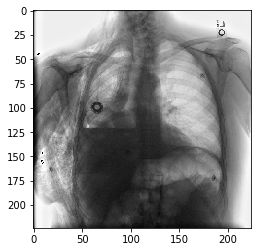

In [54]:
plt.imshow(both[-1])

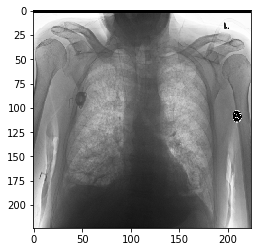

In [50]:
plt.imshow(val_tensor[1])

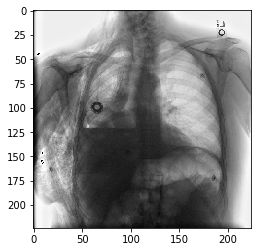

In [52]:
plt.imshow(test_tensor[-1])

### Moving images to their directory

Training set folder

In [27]:
# Making directories
for i in data_label.columns[3:]:
    os.mkdir("./dataset/"+str(i))

Cardiomegaly
Emphysema
Effusion
Hernia
Infiltration
Mass
Nodule
Atelectasis
Pneumothorax
Pleural_Thickening
Pneumonia
Fibrosis
Edema
Consolidation
No Finding


In [44]:
from shutil import copyfile

In [99]:
for i in os.listdir('./Image Dataset/training set'):
    
    for j in data_label.iloc[:, 2][data_label.iloc[:, 1] == i]:
        illness_names = j.split('|')
    
    if 'Cardiomegaly' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Cardiomegaly/' + str(i))

In [103]:
count = 0
for i in os.listdir('./Image Dataset/training set'):
    
    for j in data_label.iloc[:, 2][data_label.iloc[:, 1] == i]:
        illness_names = j.split('|')
    
    if 'Cardiomegaly' in illness_names:
        count += 1
        
print("There are total number of {} Cardiomegaly images".format(count))

There are total number of 1794 Cardiomegaly images


In [102]:
for index, i in enumerate(os.listdir('./Image Dataset/training set')):
    
    if index % 500 == 0:
        print("Currently at index {}".format(index))
    
    for j in data_label.iloc[:, 2][data_label.iloc[:, 1] == i]:
        illness_names = j.split('|')
    
    if 'Emphysema' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Emphysema/' + str(i))
 
    if 'Effusion' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Effusion/' + str(i))
  
    if 'Hernia' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Hernia/' + str(i))
        
    if 'Infiltration' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Infiltration/' + str(i))
    
    if 'Mass' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Mass/' + str(i))
        
    if 'Nodule' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Nodule/' + str(i))

Currently at index 0
Currently at index 500
Currently at index 1000
Currently at index 1500
Currently at index 2000
Currently at index 2500
Currently at index 3000
Currently at index 3500
Currently at index 4000
Currently at index 4500
Currently at index 5000
Currently at index 5500
Currently at index 6000
Currently at index 6500
Currently at index 7000
Currently at index 7500
Currently at index 8000
Currently at index 8500
Currently at index 9000
Currently at index 9500
Currently at index 10000
Currently at index 10500
Currently at index 11000
Currently at index 11500
Currently at index 12000
Currently at index 12500
Currently at index 13000
Currently at index 13500
Currently at index 14000
Currently at index 14500
Currently at index 15000
Currently at index 15500
Currently at index 16000
Currently at index 16500
Currently at index 17000
Currently at index 17500
Currently at index 18000
Currently at index 18500
Currently at index 19000
Currently at index 19500
Currently at index 20000

In [104]:
for index, i in enumerate(os.listdir('./Image Dataset/training set')):
    
    if index % 1000 == 0:
        print("Currently at index {}".format(index))
    
    for j in data_label.iloc[:, 2][data_label.iloc[:, 1] == i]:
        illness_names = j.split('|')
     
    if 'Atelectasis' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Atelectasis/' + str(i))
        
    if 'Pneumothorax' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Pneumothorax/' + str(i))
        
    if 'Pleural_Thickening' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Pleural_Thickening/' + str(i))
        
    if 'Pneumonia' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Pneumonia/' + str(i))
        
    if 'Fibrosis' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Fibrosis/' + str(i))
        
    if 'Edema' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Edema/' + str(i))
        
    if 'Consolidation' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/Consolidation/' + str(i))
        
    if 'No Finding' in illness_names:
        copyfile("./Image Dataset/training set/" + str(i), './dataset/Training set/No Finding/' + str(i))

Currently at index 0
Currently at index 1000
Currently at index 2000
Currently at index 3000
Currently at index 4000
Currently at index 5000
Currently at index 6000
Currently at index 7000
Currently at index 8000
Currently at index 9000
Currently at index 10000
Currently at index 11000
Currently at index 12000
Currently at index 13000
Currently at index 14000
Currently at index 15000
Currently at index 16000
Currently at index 17000
Currently at index 18000
Currently at index 19000
Currently at index 20000
Currently at index 21000
Currently at index 22000
Currently at index 23000
Currently at index 24000
Currently at index 25000
Currently at index 26000
Currently at index 27000
Currently at index 28000
Currently at index 29000
Currently at index 30000
Currently at index 31000
Currently at index 32000
Currently at index 33000
Currently at index 34000
Currently at index 35000
Currently at index 36000
Currently at index 37000
Currently at index 38000
Currently at index 39000
Currently at 

Test set folder

In [105]:
# Making directories
for i in data_label.columns[3:]:
    os.mkdir("./dataset/Test set/"+str(i))

In [107]:
for index, i in enumerate(os.listdir('./Image Dataset/test set')):
    
    if index % 500 == 0:
        print("Currently at index {}".format(index))
    
    for j in data_label.iloc[:, 2][data_label.iloc[:, 1] == i]:
        illness_names = j.split('|')
    
    if 'Cardiomegaly' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Cardiomegaly/' + str(i))
        
    if 'Emphysema' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Emphysema/' + str(i))
 
    if 'Effusion' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Effusion/' + str(i))
  
    if 'Hernia' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Hernia/' + str(i))
        
    if 'Infiltration' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Infiltration/' + str(i))
    
    if 'Mass' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Mass/' + str(i))
        
    if 'Nodule' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Nodule/' + str(i))

Currently at index 0
Currently at index 500
Currently at index 1000
Currently at index 1500
Currently at index 2000
Currently at index 2500
Currently at index 3000
Currently at index 3500
Currently at index 4000
Currently at index 4500
Currently at index 5000
Currently at index 5500
Currently at index 6000
Currently at index 6500
Currently at index 7000
Currently at index 7500
Currently at index 8000
Currently at index 8500
Currently at index 9000
Currently at index 9500
Currently at index 10000
Currently at index 10500
Currently at index 11000
Currently at index 11500
Currently at index 12000
Currently at index 12500
Currently at index 13000
Currently at index 13500
Currently at index 14000
Currently at index 14500
Currently at index 15000
Currently at index 15500
Currently at index 16000
Currently at index 16500
Currently at index 17000
Currently at index 17500
Currently at index 18000
Currently at index 18500
Currently at index 19000
Currently at index 19500
Currently at index 20000

In [108]:
for index, i in enumerate(os.listdir('./Image Dataset/test set')):
    
    if index % 1000 == 0:
        print("Currently at index {}".format(index))
    
    for j in data_label.iloc[:, 2][data_label.iloc[:, 1] == i]:
        illness_names = j.split('|')
     
    if 'Atelectasis' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Atelectasis/' + str(i))
        
    if 'Pneumothorax' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Pneumothorax/' + str(i))
        
    if 'Pleural_Thickening' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Pleural_Thickening/' + str(i))
        
    if 'Pneumonia' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Pneumonia/' + str(i))
        
    if 'Fibrosis' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Fibrosis/' + str(i))
        
    if 'Edema' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Edema/' + str(i))
        
    if 'Consolidation' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/Consolidation/' + str(i))
        
    if 'No Finding' in illness_names:
        copyfile("./Image Dataset/test set/" + str(i), './dataset/Test set/No Finding/' + str(i))

Currently at index 0
Currently at index 1000
Currently at index 2000
Currently at index 3000
Currently at index 4000
Currently at index 5000
Currently at index 6000
Currently at index 7000
Currently at index 8000
Currently at index 9000
Currently at index 10000
Currently at index 11000
Currently at index 12000
Currently at index 13000
Currently at index 14000
Currently at index 15000
Currently at index 16000
Currently at index 17000
Currently at index 18000
Currently at index 19000
Currently at index 20000


Validation set folder

In [112]:
# Making directories
for i in data_label.columns[3:]:
    os.mkdir("./dataset/Validation set/"+str(i))

In [113]:
for index, i in enumerate(os.listdir('./Image Dataset/validation set')):
    
    if index % 500 == 0:
        print("Currently at index {}".format(index))
    
    for j in data_label.iloc[:, 2][data_label.iloc[:, 1] == i]:
        illness_names = j.split('|')
    
    if 'Cardiomegaly' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Cardiomegaly/' + str(i))
        
    if 'Emphysema' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Emphysema/' + str(i))
 
    if 'Effusion' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Effusion/' + str(i))
  
    if 'Hernia' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Hernia/' + str(i))
        
    if 'Infiltration' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Infiltration/' + str(i))
    
    if 'Mass' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Mass/' + str(i))
        
    if 'Nodule' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Nodule/' + str(i))

Currently at index 0
Currently at index 500
Currently at index 1000
Currently at index 1500
Currently at index 2000
Currently at index 2500
Currently at index 3000
Currently at index 3500
Currently at index 4000
Currently at index 4500
Currently at index 5000
Currently at index 5500
Currently at index 6000
Currently at index 6500
Currently at index 7000
Currently at index 7500
Currently at index 8000
Currently at index 8500
Currently at index 9000
Currently at index 9500
Currently at index 10000


In [114]:
for index, i in enumerate(os.listdir('./Image Dataset/validation set')):
    
    if index % 1000 == 0:
        print("Currently at index {}".format(index))
    
    for j in data_label.iloc[:, 2][data_label.iloc[:, 1] == i]:
        illness_names = j.split('|')
     
    if 'Atelectasis' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Atelectasis/' + str(i))
        
    if 'Pneumothorax' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Pneumothorax/' + str(i))
        
    if 'Pleural_Thickening' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Pleural_Thickening/' + str(i))
        
    if 'Pneumonia' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Pneumonia/' + str(i))
        
    if 'Fibrosis' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Fibrosis/' + str(i))
        
    if 'Edema' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Edema/' + str(i))
        
    if 'Consolidation' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/Consolidation/' + str(i))
        
    if 'No Finding' in illness_names:
        copyfile("./Image Dataset/validation set/" + str(i), './dataset/Validation set/No Finding/' + str(i))

Currently at index 0
Currently at index 1000
Currently at index 2000
Currently at index 3000
Currently at index 4000
Currently at index 5000
Currently at index 6000
Currently at index 7000
Currently at index 8000
Currently at index 9000
Currently at index 10000
